Notebook to analyze the Wilson-Dirac operator eigenvectors. These are eigenvectors of the non-Hermitian operator. 

Currently reading all values from run 8126996, there are 20/24 converged Wilson eigenvectors. 

In [1]:
%matplotlib ipympl

from ipywidgets import *

import sys
from time import time
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits.mplot3d import Axes3D, art3d

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

import xml.etree.ElementTree as ET
import h5py

from importlib import reload

sys.path.append('/Users/patrickoare/lqcd/utilities')
# import pytools as pyt
import plottools as pt
import formattools as fmt
pt.set_font()
default_style = fmt.styles['notebook']
default_style['colwidth'] = 15

# import utils

### Side plot: time vs $N_m$ for the two different implementations of Schur reordering (fixed $N_k = N_m / 2$)

In [2]:
Nm = [20, 40, 60, 80, 100]
sparse_mult = [0.000098, 0.00481, 0.001436, 0.003271, 0.006192]  # new
full_mult = [0.001242, 0.035051, 0.411141, 0.360599, 3.474252]              # original

In [3]:
style = default_style.copy()
style['colwidth'] = 10
style['markersize'] = 30

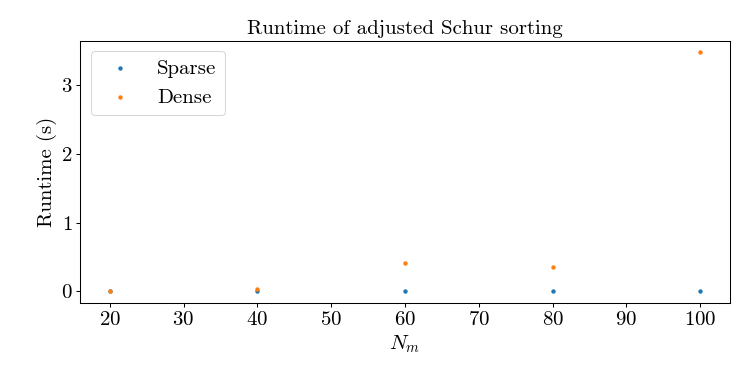

In [4]:
fig, ax = pt.scatter_1d(Nm, sparse_mult, col = pt.pal[0], ax_label = [r'$N_m$', r'Runtime (s)'], fn_label = 'Sparse', style = style)
pt.scatter_1d(Nm, full_mult, ax = ax, col = pt.pal[1], ax_label = [r'$N_m$', r'Runtime (s)'], fn_label = 'Dense', title = 'Runtime of adjusted Schur sorting', style = style)
plt.legend(fontsize = style['fontsize'])
# pt.save_figure(saveat_path = '/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/schur_sorting.pdf')

In [5]:
ritz_values = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0.000611504, 1.31578e-07, 0.00307996, 1.20409e-14, 3.13053e-15, 0, 0, 1.38337e-14, 4.47578e-15, 5.00452e-15, 2.18557e-10, 0.0171938, 1.00484e-14, 5.79256e-15, 1.4251e-10, 1.51032e-14])
Nevecs = len(ritz_values)

In [6]:
rawDw = r"""(-0.850143561,-0.0252482214)      (0.0391482362,-0.0405386012)      (-0.0174058616,-0.023395659)      (-0.0699702846,0.0253904235)      (-0.03929532,-0.00933515975)       (0.0276829548,0.0156599196)       (0.0130751692,-0.019080131)    (-0.00442387014,-0.0849674226)    (0.00360870607,-0.00579134962)   (-0.000712030641,0.00427859062)    (-0.00319909512,0.00225732841)   (-0.00527514011,-0.00570112472)     (0.00152847716,0.00400652997)    (-0.00194100694,-0.0153367957)    (-0.0099561376,-0.00469306829)     (-0.0022129777,0.00609200161)    (-0.00617205796,0.00041453494)     (0.00823467852,0.00826560125)   (0.00237011656,-0.000606363108)   (-0.00280336563,0.000123262614)    (0.000253111605,0.00433377637)    (-0.00177906592,0.00316108491)   (-0.000272852946,0.00020654682)    (-0.00212209216,0.00111744824)
(0.0391482362,0.0405386012)       (-0.850143561,0.0252482214)       (0.0496345243,0.0244887135)     (-0.00039729113,0.0126175523)         (0.136088755,0.163235014)      (0.0107005153,0.00773496058)       (-0.011183829,0.0340824023)     (-0.00335733952,0.0030100026)     (0.00600647895,0.00229641864)    (-0.00650126127,0.00556668919)   (-0.00457047145,-0.00294293571)      (0.0169067931,0.00351055126)    (-0.00420400277,0.00681543666)     (-0.00150205406,0.0111350857)      (0.0118520253,0.00939067824)    (0.00420994606,0.000747169592)   (-0.00459210022,-0.00268367039)   (-0.00112761785,-0.00427216521)    (0.0040783891,-0.000712538635)    (0.000458427923,0.00291190112)    (0.000136550586,0.00293545784)  (-0.00350023616,-6.13805972e-05)   (0.000574611923,-0.00268438778)     (0.00120412545,8.8828412e-05)
(-0.0168657177,0.0237564811)      (0.0474300779,-0.0284301614)         (-0.85011975,0.044211103)    (-0.00943474853,0.00682103567)       (0.0134781997,-0.141957805)      (0.0276287631,0.00758136785)      (-0.0864093732,-0.112593176)    (-0.0042069641,-0.00385337846)    (-0.000167272358,0.0164980449)   (0.00393058314,-0.000656955485)      (0.00477673691,-0.021413148)     (-0.00163896724,0.0147532413)      (0.00913924211,-0.002452533)   (-0.00394678113,-0.00180715148)   (-0.00303017268,-0.00118639053)   (-0.00024847986,-0.00499108201)     (0.00235984902,-0.0117726249)   (-0.00255031933,0.000956308927)     (-0.007593732,-0.00279118715)   (0.000838129043,0.000685877524)   (0.000129931999,-0.00156343502)  (-0.00238845338,-0.000799317631)    (0.000779237133,0.00312342549)   (0.00372520238,-0.000621017499)
(-0.0676067526,-0.0309851634)    (-0.000116134655,-0.012612146)   (-0.00943474853,-0.00682103567)        (-0.85011975,-0.044211103)      (0.00457756285,0.0167540241)       (-0.056148351,0.0262020708)   (-0.00336854534,0.000213722564)     (0.00376579257,-0.0193537187)       (0.0126523862,0.0235518032)      (0.0212524259,-0.0213672789)    (0.00167505074,0.000722550473)    (-0.000524854842,0.0012491325)       (0.006889931,-0.0184417961)     (0.00408509698,0.00309150194)  (0.000368189976,-7.06289453e-08)   (-0.00522170698,-0.00538884381)   (-0.00706671957,0.000865039731)   (-0.00322899461,-0.00438598021)     (0.0053905188,0.000549892597)  (0.000716151662,-0.000660527277)     (0.00358189677,0.00616950532)   (-0.00112806793,-0.00274406991)   (-0.000922524765,0.00356660567)   (0.00243464095,-0.000352564091)
(-0.0391595531,0.00974135085)        (0.124236055,-0.172194217)         (0.0264935195,0.14011214)     (0.00477318559,-0.0166991836)       (-0.850586313,0.0342641982)    (0.000915354284,-0.0194355945)    (-0.0233543661,-0.00166271887)    (-0.00901206699,0.00317581449)     (0.00480341035,-0.0177097128)   (-0.00538839044,-0.00109819777)     (0.0190157659,-0.00819316169)      (-0.00786135768,0.011537399)    (-0.00228733173,-0.0105254033)      (0.00535141802,0.0015509001)    (-0.00309791254,0.00677316788) (-0.000296254598,-0.000692516208)    (-0.00157256759,0.00666312879)     (0.0015046546,-0.00570708708)     (0.00596378647,0.00795613422)  (-0.00438551273,-0.000762847703)   (-0.00395375146,-0.00138216414)    (0.00904892099,-0.00244564917)    (-0.0028605699,0.000924270396)  (-0.000258755332,-0.00168819156)
(0.0286842361,-0.0136745583)     (0.0107720865,-0.00761462877)     (0.0275379454,-0.00790396331)     (-0.0534963489,-0.0312611284)     (0.000915354284,0.0194355945)      (-0.850586313,-0.0342641982)     (-0.00245753685,0.0133322461)     (-0.0219961447,-0.0483286502)      (0.00307390025,0.0078887298)    (0.00365588327,-0.00925432777)     (-0.00720838452,0.0020744178)    (0.00737439802,0.000124832012)    (-0.00349723236,0.00165083416)   (0.00540619446,-0.000978494638)  (-0.00430190132,-7.51094202e-05)      (0.001598686,0.000709751195)     (0.00243802011,0.00731495975)   (0.00442572488,-0.000165813139)  (-0.000738967776,-0.00333651424)    (-0.0017164925,-0.00149663915)     (0.00306713049,0.00227383772)   (-0.000977093562,0.00150508025)    (0.00129214274,-0.00134449335)  (-0.000225959951,0.000493140887)
(0.0136707392,0.0186137423)     (-0.0142481035,-0.0328589298)       (-0.0729504575,0.121635996)  (-0.00336835428,-0.000178474854)     (-0.0230459771,0.00404433262)    (-0.00275005964,-0.0132659315)        (-0.850176661,0.053106564)    (0.00675352296,0.000609253319)      (0.00725385098,0.0115859855)    (0.00125284169,-0.00474259788)   (-0.00834562715,-0.00553450704)       (0.0221048793,0.0372199923)    (0.00227736483,-0.00472585071)     (-0.0087528046,0.00450949545)        (0.022324474,-0.029055572)      (-0.00272894412,0.010098675)  (-0.000362956807,-0.00256962339)   (-0.00028019342,-0.00268088112)     (-0.0073943842,-0.0078150102)  (-0.00110054291,-0.000290670501)    (0.00052827352,0.000260585803)    (0.00573909681,0.000202104892)    (-0.00374294816,0.00572418003)    (-0.00340678715,0.00108807145)
(-0.0121985349,0.0840707506)   (-0.00325212382,-0.00311332541)    (-0.00424409011,0.00380678365)      (0.00153203757,0.0196439521)   (-0.00893375775,-0.00337218651)       (-0.0268148212,0.045790442)   (0.00675352296,-0.000609253319)       (-0.850176661,-0.053106564)      (0.0204102256,-0.0059450567)     (-0.0132274797,-0.0183562297)    (0.000563145069,0.00308238283)      (-0.005315348,0.00117504795)      (-0.011636666,0.00364107205)   (-0.00908038893,0.000680886976)    (0.00359918532,-0.00195375044)  (-0.00541266402,-0.000246446367)     (-0.00527492676,0.0194976883)    (-0.00157847396,0.00452996557)   (-0.00165652174,-0.00159661823)   (-0.0029729837,-0.000114298011)     (0.00286148804,0.00052923086)    (-0.00131404657,-0.0018219288)   (-0.00291115159,-0.00182817089)    (0.000253346384,0.00141335684)
(0.00275449815,0.00622402701)    (0.00615727281,-0.00179696819)    (0.000803652362,-0.0164517989)      (0.0162766645,-0.0211532919)      (0.00353547652,0.0179747741)    (0.00421983654,-0.00732370254)     (0.00779945521,-0.0112092555)       (0.0190603203,0.0093658652)      (-0.847449766,-0.0943758988)      (-0.0494813407,0.0320913174)   (-0.00192933218,-0.00155515428)    (0.00183530006,-0.00491228331)        (-0.117092947,0.021326785)      (-0.0406300213,-0.167288585)    (-0.00319139473,0.00639342221)     (0.00131246357,0.00296533525)     (-0.0207046576,-0.0180883425)   (-0.00194431063,-0.00857503944)    (0.00200687425,-0.00591527459)    (0.00137397836,-0.00827201665)    (0.00953925473,-0.00279075338)    (0.00113212063,-0.00234016556)    (0.00227517598,-0.00153878722)    (-0.0019600301,-0.00134004878)
(-6.21995775e-06,-0.00432000463)   (-0.00586405608,-0.00618707633)     (0.00385161773,0.00097292475)        (0.0168878586,0.024846212)    (-0.0054502834,0.000588392332)     (0.00199192302,0.00971707461)    (0.000909098335,0.00480794551)      (-0.0165105252,0.0153878916)     (-0.0401740174,-0.0430586344)       (-0.846319049,-0.113897423)   (0.000634701178,-0.00415292104)  (-0.000303814673,0.000779278445)       (-0.197721753,0.0668735055)     (-0.0391921008,-0.0990653534)   (-0.00449062237,-0.00343240056)    (0.00128060367,-0.00143926185)     (-0.0276433572,0.00960785283)      (0.00128321803,0.0108776706)    (0.00252772347,-0.00124778941)     (0.00306627276,0.00295503169)     (0.00461544394,0.00555594163)  (-0.000824545222,-0.00110089201)   (-0.00101417888,0.000365735494)    (0.00146650493,0.000104476325)
(-0.00340262054,-0.00190495608)    (-0.00401431389,0.00363292659)       (0.00862222758,0.020099157)   (0.00160531366,-0.000854373662)      (0.0200842032,0.00476116064)   (-0.00734752638,-0.00138770269)     (-0.0070890674,0.00703763535)   (0.000340916681,-0.00310698001)    (-0.00189042526,0.00159654381)    (0.000634799625,0.00415288616)         (-0.846320217,0.11391862)       (0.166511282,-0.0372473024)   (-0.00295234656,0.000641466753)     (0.00157436441,0.00418015022)    (-0.00939992508,-0.0932192552)       (0.0449081151,0.0117373624)   (0.00240028096,-0.000625128688)   (0.00223628327,-0.000274865659)   (-0.0100977862,-0.000287921261)   (-0.00124832875,0.000664171855) (-0.000960467652,-0.000239863332)   (-0.00317628486,-0.00524756023)    (-0.00104136406,0.00112444381)   (0.000848911807,-0.00134242777)
(-0.00466790551,0.00616872103)     (0.0160772085,-0.00610555736)    (-0.00424704834,-0.0141743527)  (-0.000616896289,-0.00120150907)    (-0.00965708452,-0.0100211281)    (0.0073115084,-0.000771902957)        (0.01460424,-0.0406359672)  (-0.00536788673,-0.000819145698)     (0.00191862861,0.00487184841) (-0.000299704624,-0.000780840395)      (0.170469608,-0.00720665285)         (-0.846932522,0.10945035)   (0.000486946108,-0.00090609948)    (0.00265727572,-0.00241388867)         (0.075144307,0.188667285)      (-0.0120104939,0.0313856066)  (-0.00283687688,-0.000627256752)   (0.00256862388,-0.000832757188)     (0.0029597522,0.000102212899)   (0.00115563163,-0.000516715382)     (-0.00156540988,0.0013392133)   (0.000607198801,-0.00286851494)   (-0.00408823457,-0.00228697719)   (-0.000531162048,0.00158796943)
(0.00213195143,-0.00370063898)    (-0.0034968077,-0.00716784711)     (0.00889659787,0.00313440144)      (0.00345673153,0.0193175803)     (-0.00319603944,0.0102503206)   (-0.00316020977,-0.00220784162)     (0.00195515448,0.00485381916)    (-0.0107074646,-0.00576843308)      (-0.108531416,-0.0484134586)        (-0.173613572,-0.11585148)  (-0.00295561465,-0.000625849261)    (0.000486946108,0.00090609948)        (-0.846932522,-0.10945035)       (0.0196356887,-0.144699215)   (9.58987399e-05,-0.00193273485)      (-0.00148176213,0.001384802)     (0.00769605821,-0.0207137031)     (0.0202913233,-0.00961494939)    (0.00309968933,-2.6945386e-05)     (0.00343830627,-0.0014467676)     (0.00293647865,0.00288236373)    (0.00284889671,0.000438552925)     (-9.6193433e-05,0.0020224248)   (-0.000298646947,0.00018770659)
(-0.00418815344,0.014794095)   (-0.000485703231,-0.0111645887)    (-0.00404256318,0.00152647283)    (0.00453389656,-0.00233490544)    (0.00543358949,-0.00111302419)     (0.00515679199,0.00182191912)   (-0.00844429011,-0.00498916544)   (-0.00877149913,-0.00231019157)       (-0.0776595604,0.153085771)      (-0.0627460065,0.0859137606)    (0.00151566449,-0.00419516965)      (0.0026733697,0.00238869011)          (-0.0165796,0.144880146)       (-0.848964737,-0.102624271)  (-0.000664625875,-0.00398649576)   (-0.00331986175,-0.00305495518)  (-0.000877643859,-0.00074011334)    (0.00525646185,-0.00567257498)    (0.00386822449,-0.00143656613)     (-0.0025565999,-0.0152217035)    (0.00667991465,-0.00809856877) (-0.000749744138,-0.000420071527)     (0.000649746776,0.0028328968)     (0.00262598706,0.00113579034)
(-0.00943930228,0.00554452774)      (0.0102599361,-0.0109964351)      (-0.002769362,0.00168057045)  (0.000365670247,-2.49580621e-05)    (-0.00412216171,-0.0061627796)   (-0.00426275204,0.000416916806)       (0.0271260132,0.0244215158)     (0.00369188584,0.00173540341)   (-0.00324195087,-0.00634489493)    (-0.00453012962,0.00336684998)       (0.0143147104,0.0924598238)       (0.0263333511,-0.201086646)    (7.98968534e-05,0.00193081376)   (-0.000664625875,0.00398649576)        (-0.848964737,0.102624271)      (-0.0204698818,0.0162064134)   (-0.00418027198,-0.00148839601)     (0.0047698688,-0.00139316524)    (-0.00688058964,0.00257127409)   (0.00412639941,-6.05988594e-05)    (0.00161529375,-0.00116305022)    (-0.00363108157,0.00589322729)     (0.00473385555,0.00849616858)    (-0.00223943061,0.00350744751)
(-0.00303920521,-0.00567038691)    (0.00394352103,-0.00156871553)    (0.000866738922,0.00488839952)    (-0.00450165186,0.00594207992)   (-0.00014184559,0.000734746704)    (0.00148072803,-0.00090952171)   (-0.00498191146,-0.00912854977)    (-0.00532074717,0.00083891922)    (0.00111963829,-0.00302654986)     (0.00133188408,0.00138286422)      (0.0391264409,-0.0246783726)     (-0.0207262575,-0.0263084624)   (-0.00153702916,-0.00131269661)     (-0.00314714702,0.0032199713)     (-0.0242350779,-0.0095705802)        (-0.844031916,0.147723545) (-7.43428967e-05,-0.000656953042)    (-0.00237450606,0.00227039669)      (0.0196672763,-0.0307761005)    (0.00274955598,-0.00071575304)    (0.00249155789,-0.00285932483)    (0.00772546133,-0.00586296766)     (0.00877403432,0.00923668051)  (-0.000609261667,-0.00164543391)
(-0.00591768448,-0.00163788715)    (-0.00489235087,0.00198420465)     (0.000911909133,0.0118935311)   (-0.00665135328,-0.00240556817)  (-0.000670658835,-0.00676841169)    (0.00390711841,-0.00658896228)   (-0.000641284159,0.00249892974)   (-0.000573521206,-0.0200719132)      (-0.0248241071,0.0115017402)     (-0.0233669313,-0.0174539157)    (0.00236568831,0.000716904426)   (-0.00285245482,0.000498045822)      (0.00118759818,0.0219907339)    (-0.00105214818,0.00045357942)    (-0.00424468823,0.00126245546)  (-7.43428967e-05,0.000656953042)       (-0.844031916,-0.147723545)      (0.00450977503,0.0217464376)     (0.0016917175,-0.00264508278)  (-0.000930051873,-0.00723565106)     (-0.0116619551,-0.0025367512)   (6.04027955e-05,-0.00221621609)   (0.00235391042,-0.000657061742)   (0.00315260453,-0.000248317823)
(0.00982150007,-0.00608879213)    (-0.00182825431,0.00397596127)   (-0.00235719265,-0.00131671218)    (-0.00419268975,0.00340154519)    (0.000557412481,0.00582417653)     (0.00421893828,0.00121470674)   (-0.000646936034,0.00259435405)  (-0.000334173938,-0.00474675918)     (-0.0044625733,0.00750406095)     (0.0047751298,-0.00978942851)      (0.0021997485,0.00042561986)     (0.00248604063,0.00101498445)       (0.0159736732,0.0156027245)     (0.00317128373,0.00701793625)     (0.00461971256,0.00177323764)    (-0.00230178271,-0.0023340009)      (0.0121514134,-0.0185318902)       (-0.841173639,-0.172815278)   (-0.00126181842,0.000621934683)     (-0.00132773459,0.0131805096)     (0.0141281318,-0.00270092973)      (0.0014031618,-0.0010682581)    (-0.00101101425,0.00026828826)   (0.00107854281,-0.000871692679)
(0.00241574522,0.00018766546)   (0.00409329664,-0.000243226992)    (-0.00658818666,0.00457350268)      (0.005201249,-0.00134099431)    (0.00384154375,-0.00907731809)    (-0.000188242501,0.0033824222)    (-0.00504840014,0.00940266067)    (-0.00140567881,0.00179791434)     (0.00252231134,0.00566637431)     (0.00259302192,0.00106495888)    (-0.00938402991,0.00358511377)    (0.00275036645,-0.00105307471)   (0.00307600692,-0.000201501779)     (0.00395661472,0.00110893184)  (-0.00731016165,-0.000253809566)       (0.0295273054,0.0213605384)     (0.00176476324,0.00258860079)  (-0.00126181842,-0.000621934683)        (-0.841173639,0.172815278)   (-0.0012392221,-0.000477065487)  (0.000339603492,-0.000278750562)    (-0.00753771018,0.00105495205)     (0.00316580944,0.00145775155)    (-0.00323029007,0.00267129101)
(-0.00260451049,-0.000919772847)     (0.0011093442,-0.00268118611)  (0.000950351149,-0.000485069723)   (0.000466881487,0.000838647576)  (-0.00437934521,-0.000233896747)   (-0.00205685754,0.000896363114)   (-0.00112051287,6.14204611e-05)  (-0.00281082505,-0.000838177794)    (-0.00174246774,0.00808961153)      (0.00392794922,-0.001511346)  (-0.00113658562,-0.000813135717)    (0.00106150166,0.000662240807)      (0.00258799609,0.0026258218)      (-0.00801766684,0.013002738)    (0.00403202084,0.000651637833)     (0.0026494054,0.000958833686)    (-0.00388537062,0.00610265601)     (0.00473734642,-0.0122841001)   (-0.00125911135,0.000395382824)        (-0.83369155,-0.227004629)     (-0.0399223254,-0.0362309149) (-0.000737030711,-0.000131695936)   (0.00133300412,-0.000228796937)     (0.00122600951,0.00133882381)
(0.00159071004,-0.00394703866)    (0.000883892171,-0.0027417045)   (-0.000245529066,0.00151952398)     (0.0053635524,-0.00449702777)   (-0.00409577587,0.000334510193)    (0.00357586419,-0.00111638566)   (0.000563670698,-0.00012934649)    (0.00281359677,0.000496234195)     (0.00752975568,0.00622209307)     (0.0064051388,-0.00308417914)  (-0.000970964028,8.12225933e-05)   (-0.00130091822,-0.00155532623)    (0.00380091486,-0.00139824603)     (0.00280294767,0.00995999725)     (0.00136846004,0.00140568035)     (0.00209927933,0.00310188132)    (-0.0114078657,-0.00296342151)      (0.0110106997,0.00902465768)   (0.000309218337,0.000305745035)     (-0.0528588151,0.00940290288)       (-0.830135921,-0.252316809)     (-0.00142608308,0.0028139544)   (0.000601306925,0.000628707467)   (0.000670047871,-0.00068454059)
(-0.0024956484,-0.00253283846)    (-0.00323262611,0.00115186313)    (-0.00193697513,0.00153449961)   (-0.000426131547,0.00287957067)    (0.0091734472,-0.000655836255)   (-0.00129994002,-0.00118737576)     (0.00520898823,-0.0021573863)   (-0.000842870698,0.00203803648)     (0.00151496801,0.00205721223)   (-0.000626992071,0.00119979502)   (-0.000695302306,0.00599707907)     (0.00170532664,0.00232817042)   (0.00269368358,-0.000890545293)    (-0.00065570074,0.00053621133)   (-0.00561835421,-0.00387032988)          (0.0094217,0.0017226649)    (0.000325151145,0.00216523449)     (0.0014804571,0.000924588512)    (-0.00705385732,0.00264419397)   (-0.000729834618,0.00015254604)    (-0.00142608308,-0.0028139544)        (-0.830135921,0.252316809)       (0.0321594573,0.0108593618)     (0.00969879717,-0.0016978676)
(-0.0003126103,-0.000119996984)     (0.00140790171,0.00228759426)  (-0.000373050994,-0.00313051874)   (-0.00176848989,-0.00314472613)   (-0.00294189016,0.000114440451)     (0.00157164833,0.00093011276)   (-0.00546210032,-0.00388439814)    (-0.00232401513,0.00243882968)     (0.00248754251,0.00103544342)  (-0.00104412166,-0.000177880874)  (-0.00139892244,-0.000556802399)    (-0.00267821005,0.00374272893)  (-0.000453775937,-0.00193674587)   (9.89662237e-05,-0.00285766836)   (0.000735079414,-0.00954016086)     (0.00341400071,-0.0120855834)    (0.00238743636,0.000322660892)  (-0.00102165448,-0.000155322343)     (0.00201607512,-0.0027913555)     (0.0013340018,0.000167202829)  (0.000590049433,-0.000637119512)      (0.0202048385,-0.0271976841)        (-0.827487625,0.266106017)   (-0.00167342441,0.000940401339)
(-0.00229772981,-0.000267806423)   (0.00102108456,-0.000560038974)    (0.00349872215,-0.00102547932)   (0.00232633726,-0.000477808881)     (0.00046597435,0.00158159911) (-0.000371161093,-0.000369426663)   (-0.00341523022,0.000521700804)  (-0.000219064338,-0.00136970336)    (-0.00145023248,0.00177999113)    (0.0013443366,-0.000469032474)     (0.00136806099,0.00070315666)   (-0.00121793834,-0.00107067382) (-0.000327220761,-9.81115716e-05)    (0.00214651196,-0.00175817114)   (-0.00357228901,-0.00187760997)    (0.000367074504,0.00166503225)   (0.00304007837,-0.000448506594)    (0.00119539401,0.000628441301)  (-0.00406566865,-0.000366856515)    (0.00101749439,-0.00145910194)   (0.000725217559,0.000602001211)    (0.00840711943,-0.00481487397)    (-0.0018554256,0.000371290643)        (-0.812745475,0.342038482)"""

In [7]:
rawHw = r"""(2.19321089e-14,1.08420217e-19)      (0.0954873433,-0.0727261469)  (1.13539386e-13,-1.11547924e-13)   (3.09674161e-14,3.42260942e-14)  (1.65171696e-13,-1.15532584e-15)  (2.00672812e-14,-1.72292736e-14) (-9.56595914e-14,-1.22062083e-13) (-1.98938088e-14,-1.21205129e-14)   (1.38168324e-06,6.64761174e-07)   (1.56357759e-10,-2.3661037e-10)  (9.70237142e-06,-3.77675451e-06)  (2.05842288e-14,-4.73579509e-16)   (1.93777286e-14,1.21430643e-17)  (-6.79534554e-15,1.83915383e-14)  (-3.33799828e-14,3.74136486e-14)  (-1.14665222e-15,3.25867805e-15) (-2.58560534e-15,-1.14491749e-15)  (-1.85008259e-15,1.93074723e-14)   (-4.3663944e-13,7.57718541e-14)   (7.19652049e-06,1.90952892e-05)  (4.37849626e-15,-1.60461922e-15) (-5.13174572e-15,-2.15864653e-15)  (1.20882904e-13,-1.30216584e-13)  (-3.19752905e-15,1.36923892e-15)
(0.0954873433,0.0727261469)               (-9.62424584e-15,0)   (3.76608467e-14,5.20486432e-14)  (-1.37653777e-13,1.53335677e-13) (-2.30093722e-14,-2.94031292e-14) (-3.66452702e-12,-5.67872138e-13)   (3.74613535e-15,1.35100264e-14)  (2.22549409e-13,-1.93768612e-13)   (1.97706847e-06,8.40351688e-07)   (1.8471868e-10,-3.09452206e-10)    (4.91608251e-06,-2.177294e-06)   (1.72852184e-14,-2.2433444e-14)   (8.17076441e-15,1.65327821e-14)  (-1.0870211e-14,-2.81974964e-14)   (6.45577342e-15,-4.1416523e-15) (-4.05404876e-15,-1.37043155e-16)   (-8.11156697e-15,7.2155823e-15)  (2.23471415e-14,-2.62810607e-16)  (-2.69657994e-13,3.64239888e-14)    (8.1666496e-06,1.89588888e-05)    (2.18336633e-15,4.2821649e-15)  (-1.34267597e-15,2.93461002e-15)  (7.93347592e-14,-8.44836354e-14)  (3.17909761e-15,-1.25268719e-15)
(1.13541121e-13,1.11546189e-13)  (3.76608467e-14,-5.20486432e-14)  (-8.01303468e-14,5.42101086e-20)         (0.196851613,0.254080552)  (-4.42788167e-15,3.67483821e-14)  (-5.83184542e-13,4.65443656e-14)  (1.38083989e-14,-2.79212417e-14)   (5.64694125e-13,6.35918401e-13)  (-4.38641249e-06,1.46524895e-05)   (2.15324855e-09,9.87574146e-10)    (1.2097003e-05,2.12664663e-05)   (-7.6778861e-15,2.18523116e-14)  (-9.88618909e-15,4.53387328e-14)  (-5.66768854e-14,1.26880277e-13)  (-1.14361645e-15,8.43769499e-15)   (3.97641989e-15,7.24149473e-15)   (2.87096735e-16,2.69541334e-14) (-1.94013642e-14,-2.87474038e-14) (-3.15799036e-13,-1.19918658e-12)  (-0.000102629224,5.76518597e-05)   (3.10016769e-15,7.08076176e-15)  (-9.69927264e-16,8.06321156e-16)   (4.70934923e-13,3.27353379e-13) (-3.93782229e-16,-2.70887913e-16)
(3.09691509e-14,-3.42260942e-14) (-1.37653777e-13,-1.53333943e-13)        (0.196851613,-0.254080552)  (-2.57797256e-14,1.08420217e-19)  (3.88578059e-15,-3.09554465e-13) (-3.37195549e-14,-1.36349265e-14)   (3.42344209e-13,1.66137937e-13)   (3.47204904e-15,-1.5350568e-14)  (-1.9234851e-05,-6.23411286e-06)  (-1.65554287e-09,3.43503231e-09)  (-0.000177638539,9.66102874e-05)   (5.7011687e-15,-4.30983374e-14)  (1.44799537e-14,-1.67795465e-14)   (1.47386443e-14,2.45550108e-14)  (1.07448772e-13,-8.70831185e-16)  (-5.41754142e-15,1.88312907e-14)  (-2.49767654e-14,8.13910571e-15)  (-1.29770326e-14,4.08093698e-15)  (7.58136956e-12,-1.90582413e-12) (-0.000137530197,-0.000255349339) (-4.69914906e-15,-1.40512602e-15) (-1.12171557e-14,-2.74866935e-15)  (-1.73891522e-12,2.35165273e-12)  (-2.23237227e-15,9.74990488e-15)
(1.6517343e-13,1.15532584e-15)  (-2.30076375e-14,2.94022619e-14) (-4.42701431e-15,-3.67501168e-14)   (3.87710697e-15,3.09550996e-13)                (4.95367636e-14,0)          (0.31030807,0.238755426)   (1.65215064e-14,3.82766735e-15)   (1.16663623e-13,3.26065563e-13) (-2.84880043e-06,-1.17707606e-06)  (-2.53465603e-10,4.31730029e-10)  (-5.77503104e-06,2.52734793e-06)    (2.6799743e-14,6.30225039e-15)   (5.14865928e-14,2.46382775e-14)  (1.69742692e-15,-5.60315683e-16)   (1.06607431e-14,-8.0135551e-15)  (-1.1500783e-14,-1.54563862e-14)  (-2.40909723e-15,6.06806272e-15)  (-1.05579608e-15,4.11996826e-17)  (3.27991974e-13,-5.65363728e-14) (-1.07408234e-05,-2.47318173e-05)   (8.92732069e-16,1.77646526e-16)  (-3.86409654e-15,3.35126892e-15)  (-9.35170452e-14,1.09334417e-13)  (2.26782568e-15,-1.12166136e-15)
(2.00742201e-14,1.72258041e-14)  (-3.66452702e-12,5.67872138e-13) (-5.83182808e-13,-4.65408961e-14)  (-3.37195549e-14,1.36349265e-14)         (0.31030807,-0.238755426)               (-7.34134975e-15,0)  (2.99872974e-13,-2.69732153e-14)  (1.62300728e-14,-1.68615122e-15)   (1.40225238e-05,1.08866627e-05)   (2.37008183e-09,-2.3193627e-09)  (0.000142677466,-2.11559315e-05)  (-1.03736464e-14,2.49453236e-15)  (-9.90700577e-15,3.63303138e-14) (-5.70724024e-16,-1.34293618e-14)   (-3.19353918e-14,-2.041943e-14) (-1.77765788e-15,-1.42785089e-14)  (1.76855058e-14,-8.42034775e-15)  (-1.52135249e-14,5.78313439e-15)   (-5.85913978e-12,-6.074234e-13)   (3.57546651e-05,0.000242706332)   (2.17794532e-15,-2.3483277e-15)   (1.07843422e-14,7.34308447e-15)  (1.90158349e-12,-1.26685085e-12)   (4.38397148e-15,8.89913143e-16)
(-9.56630608e-14,1.22060348e-13)   (3.74787007e-15,-1.3506557e-14)   (1.38049294e-14,2.79203743e-14)   (3.4233727e-13,-1.66140539e-13)  (1.65197717e-14,-3.82766735e-15)   (2.99872974e-13,2.69732153e-14)               (-8.38218384e-15,0)         (0.207206909,0.305029323)     (3.2465595e-05,7.2950203e-06)  (1.73118646e-09,-4.54282972e-09)     (3.4814213e-05,-2.256916e-05)   (8.68359204e-15,4.16854051e-15)  (-2.23970148e-14,1.05183874e-13)  (-3.00740335e-14,5.85191617e-14)    (1.0658141e-14,5.02310867e-16)  (2.73761049e-15,-1.89985831e-14)   (6.87887247e-14,8.15571569e-14)   (1.87475903e-14,2.09849499e-14)  (-2.05362658e-12,6.72593925e-13)    (0.000120239976,0.00018605598)  (-8.80589004e-15,3.53449908e-17)   (-9.7307145e-16,6.25974966e-15)  (5.38042159e-13,-8.50639654e-13) (-6.45902602e-15,-3.78890712e-15)
(-1.98938088e-14,1.21205129e-14)    (2.2254594e-13,1.93761673e-13)  (5.64691523e-13,-6.35918401e-13)     (3.4729164e-15,1.5350568e-14)  (1.16667093e-13,-3.26063829e-13)    (1.62318076e-14,1.6844165e-15)        (0.207206909,-0.305029323) (-1.07240605e-14,-2.16840434e-19)  (-3.79358901e-07,1.16218334e-05)   (2.17805159e-09,3.70489426e-10)   (9.87776832e-05,0.000101703386)   (4.36924802e-14,2.28029401e-15)   (2.06432094e-16,1.88044025e-15)  (1.29158836e-14,-5.04349167e-15)   (9.76406456e-14,1.72084569e-15)  (-5.56403881e-14,6.94930224e-15) (-1.31665512e-15,-1.82349795e-14)   (7.55905755e-15,1.02461442e-14) (-2.53399038e-12,-4.47408083e-12)  (-0.000122923135,0.000120128192)   (5.77012396e-16,-3.6938768e-15)  (5.84363287e-15,-9.35818263e-15)   (1.72990225e-12,6.51490147e-13)  (-1.46594976e-14,-3.3753111e-15)
(1.38168324e-06,-6.64761174e-07)  (1.97706847e-06,-8.40351688e-07) (-4.38641249e-06,-1.46524895e-05)   (-1.9234851e-05,6.23411286e-06)  (-2.84880043e-06,1.17707606e-06)  (1.40225238e-05,-1.08866627e-05)    (3.2465595e-05,-7.2950203e-06) (-3.79358901e-07,-1.16218334e-05) (-0.000202290838,-2.16840434e-19)  (-3.56305381e-06,-3.3905989e-06)    (-0.00155161954,0.00511893574)   (-2.9982518e-05,7.74922775e-05) (-4.16961121e-06,-6.87618394e-06)  (-1.0628113e-05,-1.78557431e-05)  (0.000379652014,-3.34150328e-05)  (-5.85774886e-06,8.53799864e-08)  (2.67849255e-08,-4.88408551e-07)   (-4.1665866e-08,6.94875965e-07) (-3.72761993e-06,-1.74272632e-06)  (-0.00173732785,-0.000596122341)   (-3.28734021e-06,2.7281544e-07)  (-1.70026776e-06,3.98528796e-07)  (1.99568773e-05,-1.44370666e-05) (-3.23999892e-05,-4.78730681e-06)
(1.56357757e-10,2.36610368e-10)    (1.8471868e-10,3.09452206e-10)  (2.15324855e-09,-9.87574147e-10) (-1.65554287e-09,-3.43503231e-09) (-2.53465606e-10,-4.31730029e-10)   (2.37008183e-09,2.31936271e-09)   (1.73118646e-09,4.54282972e-09)  (2.17805159e-09,-3.70489425e-10)   (-3.56305381e-06,3.3905989e-06)  (1.14098013e-09,-1.08420217e-19)        (0.0334977962,0.241682526)   (5.68067028e-08,1.95514984e-08)  (1.22759627e-09,-9.93275472e-10)  (3.18127919e-09,-2.53508092e-09)  (1.08615329e-08,-5.83907976e-08) (-2.99835583e-10,-1.96449764e-09)  (9.70855297e-11,-7.80702933e-12)  (-1.39195459e-10,1.04585732e-11)   (3.5429459e-10,-1.13000203e-09)  (-8.47586063e-05,5.55160782e-08) (-1.45056298e-10,-6.56275479e-10)  (-1.5231086e-10,-4.00438499e-10)   (4.11381673e-09,4.33456095e-09)  (1.00333799e-10,-7.64202788e-09)
(9.70237142e-06,3.77675451e-06)     (4.91608251e-06,2.177294e-06)   (1.2097003e-05,-2.12664663e-05) (-0.000177638539,-9.66102874e-05) (-5.77503104e-06,-2.52734793e-06)   (0.000142677466,2.11559315e-05)      (3.4814213e-05,2.256916e-05)  (9.87776832e-05,-0.000101703386)   (-0.00155161954,-0.00511893574)       (0.0334977962,-0.241682526) (-8.07837271e-05,-2.71050543e-20)   (2.6513234e-05,-9.78070512e-06)   (0.000375328913,-0.00179161233)   (0.000196303696,-0.00176661627) (-4.22124537e-05,-6.11886428e-05)   (4.13273841e-06,4.38886894e-06)  (-1.36425364e-05,1.11278982e-05)   (1.2231079e-05,-1.00809546e-05)   (1.73556712e-06,5.41558257e-06) (-0.000294504905,-0.000456076442)    (3.06775702e-05,2.7783921e-05)   (3.16776127e-06,2.12096962e-06)  (-5.53261732e-05,-1.0799906e-05)   (5.12886815e-05,7.42390464e-05)
(2.05833614e-14,4.73579509e-16)   (1.72873868e-14,2.24310587e-14) (-7.67441666e-15,-2.18549137e-14)   (5.69943398e-15,4.30992048e-14)   (2.6799743e-14,-6.30355143e-15) (-1.03736464e-14,-2.49539972e-15)  (8.68402572e-15,-4.17027524e-15)  (4.36890107e-14,-2.28202873e-15)  (-2.9982518e-05,-7.74922775e-05)  (5.68067028e-08,-1.95514984e-08)    (2.6513234e-05,9.78070512e-06)  (-4.75691535e-14,1.08420217e-19)       (-0.0199355837,0.275613766) (-2.55031413e-12,-1.73010998e-12)   (3.89011739e-16,4.23684525e-15)  (-1.24822028e-14,1.76226221e-14)  (1.54973256e-13,-1.43506734e-13)  (-3.29259189e-14,3.61958727e-14)    (-1.28889e-12,-8.93712296e-13)  (-0.000104246399,0.000279045238)  (1.91864753e-14,-2.06215253e-14)    (3.57569876e-15,1.1734537e-14)  (7.66264547e-13,-6.68706627e-14)  (1.30592152e-15,-2.09581701e-15)
(1.93772949e-14,-1.21430643e-17)  (8.17033073e-15,-1.65310474e-14)  (-9.88618909e-15,-4.5336998e-14)   (1.44797369e-14,1.67804139e-14)  (5.14865928e-14,-2.46382775e-14) (-9.90613841e-15,-3.63329158e-14) (-2.23961474e-14,-1.05183223e-13)  (2.05564732e-16,-1.87957289e-15)  (-4.16961121e-06,6.87618394e-06)   (1.22759627e-09,9.93275472e-10)    (0.000375328913,0.00179161233)      (-0.0199355837,-0.275613766)  (-1.75259113e-14,1.08420217e-19)   (-7.7936789e-15,5.24406907e-15)    (1.53438026e-12,7.3435702e-13)  (-3.40231315e-14,1.51816927e-13) (-1.18590034e-14,-1.38079652e-14) (-3.33782481e-14,-1.20650018e-15) (-9.56513514e-14,-9.25564226e-12)  (-0.000132165317,3.55842677e-05)  (-8.75037889e-15,1.09669218e-14)   (2.59850735e-14,6.00756424e-15)   (1.54946086e-12,1.82304432e-12)  (3.33062571e-14,-1.58677325e-14)
(-6.79577922e-15,-1.83950077e-14)  (-1.08706447e-14,2.81957617e-14) (-5.66777528e-14,-1.26881578e-13)   (1.4739078e-14,-2.45584802e-14)    (1.6956922e-15,5.62050406e-16)  (-5.70724024e-16,1.34297955e-14) (-3.00753346e-14,-5.85226312e-14)   (1.29150163e-14,5.04457587e-15)   (-1.0628113e-05,1.78557431e-05)   (3.18127919e-09,2.53508092e-09)    (0.000196303696,0.00176661627)  (-2.55031413e-12,1.73010911e-12)  (-7.7936789e-15,-5.24406907e-15) (-1.07882453e-14,-2.16840434e-19)       (0.0766837378,-0.287231528)  (-7.69063632e-14,4.39440151e-14)   (1.0076575e-14,-3.01711781e-15)  (-9.59475555e-15,1.93506235e-14)  (2.39706692e-13,-2.07709093e-11)  (-0.000336367544,9.23491013e-05)   (2.67147415e-15,8.90607033e-15) (-4.79005941e-15,-1.81861904e-14)   (3.70767067e-12,4.45770504e-12) (-7.66834513e-15,-1.21673505e-14)
(-3.33786818e-14,-3.7417118e-14)   (6.45490605e-15,4.14208598e-15) (-1.14491749e-15,-8.43942971e-15)   (1.07448772e-13,8.72565908e-16)    (1.06598758e-14,8.0135551e-15)  (-3.19327897e-14,2.04159606e-14)  (1.06572737e-14,-5.00901404e-16)  (9.76389108e-14,-1.71390679e-15)   (0.000379652014,3.34150328e-05)   (1.08615329e-08,5.83907976e-08)  (-4.22124537e-05,6.11886428e-05)  (3.89879101e-16,-4.23532737e-15)  (1.53438286e-12,-7.34360489e-13)        (0.0766837378,0.287231528)  (2.06562198e-15,-2.16840434e-19)  (-8.68142364e-15,8.15732031e-15)  (2.25808955e-14,-6.52880527e-14)  (2.34838191e-15,-1.41379963e-16)   (3.15355251e-12,-2.7099823e-12) (-0.000596490145,-0.000398110284) (-3.87320384e-15,-1.45113956e-14)  (7.64839581e-15,-2.77544914e-15)  (-3.31625569e-13,1.98329591e-12)  (-6.34323323e-15,2.25500499e-16)
(-1.14665222e-15,-3.25564228e-15)   (-4.0531814e-15,1.37476835e-16)  (3.97793777e-15,-7.24290419e-15)  (-5.41927614e-15,-1.8829556e-14)  (-1.15003493e-14,1.54572535e-14)  (-1.77679052e-15,1.42767742e-14)   (2.73706838e-15,1.89984747e-14) (-5.56369187e-14,-6.94930224e-15) (-5.85774886e-06,-8.53799864e-08)  (-2.99835582e-10,1.96449764e-09)  (4.13273841e-06,-4.38886894e-06) (-1.24830701e-14,-1.76224053e-14) (-3.40239989e-14,-1.51815192e-13) (-7.69046285e-14,-4.39457498e-14) (-8.68142364e-15,-8.15688662e-15) (-1.81976829e-14,-4.33680869e-19)      (-0.168399821,-0.0244802603)  (3.82244583e-13,-8.93755556e-14)  (-2.79448556e-13,1.83977833e-13)   (8.03263934e-05,7.53470862e-05)  (-1.44617391e-14,3.16075291e-14)   (7.71214689e-15,5.17056016e-15)  (6.16269188e-14,-1.66016072e-13)   (-7.6923602e-15,2.77561177e-15)
(-2.58734006e-15,1.14491749e-15) (-8.11048277e-15,-7.21384757e-15)   (2.8926514e-16,-2.69567355e-14) (-2.49761149e-14,-8.13932255e-15) (-2.41018143e-15,-6.06806272e-15)   (1.76863732e-14,8.42034775e-15)  (6.87895921e-14,-8.15567232e-14)  (-1.31838984e-15,1.82384489e-14)   (2.67849255e-08,4.88408551e-07)   (9.70855306e-11,7.80703106e-12) (-1.36425364e-05,-1.11278982e-05)   (1.54976726e-13,1.43503265e-13)  (-1.18577023e-14,1.38090494e-14)   (1.00757076e-14,3.01538308e-15)    (2.25808955e-14,6.5286318e-14)       (-0.168399821,0.0244802603)  (-4.70803951e-15,1.62630326e-19)   (3.17757973e-15,3.96991467e-15) (-8.89142926e-13,-1.48674476e-12)  (-5.77729679e-06,6.74772901e-06)  (-3.42759675e-15,2.76081241e-15)  (-5.06365783e-15,6.53166757e-15)   (2.08230135e-13,6.33243458e-14)  (-5.40604887e-15,1.52091881e-15)
(-1.85008259e-15,-1.93066049e-14)   (2.23475752e-14,2.62376926e-16)  (-1.94017979e-14,2.87487048e-14)  (-1.29770326e-14,-4.0805033e-15)  (-1.0564466e-15,-4.11996826e-17) (-1.52137417e-14,-5.78356807e-15)   (1.8748024e-14,-2.09823478e-14)  (7.55905755e-15,-1.02465779e-14)  (-4.1665866e-08,-6.94875965e-07) (-1.39195461e-10,-1.04585732e-11)    (1.2231079e-05,1.00809546e-05) (-3.29250516e-14,-3.61950053e-14)  (-3.33773807e-14,1.20563282e-15) (-9.59388818e-15,-1.93510572e-14)   (2.34838191e-15,1.40512602e-16)   (3.82241114e-13,8.93764229e-14)  (3.17714605e-15,-3.96904731e-15)  (5.81305837e-15,-2.16840434e-19)       (-0.236681059,0.0325727773)  (8.45215035e-06,-9.98444549e-06)  (2.98459174e-15,-8.56996765e-15)   (7.81666398e-14,1.86083787e-14) (-4.89463504e-13,-8.59837375e-14)  (-9.41770533e-15,1.24388347e-14)
(-4.36641175e-13,-7.57718541e-14)  (-2.6965756e-13,-3.64222541e-14)  (-3.15800337e-13,1.19918745e-12)   (7.58136956e-12,1.90582424e-12)   (3.27991757e-13,5.65359391e-14)  (-5.85914108e-12,6.07423833e-13)  (-2.05362593e-12,-6.7259566e-13)  (-2.53398908e-12,4.47408083e-12)  (-3.72761993e-06,1.74272632e-06)    (3.5429459e-10,1.13000203e-09)  (1.73556712e-06,-5.41558257e-06)  (-1.28889087e-12,8.93712188e-13)  (-9.56489662e-14,9.25564486e-12)   (2.39705825e-13,2.07709102e-11)   (3.15355294e-12,2.70998371e-12) (-2.79448339e-13,-1.83977833e-13)  (-8.89141191e-13,1.48674476e-12)      (-0.236681059,-0.0325727773)  (-3.50670448e-13,5.42101086e-20)   (0.000158503779,5.07552754e-05) (-4.48634446e-12,-2.24620322e-12) (-2.33693924e-13,-8.14248842e-14)   (3.42863953e-12,-3.9112073e-13)  (-4.3163595e-12,-3.68058275e-12)
(7.19652049e-06,-1.90952892e-05)   (8.1666496e-06,-1.89588888e-05) (-0.000102629224,-5.76518597e-05)  (-0.000137530197,0.000255349339)  (-1.07408234e-05,2.47318173e-05)  (3.57546651e-05,-0.000242706332)   (0.000120239976,-0.00018605598) (-0.000122923135,-0.000120128192)   (-0.00173732785,0.000596122341) (-8.47586063e-05,-5.55160782e-08)  (-0.000294504905,0.000456076442) (-0.000104246399,-0.000279045238) (-0.000132165317,-3.55842677e-05) (-0.000336367544,-9.23491013e-05)  (-0.000596490145,0.000398110284)  (8.03263934e-05,-7.53470862e-05) (-5.77729679e-06,-6.74772901e-06)   (8.45215035e-06,9.98444549e-06)  (0.000158503779,-5.07552754e-05)  (6.36690041e-06,-5.42101086e-20)   (-4.45865668e-05,5.0233563e-05)   (-0.000163774844,0.00025756525)   (0.000546188726,-0.00297461948)    (-0.00160648088,0.00113956366)
(4.37833363e-15,1.60418553e-15)  (2.18293265e-15,-4.28129754e-15)  (3.10103505e-15,-7.08027387e-15)  (-4.70066694e-15,1.40469233e-15)  (8.92623649e-16,-1.77104425e-16)   (2.17881269e-15,2.34881559e-15) (-8.80545636e-15,-3.57786717e-17)   (5.76361875e-16,3.69409364e-15)  (-3.28734021e-06,-2.7281544e-07)  (-1.45056298e-10,6.56275479e-10)   (3.06775702e-05,-2.7783921e-05)    (1.91853911e-14,2.0621959e-14) (-8.74994521e-15,-1.09675723e-14)  (2.67169099e-15,-8.90617875e-15)  (-3.87277016e-15,1.45105282e-14) (-1.44621728e-14,-3.16075291e-14) (-3.42716307e-15,-2.76043294e-15)    (2.9843749e-15,8.56975081e-15)  (-4.48634359e-12,2.24620496e-12)  (-4.45865668e-05,-5.0233563e-05) (-5.61443253e-15,-2.71050543e-20)       (-0.141211368,0.0351965363)  (-8.37555632e-12,1.81040149e-11)  (2.45714907e-14,-6.65201401e-14)
(-5.13131204e-15,2.15886337e-15) (-1.34267597e-15,-2.93428476e-15) (-9.70360944e-16,-8.05887475e-16)  (-1.12174809e-14,2.74910303e-15) (-3.86431338e-15,-3.35105207e-15)  (1.07847759e-14,-7.34265079e-15)   (-9.733425e-16,-6.25974966e-15)   (5.84450023e-15,9.35796579e-15) (-1.70026776e-06,-3.98528796e-07)  (-1.52310859e-10,4.00438499e-10)  (3.16776127e-06,-2.12096962e-06)  (3.57526508e-15,-1.17343201e-14)  (2.59848566e-14,-6.00756424e-15)  (-4.78981546e-15,1.81861904e-14)    (7.64839581e-15,2.7757744e-15)    (7.71214689e-15,-5.170777e-15) (-5.06322415e-15,-6.53166757e-15)  (7.81666398e-14,-1.86062103e-14)  (-2.33693924e-13,8.14246674e-14)  (-0.000163774844,-0.00025756525)      (-0.141211368,-0.0351965363)               (-2.47024623e-15,0)  (7.00104037e-14,-1.03312812e-13)  (2.77019076e-15,-2.02946384e-15)
(1.20882037e-13,1.30217018e-13)   (7.93341087e-14,8.44836354e-14)   (4.7093579e-13,-3.27353704e-13)   (-1.738915e-12,-2.35165359e-12)   (-9.351775e-14,-1.09334308e-13)   (1.90158479e-12,1.26685121e-12)   (5.38042375e-13,8.50639437e-13)  (1.72990268e-12,-6.51490147e-13)   (1.99568773e-05,1.44370666e-05)  (4.11381673e-09,-4.33456095e-09)   (-5.53261732e-05,1.0799906e-05)   (7.66263951e-13,6.68707711e-14)  (1.54946065e-12,-1.82304432e-12)   (3.70767089e-12,-4.4577046e-12) (-3.31625786e-13,-1.98329547e-12)    (6.1626702e-14,1.66016018e-13)  (2.08231002e-13,-6.33286826e-14)  (-4.89464589e-13,8.59822196e-14)    (3.42863997e-12,3.9112138e-13)    (0.000546188726,0.00297461948) (-8.37555632e-12,-1.81040154e-11)   (7.00097532e-14,1.03312974e-13) (-3.02315784e-12,-1.35525272e-19)   (5.34338632e-13,3.09257459e-12)
(-3.19747484e-15,-1.36918471e-15)   (3.17931445e-15,1.25352745e-15)  (-3.93890649e-16,2.70833703e-16) (-2.23302279e-15,-9.74995909e-15)   (2.26804252e-15,1.12186465e-15)  (4.38440517e-15,-8.90346824e-16)  (-6.45880918e-15,3.78831081e-15)  (-1.46600397e-14,3.37468768e-15)  (-3.23999892e-05,4.78730681e-06)   (1.00333799e-10,7.64202788e-09)  (5.12886815e-05,-7.42390464e-05)    (1.30608415e-15,2.0952207e-15)    (3.33060402e-14,1.5867082e-14)  (-7.66704408e-15,1.21669168e-14) (-6.34345007e-15,-2.25405632e-16) (-7.69246862e-15,-2.77517809e-15) (-5.40518151e-15,-1.52135249e-15) (-9.41770533e-15,-1.24390515e-14)  (-4.31635934e-12,3.68058286e-12)   (-0.00160648088,-0.00113956366)    (2.4572358e-14,6.65194896e-14)     (2.77024497e-15,2.029247e-15)  (5.34338524e-13,-3.09257437e-12)                (-1.2398936e-15,0)"""

In [8]:
def read_Eigen_matrix(s):
    def parse_token(token):
        """ token should be of form '(r,i)'. """
        re, im = token[1:-1].split(',')
        return float(re) + 1j*float(im)
    def parse_line(line):
        tokens = line.split()
        return [parse_token(t) for t in tokens]
    mat = []
    for line in s.splitlines():
        mat.append(parse_line(line))
    return np.array(mat)
Dw = read_Eigen_matrix(rawDw)
Hw = read_Eigen_matrix(rawHw)
evals = Dw.diagonal()

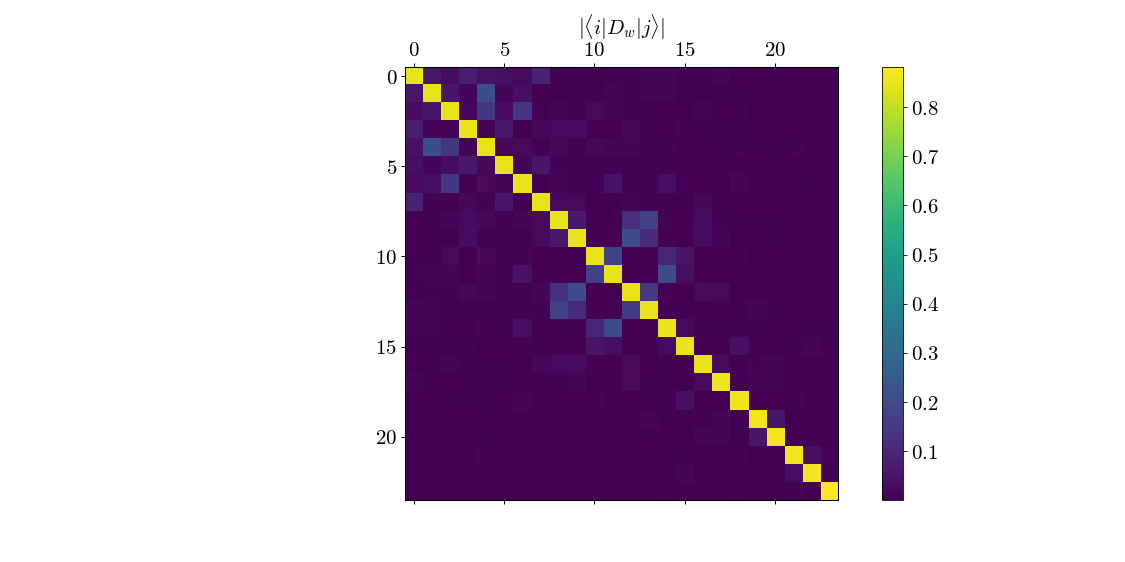

In [9]:
fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(Dw), cmap = 'viridis')
ax.set_title(r'$| \langle i | D_w | j\rangle |$', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

In [10]:
ritz_labels = ['c' if r < 1e-8 else int(np.log10(r) - 1) for r in ritz_values]        # Show the leading power on non-converged eigenvalues

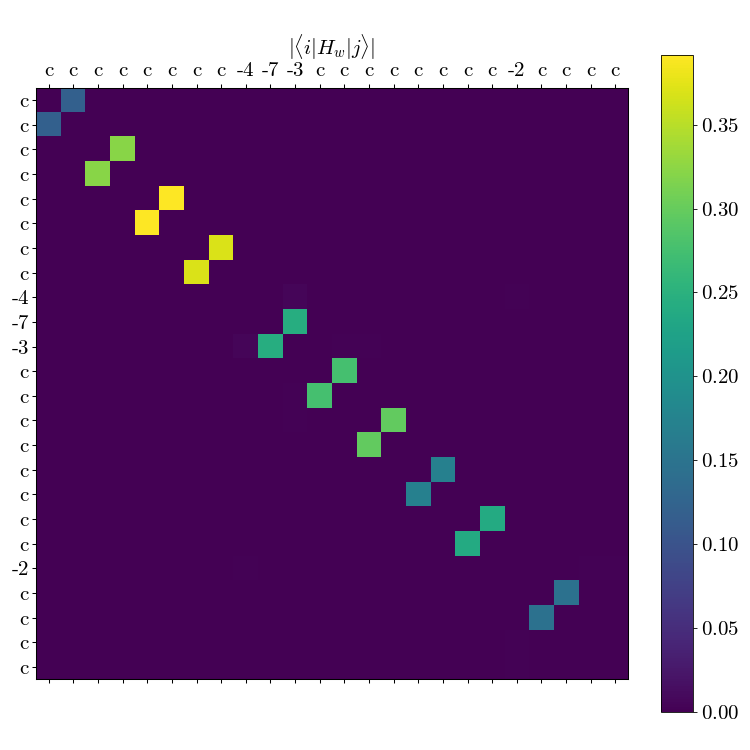

In [11]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
# fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(Hw), cmap = 'viridis')
ax.set_title(r'$| \langle i | H_w | j\rangle |$', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

# Set x and y tick labels to be 'c' if converged (ritz < 10^-8), or the leading power on the ritz value.
ax.set_xticks(range(Nevecs))
ax.set_xticklabels(ritz_labels)
ax.set_yticks(range(Nevecs))
ax.set_yticklabels(ritz_labels)

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

In [12]:
Hw[:2, :2]

array([[ 2.19321089e-14+1.08420217e-19j,  9.54873433e-02-7.27261469e-02j],
       [ 9.54873433e-02+7.27261469e-02j, -9.62424584e-15+0.00000000e+00j]])

[]

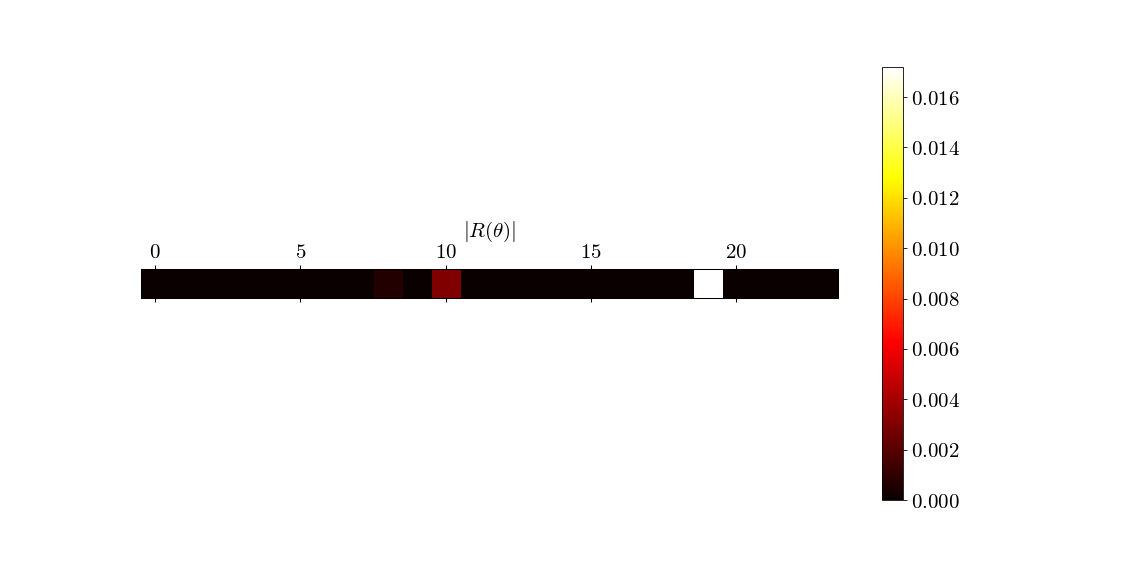

In [13]:
plot_ritz = ritz_values.copy().reshape((1, len(ritz_values)))

fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(plot_ritz), cmap = 'hot')
ax.set_title(r'$| R(\theta) |$', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image)
cbar.ax.tick_params(labelsize = default_style['fontsize'])
ax.set_yticks([])

### Only view converged sector of $H_W$

In [14]:
EPS = 1e-8              # Convergence tolerance
converged = Hw[np.arange(Nevecs)[ritz_values < EPS], np.arange(Nevecs)[ritz_values < EPS]]

In [15]:
converged = Hw.copy()
for idx in np.arange(Nevecs)[ritz_values > EPS][::-1]:
    converged = np.delete(converged, idx, 0)            # delete row $idx
    converged = np.delete(converged, idx, 1)            # delete col $idx

In [16]:
converged_Dw = Dw.copy()
for idx in np.arange(Nevecs)[ritz_values > EPS][::-1]:
    converged_Dw = np.delete(converged_Dw, idx, 0)            # delete row $idx
    converged_Dw = np.delete(converged_Dw, idx, 1)            # delete col $idx

In [17]:
converged_Dw

array([[-8.50143561e-01-2.52482214e-02j,  3.91482362e-02-4.05386012e-02j,
        -1.74058616e-02-2.33956590e-02j, -6.99702846e-02+2.53904235e-02j,
        -3.92953200e-02-9.33515975e-03j,  2.76829548e-02+1.56599196e-02j,
         1.30751692e-02-1.90801310e-02j, -4.42387014e-03-8.49674226e-02j,
        -5.27514011e-03-5.70112472e-03j,  1.52847716e-03+4.00652997e-03j,
        -1.94100694e-03-1.53367957e-02j, -9.95613760e-03-4.69306829e-03j,
        -2.21297770e-03+6.09200161e-03j, -6.17205796e-03+4.14534940e-04j,
         8.23467852e-03+8.26560125e-03j,  2.37011656e-03-6.06363108e-04j,
         2.53111605e-04+4.33377637e-03j, -1.77906592e-03+3.16108491e-03j,
        -2.72852946e-04+2.06546820e-04j, -2.12209216e-03+1.11744824e-03j],
       [ 3.91482362e-02+4.05386012e-02j, -8.50143561e-01+2.52482214e-02j,
         4.96345243e-02+2.44887135e-02j, -3.97291130e-04+1.26175523e-02j,
         1.36088755e-01+1.63235014e-01j,  1.07005153e-02+7.73496058e-03j,
        -1.11838290e-02+3.40824023e-0

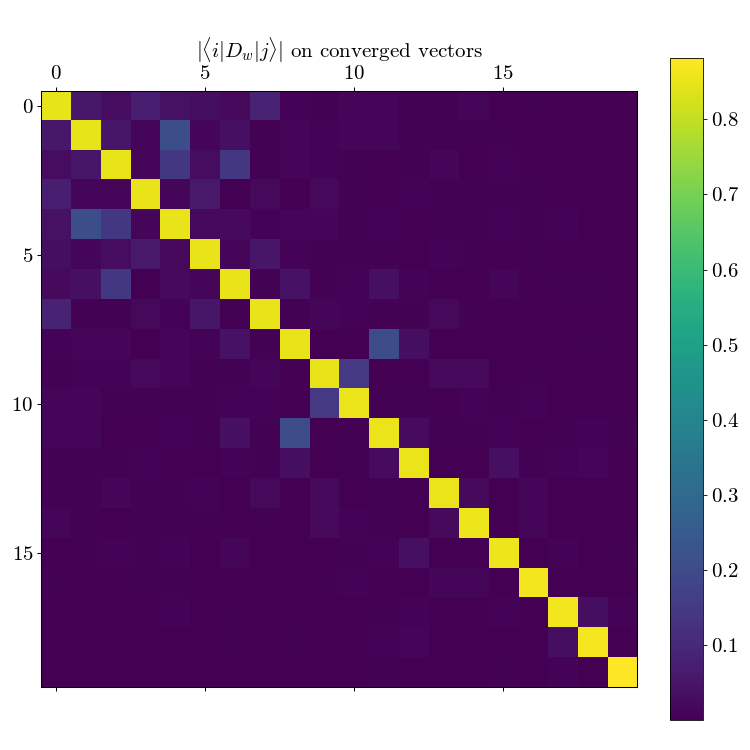

In [18]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
# fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(converged_Dw), cmap = 'viridis')
ax.set_title(r'$| \langle i | D_w | j\rangle |$ on converged vectors', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()

In [19]:
converged

array([[ 2.19321089e-14+1.08420217e-19j,  9.54873433e-02-7.27261469e-02j,
         1.13539386e-13-1.11547924e-13j,  3.09674161e-14+3.42260942e-14j,
         1.65171696e-13-1.15532584e-15j,  2.00672812e-14-1.72292736e-14j,
        -9.56595914e-14-1.22062083e-13j, -1.98938088e-14-1.21205129e-14j,
         2.05842288e-14-4.73579509e-16j,  1.93777286e-14+1.21430643e-17j,
        -6.79534554e-15+1.83915383e-14j, -3.33799828e-14+3.74136486e-14j,
        -1.14665222e-15+3.25867805e-15j, -2.58560534e-15-1.14491749e-15j,
        -1.85008259e-15+1.93074723e-14j, -4.36639440e-13+7.57718541e-14j,
         4.37849626e-15-1.60461922e-15j, -5.13174572e-15-2.15864653e-15j,
         1.20882904e-13-1.30216584e-13j, -3.19752905e-15+1.36923892e-15j],
       [ 9.54873433e-02+7.27261469e-02j, -9.62424584e-15+0.00000000e+00j,
         3.76608467e-14+5.20486432e-14j, -1.37653777e-13+1.53335677e-13j,
        -2.30093722e-14-2.94031292e-14j, -3.66452702e-12-5.67872138e-13j,
         3.74613535e-15+1.35100264e-1

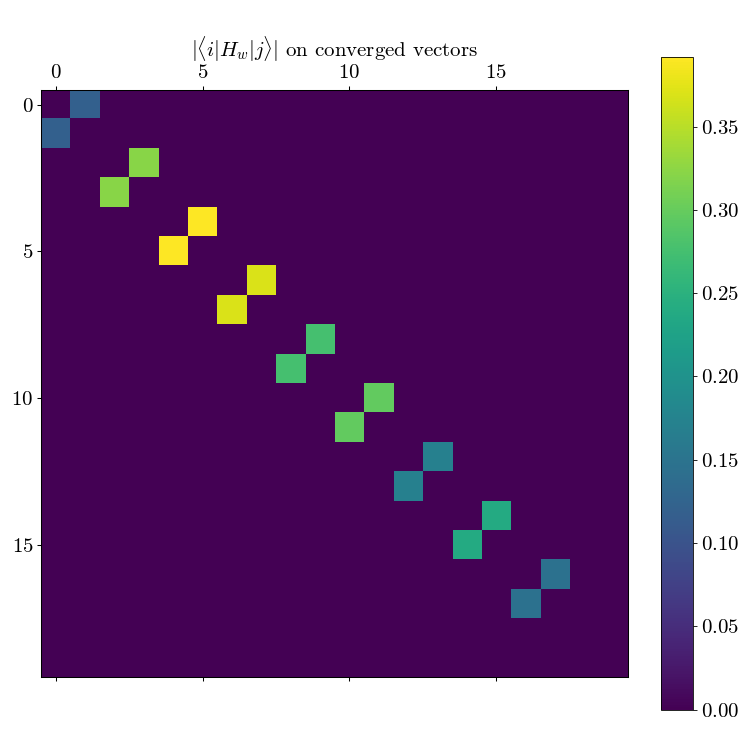

In [20]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
# fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(converged), cmap = 'viridis')
ax.set_title(r'$| \langle i | H_w | j\rangle |$ on converged vectors', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

In [21]:
x, y = np.where(np.abs(converged) > 1e-8)
print(f'Indices where <i|H|j> > 1e-8:\n{list(zip(x, y))}')

Indices where <i|H|j> > 1e-8:
[(0, 1), (1, 0), (2, 3), (3, 2), (4, 5), (5, 4), (6, 7), (7, 6), (8, 9), (9, 8), (10, 11), (11, 10), (12, 13), (13, 12), (14, 15), (15, 14), (16, 17), (17, 16)]


In [22]:
evals[ritz_values < 1e-8]

array([-0.85014356-0.02524822j, -0.85014356+0.02524822j,
       -0.85011975+0.0442111j , -0.85011975-0.0442111j ,
       -0.85058631+0.0342642j , -0.85058631-0.0342642j ,
       -0.85017666+0.05310656j, -0.85017666-0.05310656j,
       -0.84693252+0.10945035j, -0.84693252-0.10945035j,
       -0.84896474-0.10262427j, -0.84896474+0.10262427j,
       -0.84403192+0.14772355j, -0.84403192-0.14772355j,
       -0.84117364-0.17281528j, -0.84117364+0.17281528j,
       -0.83013592-0.25231681j, -0.83013592+0.25231681j,
       -0.82748762+0.26610602j, -0.81274548+0.34203848j])

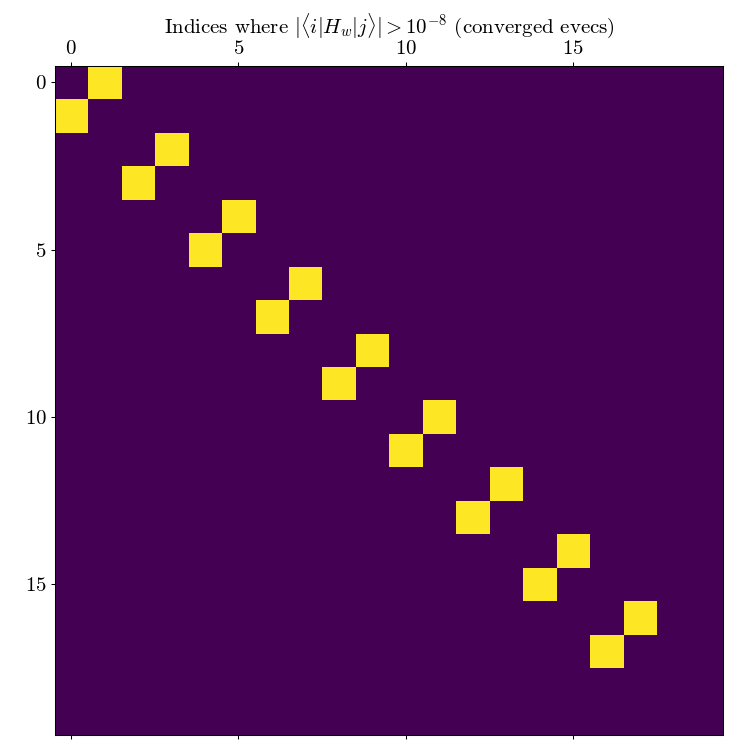

In [23]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
# fig, axes = pt.add_subplots()
ax = axes[0]
image = ax.matshow(np.abs(converged) > 1e-8, cmap = 'viridis')
ax.set_title(r'Indices where $| \langle i | H_w | j\rangle | > 10^{-8}$ (converged evecs)', fontsize = default_style['fontsize'])
# cbar = plt.colorbar(image, fraction = 0.05)
# cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

### Change converged basis to $H_W$ basis via block rotations

In a complex conjugate block with $D_W$ eigenvectors $|i\rangle$ and $|j\rangle$, using the matrix element
$$
    \xi_{ij} := r e^{i\omega} := \langle i | H_W | j\rangle,
$$
one can show that the $H_W$ eigenvectors in this block are given by 
$$
    |h_\pm\rangle = \frac{1}{\sqrt 2} \left( e^{i\omega} |i\rangle \pm |j\rangle \right)
$$ 
with eigenvalues $\pm r$,
$$
    H_W |h_\pm\rangle = \pm r |h_\pm\rangle. 
$$

In [24]:
raw_Hw_Hbasis = r"""(0.120028851,-8.13151629e-20)    (1.57764427e-14,6.9388939e-18)  (-1.96769684e-14,1.86795024e-13)  (1.14078885e-13,-1.25299077e-14) (-1.79709719e-12,-2.23800145e-13)   (1.84102386e-12,3.45615897e-13)  (1.66029517e-13,-1.46839138e-13)   (-4.8034493e-14,6.86213239e-14)   (1.57199557e-14,3.14409956e-14)  (-7.85656262e-15,3.16109985e-15)  (-3.34628159e-14,1.36628989e-14)   (9.30570725e-15,8.26682472e-15)  (-1.17917828e-15,1.99753408e-15)  (8.29696555e-15,-2.74086309e-15) (-3.36963964e-13,-9.02281722e-14)   (3.25968419e-13,7.76332124e-14) (-5.96354563e-15,-2.88744723e-15) (-1.84650472e-15,-9.95731275e-16)
 (1.57751416e-14,-8.67361738e-18)     (-0.120028851,1.62630326e-19)  (1.36054362e-13,-2.81892565e-14)  (-5.49213452e-15,7.91510954e-14)   (1.86773513e-12,3.81404977e-13) (-1.82319958e-12,-1.84924992e-13)   (-4.7451626e-14,3.62323019e-14)  (1.83582316e-13,-1.35832318e-13) (-1.35781143e-14,-3.94562855e-15)    (-2.0814947e-14,8.3353463e-16)   (-9.8723113e-15,1.45768814e-14)   (4.58097102e-14,8.94249952e-16)  (2.94209102e-15,-5.93535637e-15)  (-3.80511594e-15,3.75741105e-15)  (-4.5203858e-14,-1.29956809e-13)   (7.84121032e-14,1.10750385e-13) (-1.46844342e-15,-2.19594308e-15)  (-3.51281504e-17,5.56455923e-15)
(-1.96743663e-14,-1.86793289e-13)   (1.36057832e-13,2.81927259e-14)      (0.321414817,5.42101086e-20)  (-2.71772622e-14,1.38777878e-17)   (-7.8610729e-14,1.34791484e-13)  (2.75479292e-13,-3.41089136e-13)   (4.61235217e-13,1.38625222e-13)  (-3.90776604e-13,2.10906596e-13)   (3.32650574e-14,1.93681876e-14)  (-1.09994479e-14,5.64652491e-16)  (1.38115214e-13,-1.72388145e-14)  (2.46972581e-14,-2.24386482e-14)  (-1.65449252e-15,2.05738204e-15)  (1.83533744e-15,-2.23631877e-14)  (3.24344284e-12,-1.19945503e-12)    (-3.1965498e-12,1.1911739e-12) (-7.00177763e-15,-6.39516651e-16)   (4.17244364e-15,8.49147141e-16)
  (1.14071946e-13,1.25299077e-14) (-5.49560397e-15,-7.91493607e-14) (-2.71776959e-14,-1.04083409e-17)     (-0.321414817,1.21972744e-19)  (-2.36748121e-13,3.91398719e-13)  (4.99184027e-14,-1.11754356e-13)  (4.02828812e-13,-2.22565022e-13) (-4.42245199e-13,-1.80981966e-13)  (-2.37899977e-14,2.73565892e-14) (-3.90945956e-14,-2.50095084e-14)  (3.13984949e-15,-8.46024639e-15)  (1.04620305e-13,-1.54017424e-14)   (1.52495204e-14,1.17718335e-14)  (-3.12120121e-14,3.63077624e-15)  (-4.35022547e-12,7.12181182e-13)   (4.37252274e-12,-7.0883837e-13)  (-6.84782092e-16,1.88390969e-15) (-1.19455227e-14,-2.12568678e-15)
 (-1.79708332e-12,2.23800145e-13)  (1.86773687e-12,-3.81401508e-13) (-7.86176679e-14,-1.34794953e-13) (-2.36746386e-13,-3.91398719e-13)                   (0.391529375,0)   (2.84390567e-14,2.42861287e-17)   (2.56425089e-13,2.13648543e-13)  (-5.11118925e-14,2.80504786e-14)   (2.68448458e-14,1.98851352e-14) (-1.90758867e-14,-4.57620053e-15) (-2.13318946e-14,-1.87645038e-14)   (7.04124259e-15,1.45031556e-14)    (1.83872015e-14,1.0046651e-14)  (-1.08897266e-15,1.21881671e-14) (-2.80933496e-12,-4.30412216e-13)   (2.82432953e-12,4.21827503e-13)    (3.7630489e-15,7.87445196e-15) (-6.00214323e-15,-4.48024864e-15)
 (1.84102386e-12,-3.45612428e-13)  (-1.82319784e-12,1.84926727e-13)   (2.75477557e-13,3.41086534e-13)   (4.99149333e-14,1.11757825e-13)  (2.84381893e-14,-2.08166817e-17)    (-0.391529375,-1.35525272e-19)  (4.93719648e-14,-1.75623405e-14) (-2.25701402e-13,-2.06529238e-13)  (3.84917792e-14,-5.91974386e-15)    (-2.72438322e-14,4.228215e-14)   (2.37245119e-14,4.56058802e-15)  (-1.17735682e-14,-3.0036737e-15)   (9.96164956e-16,4.08180434e-15)   (1.68918698e-14,-1.0617375e-14)    (3.03552192e-12,1.8481397e-13) (-3.04909353e-12,-1.77791375e-13) (-5.47587149e-15,-2.27351775e-15)   (6.32740388e-15,5.62700928e-17)
  (1.66032119e-13,1.46837403e-13) (-4.74481565e-14,-3.62357713e-14)  (4.61238686e-13,-1.38625222e-13)   (4.02829679e-13,2.22559818e-13)   (2.5642162e-13,-2.13645074e-13)   (4.93719648e-14,1.75623405e-14)      (0.368751395,2.43945489e-19)  (1.16920362e-15,-2.51534904e-17)   (3.67119529e-14,6.57876531e-14) (-3.79149837e-14,-1.37190606e-14)  (8.32181546e-14,-1.80686629e-14) (-2.08262227e-14,-1.12496817e-14)  (8.65123945e-14,-6.67001177e-15)  (-1.82850696e-14,2.26416108e-14)  (-1.5837982e-12,-1.19951184e-12)    (1.54778707e-12,1.1978786e-12)  (6.90810256e-15,-4.79358307e-15)  (-3.56745883e-15,2.41343404e-16)
(-4.80379625e-14,-6.86230586e-14)   (1.83582316e-13,1.35839257e-13) (-3.90776821e-13,-2.10905945e-13)     (-4.4223826e-13,1.809837e-13) (-5.11118925e-14,-2.80522133e-14)  (-2.25697933e-13,2.06529238e-13)   (1.16660154e-15,2.60208521e-17)     (-0.368751395,1.35525272e-19)   (4.19347716e-14,2.04957579e-14) (-3.22814692e-14,-5.52509427e-14) (-1.28785871e-14,-6.00561267e-15)   (7.83557247e-14,4.24313362e-15)   (3.17697257e-14,1.04395659e-14)  (-7.56623496e-14,3.27797685e-15)   (9.59077002e-13,3.28368929e-12) (-9.77317186e-13,-3.26708365e-12)   (7.29234381e-16,8.39823003e-16)    (1.94202293e-15,-1.284064e-14)
  (1.57210399e-14,-3.1443164e-14)   (-1.3577247e-14,3.94649591e-15)  (3.32650574e-14,-1.93668866e-14) (-2.37917325e-14,-2.73539871e-14)  (2.68431111e-14,-1.98886047e-14)   (3.84900445e-14,5.91974386e-15)  (3.67128203e-14,-6.57896047e-14)  (4.19352053e-14,-2.04966252e-14)                   (0.276333811,0)  (-1.50209706e-14,3.46944695e-18)   (1.86109114e-12,1.46015318e-12)   (3.22509814e-13,7.26486579e-13) (-6.36643516e-14,-1.58545052e-13)  (1.02501341e-13,-5.20417043e-16) (-4.51529222e-13,-3.96684595e-12)    (4.42520586e-13,3.9387894e-12)   (3.44188653e-14,3.26344854e-16) (-3.01261837e-15,-1.26873338e-15)
(-7.85656262e-15,-3.16044933e-15)   (-2.0814947e-14,-8.3353463e-16) (-1.09964121e-14,-5.65953534e-16)   (-3.9095463e-14,2.50095084e-14)  (-1.90758867e-14,4.57533317e-15) (-2.72420975e-14,-4.22838847e-14)    (-3.791455e-14,1.37238311e-14)  (-3.22806018e-14,5.52561469e-14) (-1.50201032e-14,-3.46944695e-18)     (-0.276333811,2.16840434e-19)   (3.23649094e-13,7.16910906e-13)   (1.85383653e-12,1.45196355e-12)  (-1.07318668e-13,6.07153217e-16)   (3.51333546e-14,1.31016725e-13)  (-3.89109643e-13,5.29215387e-12)   (3.1364039e-13,-5.31349682e-12)   (2.59688104e-15,7.07637074e-15)   (1.71347311e-14,1.74975052e-14)
(-3.34645506e-14,-1.36670189e-14) (-9.87404603e-15,-1.45768814e-14)   (1.38115214e-13,1.72388145e-14)   (3.13811477e-15,8.45851167e-15)  (-2.13318946e-14,1.87645038e-14)   (2.37240783e-14,-4.5631901e-15)    (8.32164199e-14,1.8068446e-14)  (-1.28820565e-14,6.00908212e-15)  (1.86108594e-12,-1.46015491e-12)   (3.23650828e-13,-7.1691264e-13)                   (0.297291686,0)   (-6.42498207e-15,6.9388939e-18)   (4.52207716e-14,4.06098766e-15)   (1.71282259e-14,6.03883263e-14)  (1.16513327e-11,-3.91712357e-12)  (-1.16320857e-11,3.91893592e-12)   (1.8875743e-14,-2.80027737e-15)   (-5.10843538e-15,9.2942147e-15)
   (9.303322e-15,-8.26812577e-15)   (4.58062407e-14,-8.9338259e-16)   (2.46955234e-14,2.24386482e-14)   (1.04621173e-13,1.54017424e-14)  (7.03950787e-15,-1.45031556e-14)   (-1.1775303e-14,3.00193898e-15)   (-2.0824488e-14,1.12496817e-14)  (7.83583268e-14,-4.24313362e-15)   (3.2250938e-13,-7.26488314e-13)  (1.85383653e-12,-1.45196528e-12)  (-6.42454839e-15,-6.9388939e-18)    (-0.297291686,-2.16840434e-19)   (1.28781534e-14,7.61699731e-14)   (2.99447966e-14,1.92727778e-15)  (8.50008865e-12,-1.20760043e-12)  (-8.47622536e-12,1.20849337e-12)   (3.95994001e-15,-1.3166768e-14) (-4.72625411e-15,-6.62360791e-15)
 (-1.17787724e-15,-1.9971004e-15)   (2.94209102e-15,5.93492269e-15) (-1.65405883e-15,-2.05651468e-15)  (1.52490867e-14,-1.17718335e-14)   (1.83872015e-14,-1.0046651e-14)  (9.96164956e-16,-4.08353906e-15)    (8.65123945e-14,6.6691444e-15)  (3.17714605e-14,-1.04413006e-14)  (-6.36660863e-14,1.58545052e-13) (-1.07320403e-13,-6.05418493e-16)   (4.5224241e-14,-4.05968661e-15)  (1.28781534e-14,-7.61717078e-14)     (0.170169865,-3.25260652e-19) (-6.74460487e-15,-8.67361738e-19) (-1.50157664e-13,-9.52213135e-13)    (4.8890926e-13,7.56799137e-13)  (-6.09495093e-15,1.68745226e-14)   (7.34525288e-15,1.43487652e-14)
  (8.29707397e-15,2.73999573e-15) (-3.80511594e-15,-3.75741105e-15)   (1.83577112e-15,2.23631877e-14) (-3.12094101e-14,-3.63034255e-15) (-1.08897266e-15,-1.21872998e-14)    (1.68936046e-14,1.0617375e-14) (-1.82852865e-14,-2.26407434e-14) (-7.56630002e-14,-3.27776001e-15)   (1.02503075e-13,5.16947596e-16)  (3.51333546e-14,-1.31014991e-13)  (1.71284428e-14,-6.03891936e-14)  (2.99447966e-14,-1.92641042e-15) (-6.74460487e-15,-8.67361738e-19)     (-0.170169865,2.16840434e-19)    (7.4267285e-13,5.38034027e-13) (-3.96542174e-13,-7.26447548e-13)  (-3.68758843e-15,1.38495986e-14)  (-3.76651835e-16,2.43884773e-14)
 (-3.36963964e-13,9.02281722e-14)  (-4.52042917e-14,1.29956809e-13)    (3.24344371e-12,1.1994546e-12) (-4.35022623e-12,-7.12180748e-13)  (-2.80933458e-12,4.30411783e-13)  (3.03552192e-12,-1.84813753e-13)  (-1.58379733e-12,1.19951271e-12)  (9.59078303e-13,-3.28368843e-12)  (-4.51527704e-13,3.96684508e-12)   (-3.89109751e-13,-5.292153e-12)    (1.1651334e-11,3.91712357e-12)   (8.50008822e-12,1.20760021e-12)  (-1.50159399e-13,9.52213135e-13)    (7.4267285e-13,-5.3803316e-13)     (0.238911929,-3.52365706e-19)  (1.78241428e-13,-5.20417043e-18)    (2.29492944e-12,4.8757721e-13)   (2.60352222e-12,5.98092756e-13)
 (3.25967335e-13,-7.76332124e-14)   (7.84124285e-14,-1.1074865e-13) (-3.19654871e-12,-1.19117346e-12)   (4.37252123e-12,7.08837936e-13)    (2.8243304e-12,-4.2182707e-13)  (-3.04909396e-12,1.77792676e-13)  (1.54778664e-12,-1.19787947e-12)  (-9.77316752e-13,3.26708452e-12)  (4.42520152e-13,-3.93879113e-12)   (3.13639739e-13,5.31349877e-12) (-1.16320854e-11,-3.91893636e-12) (-8.47622363e-12,-1.20849337e-12)   (4.88910995e-13,-7.5679827e-13)  (-3.96540439e-13,7.26447982e-13)   (1.78241753e-13,5.20417043e-18)     (-0.238911929,1.08420217e-19) (-2.36778045e-12,-5.25507589e-13) (-2.52657444e-12,-5.77842461e-13)
 (-5.96332879e-15,2.88744723e-15)  (-1.46692554e-15,2.19626834e-15)   (-7.00156079e-15,6.3902876e-16) (-6.84782092e-16,-1.88325917e-15)  (3.76261522e-15,-7.87434354e-15)  (-5.47608833e-15,2.27411406e-15)    (6.9077773e-15,4.79390833e-15)  (7.29668062e-16,-8.39823003e-16)  (3.44182148e-14,-3.25477492e-16)  (2.59471264e-15,-7.07658758e-15)   (1.88768272e-14,2.80006053e-15)   (3.96015686e-15,1.31676354e-14) (-6.09451725e-15,-1.68732216e-14) (-3.68802211e-15,-1.38491649e-14)    (2.294929e-12,-4.87578294e-13)  (-2.36778002e-12,5.25508456e-13)        (0.1455316,1.08420217e-19)  (-1.57165947e-15,3.46944695e-18)
 (-1.84661314e-15,9.95514435e-16) (-3.53449908e-17,-5.56412555e-15)  (4.17244364e-15,-8.49363982e-16)  (-1.19453059e-14,2.12612046e-15)  (-6.00257691e-15,4.47981496e-15)   (6.3269702e-15,-5.65953534e-17) (-3.56832619e-15,-2.41560244e-16)   (1.94289029e-15,1.28408569e-14)   (-3.01283521e-15,1.2682997e-15)  (1.71338638e-14,-1.74966378e-14) (-5.10821854e-15,-9.29378102e-15)  (-4.72668779e-15,6.62360791e-15)  (7.34460236e-15,-1.43496326e-14) (-3.76651835e-16,-2.43886942e-14)  (2.60352178e-12,-5.98091889e-13)  (-2.52657552e-12,5.77843329e-13) (-1.57209315e-15,-4.33680869e-18)      (-0.1455316,-5.42101086e-20)"""
Hw_Hbasis = read_Eigen_matrix(raw_Hw_Hbasis)

In [25]:
np.sum(np.imag(Hw_Hbasis))      # should be all real

1.4196840209761163e-17

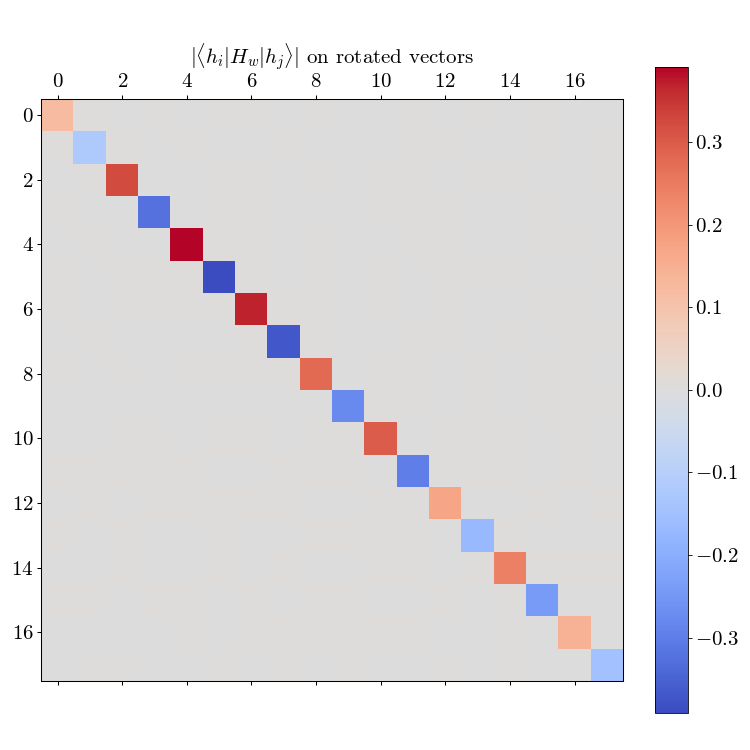

In [26]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.real(Hw_Hbasis), cmap = 'coolwarm')
ax.set_title(r'$| \langle h_i | H_w | h_j\rangle |$ on rotated vectors', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

In [27]:
np.real(Hw_Hbasis).diagonal()

array([ 0.12002885, -0.12002885,  0.32141482, -0.32141482,  0.39152938,
       -0.39152938,  0.36875139, -0.36875139,  0.27633381, -0.27633381,
        0.29729169, -0.29729169,  0.17016987, -0.17016987,  0.23891193,
       -0.23891193,  0.1455316 , -0.1455316 ])

In [28]:
Hw_Hbasis

array([[ 1.20028851e-01-8.13151629e-20j,  1.57764427e-14+6.93889390e-18j,
        -1.96769684e-14+1.86795024e-13j,  1.14078885e-13-1.25299077e-14j,
        -1.79709719e-12-2.23800145e-13j,  1.84102386e-12+3.45615897e-13j,
         1.66029517e-13-1.46839138e-13j, -4.80344930e-14+6.86213239e-14j,
         1.57199557e-14+3.14409956e-14j, -7.85656262e-15+3.16109985e-15j,
        -3.34628159e-14+1.36628989e-14j,  9.30570725e-15+8.26682472e-15j,
        -1.17917828e-15+1.99753408e-15j,  8.29696555e-15-2.74086309e-15j,
        -3.36963964e-13-9.02281722e-14j,  3.25968419e-13+7.76332124e-14j,
        -5.96354563e-15-2.88744723e-15j, -1.84650472e-15-9.95731275e-16j],
       [ 1.57751416e-14-8.67361738e-18j, -1.20028851e-01+1.62630326e-19j,
         1.36054362e-13-2.81892565e-14j, -5.49213452e-15+7.91510954e-14j,
         1.86773513e-12+3.81404977e-13j, -1.82319958e-12-1.84924992e-13j,
        -4.74516260e-14+3.62323019e-14j,  1.83582316e-13-1.35832318e-13j,
        -1.35781143e-14-3.94562855e-1

### $\gamma_5$ matrix elements

In [29]:
g5_Dwbasis = read_Eigen_matrix(r"""(-2.40137771e-14,1.12795709e-20)       (-0.114758465,0.0821375389)   (-1.38033682e-13,1.2402579e-13) (-3.54074409e-14,-3.80737109e-14) (-1.92949823e-13,-6.01602101e-15)  (-2.26901831e-14,2.13006696e-14)   (1.04213513e-13,1.50820328e-13)   (2.44804177e-14,1.25142952e-14) (-1.60060078e-06,-8.29475786e-07)   (-1.92014611e-10,2.7261756e-10)  (-1.15343901e-05,4.09993304e-06) (-2.45628171e-14,-1.24553146e-15)  (-2.22148688e-14,2.73045475e-15)  (5.00901404e-15,-2.31342723e-14)  (4.55590426e-14,-3.94476118e-14)   (2.14758766e-15,-3.6247047e-15)   (4.11649881e-15,7.72819309e-16) (-2.35011663e-15,-2.21038465e-14)  (5.20210611e-13,-7.46356102e-14) (-7.79112142e-06,-2.26926393e-05)   (-5.07276512e-15,3.0455239e-15)   (4.59831825e-15,3.36839931e-15)  (-1.47161797e-13,1.48791569e-13)  (3.28030788e-15,-1.27513018e-15)
(-0.114758465,-0.0821375389)  (9.74914593e-15,-6.25788595e-22) (-4.03600764e-14,-6.17388085e-14)  (1.57561464e-13,-1.89358945e-13)   (2.52454307e-14,3.55653007e-14)   (4.32837099e-12,4.93390051e-13)  (-3.6021533e-15,-1.77843851e-14)  (-2.49188691e-13,2.42764142e-13)  (-2.35285158e-06,-9.1860529e-07)    (-2.0628595e-10,3.7012433e-10)  (-5.70155972e-06,2.73041913e-06)  (-2.29686062e-14,2.46426143e-14) (-1.15811223e-14,-1.82258722e-14)   (1.49563521e-14,3.36159052e-14)  (-9.68669589e-15,4.74880552e-15)   (5.06712727e-15,6.61797006e-16)  (8.55966773e-15,-1.01134379e-14)  (-2.63617253e-14,2.52011953e-15)  (3.15825057e-13,-5.07840298e-14) (-1.02594583e-05,-2.19961153e-05) (-2.65369324e-15,-4.37670733e-15)    (3.18744597e-15,-3.094313e-15)  (-9.01965135e-14,1.02107992e-13)  (-2.37180067e-15,8.41476411e-16)
(-1.38033682e-13,-1.2402579e-13)  (-4.03600764e-14,6.17370738e-14)    (9.5881636e-14,2.04501132e-21)       (-0.246434282,-0.286060194)   (6.65309821e-15,-4.5670065e-14)  (6.77931669e-13,-8.67101529e-14)  (-1.59386393e-14,3.24532068e-14) (-7.09866194e-13,-6.98982539e-13)   (4.2518985e-06,-1.74569178e-05) (-2.58629442e-09,-1.02718655e-09)   (-1.548884e-05,-2.42103394e-05)  (1.07101827e-14,-2.71969947e-14)  (3.86669863e-15,-5.00519765e-14)  (5.33379764e-14,-1.53319198e-13)   (2.4867261e-15,-7.03777314e-15) (-4.54150606e-15,-6.24023402e-15) (-1.07596224e-15,-2.89560043e-14)   (2.82013995e-14,3.11135666e-14)   (4.44863764e-13,1.38735117e-12)  (0.000116880312,-7.38946099e-05) (-3.87732381e-15,-7.52273677e-15)  (8.40907205e-16,-1.19077925e-15)  (-5.7299109e-13,-3.55769667e-13)   (9.10512984e-16,-7.5373735e-16)
(-3.54074409e-14,3.80737109e-14)    (1.57561464e-13,1.8936068e-13)        (-0.246434282,0.286060194)    (3.3010053e-14,1.19013478e-20)  (-2.13162821e-14,3.62347305e-13)   (4.15431578e-14,1.35967626e-14) (-3.82791021e-13,-2.14300799e-13)   (-4.3229309e-15,1.66984482e-14)   (2.21846789e-05,8.48694785e-06)  (2.15174038e-09,-3.92874383e-09)  (0.000214287613,-0.000102498966)  (-6.53210125e-15,4.95350289e-14)  (-1.54611567e-14,2.07676758e-14)   (-1.564417e-14,-2.41560244e-14) (-1.26742367e-13,-1.09677892e-14)  (6.41674214e-15,-2.16233281e-14)   (2.91626532e-14,-8.8646538e-15)  (1.50626039e-14,-8.14821301e-15)  (-9.01290934e-12,1.77132831e-12)   (0.000145762318,0.000307949147)    (5.28830452e-15,1.8190744e-15)   (1.14505844e-14,4.10175366e-15)   (2.1831109e-12,-2.65208515e-12)  (3.85238716e-15,-1.11862017e-14)
(-1.92949823e-13,6.01602101e-15)  (2.52454307e-14,-3.55661681e-14)    (6.65309821e-15,4.5670065e-14)  (-2.13162821e-14,-3.6234904e-13) (-6.00838823e-14,-4.32379703e-21)        (-0.37551457,-0.265568251) (-1.89258331e-14,-4.46431087e-15)  (-1.54980195e-13,-3.7715317e-13)   (3.39944864e-06,1.24690071e-06)  (2.77092341e-10,-5.18730841e-10)  (6.65897223e-06,-3.23954457e-06) (-2.93784094e-14,-7.12234091e-15) (-6.20267726e-14,-2.50780299e-14)  (-2.01835076e-15,1.35134959e-15)  (-1.15654014e-14,9.19403442e-15)   (1.41484047e-14,1.73190455e-14)  (2.33970829e-15,-6.81572854e-15)   (2.35271871e-16,2.74086309e-16)  (-3.83981475e-13,8.13021525e-14)   (1.37764748e-05,2.85212413e-05)  (-1.29497107e-15,1.12323345e-16)  (5.28049826e-15,-3.23786137e-15)  (1.04199852e-13,-1.32480832e-13)     (-2.7248169e-15,8.408801e-16)
(-2.26901831e-14,-2.13024043e-14)  (4.32837099e-12,-4.93390051e-13)   (6.77931669e-13,8.67066835e-14)  (4.15431578e-14,-1.36002321e-14)         (-0.37551457,0.265568251)    (8.5348395e-15,1.33708652e-20)  (-3.53442969e-13,1.36800293e-14)  (-1.81937798e-14,1.15098903e-15) (-1.59442592e-05,-1.34412932e-05)  (-2.89156072e-09,2.61030085e-09)  (-0.000168468687,1.80857449e-05)  (1.11187101e-14,-1.01221115e-15)  (1.12600901e-14,-4.06155144e-14)   (5.27355937e-16,1.72453198e-14)    (3.6673789e-14,2.52037974e-14)  (-4.96130914e-16,1.56888391e-14)  (-2.12312806e-14,1.06381917e-14)  (1.88044025e-14,-5.87637577e-15)   (6.84678334e-12,9.89028304e-13) (-3.04914747e-05,-0.000286568328)  (-2.09120915e-15,3.10775711e-15) (-1.30533605e-14,-9.72572717e-15)  (-2.29169331e-12,1.39673884e-12)  (-5.77662918e-15,2.10335221e-16)
(1.04213513e-13,-1.50818594e-13)   (-3.6021533e-15,1.77843851e-14) (-1.59386393e-14,-3.24540742e-14)  (-3.82791021e-13,2.14300799e-13)   (-1.89258331e-14,4.4634435e-15) (-3.53442969e-13,-1.36800293e-14)    (1.0890594e-14,3.32266077e-21)       (-0.265099311,-0.342223944) (-3.85723645e-05,-6.17115806e-06)  (-1.69587189e-09,5.44933007e-09)  (-3.91384401e-05,2.89912311e-05) (-9.71531883e-15,-4.62477279e-15)  (1.67973274e-14,-1.20765594e-13)  (2.97266552e-14,-6.97081282e-14) (-1.60167019e-14,-1.30190997e-15)  (-2.82000985e-15,2.21253137e-14) (-8.70839859e-14,-9.19403442e-14)   (-2.357229e-14,-2.23879075e-14)  (2.35488408e-12,-9.40204511e-13) (-0.000154496724,-0.000209193216)   (9.45879659e-15,-2.1059543e-15)  (1.54379547e-15,-7.34265079e-15)   (-5.68433647e-13,1.0366122e-12)    (7.04601308e-15,4.5610217e-15)
(2.44804177e-14,-1.25160299e-14) (-2.49188691e-13,-2.42764142e-13)  (-7.09866194e-13,6.98986008e-13)  (-4.3229309e-15,-1.66949787e-14)   (-1.54980195e-13,3.7715317e-13) (-1.81937798e-14,-1.15098903e-15)        (-0.265099311,0.342223944)  (1.35724765e-14,-1.72401768e-21)   (1.2950537e-06,-1.35890082e-05) (-2.52480822e-09,-5.93491609e-10) (-0.000108289865,-0.000126390541) (-5.41927614e-14,-1.17839766e-14)  (-4.62303806e-16,-6.0888794e-16)  (-1.86343996e-14,5.59318217e-15) (-1.11103834e-13,-1.20806143e-14)  (6.77739115e-14,-3.24913707e-15)   (1.38344197e-15,2.12139334e-14) (-7.12971349e-15,-1.30659372e-14)   (2.64256976e-12,5.42814231e-12)   (0.00015281535,-0.000131752257)     (2.992398e-17,4.13514709e-15)  (-9.17712087e-15,1.11785581e-14) (-1.97886315e-12,-8.90103095e-13)   (1.73188287e-14,5.23973226e-15)
(-1.60060078e-06,8.29475786e-07)   (-2.35285158e-06,9.1860529e-07)    (4.2518985e-06,1.74569178e-05)  (2.21846789e-05,-8.48694785e-06)  (3.39944864e-06,-1.24690071e-06)  (-1.59442592e-05,1.34412932e-05)  (-3.85723645e-05,6.17115806e-06)    (1.2950537e-06,1.35890082e-05)  (0.000247861422,-1.76035316e-20)   (4.67064598e-06,3.37659407e-06)    (0.00247277551,-0.00576800494)  (4.64499255e-05,-8.54947887e-05)   (5.87430737e-06,7.35978225e-06)   (1.48444258e-05,1.92379542e-05) (-0.000445442981,-1.44861477e-05)    (6.75110025e-06,1.0804289e-06)   (6.74765633e-08,5.66851394e-07) (-1.15314005e-07,-8.02388368e-07)   (3.84359132e-06,2.86143376e-06)    (0.00194752218,0.000920369518)  (3.53366188e-06,-1.40268322e-06)   (2.00854159e-06,1.30412391e-07)   (-2.69418479e-05,8.7828256e-06)    (3.1760843e-05,1.92566281e-05)
(-1.92014611e-10,-2.7261756e-10)   (-2.0628595e-10,-3.7012433e-10)  (-2.58629442e-09,1.02718655e-09)   (2.15174038e-09,3.92874383e-09)   (2.77092341e-10,5.18730841e-10) (-2.89156072e-09,-2.61030085e-09) (-1.69587189e-09,-5.44933007e-09)  (-2.52480822e-09,5.93491609e-10)  (4.67064598e-06,-3.37659407e-06) (-1.07860198e-09,-8.49908984e-21)     (-0.00112832353,-0.285720898) (-6.30373652e-08,-3.12314975e-08)  (-1.27658436e-09,1.33776209e-09)  (-3.33751386e-09,3.38953179e-09)  (-2.08039602e-08,6.62640071e-08)  (-5.05854109e-11,2.31866757e-09)  (-1.10035829e-10,2.85098256e-11)   (1.5632138e-10,-4.45506193e-11)  (-6.68508533e-10,1.20617172e-09)   (9.83767534e-05,1.31739153e-05)   (3.79931391e-10,6.75087367e-10)    (3.3745313e-11,4.92635079e-10) (-2.97919384e-09,-6.19613107e-09)  (-3.46656852e-09,7.94385161e-09)
(-1.15343901e-05,-4.09993304e-06) (-5.70155972e-06,-2.73041913e-06)    (-1.548884e-05,2.42103394e-05)   (0.000214287613,0.000102498966)   (6.65897223e-06,3.23954457e-06) (-0.000168468687,-1.80857449e-05) (-3.91384401e-05,-2.89912311e-05)  (-0.000108289865,0.000126390541)     (0.00247277551,0.00576800494)      (-0.00112832353,0.285720898)    (8.5411345e-05,2.71978518e-21)  (-3.22586837e-05,7.37955001e-06)   (-0.000166995744,0.00213699442)    (2.00237044e-05,0.00207848603)   (4.04191734e-05,7.69603591e-05) (-3.86785203e-06,-5.87684146e-06)   (1.3444185e-05,-1.55372334e-05)  (-1.15891991e-05,1.43653399e-05) (-7.10591995e-07,-6.58411374e-06)     (0.0004133919,0.000483261804) (-4.31420825e-05,-2.03562428e-05) (-2.78234003e-06,-3.40064887e-06)   (5.67902939e-05,3.13142383e-05) (-2.09531564e-05,-0.000100161532)
(-2.45628171e-14,1.24769986e-15) (-2.29686062e-14,-2.46421807e-14)   (1.07101827e-14,2.71987294e-14) (-6.53210125e-15,-4.95367636e-14)  (-2.93784094e-14,7.12234091e-15)   (1.11187101e-14,1.01047642e-15)  (-9.71531883e-15,4.62477279e-15)  (-5.41927614e-14,1.17822418e-14)   (4.64499255e-05,8.54947887e-05)  (-6.30373652e-08,3.12314975e-08) (-3.22586837e-05,-7.37955001e-06)  (6.65817228e-14,-1.20007914e-20)      (-0.0182125341,-0.323072253)   (3.21888002e-12,1.64669667e-12)  (6.60929644e-16,-5.86987056e-15)  (1.46245863e-14,-2.01284302e-14)  (-1.51254009e-13,1.92616756e-13)  (3.23048879e-14,-4.45789239e-14)   (1.63819392e-12,8.47926764e-13)  (7.91856844e-05,-0.000339710817)  (-1.58313033e-14,2.66280054e-14)   (2.1467203e-16,-1.35095928e-14)  (-8.79182794e-13,1.93386648e-13)  (-3.99604395e-15,1.84233054e-15)
(-2.22148688e-14,-2.73045475e-15)  (-1.15811223e-14,1.82267396e-14)   (3.86669863e-15,5.00519765e-14) (-1.54611567e-14,-2.07668084e-14)  (-6.20267726e-14,2.50771626e-14)   (1.12600901e-14,4.06172491e-14)   (1.67973274e-14,1.20765811e-13)  (-4.62303806e-16,6.10622664e-16)  (5.87430737e-06,-7.35978225e-06) (-1.27658436e-09,-1.33776209e-09)  (-0.000166995744,-0.00213699442)       (-0.0182125341,0.323072253)   (2.60173827e-14,6.99727364e-21)  (7.89255813e-15,-6.76021739e-15) (-1.67160036e-12,-1.08087497e-12)  (6.18654433e-14,-1.66930705e-13)   (1.29124142e-14,1.51675547e-14)   (3.66872331e-14,5.75451145e-15)  (-1.28437658e-12,1.07679213e-11)  (0.000158828922,-2.14897718e-05)  (1.19557142e-14,-9.26168864e-15) (-2.81918586e-14,-1.23642416e-14) (-1.52677567e-12,-2.35112103e-12)  (-4.36202723e-14,7.73925195e-15)
(5.00901404e-15,2.31342723e-14)  (1.49563521e-14,-3.36163389e-14)   (5.33379764e-14,1.53320065e-13)    (-1.564417e-14,2.41568918e-14) (-2.01835076e-15,-1.35134959e-15)  (5.27355937e-16,-1.72457534e-14)   (2.97266552e-14,6.97081282e-14) (-1.86343996e-14,-5.59318217e-15)  (1.48444258e-05,-1.92379542e-05) (-3.33751386e-09,-3.38953179e-09)   (2.00237044e-05,-0.00207848603)  (3.21888002e-12,-1.64669667e-12)   (7.89255813e-15,6.75848266e-15)  (1.12171557e-14,-7.53161647e-21)         (-0.12933437,0.322697364)  (9.48702922e-14,-4.15917301e-14)  (-1.24336305e-14,2.87313576e-15)  (1.01550712e-14,-2.15209794e-14)  (-3.19480553e-12,2.40782394e-11)  (0.000403462861,-6.00072264e-05) (-2.06150201e-15,-1.03973904e-14)      (2.66421e-15,2.04990105e-14)  (-3.67882786e-12,-5.6953036e-12)   (4.49510221e-15,1.45425122e-14)
(4.55590426e-14,3.94458771e-14) (-9.68669589e-15,-4.74880552e-15)    (2.4867261e-15,7.03777314e-15)  (-1.26742367e-13,1.09677892e-14) (-1.15654014e-14,-9.19403442e-15)   (3.6673789e-14,-2.52037974e-14)  (-1.60167019e-14,1.30169313e-15)  (-1.11103834e-13,1.20806143e-14)  (-0.000445442981,1.44861477e-05) (-2.08039602e-08,-6.62640071e-08)  (4.04191734e-05,-7.69603591e-05)   (6.60929644e-16,5.87052108e-15)   (-1.67160036e-12,1.0808715e-12)        (-0.12933437,-0.322697364)  (-6.01515365e-15,1.68733073e-21)  (1.10788115e-14,-9.43385994e-15)    (-1.69864123e-14,7.992218e-14)   (-5.3975921e-15,9.59302082e-16)  (-3.28647916e-12,3.58781147e-12)    (0.000748359336,0.00037847326)   (6.48721528e-15,1.43630767e-14)  (-9.34864165e-15,5.19419577e-15)  (1.06726693e-13,-2.34955935e-12)  (6.89726054e-15,-2.76493238e-15)
(2.14758766e-15,3.62513838e-15)  (5.06712727e-15,-6.61797006e-16)  (-4.54150606e-15,6.24023402e-15)   (6.41674214e-15,2.16233281e-14)  (1.41484047e-14,-1.73177445e-14) (-4.96130914e-16,-1.56871044e-14) (-2.82000985e-15,-2.21253137e-14)   (6.77739115e-14,3.24913707e-15)   (6.75110025e-06,-1.0804289e-06) (-5.05854109e-11,-2.31866758e-09)  (-3.86785203e-06,5.87684146e-06)   (1.46245863e-14,2.01284302e-14)   (6.18654433e-14,1.66931573e-13)   (9.48702922e-14,4.15917301e-14)   (1.10788115e-14,9.43385994e-15)  (2.06488472e-14,-6.69309841e-21)      (0.198513659,-0.00574016354)  (-4.24032337e-13,1.90490852e-13)  (2.81047755e-13,-2.73767554e-13) (-0.000107501056,-7.04554507e-05)  (1.03262125e-14,-4.18632143e-14)  (-8.5734371e-15,-5.08599239e-15)  (-3.81116579e-14,2.03548712e-13)   (8.47249788e-15,-2.3574892e-15)
(4.11649881e-15,-7.72819309e-16)   (8.55966773e-15,1.01125705e-14)  (-1.07596224e-15,2.89560043e-14)    (2.91626532e-14,8.8646538e-15)   (2.33970829e-15,6.81225909e-15) (-2.12312806e-14,-1.06381917e-14)  (-8.70839859e-14,9.19394769e-14)  (1.38344197e-15,-2.12139334e-14)  (6.74765633e-08,-5.66851394e-07) (-1.10035829e-10,-2.85098256e-11)    (1.3444185e-05,1.55372334e-05) (-1.51254009e-13,-1.92620225e-13)  (1.29124142e-14,-1.51675547e-14) (-1.24336305e-14,-2.87356944e-15)   (-1.69864123e-14,-7.992218e-14)       (0.198513659,0.00574016354)    (5.24233434e-15,-2.372841e-22) (-5.14345511e-15,-4.60655819e-15)     (7.16534471e-13,1.888616e-12)   (7.99907978e-06,-6.5946281e-06)  (5.96267827e-15,-3.34872104e-15)  (9.88640593e-15,-7.70173855e-15)   (-2.276959e-13,-1.14606241e-13)   (7.79563046e-15,1.04256881e-15)
(-2.35011663e-15,2.21038465e-14) (-2.63617253e-14,-2.51925217e-15)  (2.82013995e-14,-3.11140003e-14)   (1.50626039e-14,8.14788775e-15)  (2.35271871e-16,-2.74086309e-16)   (1.88044025e-14,5.87464105e-15)    (-2.357229e-14,2.23879075e-14)  (-7.12971349e-15,1.30659372e-14)  (-1.15314005e-07,8.02388368e-07)    (1.5632138e-10,4.45506201e-11) (-1.15891991e-05,-1.43653399e-05)   (3.23048879e-14,4.45797912e-14)  (3.66872331e-14,-5.75364409e-15)   (1.01550712e-14,2.15214131e-14)  (-5.3975921e-15,-9.61036806e-16) (-4.24032337e-13,-1.90490852e-13)  (-5.14345511e-15,4.60655819e-15) (-5.93535637e-15,-4.96624764e-21)         (0.277608264,0.018310336)  (-1.19809235e-05,9.40823452e-06)  (-3.09301196e-15,7.30752264e-15) (-8.11520989e-14,-4.30519335e-14)   (5.37739775e-13,2.14021943e-13)  (1.48847948e-14,-9.25323186e-15)
(5.20210611e-13,7.46356102e-14)   (3.15825057e-13,5.07857645e-14)  (4.44863764e-13,-1.38735074e-12) (-9.01290934e-12,-1.77132874e-12) (-3.83981475e-13,-8.13021525e-14)  (6.84678334e-12,-9.89028737e-13)   (2.35488408e-12,9.40204511e-13)  (2.64256976e-12,-5.42814231e-12)  (3.84359132e-06,-2.86143376e-06) (-6.68508533e-10,-1.20617172e-09)  (-7.10591995e-07,6.58411374e-06)   (1.63819392e-12,-8.4792633e-13) (-1.28437658e-12,-1.07679213e-11) (-3.19480553e-12,-2.40782388e-11) (-3.28647916e-12,-3.58781277e-12)   (2.81047755e-13,2.73767987e-13)    (7.16534471e-13,-1.888616e-12)        (0.277608264,-0.018310336)  (2.69705265e-13,-3.88456823e-22) (-0.000192694771,-2.07503828e-05)   (5.70507183e-12,9.65541883e-13)   (2.30884756e-13,1.60606771e-13) (-3.79732335e-12,-7.88348553e-13)   (2.89059293e-12,5.74812599e-12)
(-7.79112142e-06,2.26926393e-05)  (-1.02594583e-05,2.19961153e-05)   (0.000116880312,7.38946099e-05)  (0.000145762318,-0.000307949147)  (1.37764748e-05,-2.85212413e-05)  (-3.04914747e-05,0.000286568328)  (-0.000154496724,0.000209193216)    (0.00015281535,0.000131752257)   (0.00194752218,-0.000920369518)  (9.83767534e-05,-1.31739153e-05)    (0.0004133919,-0.000483261804)   (7.91856844e-05,0.000339710817)   (0.000158828922,2.14897718e-05)   (0.000403462861,6.00072264e-05)   (0.000748359336,-0.00037847326)  (-0.000107501056,7.04554507e-05)    (7.99907978e-06,6.5946281e-06) (-1.19809235e-05,-9.40823452e-06)  (-0.000192694771,2.07503828e-05) (-7.46688187e-06,-1.30079846e-20)  (3.23306064e-05,-7.03392263e-05)  (0.000266931784,-0.000229135819)     (-0.00164586268,0.0030654785)    (0.00218049571,-0.00048446929)
(-5.07276512e-15,-3.0455239e-15)  (-2.65369324e-15,4.37670733e-15)  (-3.87732381e-15,7.52284519e-15)   (5.28830452e-15,-1.8190744e-15) (-1.29497107e-15,-1.11998084e-16) (-2.09120915e-15,-3.10775711e-15)   (9.45879659e-15,2.10606272e-15)    (2.992398e-17,-4.13558077e-15)   (3.53366188e-06,1.40268322e-06)  (3.79931391e-10,-6.75087367e-10)  (-4.31420825e-05,2.03562428e-05)  (-1.58313033e-14,-2.6627138e-14)   (1.19557142e-14,9.26212232e-15)  (-2.06150201e-15,1.03974988e-14)  (6.48721528e-15,-1.43630767e-14)   (1.03262125e-14,4.18623469e-14)   (5.96267827e-15,3.34855841e-15) (-3.09301196e-15,-7.30708896e-15)  (5.70507183e-12,-9.65541883e-13)   (3.23306064e-05,7.03392263e-05)   (5.76773872e-15,1.12615472e-20)       (0.167517374,0.00851777728)  (1.53021606e-11,-1.71563315e-11)  (-5.14796539e-14,5.98887259e-14)
(4.59831825e-15,-3.36926667e-15)   (3.18744597e-15,3.09442142e-15)   (8.40907205e-16,1.19056241e-15)  (1.14505844e-14,-4.10099472e-15)   (5.28049826e-15,3.23807821e-15)  (-1.30533605e-14,9.72594401e-15)   (1.54379547e-15,7.34265079e-15) (-9.17712087e-15,-1.11789918e-14)  (2.00854159e-06,-1.30412391e-07)   (3.3745313e-11,-4.92635079e-10)  (-2.78234003e-06,3.40064887e-06)    (2.1467203e-16,1.35095928e-14)  (-2.81918586e-14,1.23638079e-14)     (2.66421e-15,-2.04992273e-14) (-9.34864165e-15,-5.19462945e-15)   (-8.5734371e-15,5.08566713e-15)   (9.88640593e-15,7.70260591e-15)  (-8.11520989e-14,4.30528009e-14)  (2.30884756e-13,-1.60605904e-13)   (0.000266931784,0.000229135819)      (0.167517374,-0.00851777728)   (3.30378086e-15,4.48298892e-21)  (-4.11511103e-14,1.37240371e-13)  (-4.67697712e-15,3.04205446e-15)
(-1.47161797e-13,-1.48790702e-13) (-9.01965135e-14,-1.02107992e-13)   (-5.7299109e-13,3.55770751e-13)    (2.1831109e-12,2.65208472e-12)   (1.04199852e-13,1.32481049e-13) (-2.29169331e-12,-1.39673863e-12) (-5.68433647e-13,-1.03661264e-12)  (-1.97886315e-12,8.90102228e-13)  (-2.69418479e-05,-8.7828256e-06)  (-2.97919384e-09,6.19613107e-09)  (5.67902939e-05,-3.13142383e-05) (-8.79182794e-13,-1.93386973e-13)  (-1.52677567e-12,2.35112103e-12)  (-3.67882786e-12,5.69530317e-12)   (1.06726693e-13,2.34955935e-12) (-3.81116579e-14,-2.03548875e-13)    (-2.276959e-13,1.14606241e-13)  (5.37739775e-13,-2.14021943e-13)  (-3.79732335e-12,7.88348553e-13)    (-0.00164586268,-0.0030654785)    (1.53021606e-11,1.7156331e-11) (-4.11511103e-14,-1.37240046e-13)    (2.5383402e-12,4.12976824e-22)  (8.00127163e-13,-3.46644892e-12)
(3.28030788e-15,1.27616017e-15) (-2.37180067e-15,-8.41422201e-16)   (9.10512984e-16,7.54062611e-16)   (3.85238716e-15,1.11863643e-14)  (-2.7248169e-15,-8.40920758e-16) (-5.77662918e-15,-2.10335221e-16)  (7.04601308e-15,-4.56123854e-15)  (1.73188287e-14,-5.24000331e-15)   (3.1760843e-05,-1.92566281e-05) (-3.46656852e-09,-7.94385161e-09)  (-2.09531564e-05,0.000100161532) (-3.99604395e-15,-1.84238475e-15) (-4.36202723e-14,-7.73903511e-15)  (4.49510221e-15,-1.45425122e-14)   (6.89726054e-15,2.76514922e-15)   (8.47249788e-15,2.35738078e-15)  (7.79563046e-15,-1.04256881e-15)   (1.48847948e-14,9.25334028e-15)  (2.89059293e-12,-5.74812615e-12)     (0.00218049571,0.00048446929) (-5.14796539e-14,-5.98887259e-14) (-4.67697712e-15,-3.04292182e-15)   (8.00127163e-13,3.46644892e-12)   (1.40989651e-15,5.20316148e-21)""")

In [30]:
g5_converged = g5_Dwbasis.copy()
for idx in np.arange(Nevecs)[ritz_values > EPS][::-1]:
    g5_converged = np.delete(g5_converged, idx, 0)            # delete row $idx
    g5_converged = np.delete(g5_converged, idx, 1)            # delete col $idx

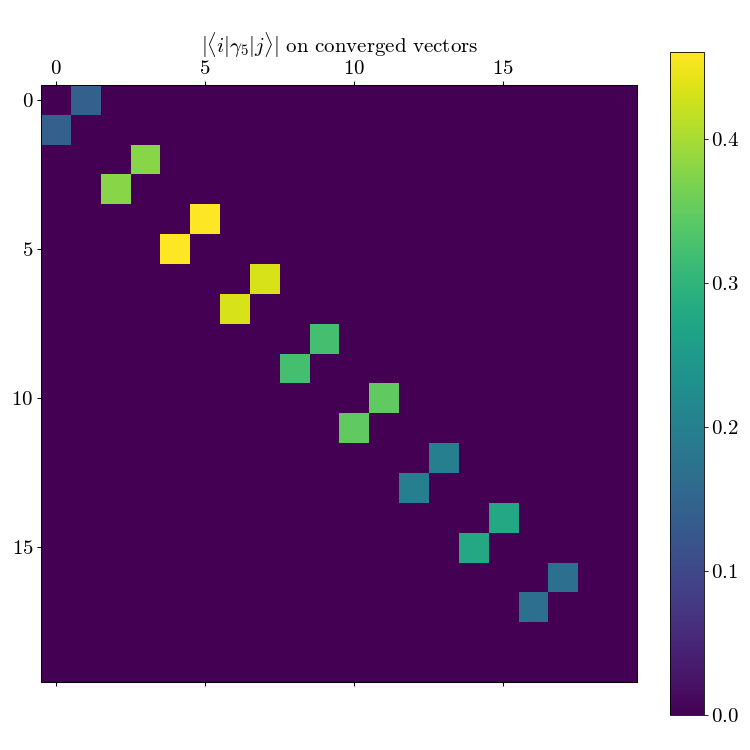

In [31]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.abs(g5_converged), cmap = 'viridis')
ax.set_title(r'$| \langle i | \gamma_5 | j\rangle |$ on converged vectors', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

In [32]:
evec_ip = read_Eigen_matrix(r"""(1,-1.64852794e-21)      (-0.0474233116,0.0462760041)       (0.0189920139,0.0285081212)      (0.0805353218,-0.0340551774)        (0.045681688,0.0128151676)     (-0.0332334443,-0.0170719915)      (-0.0167160123,0.0213983773)       (0.0114018239,0.0992286835)    (-0.00345442109,0.00721855614)   (0.000158091246,-0.00507680503)     (0.0040653687,-0.00212000988)     (0.00527058036,0.00741262312)   (-0.00237638109,-0.00442353332)      (0.00440570693,0.0175327227)      (0.0108998807,0.00684558539)    (0.00376969517,-0.00655796158)    (0.00701183921,-0.00171835763)      (-0.0113300566,-0.007498564)   (-0.00284561926,0.000136234208)   (0.00309301566,-0.000990044202)   (-0.00173169498,-0.00469421997)    (0.00302137799,-0.00288957554)  (0.000371578934,-0.000130113644)   (0.00270972055,-0.000234537798)
(-0.0474233116,-0.0462760041)  (1,3.18626549e-21)     (-0.0567338032,-0.0317566761)   (-0.000303716794,-0.0148262932)       (-0.152016706,-0.198032513)    (-0.0129255105,-0.00857300219)       (0.015597998,-0.0391142779)     (0.0037133463,-0.00377239909)    (-0.0072989643,-0.00189695294)    (0.00667569813,-0.00747594422)     (0.00484456378,0.00412943193)    (-0.0191076062,-0.00661432322)    (0.00385939229,-0.00854595651)     (0.00018113742,-0.0131379718)     (-0.0124416486,-0.0125652962)   (-0.00468931824,-0.00170596903)     (0.00581891844,0.00216114947)     (0.00228740226,0.00460887857)  (-0.00481907624,-0.000142980425)   (-0.00139732208,-0.00311230519)    (-0.00113447517,-0.0031912975)         (0.0038393,0.00124088176)    (-0.00157477183,0.00273760169)  (-0.00121956173,-0.000622538632)
(0.0189920139,-0.0285081212)      (-0.0567338032,0.0317566761)               (1,-8.46419587e-21)      (0.010652057,-0.00857758553)       (-0.0225322113,0.165986397)    (-0.0327878631,-0.00759231357)        (0.0930014802,0.138244404)     (0.00521112832,0.00420692958)    (-0.00194650788,-0.0192511015)    (-0.00445909834,0.00137635481)     (-0.00888876984,0.0241050032)     (0.00411757689,-0.0168874977)     (-0.0102456553,0.00421984451)      (0.0048355898,0.00154411902)     (0.00335135816,0.00180257336)   (-0.000718559913,0.00578761739)    (-0.000344170303,0.0140083173)     (0.0026849661,-0.00168848859)     (0.00800784026,0.00496337985)  (-0.00114448127,-0.000511070285)    (0.000380743549,0.00176762261)     (0.00236594674,0.00168199656)   (0.000246646389,-0.00369527146)  (-0.00416702706,-0.000989567011)
(0.0805353218,0.0340551774)    (-0.000303716794,0.0148262932)       (0.010652057,0.00857758553)               (1,-1.68081623e-21)    (-0.00458076643,-0.0198815571)      (0.0646655085,-0.0334096401)    (0.00396241293,-3.8726392e-06)     (-0.00299575187,0.0229514802)     (-0.0178041225,-0.0258086367)       (-0.021327545,0.0281175655)   (-0.00183111986,-0.00110023263)   (0.000797004369,-0.00137189217)     (-0.00523376016,0.0224511782)   (-0.00517640759,-0.00301576352) (-0.000427456794,-5.15884949e-05)     (0.00491850806,0.00724548817)    (0.00794967824,-0.00241625269)      (0.0047110517,0.00424625587)   (-0.00601993822,-0.00189048945)   (-0.00059887917,0.000955360074)   (-0.00601779322,-0.00560283542)    (0.000324227125,0.00340411466)    (0.00226653057,-0.00358128406)   (-0.0026999498,-0.000702461789)
(0.045681688,-0.0128151676)        (-0.152016706,0.198032513)      (-0.0225322113,-0.165986397)     (-0.00458076643,0.0198815571)                (1,-1.8890017e-20)    (-0.000155439845,0.0228559056)      (0.0272415558,0.00365738609)     (0.0103265974,-0.00438053026)     (-0.00329989244,0.0212651461)     (0.0064251178,0.000432925873)      (-0.023348814,0.00653806551)      (0.0108612278,-0.0122189591)      (0.00423602704,0.0118802483)   (-0.00643032909,-0.00104950444)    (0.00454701668,-0.00742849889)   (0.000201232562,0.000855705788)   (0.000467162304,-0.00797616717)    (-0.00037888455,0.00686251191)    (-0.00493822854,-0.0104729097)   (0.00512921897,-0.000481603473)     (0.0048232537,0.000198974836)   (-0.0107983887,-0.000336048347)    (0.00345846919,-4.7746159e-06)   (-0.000472157884,0.00187844219)
(-0.0332334443,0.0170719915)     (-0.0129255105,0.00857300219)     (-0.0327878631,0.00759231357)       (0.0646655085,0.0334096401)   (-0.000155439845,-0.0228559056)                (1,2.67511207e-21)      (0.0038551414,-0.0154409235)        (0.0293089469,0.055014628)   (-0.00460677176,-0.00879575625)     (-0.00279747625,0.0113112816)    (0.00868980949,-0.00128141415)   (-0.00854542183,-0.00125173068)    (0.00381370398,-0.00244204271)    (-0.00613895492,0.00189466104)    (0.00498371352,0.000690911369)   (-0.00169500749,-0.00113756801)   (-0.00427445759,-0.00791856515)    (-0.00500943401,0.00122628649)     (6.10214891e-05,0.0039790354)     (0.00237186453,0.00114936384)    (-0.00414440293,-0.0014794387)    (0.00158195304,-0.00133222389)      (-0.001888708,0.00101741314)  (0.000453119559,-0.000416066987)
(-0.0167160123,-0.0213983773)        (0.015597998,0.0391142779)       (0.0930014802,-0.138244404)     (0.00396241293,3.8726392e-06)     (0.0272415558,-0.00365738609)       (0.0038551414,0.0154409235)                (1,7.63386493e-22)  (-0.00795738497,-0.000219559008)     (-0.00995864673,-0.012562549)   (-0.000713266239,0.00569978553)      (0.0088210061,0.00772684352)     (-0.0200851785,-0.0465424589)    (-0.00193552516,0.00583009212)    (0.00952864395,-0.00646359661)       (-0.029994957,0.0305988698)     (0.00516898034,-0.0110601208)    (0.000934254539,0.00288094793)     (0.000947860476,0.0029923386)      (0.00660314021,0.0106471878)    (0.0013173491,-1.00442925e-05) (-0.000669893851,-0.000110295582)   (-0.00626102843,-0.00214647693)    (0.00611540355,-0.00495093126)    (0.00403965173,0.000361299945)
(0.0114018239,-0.0992286835)      (0.0037133463,0.00377239909)    (0.00521112832,-0.00420692958)    (-0.00299575187,-0.0229514802)      (0.0103265974,0.00438053026)       (0.0293089469,-0.055014628)   (-0.00795738497,0.000219559008)                (1,4.64241089e-21)     (-0.0230175755,0.00957857493)         (0.0182184243,0.01923766)  (-0.000172043574,-0.00366525782)    (0.0063492597,-0.000566891981)     (0.0129676271,-0.00597495461)     (0.0104462436,-0.00206477965)    (-0.00445262471,0.00176309216)     (0.00617267833,0.00137233708)     (0.00214098739,-0.0234753713)   (0.000738941131,-0.00553710396)     (0.00151538444,0.00220941281)   (0.00335465998,-0.000776336683)   (-0.00333288139,0.000375494094)     (0.000838393822,0.0024495623)     (0.00254445009,0.00302755509)   (0.000356913247,-0.00158878617)
(-0.00345442109,-0.00721855614)     (-0.0072989643,0.00189695294)     (-0.00194650788,0.0192511015)      (-0.0178041225,0.0258086367)    (-0.00329989244,-0.0212651461)    (-0.00460677176,0.00879575625)      (-0.00995864673,0.012562549)    (-0.0230175755,-0.00957857493)                 (1,1.1241599e-20)      (0.0524141335,-0.0449725812)     (0.00199616184,0.00210624093)    (-0.00286864227,0.00542936927)        (0.13278355,-0.0423410249)         (0.070645756,0.188510321)    (0.00460225183,-0.00697451756)  (-0.000912149621,-0.00367294313)       (0.0274409334,0.0166281278)     (0.00422733814,0.00932564985)    (-0.00367539883,0.00627707441)     (0.000980898339,0.0096550675)    (-0.00958398702,0.00627482111)       (-0.00203280901,0.00220115)   (-0.00303377145,0.000883979843)      (0.0014592809,0.00226292124)
(0.000158091246,0.00507680503)     (0.00667569813,0.00747594422)   (-0.00445909834,-0.00137635481)      (-0.021327545,-0.0281175655)    (0.0064251178,-0.000432925873)    (-0.00279747625,-0.0113112816)  (-0.000713266239,-0.00569978553)        (0.0182184243,-0.01923766)       (0.0524141335,0.0449725812)                (1,4.23860623e-21)    (-0.00138536271,0.00472055653)  (0.000469786102,-0.000859407536)        (0.219585008,-0.107336959)         (0.0594022057,0.10950896)     (0.00473165707,0.00461501314)     (-0.00176172961,0.0013968819)      (0.0298450121,-0.0166067936)    (-0.00401286073,-0.0121071161)   (-0.00317571206,0.000830955488)   (-0.00432259518,-0.00236752139)   (-0.00695188208,-0.00457981017)    (0.000540272004,0.00149037247)   (0.00123955681,-4.33625457e-05)  (-0.00148693585,-0.000754314387)
(0.0040653687,0.00212000988)    (0.00484456378,-0.00412943193)    (-0.00888876984,-0.0241050032)    (-0.00183111986,0.00110023263)     (-0.023348814,-0.00653806551)     (0.00868980949,0.00128141415)     (0.0088210061,-0.00772684352)   (-0.000172043574,0.00366525782)    (0.00199616184,-0.00210624093)   (-0.00138536271,-0.00472055653)               (1,-5.79489474e-21)       (-0.198965732,0.0182664298)    (0.00333239537,-0.00118805048)     (-0.002414372,-0.00463196748)      (-0.00216930408,0.109541219)     (-0.0492636891,-0.0225284954)    (-0.00263352709,0.00120156907)   (-0.00248644771,0.000837593784)      (0.0114507687,0.00269479324)    (0.00119204874,-0.00112124494)   (0.00113954876,-5.74170724e-05)     (0.00174378183,0.00685134271)    (0.00153654944,-0.00086473651)    (-0.00147786997,0.00102976811)
(0.00527058036,-0.00741262312)     (-0.0191076062,0.00661432322)      (0.00411757689,0.0168874977)    (0.000797004369,0.00137189217)       (0.0108612278,0.0122189591)    (-0.00854542183,0.00125173068)      (-0.0200851785,0.0465424589)     (0.0063492597,0.000566891981)   (-0.00286864227,-0.00542936927)   (0.000469786102,0.000859407536)      (-0.198965732,-0.0182664298)               (1,-1.96358992e-21)   (-0.000429519712,0.00112536777)    (-0.00274618396,0.00317529536)      (-0.0607612099,-0.229577098)      (0.0201217507,-0.0336635969)     (0.00338740692,0.00015029881)    (-0.00273479934,0.00155184642)    (-0.00335214739,-0.0008101956)   (-0.00113337059,0.000928395822)     (0.0012773784,-0.00200150035)    (-0.00163104321,0.00295972655)     (0.00367201615,0.00394461824)    (0.00125374807,-0.00142620215)
(-0.00237638109,0.00442353332)     (0.00385939229,0.00854595651)    (-0.0102456553,-0.00421984451)    (-0.00523376016,-0.0224511782)     (0.00423602704,-0.0118802483)     (0.00381370398,0.00244204271)   (-0.00193552516,-0.00583009212)      (0.0129676271,0.00597495461)         (0.13278355,0.0423410249)         (0.219585008,0.107336959)     (0.00333239537,0.00118805048)  (-0.000429519712,-0.00112536777)                (1,1.27864636e-21)      (-0.00248929761,0.170742872)   (-0.000382566026,0.00223033326)    (0.00198201902,-0.00129380312)     (-0.00467959736,0.0253604033)      (-0.0208924841,0.0157226632)  (-0.00354203714,-0.000695662249)     (-0.0033996206,0.00266105278)   (-0.00420429026,-0.00219427997)     (-0.00299461863,-0.001438494)    (0.000817655709,-0.0021811102)  (0.000394738083,-6.48308441e-05)
(0.00440570693,-0.0175327227)      (0.00018113742,0.0131379718)     (0.0048355898,-0.00154411902)    (-0.00517640759,0.00301576352)    (-0.00643032909,0.00104950444)   (-0.00613895492,-0.00189466104)     (0.00952864395,0.00646359661)      (0.0104462436,0.00206477965)        (0.070645756,-0.188510321)        (0.0594022057,-0.10950896)      (-0.002414372,0.00463196748)   (-0.00274618396,-0.00317529536)     (-0.00248929761,-0.170742872)                 (1,1.3649244e-20)      (0.00021214066,0.0047213581)     (0.00320177289,0.00417985666)    (0.00115782833,0.000674233786)    (-0.00466654626,0.00770236389)   (-0.00474902032,0.000732147124)      (0.00748328041,0.0162205844)     (-0.00465180831,0.0111696145)    (0.00068597993,0.000714528523)   (0.000286141205,-0.00333147327)   (-0.00224523841,-0.00234236713)
(0.0108998807,-0.00684558539)      (-0.0124416486,0.0125652962)    (0.00335135816,-0.00180257336)  (-0.000427456794,5.15884949e-05)     (0.00454701668,0.00742849889)   (0.00498371352,-0.000690911369)      (-0.029994957,-0.0305988698)   (-0.00445262471,-0.00176309216)     (0.00460225183,0.00697451756)    (0.00473165707,-0.00461501314)     (-0.00216930408,-0.109541219)       (-0.0607612099,0.229577098)  (-0.000382566026,-0.00223033326)     (0.00021214066,-0.0047213581)                (1,4.64285215e-21)       (0.0267923967,-0.014511946)    (0.00510500167,0.000869951774)    (-0.00511436429,0.00270693876)    (0.00845104847,-0.00132054043)     (-0.0045894902,0.00132235283)      (-0.00139143327,0.001823957)    (0.00597942987,-0.00528168522)    (-0.00219221666,-0.0109724065)    (0.00388371998,-0.00268111713)
(0.00376969517,0.00655796158)    (-0.00468931824,0.00170596903)  (-0.000718559913,-0.00578761739)    (0.00491850806,-0.00724548817)  (0.000201232562,-0.000855705788)    (-0.00169500749,0.00113756801)      (0.00516898034,0.0110601208)    (0.00617267833,-0.00137233708)   (-0.000912149621,0.00367294313)    (-0.00176172961,-0.0013968819)      (-0.0492636891,0.0225284954)       (0.0201217507,0.0336635969)     (0.00198201902,0.00129380312)    (0.00320177289,-0.00417985666)        (0.0267923967,0.014511946)               (1,-1.54454337e-21)   (0.000217641749,0.000740259011)    (0.00217647072,-0.00314622803)       (-0.0296461105,0.030496438)    (-0.00285277285,0.00163531186)    (-0.00178918028,0.00398822049)     (-0.0104843507,0.00387597943)    (-0.00635627043,-0.0132063876)   (-8.69750423e-05,0.00198793491)
(0.00701183921,0.00171835763)    (0.00581891844,-0.00216114947)   (-0.000344170303,-0.0140083173)     (0.00794967824,0.00241625269)    (0.000467162304,0.00797616717)    (-0.00427445759,0.00791856515)   (0.000934254539,-0.00288094793)      (0.00214098739,0.0234753713)      (0.0274409334,-0.0166281278)       (0.0298450121,0.0166067936)   (-0.00263352709,-0.00120156907)    (0.00338740692,-0.00015029881)    (-0.00467959736,-0.0253604033)   (0.00115782833,-0.000674233786)   (0.00510500167,-0.000869951774)  (0.000217641749,-0.000740259011)                (1,1.16279641e-20)     (-0.0102403434,-0.0237486636)    (-0.00254955446,0.00262072029)     (0.00323867008,0.00779719785)     (0.0137104382,-0.00111141173)   (-0.000809431011,0.00242367905)   (-0.0028094566,-0.000109429509)   (-0.00340455859,-0.00112725602)
(-0.0113300566,0.007498564)    (0.00228740226,-0.00460887857)      (0.0026849661,0.00168848859)     (0.0047110517,-0.00424625587)   (-0.00037888455,-0.00686251191)   (-0.00500943401,-0.00122628649)    (0.000947860476,-0.0029923386)    (0.000738941131,0.00553710396)    (0.00422733814,-0.00932564985)     (-0.00401286073,0.0121071161)  (-0.00248644771,-0.000837593784)   (-0.00273479934,-0.00155184642)     (-0.0208924841,-0.0157226632)   (-0.00466654626,-0.00770236389)   (-0.00511436429,-0.00270693876)     (0.00217647072,0.00314622803)      (-0.0102403434,0.0237486636)                (1,-1.0355654e-20)   (0.00158506596,-0.000413720844)    (-0.00252502613,-0.0151222799)      (-0.014674462,0.00771384902)    (-0.00190538608,0.00070771201)    (0.00120176969,6.22485258e-05)   (-0.00151082243,0.000436709006)
(-0.00284561926,-0.000136234208)   (-0.00481907624,0.000142980425)    (0.00800784026,-0.00496337985)    (-0.00601993822,0.00189048945)     (-0.00493822854,0.0104729097)    (6.10214891e-05,-0.0039790354)     (0.00660314021,-0.0106471878)    (0.00151538444,-0.00220941281)   (-0.00367539883,-0.00627707441)  (-0.00317571206,-0.000830955488)     (0.0114507687,-0.00269479324)     (-0.00335214739,0.0008101956)   (-0.00354203714,0.000695662249)  (-0.00474902032,-0.000732147124)     (0.00845104847,0.00132054043)      (-0.0296461105,-0.030496438)   (-0.00254955446,-0.00262072029)    (0.00158506596,0.000413720844)               (1,-1.35783844e-20)    (0.00152888669,0.000155934327)  (-0.000281066126,0.000421218093)     (0.00866577817,0.00136311346)   (-0.00295381781,-0.00271155746)     (0.00455161508,-0.0013712331)
(0.00309301566,0.000990044202)    (-0.00139732208,0.00311230519)   (-0.00114448127,0.000511070285)  (-0.00059887917,-0.000955360074)    (0.00512921897,0.000481603473)    (0.00237186453,-0.00114936384)     (0.0013173491,1.00442925e-05)    (0.00335465998,0.000776336683)    (0.000980898339,-0.0096550675)    (-0.00432259518,0.00236752139)     (0.00119204874,0.00112124494)  (-0.00113337059,-0.000928395822)    (-0.0033996206,-0.00266105278)     (0.00748328041,-0.0162205844)    (-0.0045894902,-0.00132235283)   (-0.00285277285,-0.00163531186)    (0.00323867008,-0.00779719785)     (-0.00252502613,0.0151222799)   (0.00152888669,-0.000155934327)               (1,-2.85657599e-21)       (0.0561679323,0.0265725177)   (0.000768616768,0.000392262107)  (-0.00154050884,-0.000218905671)  (-0.000692569628,-0.00193874875)
(-0.00173169498,0.00469421997)     (-0.00113447517,0.0031912975)   (0.000380743549,-0.00176762261)    (-0.00601779322,0.00560283542)    (0.0048232537,-0.000198974836)     (-0.00414440293,0.0014794387)  (-0.000669893851,0.000110295582)  (-0.00333288139,-0.000375494094)   (-0.00958398702,-0.00627482111)    (-0.00695188208,0.00457981017)    (0.00113954876,5.74170724e-05)      (0.0012773784,0.00200150035)    (-0.00420429026,0.00219427997)    (-0.00465180831,-0.0111696145)     (-0.00139143327,-0.001823957)   (-0.00178918028,-0.00398822049)      (0.0137104382,0.00111141173)     (-0.014674462,-0.00771384902) (-0.000281066126,-0.000421218093)      (0.0561679323,-0.0265725177)                (1,7.16831952e-21)    (0.00251577764,-0.00262508989) (-0.000437127913,-0.000900351633)    (-0.0010015074,0.000420779359)
(0.00302137799,0.00288957554)        (0.0038393,-0.00124088176)    (0.00236594674,-0.00168199656)   (0.000324227125,-0.00340411466)    (-0.0107983887,0.000336048347)     (0.00158195304,0.00133222389)    (-0.00626102843,0.00214647693)    (0.000838393822,-0.0024495623)      (-0.00203280901,-0.00220115)   (0.000540272004,-0.00149037247)    (0.00174378183,-0.00685134271)   (-0.00163104321,-0.00295972655)      (-0.00299461863,0.001438494)   (0.00068597993,-0.000714528523)     (0.00597942987,0.00528168522)    (-0.0104843507,-0.00387597943)  (-0.000809431011,-0.00242367905)   (-0.00190538608,-0.00070771201)    (0.00866577817,-0.00136311346)  (0.000768616768,-0.000392262107)     (0.00251577764,0.00262508989)               (1,-1.02819539e-20)     (-0.0313968216,-0.0232199785)    (-0.0108847511,-0.00249172245)
(0.000371578934,0.000130113644)   (-0.00157477183,-0.00273760169)    (0.000246646389,0.00369527146)     (0.00226653057,0.00358128406)     (0.00345846919,4.7746159e-06)     (-0.001888708,-0.00101741314)     (0.00611540355,0.00495093126)    (0.00254445009,-0.00302755509)  (-0.00303377145,-0.000883979843)    (0.00123955681,4.33625457e-05)     (0.00153654944,0.00086473651)    (0.00367201615,-0.00394461824)     (0.000817655709,0.0021811102)    (0.000286141205,0.00333147327)     (-0.00219221666,0.0109724065)     (-0.00635627043,0.0132063876)    (-0.0028094566,0.000109429509)   (0.00120176969,-6.22485258e-05)    (-0.00295381781,0.00271155746)   (-0.00154050884,0.000218905671)  (-0.000437127913,0.000900351633)      (-0.0313968216,0.0232199785)                 (1,6.3101599e-21)   (0.00216285928,-0.000246842634)
(0.00270972055,0.000234537798)   (-0.00121956173,0.000622538632)   (-0.00416702706,0.000989567011)    (-0.0026999498,0.000702461789)  (-0.000472157884,-0.00187844219)   (0.000453119559,0.000416066987)   (0.00403965173,-0.000361299945)    (0.000356913247,0.00158878617)     (0.0014592809,-0.00226292124)   (-0.00148693585,0.000754314387)   (-0.00147786997,-0.00102976811)     (0.00125374807,0.00142620215)   (0.000394738083,6.48308441e-05)    (-0.00224523841,0.00234236713)     (0.00388371998,0.00268111713)  (-8.69750423e-05,-0.00198793491)    (-0.00340455859,0.00112725602)  (-0.00151082243,-0.000436709006)      (0.00455161508,0.0013712331)   (-0.000692569628,0.00193874875)   (-0.0010015074,-0.000420779359)     (-0.0108847511,0.00249172245)    (0.00216285928,0.000246842634)               (1,-7.94084824e-21)""")

In [33]:
ip_converged = evec_ip.copy()
for idx in np.arange(Nevecs)[ritz_values > EPS][::-1]:
    ip_converged = np.delete(ip_converged, idx, 0)            # delete row $idx
    ip_converged = np.delete(ip_converged, idx, 1)            # delete col $idx

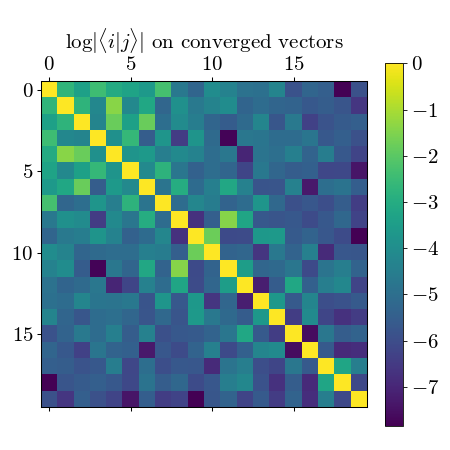

In [34]:
fig, axes = pt.add_subplots(fig_size = (6, 6))
ax = axes[0]
image = ax.matshow(np.log(np.abs(ip_converged)), cmap = 'viridis')
ax.set_title(r'$\log | \langle i | j\rangle |$ on converged vectors', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

### Use basis with $|i'\rangle := \gamma_5 |i\rangle$ additions

In [35]:
Dw_g5 = read_Eigen_matrix(r"""(-0.850143561,-0.0252482214)  (-0.00141421269,-1.62630326e-19)      (0.0391482362,-0.0405386012)          (0.1690788,-0.114415767)      (-0.0174058616,-0.023395659)   (0.000309143586,-0.00115201316)      (-0.0699702846,0.0253904235) (-0.000128379421,-0.000813883325)      (-0.03929532,-0.00933515975) (-0.000574608287,-0.000986724015)       (0.0276829548,0.0156599196)   (0.000726352119,-0.00130233992)       (0.0130751692,-0.019080131)  (-8.55603802e-05,0.000287534997)    (-0.00442387014,-0.0849674226)  (0.000114982301,-7.40661954e-06)   (-0.00527514011,-0.00570112472)  (0.000260018335,-0.000435424048)     (0.00152847716,0.00400652997)   (0.00081313686,-5.38514811e-05)    (-0.00194100694,-0.0153367957)   (0.000155982188,3.71538707e-05)    (-0.0099561376,-0.00469306829)  (0.000391490059,-0.000147169335)     (-0.0022129777,0.00609200161)     (0.00079043702,0.00126533546)    (-0.00617205796,0.00041453494)   (0.000149301808,0.000143651896)     (0.00823467852,0.00826560125)  (-0.000591493704,0.000702088591)   (0.00237011656,-0.000606363108)  (-0.000679569985,0.000312816724)    (0.000253111605,0.00433377637)  (-7.37102325e-05,-0.00109759825)    (-0.00177906592,0.00316108491)   (-0.00121308635,3.63126273e-05)
(2.19321089e-14,1.08420217e-19)       (-0.850143561,0.0252482214)      (0.0954873433,-0.0727261469)      (0.0391482362,-0.0405386012)  (1.13539386e-13,-1.11547924e-13)     (-0.0168657177,-0.0237564811)   (3.09674161e-14,3.42260942e-14)      (-0.0676067526,0.0309851634)  (1.65171696e-13,-1.15532584e-15)    (-0.0391595531,-0.00974135085)  (2.00672812e-14,-1.72292736e-14)       (0.0286842361,0.0136745583) (-9.56595914e-14,-1.22062083e-13)      (0.0136707392,-0.0186137423) (-1.98938088e-14,-1.21205129e-14)     (-0.0121985349,-0.0840707506)  (2.05842288e-14,-4.73579509e-16)   (-0.00466790551,-0.00616872103)   (1.93777286e-14,1.21430643e-17)     (0.00213195143,0.00370063898)  (-6.79534554e-15,1.83915383e-14)     (-0.00418815344,-0.014794095)  (-3.33799828e-14,3.74136486e-14)   (-0.00943930228,-0.00554452774)  (-1.14665222e-15,3.25867805e-15)    (-0.00303920521,0.00567038691) (-2.58560534e-15,-1.14491749e-15)    (-0.00591768448,0.00163788715)  (-1.85008259e-15,1.93074723e-14)     (0.00982150007,0.00608879213)   (-4.3663944e-13,7.57718541e-14)    (0.00241574522,-0.00018766546)  (4.37849626e-15,-1.60461922e-15)     (0.00159071004,0.00394703866) (-5.13174572e-15,-2.15864653e-15)     (-0.0024956484,0.00253283846)
(0.0391482362,0.0405386012)           (0.1690788,0.114415767)       (-0.850143561,0.0252482214)                (-0.00170753685,0)       (0.0496345243,0.0244887135)  (0.000294112428,-0.000106392371)     (-0.00039729113,0.0126175523)  (-0.00107886229,-0.000748196747)         (0.136088755,0.163235014)     (0.00115399611,0.00121673091)      (0.0107005153,0.00773496058)  (-0.00113868347,-0.000602900769)       (-0.011183829,0.0340824023)  (-0.000421117194,-8.0525658e-06)     (-0.00335733952,0.0030100026)   (0.000999414598,-0.00111379999)      (0.0169067931,0.00351055126)  (-2.63436126e-05,-0.00060275326)    (-0.00420400277,0.00681543666)  (0.000319686204,-0.000635100135)     (-0.00150205406,0.0111350857)  (0.000558266695,-0.000200986812)      (0.0118520253,0.00939067824) (-0.000747541428,-0.000730413589)    (0.00420994606,0.000747169592)  (0.000451114837,-0.000505610537)   (-0.00459210022,-0.00268367039)  (-0.00074955194,-2.82857641e-05)   (-0.00112761785,-0.00427216521)   (0.000583738548,-0.00036258037)    (0.0040783891,-0.000712538635)  (4.12814954e-05,-0.000782764389)    (0.000136550586,0.00293545784)    (0.000115773025,0.00021914949)  (-0.00350023616,-6.13805972e-05)  (0.000295669648,-2.52670205e-06)
(0.0954873433,0.0727261469)       (0.0391482362,0.0405386012)               (-9.62424584e-15,0)      (-0.850143561,-0.0252482214)   (3.76608467e-14,5.20486432e-14)       (0.0474300779,0.0284301614)  (-1.37653777e-13,1.53335677e-13)     (-0.000116134655,0.012612146) (-2.30093722e-14,-2.94031292e-14)         (0.124236055,0.172194217) (-3.66452702e-12,-5.67872138e-13)      (0.0107720865,0.00761462877)   (3.74613535e-15,1.35100264e-14)      (-0.0142481035,0.0328589298)  (2.22549409e-13,-1.93768612e-13)    (-0.00325212382,0.00311332541)   (1.72852184e-14,-2.2433444e-14)      (0.0160772085,0.00610555736)   (8.17076441e-15,1.65327821e-14)     (-0.0034968077,0.00716784711)  (-1.0870211e-14,-2.81974964e-14)    (-0.000485703231,0.0111645887)   (6.45577342e-15,-4.1416523e-15)       (0.0102599361,0.0109964351) (-4.05404876e-15,-1.37043155e-16)     (0.00394352103,0.00156871553)   (-8.11156697e-15,7.2155823e-15)   (-0.00489235087,-0.00198420465)  (2.23471415e-14,-2.62810607e-16)   (-0.00182825431,-0.00397596127)  (-2.69657994e-13,3.64239888e-14)    (0.00409329664,0.000243226992)    (2.18336633e-15,4.2821649e-15)     (0.000883892171,0.0027417045)  (-1.34267597e-15,2.93461002e-15)   (-0.00323262611,-0.00115186313)
(-0.0168657177,0.0237564811)    (0.000309143586,0.00115201316)      (0.0474300779,-0.0284301614)   (0.000294112428,0.000106392371)         (-0.85011975,0.044211103)   (0.00025730913,-4.33680869e-19)    (-0.00943474853,0.00682103567)         (0.367047619,0.403671024)       (0.0134781997,-0.141957805)   (-0.00188158324,-0.00124986884)      (0.0276287631,0.00758136785) (-0.000838557632,-0.000644893649)      (-0.0864093732,-0.112593176)  (7.84125945e-05,-0.000633698745)    (-0.0042069641,-0.00385337846)   (0.000665369808,0.000435636625)     (-0.00163896724,0.0147532413)  (-0.000422057937,0.000571233034)      (0.00913924211,-0.002452533)   (0.000299646168,-0.00031986274)   (-0.00394678113,-0.00180715148) (-0.000537391787,-0.000553555002)   (-0.00303017268,-0.00118639053)  (-0.000254426522,6.98282059e-05)   (-0.00024847986,-0.00499108201)  (0.000761604623,-4.66028956e-05)     (0.00235984902,-0.0117726249) (-0.000596161631,-7.42771843e-05)   (-0.00255031933,0.000956308927)  (-0.000465488183,0.000949877973)     (-0.007593732,-0.00279118715)  (-0.000935330756,-0.00100561228)   (0.000129931999,-0.00156343502)  (1.31175068e-05,-7.36041264e-06)  (-0.00238845338,-0.000799317631)   (7.61428325e-05,0.000225932533)
(1.13541121e-13,1.11546189e-13)       (-0.0174058616,0.023395659)  (3.76608467e-14,-5.20486432e-14)      (0.0496345243,-0.0244887135)  (-8.01303468e-14,5.42101086e-20)        (-0.85011975,-0.044211103)         (0.196851613,0.254080552)    (-0.00943474853,0.00682103567)  (-4.42788167e-15,3.67483821e-14)        (0.0264935195,-0.14011214)  (-5.83184542e-13,4.65443656e-14)      (0.0275379454,0.00790396331)  (1.38083989e-14,-2.79212417e-14)      (-0.0729504575,-0.121635996)   (5.64694125e-13,6.35918401e-13)   (-0.00424409011,-0.00380678365)   (-7.6778861e-15,2.18523116e-14)     (-0.00424704834,0.0141743527)  (-9.88618909e-15,4.53387328e-14)    (0.00889659787,-0.00313440144)  (-5.66768854e-14,1.26880277e-13)   (-0.00404256318,-0.00152647283)  (-1.14361645e-15,8.43769499e-15)     (-0.002769362,-0.00168057045)   (3.97641989e-15,7.24149473e-15)   (0.000866738922,-0.00488839952)   (2.87096735e-16,2.69541334e-14)    (0.000911909133,-0.0118935311) (-1.94013642e-14,-2.87474038e-14)    (-0.00235719265,0.00131671218) (-3.15799036e-13,-1.19918658e-12)   (-0.00658818666,-0.00457350268)   (3.10016769e-15,7.08076176e-15)  (-0.000245529066,-0.00151952398)  (-9.69927264e-16,8.06321156e-16)   (-0.00193697513,-0.00153449961)
(-0.0676067526,-0.0309851634)  (-0.000128379421,0.000813883325)    (-0.000116134655,-0.012612146)   (-0.00107886229,0.000748196747)   (-0.00943474853,-0.00682103567)        (0.367047619,-0.403671024)        (-0.85011975,-0.044211103)  (-0.000339977044,2.16840434e-19)      (0.00457756285,0.0167540241)    (-0.00093679315,0.00101034279)       (-0.056148351,0.0262020708)  (0.000299675593,-0.000314305525)   (-0.00336854534,0.000213722564) (-0.000207506659,-0.000416928731)     (0.00376579257,-0.0193537187)  (0.000375258089,-0.000794386452)    (-0.000524854842,0.0012491325)   (0.000583058738,4.88342856e-05)       (0.006889931,-0.0184417961)   (0.000209275636,0.000203442485)     (0.00408509698,0.00309150194)   (3.97190745e-06,0.000938543436)  (0.000368189976,-7.06289453e-08)  (0.000335917755,-0.000714759383)   (-0.00522170698,-0.00538884381)    (-0.00027386922,0.00102345548)   (-0.00706671957,0.000865039731)    (-0.0013602113,0.000502842993)   (-0.00322899461,-0.00438598021)   (0.000182616805,0.000125912605)     (0.0053905188,0.000549892597)  (0.000653313197,-0.000519869348)     (0.00358189677,0.00616950532)  (0.000406182151,-0.000305008142)   (-0.00112806793,-0.00274406991) (-0.000138898625,-0.000624148385)
(3.09691509e-14,-3.42260942e-14)     (-0.0699702846,-0.0253904235) (-1.37653777e-13,-1.53333943e-13)    (-0.00039729113,-0.0126175523)        (0.196851613,-0.254080552)   (-0.00943474853,-0.00682103567)  (-2.57797256e-14,1.08420217e-19)         (-0.85011975,0.044211103)  (3.88578059e-15,-3.09554465e-13)      (0.00477318559,0.0166991836) (-3.37195549e-14,-1.36349265e-14)      (-0.0534963489,0.0312611284)   (3.42344209e-13,1.66137937e-13)   (-0.00336835428,0.000178474854)   (3.47204904e-15,-1.5350568e-14)     (0.00153203757,-0.0196439521)   (5.7011687e-15,-4.30983374e-14)   (-0.000616896289,0.00120150907)  (1.44799537e-14,-1.67795465e-14)     (0.00345673153,-0.0193175803)   (1.47386443e-14,2.45550108e-14)     (0.00453389656,0.00233490544)  (1.07448772e-13,-8.70831185e-16)   (0.000365670247,2.49580621e-05)  (-5.41754142e-15,1.88312907e-14)   (-0.00450165186,-0.00594207992)  (-2.49767654e-14,8.13910571e-15)    (-0.00665135328,0.00240556817)  (-1.29770326e-14,4.08093698e-15)   (-0.00419268975,-0.00340154519)  (7.58136956e-12,-1.90582413e-12)       (0.005201249,0.00134099431) (-4.69914906e-15,-1.40512602e-15)      (0.0053635524,0.00449702777) (-1.12171557e-14,-2.74866935e-15)  (-0.000426131547,-0.00287957067)
(-0.0391595531,0.00974135085)  (-0.000574608287,0.000986724015)        (0.124236055,-0.172194217)    (0.00115399611,-0.00121673091)         (0.0264935195,0.14011214)    (-0.00188158324,0.00124986884)     (0.00477318559,-0.0166991836)   (-0.00093679315,-0.00101034279)       (-0.850586313,0.0342641982)  (-0.00243179688,-4.33680869e-19)    (0.000915354284,-0.0194355945)         (0.550609569,0.373564122)    (-0.0233543661,-0.00166271887) (-0.000487878751,-0.000911100182)    (-0.00901206699,0.00317581449)  (-0.000652657732,0.000727965982)      (-0.00786135768,0.011537399)    (0.00029568098,0.000327917925)    (-0.00228733173,-0.0105254033)   (0.000334646809,0.000597037943)      (0.00535141802,0.0015509001)   (-0.00111973591,0.000409766174)    (-0.00309791254,0.00677316788) (-4.14449164e-05,-0.000337479512) (-0.000296254598,-0.000692516208)  (-0.000519425578,-0.00045355749)    (-0.00157256759,0.00666312879) (-0.000131561085,-0.000186702013)     (0.0015046546,-0.00570708708)     (0.0002278904,-0.00014306027)     (0.00596378647,0.00795613422)  (0.000665703675,-0.000224068121)   (-0.00395375146,-0.00138216414) (-0.000716398414,-0.000134786649)    (0.00904892099,-0.00244564917)   (0.000758338841,-0.00101480463)
(1.6517343e-13,1.15532584e-15)       (-0.03929532,0.00933515975)  (-2.30076375e-14,2.94022619e-14)        (0.136088755,-0.163235014) (-4.42701431e-15,-3.67501168e-14)        (0.0134781997,0.141957805)   (3.87710697e-15,3.09550996e-13)     (0.00457756285,-0.0167540241)                (4.95367636e-14,0)      (-0.850586313,-0.0342641982)          (0.31030807,0.238755426)    (0.000915354284,-0.0194355945)   (1.65215064e-14,3.82766735e-15)    (-0.0230459771,-0.00404433262)   (1.16663623e-13,3.26065563e-13)    (-0.00893375775,0.00337218651)    (2.6799743e-14,6.30225039e-15)     (-0.00965708452,0.0100211281)   (5.14865928e-14,2.46382775e-14)    (-0.00319603944,-0.0102503206)  (1.69742692e-15,-5.60315683e-16)     (0.00543358949,0.00111302419)   (1.06607431e-14,-8.0135551e-15)     (-0.00412216171,0.0061627796)  (-1.1500783e-14,-1.54563862e-14)  (-0.00014184559,-0.000734746704)  (-2.40909723e-15,6.06806272e-15)   (-0.000670658835,0.00676841169)  (-1.05579608e-15,4.11996826e-17)   (0.000557412481,-0.00582417653)  (3.27991974e-13,-5.65363728e-14)     (0.00384154375,0.00907731809)   (8.92732069e-16,1.77646526e-16)  (-0.00409577587,-0.000334510193)  (-3.86409654e-15,3.35126892e-15)     (0.0091734472,0.000655836255)
(0.0286842361,-0.0136745583)    (0.000726352119,0.00130233992)     (0.0107720865,-0.00761462877)   (-0.00113868347,0.000602900769)     (0.0275379454,-0.00790396331)  (-0.000838557632,0.000644893649)     (-0.0534963489,-0.0312611284)   (0.000299675593,0.000314305525)     (0.000915354284,0.0194355945)        (0.550609569,-0.373564122)      (-0.850586313,-0.0342641982)   (-0.00275959111,2.16840434e-19)     (-0.00245753685,0.0133322461)   (0.000284531495,0.000469505667)     (-0.0219961447,-0.0483286502) (-0.000346927469,-0.000335229412)    (0.00737439802,0.000124832012) (-0.000628377791,-2.58367697e-05)    (-0.00349723236,0.00165083416) (-0.000681510649,-9.22803351e-05)   (0.00540619446,-0.000978494638) (-0.000950384674,-0.000601775812)  (-0.00430190132,-7.51094202e-05)   (0.000621661601,0.000565463485)      (0.001598686,0.000709751195)  (-0.000287061077,0.000620748198)     (0.00243802011,0.00731495975)   (0.00057272496,-0.000802951708)   (0.00442572488,-0.000165813139)  (-2.83997796e-05,0.000160407717)  (-0.000738967776,-0.00333651424)  (-0.000630014829,0.000364466055)     (0.00306713049,0.00227383772)  (-0.000562091742,0.000359665552)   (-0.000977093562,0.00150508025)    (0.000160317785,0.00110997707)
(2.00742201e-14,1.72258041e-14)      (0.0276829548,-0.0156599196)  (-3.66452702e-12,5.67872138e-13)     (0.0107005153,-0.00773496058) (-5.83182808e-13,-4.65408961e-14)     (0.0276287631,-0.00758136785)  (-3.37195549e-14,1.36349265e-14)      (-0.056148351,-0.0262020708)         (0.31030807,-0.238755426)     (0.000915354284,0.0194355945)               (-7.34134975e-15,0)       (-0.850586313,0.0342641982)  (2.99872974e-13,-2.69732153e-14)     (-0.00275005964,0.0132659315)  (1.62300728e-14,-1.68615122e-15)      (-0.0268148212,-0.045790442)  (-1.03736464e-14,2.49453236e-15)     (0.0073115084,0.000771902957)  (-9.90700577e-15,3.63303138e-14)    (-0.00316020977,0.00220784162) (-5.70724024e-16,-1.34293618e-14)    (0.00515679199,-0.00182191912)   (-3.19353918e-14,-2.041943e-14)  (-0.00426275204,-0.000416916806) (-1.77765788e-15,-1.42785089e-14)     (0.00148072803,0.00090952171)  (1.76855058e-14,-8.42034775e-15)     (0.00390711841,0.00658896228)  (-1.52135249e-14,5.78313439e-15)    (0.00421893828,-0.00121470674)   (-5.85913978e-12,-6.074234e-13)   (-0.000188242501,-0.0033824222)   (2.17794532e-15,-2.3483277e-15)     (0.00357586419,0.00111638566)   (1.07843422e-14,7.34308447e-15)    (-0.00129994002,0.00118737576)
(0.0136707392,0.0186137423) (-8.55603802e-05,-0.000287534997)     (-0.0142481035,-0.0328589298)   (-0.000421117194,8.0525658e-06)       (-0.0729504575,0.121635996)   (7.84125945e-05,0.000633698745)  (-0.00336835428,-0.000178474854)  (-0.000207506659,0.000416928731)     (-0.0230459771,0.00404433262)  (-0.000487878751,0.000911100182)    (-0.00275005964,-0.0132659315)  (0.000284531495,-0.000469505667)        (-0.850176661,0.053106564)                (0.000775261415,0)    (0.00675352296,0.000609253319)          (0.39838382,0.483279812)       (0.0221048793,0.0372199923)   (0.00104677616,-0.000194038176)    (0.00227736483,-0.00472585071)   (0.00030848273,-0.000780190286)     (-0.0087528046,0.00450949545)   (-0.00022601617,0.000131992201)        (0.022324474,-0.029055572)  (-0.000306459853,0.000348476122)      (-0.00272894412,0.010098675) (-6.72216306e-05,-0.000705181923)  (-0.000362956807,-0.00256962339)     (0.0013246821,0.000699692231)   (-0.00028019342,-0.00268088112)  (-0.00128011964,-0.000588660214)     (-0.0073943842,-0.0078150102)   (-0.0005782379,-0.000250769475)    (0.00052827352,0.000260585803)   (-0.00027728657,0.000662943073)    (0.00573909681,0.000202104892)   (-0.00012587698,0.000503750941)
(-9.56630608e-14,1.22060348e-13)        (0.0130751692,0.019080131)   (3.74787007e-15,-1.3506557e-14)      (-0.011183829,-0.0340824023)   (1.38049294e-14,2.79203743e-14)       (-0.0864093732,0.112593176)   (3.4233727e-13,-1.66140539e-13)  (-0.00336854534,-0.000213722564)  (1.65197717e-14,-3.82766735e-15)     (-0.0233543661,0.00166271887)   (2.99872974e-13,2.69732153e-14)    (-0.00245753685,-0.0133322461)               (-8.38218384e-15,0)       (-0.850176661,-0.053106564)         (0.207206909,0.305029323)    (0.00675352296,0.000609253319)   (8.68359204e-15,4.16854051e-15)         (0.01460424,0.0406359672)  (-2.23970148e-14,1.05183874e-13)    (0.00195515448,-0.00485381916)  (-3.00740335e-14,5.85191617e-14)    (-0.00844429011,0.00498916544)    (1.0658141e-14,5.02310867e-16)      (0.0271260132,-0.0244215158)  (2.73761049e-15,-1.89985831e-14)    (-0.00498191146,0.00912854977)   (6.87887247e-14,8.15571569e-14)  (-0.000641284159,-0.00249892974)   (1.87475903e-14,2.09849499e-14)  (-0.000646936034,-0.00259435405)  (-2.05362658e-12,6.72593925e-13)   (-0.00504840014,-0.00940266067)  (-8.80589004e-15,3.53449908e-17)    (0.000563670698,0.00012934649)   (-9.7307145e-16,6.25974966e-15)      (0.00520898823,0.0021573863)
(-0.0121985349,0.0840707506)   (0.000114982301,7.40661954e-06)   (-0.00325212382,-0.00311332541)    (0.000999414598,0.00111379999)    (-0.00424409011,0.00380678365)  (0.000665369808,-0.000435636625)      (0.00153203757,0.0196439521)   (0.000375258089,0.000794386452)   (-0.00893375775,-0.00337218651) (-0.000652657732,-0.000727965982)       (-0.0268148212,0.045790442)  (-0.000346927469,0.000335229412)   (0.00675352296,-0.000609253319)         (0.39838382,-0.483279812)       (-0.850176661,-0.053106564)   (-0.00158050984,4.33680869e-19)      (-0.005315348,0.00117504795)   (3.04128711e-05,0.000458667248)      (-0.011636666,0.00364107205)    (-0.000185726945,0.0001524957)   (-0.00908038893,0.000680886976) (-0.000160117829,-0.000281229599)    (0.00359918532,-0.00195375044)    (0.00115981032,0.000164162633)  (-0.00541266402,-0.000246446367) (-0.000769866001,-0.000200589683)     (-0.00527492676,0.0194976883) (-0.000428284292,-0.000437496546)    (-0.00157847396,0.00452996557)  (-0.000569077662,0.000780433104)   (-0.00165652174,-0.00159661823) (-0.000410316274,-0.000786972098)     (0.00286148804,0.00052923086) (-0.000379482801,-0.000260618138)    (-0.00131404657,-0.0018219288)  (-0.000599015958,0.000587759116)
(-1.98938088e-14,1.21205129e-14)     (-0.00442387014,0.0849674226)    (2.2254594e-13,1.93761673e-13)    (-0.00335733952,-0.0030100026)  (5.64691523e-13,-6.35918401e-13)     (-0.0042069641,0.00385337846)     (3.4729164e-15,1.5350568e-14)      (0.00376579257,0.0193537187)  (1.16667093e-13,-3.26063829e-13)   (-0.00901206699,-0.00317581449)    (1.62318076e-14,1.6844165e-15)      (-0.0219961447,0.0483286502)        (0.207206909,-0.305029323)   (0.00675352296,-0.000609253319) (-1.07240605e-14,-2.16840434e-19)        (-0.850176661,0.053106564)   (4.36924802e-14,2.28029401e-15)   (-0.00536788673,0.000819145698)   (2.06432094e-16,1.88044025e-15)     (-0.0107074646,0.00576843308)  (1.29158836e-14,-5.04349167e-15)    (-0.00877149913,0.00231019157)   (9.76406456e-14,1.72084569e-15)    (0.00369188584,-0.00173540341)  (-5.56403881e-14,6.94930224e-15)   (-0.00532074717,-0.00083891922) (-1.31665512e-15,-1.82349795e-14)    (-0.000573521206,0.0200719132)   (7.55905755e-15,1.02461442e-14)   (-0.000334173938,0.00474675918) (-2.53399038e-12,-4.47408083e-12)   (-0.00140567881,-0.00179791434)   (5.77012396e-16,-3.6938768e-15)   (0.00281359677,-0.000496234195)  (5.84363287e-15,-9.35818263e-15)  (-0.000842870698,-0.00203803648)
(-0.00466790551,0.00616872103)   (0.000260018335,0.000435424048)     (0.0160772085,-0.00610555736)   (-2.63436126e-05,0.00060275326)    (-0.00424704834,-0.0141743527) (-0.000422057937,-0.000571233034)  (-0.000616896289,-0.00120150907)  (0.000583058738,-4.88342856e-05)    (-0.00965708452,-0.0100211281)   (0.00029568098,-0.000327917925)    (0.0073115084,-0.000771902957)  (-0.000628377791,2.58367697e-05)        (0.01460424,-0.0406359672)    (0.00104677616,0.000194038176)  (-0.00536788673,-0.000819145698)  (3.04128711e-05,-0.000458667248)         (-0.846932522,0.10945035) (-0.000594267929,-2.16840434e-19)   (0.000486946108,-0.00090609948)         (0.054831699,0.465245896)    (0.00265727572,-0.00241388867)    (0.00127394411,4.58852033e-05)         (0.075144307,0.188667285)   (0.000419316068,0.000408579375)      (-0.0120104939,0.0313856066)  (0.000429582978,-0.000239980185)  (-0.00283687688,-0.000627256752) (-0.000466228399,-0.000100599703)   (0.00256862388,-0.000832757188)  (0.000396636732,-0.000857371264)     (0.0029597522,0.000102212899) (-0.000195014501,-3.95662708e-05)     (-0.00156540988,0.0013392133)     (0.000148064509,0.0010365432)   (0.000607198801,-0.00286851494)  (-0.000361219883,3.72553384e-05)
(2.05833614e-14,4.73579509e-16)    (-0.00527514011,0.00570112472)   (1.72873868e-14,2.24310587e-14)     (0.0169067931,-0.00351055126) (-7.67441666e-15,-2.18549137e-14)    (-0.00163896724,-0.0147532413)   (5.69943398e-15,4.30992048e-14)   (-0.000524854842,-0.0012491325)   (2.6799743e-14,-6.30355143e-15)     (-0.00786135768,-0.011537399) (-1.03736464e-14,-2.49539972e-15)   (0.00737439802,-0.000124832012)  (8.68402572e-15,-4.17027524e-15)      (0.0221048793,-0.0372199923)  (4.36890107e-14,-2.28202873e-15)     (-0.005315348,-0.00117504795)  (-4.75691535e-14,1.08420217e-19)        (-0.846932522,-0.10945035)       (-0.0199355837,0.275613766)   (0.000486946108,-0.00090609948) (-2.55031413e-12,-1.73010998e-12)     (0.0026733697,-0.00238869011)   (3.89011739e-16,4.23684525e-15)        (0.0263333511,0.201086646)  (-1.24822028e-14,1.76226221e-14)      (-0.0207262575,0.0263084624)  (1.54973256e-13,-1.43506734e-13)  (-0.00285245482,-0.000498045822)  (-3.29259189e-14,3.61958727e-14)    (0.00248604063,-0.00101498445)    (-1.28889e-12,-8.93712296e-13)     (0.00275036645,0.00105307471)  (1.91864753e-14,-2.06215253e-14)    (-0.00130091822,0.00155532623)    (3.57569876e-15,1.1734537e-14)    (0.00170532664,-0.00232817042)
(0.00213195143,-0.00370063898)    (0.00081313686,5.38514811e-05)    (-0.0034968077,-0.00716784711)   (0.000319686204,0.000635100135)     (0.00889659787,0.00313440144)    (0.000299646168,0.00031986274)      (0.00345673153,0.0193175803)  (0.000209275636,-0.000203442485)     (-0.00319603944,0.0102503206)  (0.000334646809,-0.000597037943)   (-0.00316020977,-0.00220784162)  (-0.000681510649,9.22803351e-05)     (0.00195515448,0.00485381916)    (0.00030848273,0.000780190286)    (-0.0107074646,-0.00576843308)   (-0.000185726945,-0.0001524957)    (0.000486946108,0.00090609948)        (0.054831699,-0.465245896)        (-0.846932522,-0.10945035)                (0.000283883965,0)       (0.0196356887,-0.144699215)  (-0.000118727773,0.000635460233)   (9.58987399e-05,-0.00193273485)      (5.692723e-05,0.00103616084)      (-0.00148176213,0.001384802)   (0.000113100808,4.90214679e-05)     (0.00769605821,-0.0207137031)  (-0.000166279784,0.000203941686)     (0.0202913233,-0.00961494939)  (0.000401934392,-0.000482625785)    (0.00309968933,-2.6945386e-05)  (-0.000480099353,0.000342051347)     (0.00293647865,0.00288236373)  (0.000223681106,-0.000272326432)    (0.00284889671,0.000438552925)  (-1.08919569e-05,4.31170713e-05)
(1.93772949e-14,-1.21430643e-17)    (0.00152847716,-0.00400652997)  (8.17033073e-15,-1.65310474e-14)   (-0.00420400277,-0.00681543666)  (-9.88618909e-15,-4.5336998e-14)       (0.00913924211,0.002452533)   (1.44797369e-14,1.67804139e-14)        (0.006889931,0.0184417961)  (5.14865928e-14,-2.46382775e-14)     (-0.00228733173,0.0105254033) (-9.90613841e-15,-3.63329158e-14)   (-0.00349723236,-0.00165083416) (-2.23961474e-14,-1.05183223e-13)     (0.00227736483,0.00472585071)  (2.05564732e-16,-1.87957289e-15)     (-0.011636666,-0.00364107205)      (-0.0199355837,-0.275613766)    (0.000486946108,0.00090609948)  (-1.75259113e-14,1.08420217e-19)         (-0.846932522,0.10945035)   (-7.7936789e-15,5.24406907e-15)         (-0.0165796,-0.144880146)    (1.53438026e-12,7.3435702e-13)   (7.98968534e-05,-0.00193081376)  (-3.40231315e-14,1.51816927e-13)    (-0.00153702916,0.00131269661) (-1.18590034e-14,-1.38079652e-14)     (0.00118759818,-0.0219907339) (-3.33782481e-14,-1.20650018e-15)      (0.0159736732,-0.0156027245) (-9.56513514e-14,-9.25564226e-12)    (0.00307600692,0.000201501779)  (-8.75037889e-15,1.09669218e-14)     (0.00380091486,0.00139824603)   (2.59850735e-14,6.00756424e-15)    (0.00269368358,0.000890545293)
(-0.00418815344,0.014794095)  (0.000155982188,-3.71538707e-05)   (-0.000485703231,-0.0111645887)   (0.000558266695,0.000200986812)    (-0.00404256318,0.00152647283)  (-0.000537391787,0.000553555002)    (0.00453389656,-0.00233490544)  (3.97190745e-06,-0.000938543436)    (0.00543358949,-0.00111302419)  (-0.00111973591,-0.000409766174)     (0.00515679199,0.00182191912)  (-0.000950384674,0.000601775812)   (-0.00844429011,-0.00498916544)  (-0.00022601617,-0.000131992201)   (-0.00877149913,-0.00231019157)  (-0.000160117829,0.000281229599)      (0.0026733697,0.00238869011)   (0.00127394411,-4.58852033e-05)          (-0.0165796,0.144880146) (-0.000118727773,-0.000635460233)       (-0.848964737,-0.102624271)   (-0.00138009571,5.42101086e-19)  (-0.000664625875,-0.00398649576)        (0.214510122,-0.457541741)   (-0.00331986175,-0.00305495518)   (-0.00109530227,4.22289687e-05)  (-0.000877643859,-0.00074011334)   (9.19411168e-05,0.000829686787)    (0.00525646185,-0.00567257498) (-0.000843714849,-0.000704492588)    (0.00386822449,-0.00143656613) (-0.000187926201,-0.000341610069)    (0.00667991465,-0.00809856877)  (-0.000591554907,7.25998401e-05) (-0.000749744138,-0.000420071527)  (-0.000806990237,0.000874334523)
(-6.79577922e-15,-1.83950077e-14)     (-0.00194100694,0.0153367957)  (-1.08706447e-14,2.81957617e-14)    (-0.00150205406,-0.0111350857) (-5.66777528e-14,-1.26881578e-13)    (-0.00394678113,0.00180715148)   (1.4739078e-14,-2.45584802e-14)    (0.00408509698,-0.00309150194)    (1.6956922e-15,5.62050406e-16)     (0.00535141802,-0.0015509001)  (-5.70724024e-16,1.34297955e-14)    (0.00540619446,0.000978494638) (-3.00753346e-14,-5.85226312e-14)    (-0.0087528046,-0.00450949545)   (1.29150163e-14,5.04457587e-15)  (-0.00908038893,-0.000680886976)  (-2.55031413e-12,1.73010911e-12)     (0.00265727572,0.00241388867)  (-7.7936789e-15,-5.24406907e-15)        (0.0196356887,0.144699215) (-1.07882453e-14,-2.16840434e-19)        (-0.848964737,0.102624271)       (0.0766837378,-0.287231528)  (-0.000664625875,-0.00398649576)  (-7.69063632e-14,4.39440151e-14)    (-0.00314714702,-0.0032199713)   (1.0076575e-14,-3.01711781e-15)   (-0.00105214818,-0.00045357942)  (-9.59475555e-15,1.93506235e-14)    (0.00317128373,-0.00701793625)  (2.39706692e-13,-2.07709093e-11)    (0.00395661472,-0.00110893184)   (2.67147415e-15,8.90607033e-15)    (0.00280294767,-0.00995999725) (-4.79005941e-15,-1.81861904e-14)   (-0.00065570074,-0.00053621133)
(-0.00943930228,0.00554452774)   (0.000391490059,0.000147169335)      (0.0102599361,-0.0109964351)  (-0.000747541428,0.000730413589)      (-0.002769362,0.00168057045) (-0.000254426522,-6.98282059e-05)  (0.000365670247,-2.49580621e-05)   (0.000335917755,0.000714759383)    (-0.00412216171,-0.0061627796)  (-4.14449164e-05,0.000337479512)   (-0.00426275204,0.000416916806)  (0.000621661601,-0.000565463485)       (0.0271260132,0.0244215158) (-0.000306459853,-0.000348476122)     (0.00369188584,0.00173540341)   (0.00115981032,-0.000164162633)       (0.0263333511,-0.201086646)  (0.000419316068,-0.000408579375)    (7.98968534e-05,0.00193081376)     (5.692723e-05,-0.00103616084)   (-0.000664625875,0.00398649576)         (0.214510122,0.457541741)        (-0.848964737,0.102624271)  (7.84139611e-05,-4.33680869e-19)      (-0.0204698818,0.0162064134)   (3.31238626e-05,2.83865981e-05)   (-0.00418027198,-0.00148839601)   (0.000448700369,-0.00104160151)     (0.0047698688,-0.00139316524)    (0.000720706578,0.00037685557)    (-0.00688058964,0.00257127409)    (0.00019402706,0.000462501929)    (0.00161529375,-0.00116305022) (-0.000376882651,-0.000311374629)    (-0.00363108157,0.00589322729)  (0.000476255959,-0.000507017436)
(-3.33786818e-14,-3.7417118e-14)     (-0.0099561376,0.00469306829)   (6.45490605e-15,4.14208598e-15)     (0.0118520253,-0.00939067824) (-1.14491749e-15,-8.43942971e-15)    (-0.00303017268,0.00118639053)   (1.07448772e-13,8.72565908e-16)   (0.000368189976,7.06289453e-08)    (1.06598758e-14,8.0135551e-15)   (-0.00309791254,-0.00677316788)  (-3.19327897e-14,2.04159606e-14)   (-0.00430190132,7.51094202e-05)  (1.06572737e-14,-5.00901404e-16)         (0.022324474,0.029055572)  (9.76389108e-14,-1.71390679e-15)     (0.00359918532,0.00195375044)  (3.89879101e-16,-4.23532737e-15)        (0.075144307,-0.188667285)  (1.53438286e-12,-7.34360489e-13)    (9.58987399e-05,0.00193273485)        (0.0766837378,0.287231528)   (-0.000664625875,0.00398649576)  (2.06562198e-15,-2.16840434e-19)       (-0.848964737,-0.102624271)  (-8.68142364e-15,8.15732031e-15)      (-0.0242350779,0.0095705802)  (2.25808955e-14,-6.52880527e-14)   (-0.00424468823,-0.00126245546)  (2.34838191e-15,-1.41379963e-16)    (0.00461971256,-0.00177323764)   (3.15355251e-12,-2.7099823e-12)   (-0.00731016165,0.000253809566) (-3.87320384e-15,-1.45113956e-14)    (0.00136846004,-0.00140568035)  (7.64839581e-15,-2.77544914e-15)    (-0.00561835421,0.00387032988)
(-0.00303920521,-0.00567038691)    (0.00079043702,-0.00126533546)    (0.00394352103,-0.00156871553)   (0.000451114837,0.000505610537)    (0.000866738922,0.00488839952)   (0.000761604623,4.66028956e-05)    (-0.00450165186,0.00594207992)   (-0.00027386922,-0.00102345548)   (-0.00014184559,0.000734746704)   (-0.000519425578,0.00045355749)    (0.00148072803,-0.00090952171) (-0.000287061077,-0.000620748198)   (-0.00498191146,-0.00912854977)  (-6.72216306e-05,0.000705181923)    (-0.00532074717,0.00083891922)  (-0.000769866001,0.000200589683)     (-0.0207262575,-0.0263084624)   (0.000429582978,0.000239980185)   (-0.00153702916,-0.00131269661)  (0.000113100808,-4.90214679e-05)     (-0.00314714702,0.0032199713)  (-0.00109530227,-4.22289687e-05)     (-0.0242350779,-0.0095705802)  (3.31238626e-05,-2.83865981e-05)        (-0.844031916,0.147723545)   (0.00109879969,-3.25260652e-19) (-7.43428967e-05,-0.000656953042)        (-0.28711902,0.0332500066)    (-0.00237450606,0.00227039669) (-0.000968066373,-0.000202980015)      (0.0196672763,-0.0307761005)   (0.000144232146,0.000141275977)    (0.00249155789,-0.00285932483)    (-0.00028602436,0.00035883391)    (0.00772546133,-0.00586296766)  (-0.000106458896,0.000244494007)
(-1.14665222e-15,-3.25564228e-15)    (-0.0022129777,-0.00609200161)   (-4.0531814e-15,1.37476835e-16)   (0.00420994606,-0.000747169592)  (3.97793777e-15,-7.24290419e-15)    (-0.00024847986,0.00499108201)  (-5.41927614e-15,-1.8829556e-14)    (-0.00522170698,0.00538884381)  (-1.15003493e-14,1.54572535e-14)  (-0.000296254598,0.000692516208)  (-1.77679052e-15,1.42767742e-14)     (0.001598686,-0.000709751195)   (2.73706838e-15,1.89984747e-14)     (-0.00272894412,-0.010098675) (-5.56369187e-14,-6.94930224e-15)   (-0.00541266402,0.000246446367) (-1.24830701e-14,-1.76224053e-14)     (-0.0120104939,-0.0313856066) (-3.40239989e-14,-1.51815192e-13)     (-0.00148176213,-0.001384802) (-7.69046285e-14,-4.39457498e-14)    (-0.00331986175,0.00305495518) (-8.68142364e-15,-8.15688662e-15)     (-0.0204698818,-0.0162064134) (-1.81976829e-14,-4.33680869e-19)       (-0.844031916,-0.147723545)      (-0.168399821,-0.0244802603) (-7.43428967e-05,-0.000656953042)  (3.82244583e-13,-8.93755556e-14)     (-0.00230178271,0.0023340009)  (-2.79448556e-13,1.83977833e-13)      (0.0295273054,-0.0213605384)  (-1.44617391e-14,3.16075291e-14)    (0.00209927933,-0.00310188132)   (7.71214689e-15,5.17056016e-15)         (0.0094217,-0.0017226649)
(-0.00591768448,-0.00163788715)  (0.000149301808,-0.000143651896)    (-0.00489235087,0.00198420465)   (-0.00074955194,2.82857641e-05)     (0.000911909133,0.0118935311)  (-0.000596161631,7.42771843e-05)   (-0.00665135328,-0.00240556817)   (-0.0013602113,-0.000502842993)  (-0.000670658835,-0.00676841169)  (-0.000131561085,0.000186702013)    (0.00390711841,-0.00658896228)    (0.00057272496,0.000802951708)   (-0.000641284159,0.00249892974)    (0.0013246821,-0.000699692231)   (-0.000573521206,-0.0200719132)  (-0.000428284292,0.000437496546)   (-0.00285245482,0.000498045822)  (-0.000466228399,0.000100599703)      (0.00118759818,0.0219907339) (-0.000166279784,-0.000203941686)    (-0.00105214818,0.00045357942)  (9.19411168e-05,-0.000829686787)    (-0.00424468823,0.00126245546)    (0.000448700369,0.00104160151)  (-7.43428967e-05,0.000656953042)       (-0.28711902,-0.0332500066)       (-0.844031916,-0.147723545)                (0.000856234778,0)      (0.00450977503,0.0217464376) (-0.000322979587,-1.86131082e-05)     (0.0016917175,-0.00264508278)  (-0.000305047017,0.000943843424)     (-0.0116619551,-0.0025367512)    (0.00076011003,0.000267906296)   (6.04027955e-05,-0.00221621609) (-0.000706826312,-0.000152088077)
(-2.58734006e-15,1.14491749e-15)   (-0.00617205796,-0.00041453494) (-8.11048277e-15,-7.21384757e-15)    (-0.00459210022,0.00268367039)   (2.8926514e-16,-2.69567355e-14)      (0.00235984902,0.0117726249) (-2.49761149e-14,-8.13932255e-15)  (-0.00706671957,-0.000865039731) (-2.41018143e-15,-6.06806272e-15)   (-0.00157256759,-0.00666312879)   (1.76863732e-14,8.42034775e-15)    (0.00243802011,-0.00731495975)  (6.87895921e-14,-8.15567232e-14)   (-0.000362956807,0.00256962339)  (-1.31838984e-15,1.82384489e-14)    (-0.00527492676,-0.0194976883)   (1.54976726e-13,1.43503265e-13)   (-0.00283687688,0.000627256752)  (-1.18577023e-14,1.38090494e-14)      (0.00769605821,0.0207137031)   (1.00757076e-14,3.01538308e-15)   (-0.000877643859,0.00074011334)    (2.25808955e-14,6.5286318e-14)    (-0.00418027198,0.00148839601)       (-0.168399821,0.0244802603)  (-7.43428967e-05,0.000656953042)  (-4.70803951e-15,1.62630326e-19)        (-0.844031916,0.147723545)   (3.17757973e-15,3.96991467e-15)       (0.0121514134,0.0185318902) (-8.89142926e-13,-1.48674476e-12)    (0.00176476324,-0.00258860079)  (-3.42759675e-15,2.76081241e-15)     (-0.0114078657,0.00296342151)  (-5.06365783e-15,6.53166757e-15)   (0.000325151145,-0.00216523449)
(0.00982150007,-0.00608879213) (-0.000591493704,-0.000702088591)    (-0.00182825431,0.00397596127)    (0.000583738548,0.00036258037)   (-0.00235719265,-0.00131671218) (-0.000465488183,-0.000949877973)    (-0.00419268975,0.00340154519)  (0.000182616805,-0.000125912605)    (0.000557412481,0.00582417653)      (0.0002278904,0.00014306027)     (0.00421893828,0.00121470674) (-2.83997796e-05,-0.000160407717)   (-0.000646936034,0.00259435405)   (-0.00128011964,0.000588660214)  (-0.000334173938,-0.00474675918) (-0.000569077662,-0.000780433104)     (0.00248604063,0.00101498445)   (0.000396636732,0.000857371264)       (0.0159736732,0.0156027245)   (0.000401934392,0.000482625785)     (0.00317128373,0.00701793625)  (-0.000843714849,0.000704492588)     (0.00461971256,0.00177323764)   (0.000720706578,-0.00037685557)    (-0.00230178271,-0.0023340009)  (-0.000968066373,0.000202980015)      (0.0121514134,-0.0185318902)  (-0.000322979587,1.86131082e-05)       (-0.841173639,-0.172815278) (-0.000152771258,-2.16840434e-19)   (-0.00126181842,0.000621934683)      (-0.399680232,-0.0674699693)     (0.0141281318,-0.00270092973)   (0.00134066722,-0.000364860281)      (0.0014031618,-0.0010682581)   (0.000233016149,0.000834614017)
(-1.85008259e-15,-1.93066049e-14)    (0.00823467852,-0.00826560125)   (2.23475752e-14,2.62376926e-16)    (-0.00112761785,0.00427216521)  (-1.94017979e-14,2.87487048e-14)  (-0.00255031933,-0.000956308927)  (-1.29770326e-14,-4.0805033e-15)    (-0.00322899461,0.00438598021)  (-1.0564466e-15,-4.11996826e-17)      (0.0015046546,0.00570708708) (-1.52137417e-14,-5.78356807e-15)    (0.00442572488,0.000165813139)   (1.8748024e-14,-2.09823478e-14)    (-0.00028019342,0.00268088112)  (7.55905755e-15,-1.02465779e-14)   (-0.00157847396,-0.00452996557) (-3.29250516e-14,-3.61950053e-14)    (0.00256862388,0.000832757188)  (-3.33773807e-14,1.20563282e-15)      (0.0202913233,0.00961494939) (-9.59388818e-15,-1.93510572e-14)     (0.00525646185,0.00567257498)   (2.34838191e-15,1.40512602e-16)      (0.0047698688,0.00139316524)   (3.82241114e-13,8.93764229e-14)   (-0.00237450606,-0.00227039669)  (3.17714605e-15,-3.96904731e-15)     (0.00450977503,-0.0217464376)  (5.81305837e-15,-2.16840434e-19)        (-0.841173639,0.172815278)       (-0.236681059,0.0325727773)   (-0.00126181842,0.000621934683)  (2.98459174e-15,-8.56996765e-15)     (0.0110106997,-0.00902465768)   (7.81666398e-14,1.86083787e-14)    (0.0014804571,-0.000924588512)
(0.00241574522,0.00018766546) (-0.000679569985,-0.000312816724)   (0.00409329664,-0.000243226992)   (4.12814954e-05,0.000782764389)    (-0.00658818666,0.00457350268)   (-0.000935330756,0.00100561228)      (0.005201249,-0.00134099431)   (0.000653313197,0.000519869348)    (0.00384154375,-0.00907731809)   (0.000665703675,0.000224068121)    (-0.000188242501,0.0033824222) (-0.000630014829,-0.000364466055)    (-0.00504840014,0.00940266067)    (-0.0005782379,0.000250769475)    (-0.00140567881,0.00179791434)  (-0.000410316274,0.000786972098)    (0.00275036645,-0.00105307471)  (-0.000195014501,3.95662708e-05)   (0.00307600692,-0.000201501779) (-0.000480099353,-0.000342051347)     (0.00395661472,0.00110893184)  (-0.000187926201,0.000341610069)  (-0.00731016165,-0.000253809566)   (0.00019402706,-0.000462501929)       (0.0295273054,0.0213605384)  (0.000144232146,-0.000141275977)     (0.00176476324,0.00258860079) (-0.000305047017,-0.000943843424)  (-0.00126181842,-0.000621934683)       (-0.399680232,0.0674699693)        (-0.841173639,0.172815278)                 (0.00028814505,0)  (0.000339603492,-0.000278750562)   (7.08745377e-05,0.000548612621)    (-0.00753771018,0.00105495205) (-0.000137221831,-0.000119633681)
(-4.36641175e-13,-7.57718541e-14)    (0.00237011656,0.000606363108)  (-2.6965756e-13,-3.64222541e-14)     (0.0040783891,0.000712538635)  (-3.15800337e-13,1.19918745e-12)      (-0.007593732,0.00279118715)   (7.58136956e-12,1.90582424e-12)    (0.0053905188,-0.000549892597)   (3.27991757e-13,5.65359391e-14)    (0.00596378647,-0.00795613422)  (-5.85914108e-12,6.07423833e-13)   (-0.000738967776,0.00333651424)  (-2.05362593e-12,-6.7259566e-13)      (-0.0073943842,0.0078150102)  (-2.53398908e-12,4.47408083e-12)    (-0.00165652174,0.00159661823)  (-1.28889087e-12,8.93712188e-13)    (0.0029597522,-0.000102212899)  (-9.56489662e-14,9.25564486e-12)     (0.00309968933,2.6945386e-05)   (2.39705825e-13,2.07709102e-11)     (0.00386822449,0.00143656613)   (3.15355294e-12,2.70998371e-12)   (-0.00688058964,-0.00257127409) (-2.79448339e-13,-1.83977833e-13)       (0.0196672763,0.0307761005)  (-8.89141191e-13,1.48674476e-12)      (0.0016917175,0.00264508278)      (-0.236681059,-0.0325727773)  (-0.00126181842,-0.000621934683)  (-3.50670448e-13,5.42101086e-20)       (-0.841173639,-0.172815278) (-4.48634446e-12,-2.24620322e-12)  (0.000309218337,-0.000305745035) (-2.33693924e-13,-8.14248842e-14)   (-0.00705385732,-0.00264419397)
(0.00159071004,-0.00394703866)   (-7.37102325e-05,0.00109759825)    (0.000883892171,-0.0027417045)   (0.000115773025,-0.00021914949)   (-0.000245529066,0.00151952398)   (1.31175068e-05,7.36041264e-06)     (0.0053635524,-0.00449702777)   (0.000406182151,0.000305008142)   (-0.00409577587,0.000334510193)  (-0.000716398414,0.000134786649)    (0.00357586419,-0.00111638566) (-0.000562091742,-0.000359665552)   (0.000563670698,-0.00012934649)  (-0.00027728657,-0.000662943073)    (0.00281359677,0.000496234195)  (-0.000379482801,0.000260618138)   (-0.00130091822,-0.00155532623)    (0.000148064509,-0.0010365432)    (0.00380091486,-0.00139824603)   (0.000223681106,0.000272326432)     (0.00280294767,0.00995999725) (-0.000591554907,-7.25998401e-05)     (0.00136846004,0.00140568035)  (-0.000376882651,0.000311374629)     (0.00209927933,0.00310188132)   (-0.00028602436,-0.00035883391)    (-0.0114078657,-0.00296342151)   (0.00076011003,-0.000267906296)      (0.0110106997,0.00902465768)    (0.00134066722,0.000364860281)   (0.000309218337,0.000305745035)  (7.08745377e-05,-0.000548612621)       (-0.830135921,-0.252316809)   (0.000315928817,5.42101086e-19)     (-0.00142608308,0.0028139544)      (-0.242584802,-0.0500354869)
(4.37833363e-15,1.60418553e-15)   (0.000253111605,-0.00433377637)  (2.18293265e-15,-4.28129754e-15)   (0.000136550586,-0.00293545784)  (3.10103505e-15,-7.08027387e-15)    (0.000129931999,0.00156343502)  (-4.70066694e-15,1.40469233e-15)    (0.00358189677,-0.00616950532)  (8.92623649e-16,-1.77104425e-16)    (-0.00395375146,0.00138216414)   (2.17881269e-15,2.34881559e-15)    (0.00306713049,-0.00227383772) (-8.80545636e-15,-3.57786717e-17)   (0.00052827352,-0.000260585803)   (5.76361875e-16,3.69409364e-15)    (0.00286148804,-0.00052923086)    (1.91853911e-14,2.0621959e-14)    (-0.00156540988,-0.0013392133) (-8.74994521e-15,-1.09675723e-14)    (0.00293647865,-0.00288236373)  (2.67169099e-15,-8.90617875e-15)     (0.00667991465,0.00809856877)  (-3.87277016e-15,1.45105282e-14)     (0.00161529375,0.00116305022) (-1.44621728e-14,-3.16075291e-14)     (0.00249155789,0.00285932483) (-3.42716307e-15,-2.76043294e-15)      (-0.0116619551,0.0025367512)    (2.9843749e-15,8.56975081e-15)      (0.0141281318,0.00270092973)  (-4.48634359e-12,2.24620496e-12)   (0.000339603492,0.000278750562) (-5.61443253e-15,-2.71050543e-20)        (-0.830135921,0.252316809)       (-0.141211368,0.0351965363)     (-0.00142608308,0.0028139544)
(-0.0024956484,-0.00253283846)  (-0.00121308635,-3.63126273e-05)    (-0.00323262611,0.00115186313)   (0.000295669648,2.52670205e-06)    (-0.00193697513,0.00153449961)  (7.61428325e-05,-0.000225932533)   (-0.000426131547,0.00287957067)  (-0.000138898625,0.000624148385)    (0.0091734472,-0.000655836255)    (0.000758338841,0.00101480463)   (-0.00129994002,-0.00118737576)   (0.000160317785,-0.00110997707)     (0.00520898823,-0.0021573863)  (-0.00012587698,-0.000503750941)   (-0.000842870698,0.00203803648) (-0.000599015958,-0.000587759116)     (0.00170532664,0.00232817042) (-0.000361219883,-3.72553384e-05)   (0.00269368358,-0.000890545293) (-1.08919569e-05,-4.31170713e-05)    (-0.00065570074,0.00053621133) (-0.000806990237,-0.000874334523)   (-0.00561835421,-0.00387032988)   (0.000476255959,0.000507017436)          (0.0094217,0.0017226649) (-0.000106458896,-0.000244494007)    (0.000325151145,0.00216523449)  (-0.000706826312,0.000152088077)     (0.0014804571,0.000924588512)  (0.000233016149,-0.000834614017)    (-0.00705385732,0.00264419397)  (-0.000137221831,0.000119633681)    (-0.00142608308,-0.0028139544)       (-0.242584802,0.0500354869)        (-0.830135921,0.252316809)  (-0.000664362391,2.16840434e-19)
(-5.13131204e-15,2.15886337e-15)   (-0.00177906592,-0.00316108491) (-1.34267597e-15,-2.93428476e-15)   (-0.00350023616,6.13805972e-05) (-9.70360944e-16,-8.05887475e-16)   (-0.00238845338,0.000799317631)  (-1.12174809e-14,2.74910303e-15)    (-0.00112806793,0.00274406991) (-3.86431338e-15,-3.35105207e-15)     (0.00904892099,0.00244564917)  (1.07847759e-14,-7.34265079e-15)  (-0.000977093562,-0.00150508025)   (-9.733425e-16,-6.25974966e-15)   (0.00573909681,-0.000202104892)   (5.84450023e-15,9.35796579e-15)     (-0.00131404657,0.0018219288)  (3.57526508e-15,-1.17343201e-14)    (0.000607198801,0.00286851494)  (2.59848566e-14,-6.00756424e-15)   (0.00284889671,-0.000438552925)  (-4.78981546e-15,1.81861904e-14)  (-0.000749744138,0.000420071527)    (7.64839581e-15,2.7757744e-15)   (-0.00363108157,-0.00589322729)    (7.71214689e-15,-5.170777e-15)     (0.00772546133,0.00586296766) (-5.06322415e-15,-6.53166757e-15)    (6.04027955e-05,0.00221621609)  (7.81666398e-14,-1.86062103e-14)       (0.0014031618,0.0010682581)  (-2.33693924e-13,8.14246674e-14)   (-0.00753771018,-0.00105495205)      (-0.141211368,-0.0351965363)    (-0.00142608308,-0.0028139544)               (-2.47024623e-15,0)       (-0.830135921,-0.252316809)""")
Hw_g5 = read_Eigen_matrix(r"""(2.19321089e-14,1.08420217e-19)       (-0.850143561,0.0252482214)      (0.0954873433,-0.0727261469)      (0.0391482362,-0.0405386012)  (1.13539386e-13,-1.11547924e-13)     (-0.0168657177,-0.0237564811)   (3.09674161e-14,3.42260942e-14)      (-0.0676067526,0.0309851634)  (1.65171696e-13,-1.15532584e-15)    (-0.0391595531,-0.00974135085)  (2.00672812e-14,-1.72292736e-14)       (0.0286842361,0.0136745583) (-9.56595914e-14,-1.22062083e-13)      (0.0136707392,-0.0186137423) (-1.98938088e-14,-1.21205129e-14)     (-0.0121985349,-0.0840707506)  (2.05842288e-14,-4.73579509e-16)   (-0.00466790551,-0.00616872103)   (1.93777286e-14,1.21430643e-17)     (0.00213195143,0.00370063898)  (-6.79534554e-15,1.83915383e-14)     (-0.00418815344,-0.014794095)  (-3.33799828e-14,3.74136486e-14)   (-0.00943930228,-0.00554452774)  (-1.14665222e-15,3.25867805e-15)    (-0.00303920521,0.00567038691) (-2.58560534e-15,-1.14491749e-15)    (-0.00591768448,0.00163788715)  (-1.85008259e-15,1.93074723e-14)     (0.00982150007,0.00608879213)   (-4.3663944e-13,7.57718541e-14)    (0.00241574522,-0.00018766546)  (4.37849626e-15,-1.60461922e-15)     (0.00159071004,0.00394703866) (-5.13174572e-15,-2.15864653e-15)     (-0.0024956484,0.00253283846)
(-0.850143561,-0.0252482214)  (-0.00141421269,-1.62630326e-19)      (0.0391482362,-0.0405386012)          (0.1690788,-0.114415767)      (-0.0174058616,-0.023395659)   (0.000309143586,-0.00115201316)      (-0.0699702846,0.0253904235) (-0.000128379421,-0.000813883325)      (-0.03929532,-0.00933515975) (-0.000574608287,-0.000986724015)       (0.0276829548,0.0156599196)   (0.000726352119,-0.00130233992)       (0.0130751692,-0.019080131)  (-8.55603802e-05,0.000287534997)    (-0.00442387014,-0.0849674226)  (0.000114982301,-7.40661954e-06)   (-0.00527514011,-0.00570112472)  (0.000260018335,-0.000435424048)     (0.00152847716,0.00400652997)   (0.00081313686,-5.38514811e-05)    (-0.00194100694,-0.0153367957)   (0.000155982188,3.71538707e-05)    (-0.0099561376,-0.00469306829)  (0.000391490059,-0.000147169335)     (-0.0022129777,0.00609200161)     (0.00079043702,0.00126533546)    (-0.00617205796,0.00041453494)   (0.000149301808,0.000143651896)     (0.00823467852,0.00826560125)  (-0.000591493704,0.000702088591)   (0.00237011656,-0.000606363108)  (-0.000679569985,0.000312816724)    (0.000253111605,0.00433377637)  (-7.37102325e-05,-0.00109759825)    (-0.00177906592,0.00316108491)   (-0.00121308635,3.63126273e-05)
(0.0954873433,0.0727261469)       (0.0391482362,0.0405386012)               (-9.62424584e-15,0)      (-0.850143561,-0.0252482214)   (3.76608467e-14,5.20486432e-14)       (0.0474300779,0.0284301614)  (-1.37653777e-13,1.53335677e-13)     (-0.000116134655,0.012612146) (-2.30093722e-14,-2.94031292e-14)         (0.124236055,0.172194217) (-3.66452702e-12,-5.67872138e-13)      (0.0107720865,0.00761462877)   (3.74613535e-15,1.35100264e-14)      (-0.0142481035,0.0328589298)  (2.22549409e-13,-1.93768612e-13)    (-0.00325212382,0.00311332541)   (1.72852184e-14,-2.2433444e-14)      (0.0160772085,0.00610555736)   (8.17076441e-15,1.65327821e-14)     (-0.0034968077,0.00716784711)  (-1.0870211e-14,-2.81974964e-14)    (-0.000485703231,0.0111645887)   (6.45577342e-15,-4.1416523e-15)       (0.0102599361,0.0109964351) (-4.05404876e-15,-1.37043155e-16)     (0.00394352103,0.00156871553)   (-8.11156697e-15,7.2155823e-15)   (-0.00489235087,-0.00198420465)  (2.23471415e-14,-2.62810607e-16)   (-0.00182825431,-0.00397596127)  (-2.69657994e-13,3.64239888e-14)    (0.00409329664,0.000243226992)    (2.18336633e-15,4.2821649e-15)     (0.000883892171,0.0027417045)  (-1.34267597e-15,2.93461002e-15)   (-0.00323262611,-0.00115186313)
(0.0391482362,0.0405386012)           (0.1690788,0.114415767)       (-0.850143561,0.0252482214)                (-0.00170753685,0)       (0.0496345243,0.0244887135)  (0.000294112428,-0.000106392371)     (-0.00039729113,0.0126175523)  (-0.00107886229,-0.000748196747)         (0.136088755,0.163235014)     (0.00115399611,0.00121673091)      (0.0107005153,0.00773496058)  (-0.00113868347,-0.000602900769)       (-0.011183829,0.0340824023)  (-0.000421117194,-8.0525658e-06)     (-0.00335733952,0.0030100026)   (0.000999414598,-0.00111379999)      (0.0169067931,0.00351055126)  (-2.63436126e-05,-0.00060275326)    (-0.00420400277,0.00681543666)  (0.000319686204,-0.000635100135)     (-0.00150205406,0.0111350857)  (0.000558266695,-0.000200986812)      (0.0118520253,0.00939067824) (-0.000747541428,-0.000730413589)    (0.00420994606,0.000747169592)  (0.000451114837,-0.000505610537)   (-0.00459210022,-0.00268367039)  (-0.00074955194,-2.82857641e-05)   (-0.00112761785,-0.00427216521)   (0.000583738548,-0.00036258037)    (0.0040783891,-0.000712538635)  (4.12814954e-05,-0.000782764389)    (0.000136550586,0.00293545784)    (0.000115773025,0.00021914949)  (-0.00350023616,-6.13805972e-05)  (0.000295669648,-2.52670205e-06)
(1.13541121e-13,1.11546189e-13)       (-0.0174058616,0.023395659)  (3.76608467e-14,-5.20486432e-14)      (0.0496345243,-0.0244887135)  (-8.01303468e-14,5.42101086e-20)        (-0.85011975,-0.044211103)         (0.196851613,0.254080552)    (-0.00943474853,0.00682103567)  (-4.42788167e-15,3.67483821e-14)        (0.0264935195,-0.14011214)  (-5.83184542e-13,4.65443656e-14)      (0.0275379454,0.00790396331)  (1.38083989e-14,-2.79212417e-14)      (-0.0729504575,-0.121635996)   (5.64694125e-13,6.35918401e-13)   (-0.00424409011,-0.00380678365)   (-7.6778861e-15,2.18523116e-14)     (-0.00424704834,0.0141743527)  (-9.88618909e-15,4.53387328e-14)    (0.00889659787,-0.00313440144)  (-5.66768854e-14,1.26880277e-13)   (-0.00404256318,-0.00152647283)  (-1.14361645e-15,8.43769499e-15)     (-0.002769362,-0.00168057045)   (3.97641989e-15,7.24149473e-15)   (0.000866738922,-0.00488839952)   (2.87096735e-16,2.69541334e-14)    (0.000911909133,-0.0118935311) (-1.94013642e-14,-2.87474038e-14)    (-0.00235719265,0.00131671218) (-3.15799036e-13,-1.19918658e-12)   (-0.00658818666,-0.00457350268)   (3.10016769e-15,7.08076176e-15)  (-0.000245529066,-0.00151952398)  (-9.69927264e-16,8.06321156e-16)   (-0.00193697513,-0.00153449961)
(-0.0168657177,0.0237564811)    (0.000309143586,0.00115201316)      (0.0474300779,-0.0284301614)   (0.000294112428,0.000106392371)         (-0.85011975,0.044211103)   (0.00025730913,-4.33680869e-19)    (-0.00943474853,0.00682103567)         (0.367047619,0.403671024)       (0.0134781997,-0.141957805)   (-0.00188158324,-0.00124986884)      (0.0276287631,0.00758136785) (-0.000838557632,-0.000644893649)      (-0.0864093732,-0.112593176)  (7.84125945e-05,-0.000633698745)    (-0.0042069641,-0.00385337846)   (0.000665369808,0.000435636625)     (-0.00163896724,0.0147532413)  (-0.000422057937,0.000571233034)      (0.00913924211,-0.002452533)   (0.000299646168,-0.00031986274)   (-0.00394678113,-0.00180715148) (-0.000537391787,-0.000553555002)   (-0.00303017268,-0.00118639053)  (-0.000254426522,6.98282059e-05)   (-0.00024847986,-0.00499108201)  (0.000761604623,-4.66028956e-05)     (0.00235984902,-0.0117726249) (-0.000596161631,-7.42771843e-05)   (-0.00255031933,0.000956308927)  (-0.000465488183,0.000949877973)     (-0.007593732,-0.00279118715)  (-0.000935330756,-0.00100561228)   (0.000129931999,-0.00156343502)  (1.31175068e-05,-7.36041264e-06)  (-0.00238845338,-0.000799317631)   (7.61428325e-05,0.000225932533)
(3.09691509e-14,-3.42260942e-14)     (-0.0699702846,-0.0253904235) (-1.37653777e-13,-1.53333943e-13)    (-0.00039729113,-0.0126175523)        (0.196851613,-0.254080552)   (-0.00943474853,-0.00682103567)  (-2.57797256e-14,1.08420217e-19)         (-0.85011975,0.044211103)  (3.88578059e-15,-3.09554465e-13)      (0.00477318559,0.0166991836) (-3.37195549e-14,-1.36349265e-14)      (-0.0534963489,0.0312611284)   (3.42344209e-13,1.66137937e-13)   (-0.00336835428,0.000178474854)   (3.47204904e-15,-1.5350568e-14)     (0.00153203757,-0.0196439521)   (5.7011687e-15,-4.30983374e-14)   (-0.000616896289,0.00120150907)  (1.44799537e-14,-1.67795465e-14)     (0.00345673153,-0.0193175803)   (1.47386443e-14,2.45550108e-14)     (0.00453389656,0.00233490544)  (1.07448772e-13,-8.70831185e-16)   (0.000365670247,2.49580621e-05)  (-5.41754142e-15,1.88312907e-14)   (-0.00450165186,-0.00594207992)  (-2.49767654e-14,8.13910571e-15)    (-0.00665135328,0.00240556817)  (-1.29770326e-14,4.08093698e-15)   (-0.00419268975,-0.00340154519)  (7.58136956e-12,-1.90582413e-12)       (0.005201249,0.00134099431) (-4.69914906e-15,-1.40512602e-15)      (0.0053635524,0.00449702777) (-1.12171557e-14,-2.74866935e-15)  (-0.000426131547,-0.00287957067)
(-0.0676067526,-0.0309851634)  (-0.000128379421,0.000813883325)    (-0.000116134655,-0.012612146)   (-0.00107886229,0.000748196747)   (-0.00943474853,-0.00682103567)        (0.367047619,-0.403671024)        (-0.85011975,-0.044211103)  (-0.000339977044,2.16840434e-19)      (0.00457756285,0.0167540241)    (-0.00093679315,0.00101034279)       (-0.056148351,0.0262020708)  (0.000299675593,-0.000314305525)   (-0.00336854534,0.000213722564) (-0.000207506659,-0.000416928731)     (0.00376579257,-0.0193537187)  (0.000375258089,-0.000794386452)    (-0.000524854842,0.0012491325)   (0.000583058738,4.88342856e-05)       (0.006889931,-0.0184417961)   (0.000209275636,0.000203442485)     (0.00408509698,0.00309150194)   (3.97190745e-06,0.000938543436)  (0.000368189976,-7.06289453e-08)  (0.000335917755,-0.000714759383)   (-0.00522170698,-0.00538884381)    (-0.00027386922,0.00102345548)   (-0.00706671957,0.000865039731)    (-0.0013602113,0.000502842993)   (-0.00322899461,-0.00438598021)   (0.000182616805,0.000125912605)     (0.0053905188,0.000549892597)  (0.000653313197,-0.000519869348)     (0.00358189677,0.00616950532)  (0.000406182151,-0.000305008142)   (-0.00112806793,-0.00274406991) (-0.000138898625,-0.000624148385)
(1.6517343e-13,1.15532584e-15)       (-0.03929532,0.00933515975)  (-2.30076375e-14,2.94022619e-14)        (0.136088755,-0.163235014) (-4.42701431e-15,-3.67501168e-14)        (0.0134781997,0.141957805)   (3.87710697e-15,3.09550996e-13)     (0.00457756285,-0.0167540241)                (4.95367636e-14,0)      (-0.850586313,-0.0342641982)          (0.31030807,0.238755426)    (0.000915354284,-0.0194355945)   (1.65215064e-14,3.82766735e-15)    (-0.0230459771,-0.00404433262)   (1.16663623e-13,3.26065563e-13)    (-0.00893375775,0.00337218651)    (2.6799743e-14,6.30225039e-15)     (-0.00965708452,0.0100211281)   (5.14865928e-14,2.46382775e-14)    (-0.00319603944,-0.0102503206)  (1.69742692e-15,-5.60315683e-16)     (0.00543358949,0.00111302419)   (1.06607431e-14,-8.0135551e-15)     (-0.00412216171,0.0061627796)  (-1.1500783e-14,-1.54563862e-14)  (-0.00014184559,-0.000734746704)  (-2.40909723e-15,6.06806272e-15)   (-0.000670658835,0.00676841169)  (-1.05579608e-15,4.11996826e-17)   (0.000557412481,-0.00582417653)  (3.27991974e-13,-5.65363728e-14)     (0.00384154375,0.00907731809)   (8.92732069e-16,1.77646526e-16)  (-0.00409577587,-0.000334510193)  (-3.86409654e-15,3.35126892e-15)     (0.0091734472,0.000655836255)
(-0.0391595531,0.00974135085)  (-0.000574608287,0.000986724015)        (0.124236055,-0.172194217)    (0.00115399611,-0.00121673091)         (0.0264935195,0.14011214)    (-0.00188158324,0.00124986884)     (0.00477318559,-0.0166991836)   (-0.00093679315,-0.00101034279)       (-0.850586313,0.0342641982)  (-0.00243179688,-4.33680869e-19)    (0.000915354284,-0.0194355945)         (0.550609569,0.373564122)    (-0.0233543661,-0.00166271887) (-0.000487878751,-0.000911100182)    (-0.00901206699,0.00317581449)  (-0.000652657732,0.000727965982)      (-0.00786135768,0.011537399)    (0.00029568098,0.000327917925)    (-0.00228733173,-0.0105254033)   (0.000334646809,0.000597037943)      (0.00535141802,0.0015509001)   (-0.00111973591,0.000409766174)    (-0.00309791254,0.00677316788) (-4.14449164e-05,-0.000337479512) (-0.000296254598,-0.000692516208)  (-0.000519425578,-0.00045355749)    (-0.00157256759,0.00666312879) (-0.000131561085,-0.000186702013)     (0.0015046546,-0.00570708708)     (0.0002278904,-0.00014306027)     (0.00596378647,0.00795613422)  (0.000665703675,-0.000224068121)   (-0.00395375146,-0.00138216414) (-0.000716398414,-0.000134786649)    (0.00904892099,-0.00244564917)   (0.000758338841,-0.00101480463)
(2.00742201e-14,1.72258041e-14)      (0.0276829548,-0.0156599196)  (-3.66452702e-12,5.67872138e-13)     (0.0107005153,-0.00773496058) (-5.83182808e-13,-4.65408961e-14)     (0.0276287631,-0.00758136785)  (-3.37195549e-14,1.36349265e-14)      (-0.056148351,-0.0262020708)         (0.31030807,-0.238755426)     (0.000915354284,0.0194355945)               (-7.34134975e-15,0)       (-0.850586313,0.0342641982)  (2.99872974e-13,-2.69732153e-14)     (-0.00275005964,0.0132659315)  (1.62300728e-14,-1.68615122e-15)      (-0.0268148212,-0.045790442)  (-1.03736464e-14,2.49453236e-15)     (0.0073115084,0.000771902957)  (-9.90700577e-15,3.63303138e-14)    (-0.00316020977,0.00220784162) (-5.70724024e-16,-1.34293618e-14)    (0.00515679199,-0.00182191912)   (-3.19353918e-14,-2.041943e-14)  (-0.00426275204,-0.000416916806) (-1.77765788e-15,-1.42785089e-14)     (0.00148072803,0.00090952171)  (1.76855058e-14,-8.42034775e-15)     (0.00390711841,0.00658896228)  (-1.52135249e-14,5.78313439e-15)    (0.00421893828,-0.00121470674)   (-5.85913978e-12,-6.074234e-13)   (-0.000188242501,-0.0033824222)   (2.17794532e-15,-2.3483277e-15)     (0.00357586419,0.00111638566)   (1.07843422e-14,7.34308447e-15)    (-0.00129994002,0.00118737576)
(0.0286842361,-0.0136745583)    (0.000726352119,0.00130233992)     (0.0107720865,-0.00761462877)   (-0.00113868347,0.000602900769)     (0.0275379454,-0.00790396331)  (-0.000838557632,0.000644893649)     (-0.0534963489,-0.0312611284)   (0.000299675593,0.000314305525)     (0.000915354284,0.0194355945)        (0.550609569,-0.373564122)      (-0.850586313,-0.0342641982)   (-0.00275959111,2.16840434e-19)     (-0.00245753685,0.0133322461)   (0.000284531495,0.000469505667)     (-0.0219961447,-0.0483286502) (-0.000346927469,-0.000335229412)    (0.00737439802,0.000124832012) (-0.000628377791,-2.58367697e-05)    (-0.00349723236,0.00165083416) (-0.000681510649,-9.22803351e-05)   (0.00540619446,-0.000978494638) (-0.000950384674,-0.000601775812)  (-0.00430190132,-7.51094202e-05)   (0.000621661601,0.000565463485)      (0.001598686,0.000709751195)  (-0.000287061077,0.000620748198)     (0.00243802011,0.00731495975)   (0.00057272496,-0.000802951708)   (0.00442572488,-0.000165813139)  (-2.83997796e-05,0.000160407717)  (-0.000738967776,-0.00333651424)  (-0.000630014829,0.000364466055)     (0.00306713049,0.00227383772)  (-0.000562091742,0.000359665552)   (-0.000977093562,0.00150508025)    (0.000160317785,0.00110997707)
(-9.56630608e-14,1.22060348e-13)        (0.0130751692,0.019080131)   (3.74787007e-15,-1.3506557e-14)      (-0.011183829,-0.0340824023)   (1.38049294e-14,2.79203743e-14)       (-0.0864093732,0.112593176)   (3.4233727e-13,-1.66140539e-13)  (-0.00336854534,-0.000213722564)  (1.65197717e-14,-3.82766735e-15)     (-0.0233543661,0.00166271887)   (2.99872974e-13,2.69732153e-14)    (-0.00245753685,-0.0133322461)               (-8.38218384e-15,0)       (-0.850176661,-0.053106564)         (0.207206909,0.305029323)    (0.00675352296,0.000609253319)   (8.68359204e-15,4.16854051e-15)         (0.01460424,0.0406359672)  (-2.23970148e-14,1.05183874e-13)    (0.00195515448,-0.00485381916)  (-3.00740335e-14,5.85191617e-14)    (-0.00844429011,0.00498916544)    (1.0658141e-14,5.02310867e-16)      (0.0271260132,-0.0244215158)  (2.73761049e-15,-1.89985831e-14)    (-0.00498191146,0.00912854977)   (6.87887247e-14,8.15571569e-14)  (-0.000641284159,-0.00249892974)   (1.87475903e-14,2.09849499e-14)  (-0.000646936034,-0.00259435405)  (-2.05362658e-12,6.72593925e-13)   (-0.00504840014,-0.00940266067)  (-8.80589004e-15,3.53449908e-17)    (0.000563670698,0.00012934649)   (-9.7307145e-16,6.25974966e-15)      (0.00520898823,0.0021573863)
(0.0136707392,0.0186137423) (-8.55603802e-05,-0.000287534997)     (-0.0142481035,-0.0328589298)   (-0.000421117194,8.0525658e-06)       (-0.0729504575,0.121635996)   (7.84125945e-05,0.000633698745)  (-0.00336835428,-0.000178474854)  (-0.000207506659,0.000416928731)     (-0.0230459771,0.00404433262)  (-0.000487878751,0.000911100182)    (-0.00275005964,-0.0132659315)  (0.000284531495,-0.000469505667)        (-0.850176661,0.053106564)                (0.000775261415,0)    (0.00675352296,0.000609253319)          (0.39838382,0.483279812)       (0.0221048793,0.0372199923)   (0.00104677616,-0.000194038176)    (0.00227736483,-0.00472585071)   (0.00030848273,-0.000780190286)     (-0.0087528046,0.00450949545)   (-0.00022601617,0.000131992201)        (0.022324474,-0.029055572)  (-0.000306459853,0.000348476122)      (-0.00272894412,0.010098675) (-6.72216306e-05,-0.000705181923)  (-0.000362956807,-0.00256962339)     (0.0013246821,0.000699692231)   (-0.00028019342,-0.00268088112)  (-0.00128011964,-0.000588660214)     (-0.0073943842,-0.0078150102)   (-0.0005782379,-0.000250769475)    (0.00052827352,0.000260585803)   (-0.00027728657,0.000662943073)    (0.00573909681,0.000202104892)   (-0.00012587698,0.000503750941)
(-1.98938088e-14,1.21205129e-14)     (-0.00442387014,0.0849674226)    (2.2254594e-13,1.93761673e-13)    (-0.00335733952,-0.0030100026)  (5.64691523e-13,-6.35918401e-13)     (-0.0042069641,0.00385337846)     (3.4729164e-15,1.5350568e-14)      (0.00376579257,0.0193537187)  (1.16667093e-13,-3.26063829e-13)   (-0.00901206699,-0.00317581449)    (1.62318076e-14,1.6844165e-15)      (-0.0219961447,0.0483286502)        (0.207206909,-0.305029323)   (0.00675352296,-0.000609253319) (-1.07240605e-14,-2.16840434e-19)        (-0.850176661,0.053106564)   (4.36924802e-14,2.28029401e-15)   (-0.00536788673,0.000819145698)   (2.06432094e-16,1.88044025e-15)     (-0.0107074646,0.00576843308)  (1.29158836e-14,-5.04349167e-15)    (-0.00877149913,0.00231019157)   (9.76406456e-14,1.72084569e-15)    (0.00369188584,-0.00173540341)  (-5.56403881e-14,6.94930224e-15)   (-0.00532074717,-0.00083891922) (-1.31665512e-15,-1.82349795e-14)    (-0.000573521206,0.0200719132)   (7.55905755e-15,1.02461442e-14)   (-0.000334173938,0.00474675918) (-2.53399038e-12,-4.47408083e-12)   (-0.00140567881,-0.00179791434)   (5.77012396e-16,-3.6938768e-15)   (0.00281359677,-0.000496234195)  (5.84363287e-15,-9.35818263e-15)  (-0.000842870698,-0.00203803648)
(-0.0121985349,0.0840707506)   (0.000114982301,7.40661954e-06)   (-0.00325212382,-0.00311332541)    (0.000999414598,0.00111379999)    (-0.00424409011,0.00380678365)  (0.000665369808,-0.000435636625)      (0.00153203757,0.0196439521)   (0.000375258089,0.000794386452)   (-0.00893375775,-0.00337218651) (-0.000652657732,-0.000727965982)       (-0.0268148212,0.045790442)  (-0.000346927469,0.000335229412)   (0.00675352296,-0.000609253319)         (0.39838382,-0.483279812)       (-0.850176661,-0.053106564)   (-0.00158050984,4.33680869e-19)      (-0.005315348,0.00117504795)   (3.04128711e-05,0.000458667248)      (-0.011636666,0.00364107205)    (-0.000185726945,0.0001524957)   (-0.00908038893,0.000680886976) (-0.000160117829,-0.000281229599)    (0.00359918532,-0.00195375044)    (0.00115981032,0.000164162633)  (-0.00541266402,-0.000246446367) (-0.000769866001,-0.000200589683)     (-0.00527492676,0.0194976883) (-0.000428284292,-0.000437496546)    (-0.00157847396,0.00452996557)  (-0.000569077662,0.000780433104)   (-0.00165652174,-0.00159661823) (-0.000410316274,-0.000786972098)     (0.00286148804,0.00052923086) (-0.000379482801,-0.000260618138)    (-0.00131404657,-0.0018219288)  (-0.000599015958,0.000587759116)
(2.05833614e-14,4.73579509e-16)    (-0.00527514011,0.00570112472)   (1.72873868e-14,2.24310587e-14)     (0.0169067931,-0.00351055126) (-7.67441666e-15,-2.18549137e-14)    (-0.00163896724,-0.0147532413)   (5.69943398e-15,4.30992048e-14)   (-0.000524854842,-0.0012491325)   (2.6799743e-14,-6.30355143e-15)     (-0.00786135768,-0.011537399) (-1.03736464e-14,-2.49539972e-15)   (0.00737439802,-0.000124832012)  (8.68402572e-15,-4.17027524e-15)      (0.0221048793,-0.0372199923)  (4.36890107e-14,-2.28202873e-15)     (-0.005315348,-0.00117504795)  (-4.75691535e-14,1.08420217e-19)        (-0.846932522,-0.10945035)       (-0.0199355837,0.275613766)   (0.000486946108,-0.00090609948) (-2.55031413e-12,-1.73010998e-12)     (0.0026733697,-0.00238869011)   (3.89011739e-16,4.23684525e-15)        (0.0263333511,0.201086646)  (-1.24822028e-14,1.76226221e-14)      (-0.0207262575,0.0263084624)  (1.54973256e-13,-1.43506734e-13)  (-0.00285245482,-0.000498045822)  (-3.29259189e-14,3.61958727e-14)    (0.00248604063,-0.00101498445)    (-1.28889e-12,-8.93712296e-13)     (0.00275036645,0.00105307471)  (1.91864753e-14,-2.06215253e-14)    (-0.00130091822,0.00155532623)    (3.57569876e-15,1.1734537e-14)    (0.00170532664,-0.00232817042)
(-0.00466790551,0.00616872103)   (0.000260018335,0.000435424048)     (0.0160772085,-0.00610555736)   (-2.63436126e-05,0.00060275326)    (-0.00424704834,-0.0141743527) (-0.000422057937,-0.000571233034)  (-0.000616896289,-0.00120150907)  (0.000583058738,-4.88342856e-05)    (-0.00965708452,-0.0100211281)   (0.00029568098,-0.000327917925)    (0.0073115084,-0.000771902957)  (-0.000628377791,2.58367697e-05)        (0.01460424,-0.0406359672)    (0.00104677616,0.000194038176)  (-0.00536788673,-0.000819145698)  (3.04128711e-05,-0.000458667248)         (-0.846932522,0.10945035) (-0.000594267929,-2.16840434e-19)   (0.000486946108,-0.00090609948)         (0.054831699,0.465245896)    (0.00265727572,-0.00241388867)    (0.00127394411,4.58852033e-05)         (0.075144307,0.188667285)   (0.000419316068,0.000408579375)      (-0.0120104939,0.0313856066)  (0.000429582978,-0.000239980185)  (-0.00283687688,-0.000627256752) (-0.000466228399,-0.000100599703)   (0.00256862388,-0.000832757188)  (0.000396636732,-0.000857371264)     (0.0029597522,0.000102212899) (-0.000195014501,-3.95662708e-05)     (-0.00156540988,0.0013392133)     (0.000148064509,0.0010365432)   (0.000607198801,-0.00286851494)  (-0.000361219883,3.72553384e-05)
(1.93772949e-14,-1.21430643e-17)    (0.00152847716,-0.00400652997)  (8.17033073e-15,-1.65310474e-14)   (-0.00420400277,-0.00681543666)  (-9.88618909e-15,-4.5336998e-14)       (0.00913924211,0.002452533)   (1.44797369e-14,1.67804139e-14)        (0.006889931,0.0184417961)  (5.14865928e-14,-2.46382775e-14)     (-0.00228733173,0.0105254033) (-9.90613841e-15,-3.63329158e-14)   (-0.00349723236,-0.00165083416) (-2.23961474e-14,-1.05183223e-13)     (0.00227736483,0.00472585071)  (2.05564732e-16,-1.87957289e-15)     (-0.011636666,-0.00364107205)      (-0.0199355837,-0.275613766)    (0.000486946108,0.00090609948)  (-1.75259113e-14,1.08420217e-19)         (-0.846932522,0.10945035)   (-7.7936789e-15,5.24406907e-15)         (-0.0165796,-0.144880146)    (1.53438026e-12,7.3435702e-13)   (7.98968534e-05,-0.00193081376)  (-3.40231315e-14,1.51816927e-13)    (-0.00153702916,0.00131269661) (-1.18590034e-14,-1.38079652e-14)     (0.00118759818,-0.0219907339) (-3.33782481e-14,-1.20650018e-15)      (0.0159736732,-0.0156027245) (-9.56513514e-14,-9.25564226e-12)    (0.00307600692,0.000201501779)  (-8.75037889e-15,1.09669218e-14)     (0.00380091486,0.00139824603)   (2.59850735e-14,6.00756424e-15)    (0.00269368358,0.000890545293)
(0.00213195143,-0.00370063898)    (0.00081313686,5.38514811e-05)    (-0.0034968077,-0.00716784711)   (0.000319686204,0.000635100135)     (0.00889659787,0.00313440144)    (0.000299646168,0.00031986274)      (0.00345673153,0.0193175803)  (0.000209275636,-0.000203442485)     (-0.00319603944,0.0102503206)  (0.000334646809,-0.000597037943)   (-0.00316020977,-0.00220784162)  (-0.000681510649,9.22803351e-05)     (0.00195515448,0.00485381916)    (0.00030848273,0.000780190286)    (-0.0107074646,-0.00576843308)   (-0.000185726945,-0.0001524957)    (0.000486946108,0.00090609948)        (0.054831699,-0.465245896)        (-0.846932522,-0.10945035)                (0.000283883965,0)       (0.0196356887,-0.144699215)  (-0.000118727773,0.000635460233)   (9.58987399e-05,-0.00193273485)      (5.692723e-05,0.00103616084)      (-0.00148176213,0.001384802)   (0.000113100808,4.90214679e-05)     (0.00769605821,-0.0207137031)  (-0.000166279784,0.000203941686)     (0.0202913233,-0.00961494939)  (0.000401934392,-0.000482625785)    (0.00309968933,-2.6945386e-05)  (-0.000480099353,0.000342051347)     (0.00293647865,0.00288236373)  (0.000223681106,-0.000272326432)    (0.00284889671,0.000438552925)  (-1.08919569e-05,4.31170713e-05)
(-6.79577922e-15,-1.83950077e-14)     (-0.00194100694,0.0153367957)  (-1.08706447e-14,2.81957617e-14)    (-0.00150205406,-0.0111350857) (-5.66777528e-14,-1.26881578e-13)    (-0.00394678113,0.00180715148)   (1.4739078e-14,-2.45584802e-14)    (0.00408509698,-0.00309150194)    (1.6956922e-15,5.62050406e-16)     (0.00535141802,-0.0015509001)  (-5.70724024e-16,1.34297955e-14)    (0.00540619446,0.000978494638) (-3.00753346e-14,-5.85226312e-14)    (-0.0087528046,-0.00450949545)   (1.29150163e-14,5.04457587e-15)  (-0.00908038893,-0.000680886976)  (-2.55031413e-12,1.73010911e-12)     (0.00265727572,0.00241388867)  (-7.7936789e-15,-5.24406907e-15)        (0.0196356887,0.144699215) (-1.07882453e-14,-2.16840434e-19)        (-0.848964737,0.102624271)       (0.0766837378,-0.287231528)  (-0.000664625875,-0.00398649576)  (-7.69063632e-14,4.39440151e-14)    (-0.00314714702,-0.0032199713)   (1.0076575e-14,-3.01711781e-15)   (-0.00105214818,-0.00045357942)  (-9.59475555e-15,1.93506235e-14)    (0.00317128373,-0.00701793625)  (2.39706692e-13,-2.07709093e-11)    (0.00395661472,-0.00110893184)   (2.67147415e-15,8.90607033e-15)    (0.00280294767,-0.00995999725) (-4.79005941e-15,-1.81861904e-14)   (-0.00065570074,-0.00053621133)
(-0.00418815344,0.014794095)  (0.000155982188,-3.71538707e-05)   (-0.000485703231,-0.0111645887)   (0.000558266695,0.000200986812)    (-0.00404256318,0.00152647283)  (-0.000537391787,0.000553555002)    (0.00453389656,-0.00233490544)  (3.97190745e-06,-0.000938543436)    (0.00543358949,-0.00111302419)  (-0.00111973591,-0.000409766174)     (0.00515679199,0.00182191912)  (-0.000950384674,0.000601775812)   (-0.00844429011,-0.00498916544)  (-0.00022601617,-0.000131992201)   (-0.00877149913,-0.00231019157)  (-0.000160117829,0.000281229599)      (0.0026733697,0.00238869011)   (0.00127394411,-4.58852033e-05)          (-0.0165796,0.144880146) (-0.000118727773,-0.000635460233)       (-0.848964737,-0.102624271)   (-0.00138009571,5.42101086e-19)  (-0.000664625875,-0.00398649576)        (0.214510122,-0.457541741)   (-0.00331986175,-0.00305495518)   (-0.00109530227,4.22289687e-05)  (-0.000877643859,-0.00074011334)   (9.19411168e-05,0.000829686787)    (0.00525646185,-0.00567257498) (-0.000843714849,-0.000704492588)    (0.00386822449,-0.00143656613) (-0.000187926201,-0.000341610069)    (0.00667991465,-0.00809856877)  (-0.000591554907,7.25998401e-05) (-0.000749744138,-0.000420071527)  (-0.000806990237,0.000874334523)
(-3.33786818e-14,-3.7417118e-14)     (-0.0099561376,0.00469306829)   (6.45490605e-15,4.14208598e-15)     (0.0118520253,-0.00939067824) (-1.14491749e-15,-8.43942971e-15)    (-0.00303017268,0.00118639053)   (1.07448772e-13,8.72565908e-16)   (0.000368189976,7.06289453e-08)    (1.06598758e-14,8.0135551e-15)   (-0.00309791254,-0.00677316788)  (-3.19327897e-14,2.04159606e-14)   (-0.00430190132,7.51094202e-05)  (1.06572737e-14,-5.00901404e-16)         (0.022324474,0.029055572)  (9.76389108e-14,-1.71390679e-15)     (0.00359918532,0.00195375044)  (3.89879101e-16,-4.23532737e-15)        (0.075144307,-0.188667285)  (1.53438286e-12,-7.34360489e-13)    (9.58987399e-05,0.00193273485)        (0.0766837378,0.287231528)   (-0.000664625875,0.00398649576)  (2.06562198e-15,-2.16840434e-19)       (-0.848964737,-0.102624271)  (-8.68142364e-15,8.15732031e-15)      (-0.0242350779,0.0095705802)  (2.25808955e-14,-6.52880527e-14)   (-0.00424468823,-0.00126245546)  (2.34838191e-15,-1.41379963e-16)    (0.00461971256,-0.00177323764)   (3.15355251e-12,-2.7099823e-12)   (-0.00731016165,0.000253809566) (-3.87320384e-15,-1.45113956e-14)    (0.00136846004,-0.00140568035)  (7.64839581e-15,-2.77544914e-15)    (-0.00561835421,0.00387032988)
(-0.00943930228,0.00554452774)   (0.000391490059,0.000147169335)      (0.0102599361,-0.0109964351)  (-0.000747541428,0.000730413589)      (-0.002769362,0.00168057045) (-0.000254426522,-6.98282059e-05)  (0.000365670247,-2.49580621e-05)   (0.000335917755,0.000714759383)    (-0.00412216171,-0.0061627796)  (-4.14449164e-05,0.000337479512)   (-0.00426275204,0.000416916806)  (0.000621661601,-0.000565463485)       (0.0271260132,0.0244215158) (-0.000306459853,-0.000348476122)     (0.00369188584,0.00173540341)   (0.00115981032,-0.000164162633)       (0.0263333511,-0.201086646)  (0.000419316068,-0.000408579375)    (7.98968534e-05,0.00193081376)     (5.692723e-05,-0.00103616084)   (-0.000664625875,0.00398649576)         (0.214510122,0.457541741)        (-0.848964737,0.102624271)  (7.84139611e-05,-4.33680869e-19)      (-0.0204698818,0.0162064134)   (3.31238626e-05,2.83865981e-05)   (-0.00418027198,-0.00148839601)   (0.000448700369,-0.00104160151)     (0.0047698688,-0.00139316524)    (0.000720706578,0.00037685557)    (-0.00688058964,0.00257127409)    (0.00019402706,0.000462501929)    (0.00161529375,-0.00116305022) (-0.000376882651,-0.000311374629)    (-0.00363108157,0.00589322729)  (0.000476255959,-0.000507017436)
(-1.14665222e-15,-3.25564228e-15)    (-0.0022129777,-0.00609200161)   (-4.0531814e-15,1.37476835e-16)   (0.00420994606,-0.000747169592)  (3.97793777e-15,-7.24290419e-15)    (-0.00024847986,0.00499108201)  (-5.41927614e-15,-1.8829556e-14)    (-0.00522170698,0.00538884381)  (-1.15003493e-14,1.54572535e-14)  (-0.000296254598,0.000692516208)  (-1.77679052e-15,1.42767742e-14)     (0.001598686,-0.000709751195)   (2.73706838e-15,1.89984747e-14)     (-0.00272894412,-0.010098675) (-5.56369187e-14,-6.94930224e-15)   (-0.00541266402,0.000246446367) (-1.24830701e-14,-1.76224053e-14)     (-0.0120104939,-0.0313856066) (-3.40239989e-14,-1.51815192e-13)     (-0.00148176213,-0.001384802) (-7.69046285e-14,-4.39457498e-14)    (-0.00331986175,0.00305495518) (-8.68142364e-15,-8.15688662e-15)     (-0.0204698818,-0.0162064134) (-1.81976829e-14,-4.33680869e-19)       (-0.844031916,-0.147723545)      (-0.168399821,-0.0244802603) (-7.43428967e-05,-0.000656953042)  (3.82244583e-13,-8.93755556e-14)     (-0.00230178271,0.0023340009)  (-2.79448556e-13,1.83977833e-13)      (0.0295273054,-0.0213605384)  (-1.44617391e-14,3.16075291e-14)    (0.00209927933,-0.00310188132)   (7.71214689e-15,5.17056016e-15)         (0.0094217,-0.0017226649)
(-0.00303920521,-0.00567038691)    (0.00079043702,-0.00126533546)    (0.00394352103,-0.00156871553)   (0.000451114837,0.000505610537)    (0.000866738922,0.00488839952)   (0.000761604623,4.66028956e-05)    (-0.00450165186,0.00594207992)   (-0.00027386922,-0.00102345548)   (-0.00014184559,0.000734746704)   (-0.000519425578,0.00045355749)    (0.00148072803,-0.00090952171) (-0.000287061077,-0.000620748198)   (-0.00498191146,-0.00912854977)  (-6.72216306e-05,0.000705181923)    (-0.00532074717,0.00083891922)  (-0.000769866001,0.000200589683)     (-0.0207262575,-0.0263084624)   (0.000429582978,0.000239980185)   (-0.00153702916,-0.00131269661)  (0.000113100808,-4.90214679e-05)     (-0.00314714702,0.0032199713)  (-0.00109530227,-4.22289687e-05)     (-0.0242350779,-0.0095705802)  (3.31238626e-05,-2.83865981e-05)        (-0.844031916,0.147723545)   (0.00109879969,-3.25260652e-19) (-7.43428967e-05,-0.000656953042)        (-0.28711902,0.0332500066)    (-0.00237450606,0.00227039669) (-0.000968066373,-0.000202980015)      (0.0196672763,-0.0307761005)   (0.000144232146,0.000141275977)    (0.00249155789,-0.00285932483)    (-0.00028602436,0.00035883391)    (0.00772546133,-0.00586296766)  (-0.000106458896,0.000244494007)
(-2.58734006e-15,1.14491749e-15)   (-0.00617205796,-0.00041453494) (-8.11048277e-15,-7.21384757e-15)    (-0.00459210022,0.00268367039)   (2.8926514e-16,-2.69567355e-14)      (0.00235984902,0.0117726249) (-2.49761149e-14,-8.13932255e-15)  (-0.00706671957,-0.000865039731) (-2.41018143e-15,-6.06806272e-15)   (-0.00157256759,-0.00666312879)   (1.76863732e-14,8.42034775e-15)    (0.00243802011,-0.00731495975)  (6.87895921e-14,-8.15567232e-14)   (-0.000362956807,0.00256962339)  (-1.31838984e-15,1.82384489e-14)    (-0.00527492676,-0.0194976883)   (1.54976726e-13,1.43503265e-13)   (-0.00283687688,0.000627256752)  (-1.18577023e-14,1.38090494e-14)      (0.00769605821,0.0207137031)   (1.00757076e-14,3.01538308e-15)   (-0.000877643859,0.00074011334)    (2.25808955e-14,6.5286318e-14)    (-0.00418027198,0.00148839601)       (-0.168399821,0.0244802603)  (-7.43428967e-05,0.000656953042)  (-4.70803951e-15,1.62630326e-19)        (-0.844031916,0.147723545)   (3.17757973e-15,3.96991467e-15)       (0.0121514134,0.0185318902) (-8.89142926e-13,-1.48674476e-12)    (0.00176476324,-0.00258860079)  (-3.42759675e-15,2.76081241e-15)     (-0.0114078657,0.00296342151)  (-5.06365783e-15,6.53166757e-15)   (0.000325151145,-0.00216523449)
(-0.00591768448,-0.00163788715)  (0.000149301808,-0.000143651896)    (-0.00489235087,0.00198420465)   (-0.00074955194,2.82857641e-05)     (0.000911909133,0.0118935311)  (-0.000596161631,7.42771843e-05)   (-0.00665135328,-0.00240556817)   (-0.0013602113,-0.000502842993)  (-0.000670658835,-0.00676841169)  (-0.000131561085,0.000186702013)    (0.00390711841,-0.00658896228)    (0.00057272496,0.000802951708)   (-0.000641284159,0.00249892974)    (0.0013246821,-0.000699692231)   (-0.000573521206,-0.0200719132)  (-0.000428284292,0.000437496546)   (-0.00285245482,0.000498045822)  (-0.000466228399,0.000100599703)      (0.00118759818,0.0219907339) (-0.000166279784,-0.000203941686)    (-0.00105214818,0.00045357942)  (9.19411168e-05,-0.000829686787)    (-0.00424468823,0.00126245546)    (0.000448700369,0.00104160151)  (-7.43428967e-05,0.000656953042)       (-0.28711902,-0.0332500066)       (-0.844031916,-0.147723545)                (0.000856234778,0)      (0.00450977503,0.0217464376) (-0.000322979587,-1.86131082e-05)     (0.0016917175,-0.00264508278)  (-0.000305047017,0.000943843424)     (-0.0116619551,-0.0025367512)    (0.00076011003,0.000267906296)   (6.04027955e-05,-0.00221621609) (-0.000706826312,-0.000152088077)
(-1.85008259e-15,-1.93066049e-14)    (0.00823467852,-0.00826560125)   (2.23475752e-14,2.62376926e-16)    (-0.00112761785,0.00427216521)  (-1.94017979e-14,2.87487048e-14)  (-0.00255031933,-0.000956308927)  (-1.29770326e-14,-4.0805033e-15)    (-0.00322899461,0.00438598021)  (-1.0564466e-15,-4.11996826e-17)      (0.0015046546,0.00570708708) (-1.52137417e-14,-5.78356807e-15)    (0.00442572488,0.000165813139)   (1.8748024e-14,-2.09823478e-14)    (-0.00028019342,0.00268088112)  (7.55905755e-15,-1.02465779e-14)   (-0.00157847396,-0.00452996557) (-3.29250516e-14,-3.61950053e-14)    (0.00256862388,0.000832757188)  (-3.33773807e-14,1.20563282e-15)      (0.0202913233,0.00961494939) (-9.59388818e-15,-1.93510572e-14)     (0.00525646185,0.00567257498)   (2.34838191e-15,1.40512602e-16)      (0.0047698688,0.00139316524)   (3.82241114e-13,8.93764229e-14)   (-0.00237450606,-0.00227039669)  (3.17714605e-15,-3.96904731e-15)     (0.00450977503,-0.0217464376)  (5.81305837e-15,-2.16840434e-19)        (-0.841173639,0.172815278)       (-0.236681059,0.0325727773)   (-0.00126181842,0.000621934683)  (2.98459174e-15,-8.56996765e-15)     (0.0110106997,-0.00902465768)   (7.81666398e-14,1.86083787e-14)    (0.0014804571,-0.000924588512)
(0.00982150007,-0.00608879213) (-0.000591493704,-0.000702088591)    (-0.00182825431,0.00397596127)    (0.000583738548,0.00036258037)   (-0.00235719265,-0.00131671218) (-0.000465488183,-0.000949877973)    (-0.00419268975,0.00340154519)  (0.000182616805,-0.000125912605)    (0.000557412481,0.00582417653)      (0.0002278904,0.00014306027)     (0.00421893828,0.00121470674) (-2.83997796e-05,-0.000160407717)   (-0.000646936034,0.00259435405)   (-0.00128011964,0.000588660214)  (-0.000334173938,-0.00474675918) (-0.000569077662,-0.000780433104)     (0.00248604063,0.00101498445)   (0.000396636732,0.000857371264)       (0.0159736732,0.0156027245)   (0.000401934392,0.000482625785)     (0.00317128373,0.00701793625)  (-0.000843714849,0.000704492588)     (0.00461971256,0.00177323764)   (0.000720706578,-0.00037685557)    (-0.00230178271,-0.0023340009)  (-0.000968066373,0.000202980015)      (0.0121514134,-0.0185318902)  (-0.000322979587,1.86131082e-05)       (-0.841173639,-0.172815278) (-0.000152771258,-2.16840434e-19)   (-0.00126181842,0.000621934683)      (-0.399680232,-0.0674699693)     (0.0141281318,-0.00270092973)   (0.00134066722,-0.000364860281)      (0.0014031618,-0.0010682581)   (0.000233016149,0.000834614017)
(-4.36641175e-13,-7.57718541e-14)    (0.00237011656,0.000606363108)  (-2.6965756e-13,-3.64222541e-14)     (0.0040783891,0.000712538635)  (-3.15800337e-13,1.19918745e-12)      (-0.007593732,0.00279118715)   (7.58136956e-12,1.90582424e-12)    (0.0053905188,-0.000549892597)   (3.27991757e-13,5.65359391e-14)    (0.00596378647,-0.00795613422)  (-5.85914108e-12,6.07423833e-13)   (-0.000738967776,0.00333651424)  (-2.05362593e-12,-6.7259566e-13)      (-0.0073943842,0.0078150102)  (-2.53398908e-12,4.47408083e-12)    (-0.00165652174,0.00159661823)  (-1.28889087e-12,8.93712188e-13)    (0.0029597522,-0.000102212899)  (-9.56489662e-14,9.25564486e-12)     (0.00309968933,2.6945386e-05)   (2.39705825e-13,2.07709102e-11)     (0.00386822449,0.00143656613)   (3.15355294e-12,2.70998371e-12)   (-0.00688058964,-0.00257127409) (-2.79448339e-13,-1.83977833e-13)       (0.0196672763,0.0307761005)  (-8.89141191e-13,1.48674476e-12)      (0.0016917175,0.00264508278)      (-0.236681059,-0.0325727773)  (-0.00126181842,-0.000621934683)  (-3.50670448e-13,5.42101086e-20)       (-0.841173639,-0.172815278) (-4.48634446e-12,-2.24620322e-12)  (0.000309218337,-0.000305745035) (-2.33693924e-13,-8.14248842e-14)   (-0.00705385732,-0.00264419397)
(0.00241574522,0.00018766546) (-0.000679569985,-0.000312816724)   (0.00409329664,-0.000243226992)   (4.12814954e-05,0.000782764389)    (-0.00658818666,0.00457350268)   (-0.000935330756,0.00100561228)      (0.005201249,-0.00134099431)   (0.000653313197,0.000519869348)    (0.00384154375,-0.00907731809)   (0.000665703675,0.000224068121)    (-0.000188242501,0.0033824222) (-0.000630014829,-0.000364466055)    (-0.00504840014,0.00940266067)    (-0.0005782379,0.000250769475)    (-0.00140567881,0.00179791434)  (-0.000410316274,0.000786972098)    (0.00275036645,-0.00105307471)  (-0.000195014501,3.95662708e-05)   (0.00307600692,-0.000201501779) (-0.000480099353,-0.000342051347)     (0.00395661472,0.00110893184)  (-0.000187926201,0.000341610069)  (-0.00731016165,-0.000253809566)   (0.00019402706,-0.000462501929)       (0.0295273054,0.0213605384)  (0.000144232146,-0.000141275977)     (0.00176476324,0.00258860079) (-0.000305047017,-0.000943843424)  (-0.00126181842,-0.000621934683)       (-0.399680232,0.0674699693)        (-0.841173639,0.172815278)                 (0.00028814505,0)  (0.000339603492,-0.000278750562)   (7.08745377e-05,0.000548612621)    (-0.00753771018,0.00105495205) (-0.000137221831,-0.000119633681)
(4.37833363e-15,1.60418553e-15)   (0.000253111605,-0.00433377637)  (2.18293265e-15,-4.28129754e-15)   (0.000136550586,-0.00293545784)  (3.10103505e-15,-7.08027387e-15)    (0.000129931999,0.00156343502)  (-4.70066694e-15,1.40469233e-15)    (0.00358189677,-0.00616950532)  (8.92623649e-16,-1.77104425e-16)    (-0.00395375146,0.00138216414)   (2.17881269e-15,2.34881559e-15)    (0.00306713049,-0.00227383772) (-8.80545636e-15,-3.57786717e-17)   (0.00052827352,-0.000260585803)   (5.76361875e-16,3.69409364e-15)    (0.00286148804,-0.00052923086)    (1.91853911e-14,2.0621959e-14)    (-0.00156540988,-0.0013392133) (-8.74994521e-15,-1.09675723e-14)    (0.00293647865,-0.00288236373)  (2.67169099e-15,-8.90617875e-15)     (0.00667991465,0.00809856877)  (-3.87277016e-15,1.45105282e-14)     (0.00161529375,0.00116305022) (-1.44621728e-14,-3.16075291e-14)     (0.00249155789,0.00285932483) (-3.42716307e-15,-2.76043294e-15)      (-0.0116619551,0.0025367512)    (2.9843749e-15,8.56975081e-15)      (0.0141281318,0.00270092973)  (-4.48634359e-12,2.24620496e-12)   (0.000339603492,0.000278750562) (-5.61443253e-15,-2.71050543e-20)        (-0.830135921,0.252316809)       (-0.141211368,0.0351965363)     (-0.00142608308,0.0028139544)
(0.00159071004,-0.00394703866)   (-7.37102325e-05,0.00109759825)    (0.000883892171,-0.0027417045)   (0.000115773025,-0.00021914949)   (-0.000245529066,0.00151952398)   (1.31175068e-05,7.36041264e-06)     (0.0053635524,-0.00449702777)   (0.000406182151,0.000305008142)   (-0.00409577587,0.000334510193)  (-0.000716398414,0.000134786649)    (0.00357586419,-0.00111638566) (-0.000562091742,-0.000359665552)   (0.000563670698,-0.00012934649)  (-0.00027728657,-0.000662943073)    (0.00281359677,0.000496234195)  (-0.000379482801,0.000260618138)   (-0.00130091822,-0.00155532623)    (0.000148064509,-0.0010365432)    (0.00380091486,-0.00139824603)   (0.000223681106,0.000272326432)     (0.00280294767,0.00995999725) (-0.000591554907,-7.25998401e-05)     (0.00136846004,0.00140568035)  (-0.000376882651,0.000311374629)     (0.00209927933,0.00310188132)   (-0.00028602436,-0.00035883391)    (-0.0114078657,-0.00296342151)   (0.00076011003,-0.000267906296)      (0.0110106997,0.00902465768)    (0.00134066722,0.000364860281)   (0.000309218337,0.000305745035)  (7.08745377e-05,-0.000548612621)       (-0.830135921,-0.252316809)   (0.000315928817,5.42101086e-19)     (-0.00142608308,0.0028139544)      (-0.242584802,-0.0500354869)
(-5.13131204e-15,2.15886337e-15)   (-0.00177906592,-0.00316108491) (-1.34267597e-15,-2.93428476e-15)   (-0.00350023616,6.13805972e-05) (-9.70360944e-16,-8.05887475e-16)   (-0.00238845338,0.000799317631)  (-1.12174809e-14,2.74910303e-15)    (-0.00112806793,0.00274406991) (-3.86431338e-15,-3.35105207e-15)     (0.00904892099,0.00244564917)  (1.07847759e-14,-7.34265079e-15)  (-0.000977093562,-0.00150508025)   (-9.733425e-16,-6.25974966e-15)   (0.00573909681,-0.000202104892)   (5.84450023e-15,9.35796579e-15)     (-0.00131404657,0.0018219288)  (3.57526508e-15,-1.17343201e-14)    (0.000607198801,0.00286851494)  (2.59848566e-14,-6.00756424e-15)   (0.00284889671,-0.000438552925)  (-4.78981546e-15,1.81861904e-14)  (-0.000749744138,0.000420071527)    (7.64839581e-15,2.7757744e-15)   (-0.00363108157,-0.00589322729)    (7.71214689e-15,-5.170777e-15)     (0.00772546133,0.00586296766) (-5.06322415e-15,-6.53166757e-15)    (6.04027955e-05,0.00221621609)  (7.81666398e-14,-1.86062103e-14)       (0.0014031618,0.0010682581)  (-2.33693924e-13,8.14246674e-14)   (-0.00753771018,-0.00105495205)      (-0.141211368,-0.0351965363)    (-0.00142608308,-0.0028139544)               (-2.47024623e-15,0)       (-0.830135921,-0.252316809)
(-0.0024956484,-0.00253283846)  (-0.00121308635,-3.63126273e-05)    (-0.00323262611,0.00115186313)   (0.000295669648,2.52670205e-06)    (-0.00193697513,0.00153449961)  (7.61428325e-05,-0.000225932533)   (-0.000426131547,0.00287957067)  (-0.000138898625,0.000624148385)    (0.0091734472,-0.000655836255)    (0.000758338841,0.00101480463)   (-0.00129994002,-0.00118737576)   (0.000160317785,-0.00110997707)     (0.00520898823,-0.0021573863)  (-0.00012587698,-0.000503750941)   (-0.000842870698,0.00203803648) (-0.000599015958,-0.000587759116)     (0.00170532664,0.00232817042) (-0.000361219883,-3.72553384e-05)   (0.00269368358,-0.000890545293) (-1.08919569e-05,-4.31170713e-05)    (-0.00065570074,0.00053621133) (-0.000806990237,-0.000874334523)   (-0.00561835421,-0.00387032988)   (0.000476255959,0.000507017436)          (0.0094217,0.0017226649) (-0.000106458896,-0.000244494007)    (0.000325151145,0.00216523449)  (-0.000706826312,0.000152088077)     (0.0014804571,0.000924588512)  (0.000233016149,-0.000834614017)    (-0.00705385732,0.00264419397)  (-0.000137221831,0.000119633681)    (-0.00142608308,-0.0028139544)       (-0.242584802,0.0500354869)        (-0.830135921,0.252316809)  (-0.000664362391,2.16840434e-19)""")

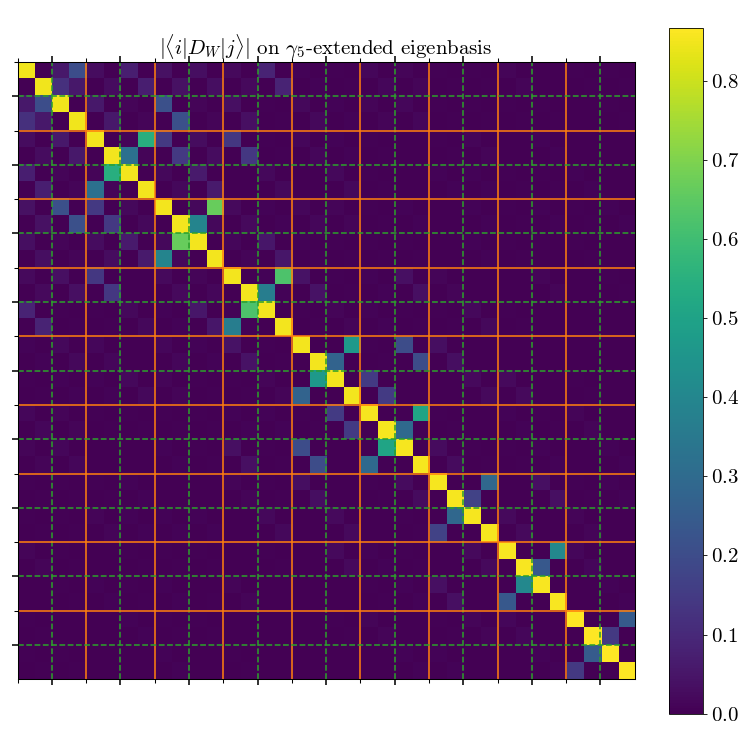

In [36]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.abs(Dw_g5), cmap = 'viridis')
ax.set_title(r'$| \langle i | D_W | j\rangle |$ on $\gamma_5$-extended eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

# Orange solid line groups the complex conjugate blocks
ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
ax.xaxis.grid(True, color = pt.pal[1])
ax.yaxis.grid(True, color = pt.pal[1])

# Green dashed line groups the |i>, g5*|i> pairs
ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
ax.xaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')
ax.yaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')

# plt.xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
# plt.yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
# plt.grid(color = pt.pal[3])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

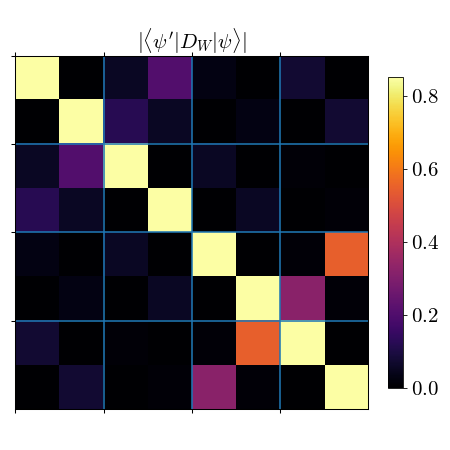

In [37]:
Dw_g5_plot = Dw_g5[:8, :8]

fig, axes = pt.add_subplots(fig_size = (6, 6))
ax = axes[0]
image = ax.matshow(np.abs(Dw_g5_plot), cmap = 'inferno')
# image = ax.matshow(np.abs(Dw_g5_plot) > 1e-8, cmap = 'inferno')
# image = ax.matshow(np.log(np.abs(Dw_g5_plot)), cmap = 'inferno')
ax.set_title(r'$| \langle \psi^\prime | D_W | \psi\rangle |$', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.04)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

# Green dashed line groups the |i>, g5*|i> pairs
ax.set_xticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 2), labels = [])
ax.set_yticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 2), labels = [])
ax.xaxis.grid(True, color = pt.pal[0], linestyle = '-')
ax.yaxis.grid(True, color = pt.pal[0], linestyle = '-')

# plt.xticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 4), labels = [])
# plt.yticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 4), labels = [])
# plt.grid(color = pt.pal[3])

plt.tight_layout()
plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Dw_mat_elems_g5.pdf')

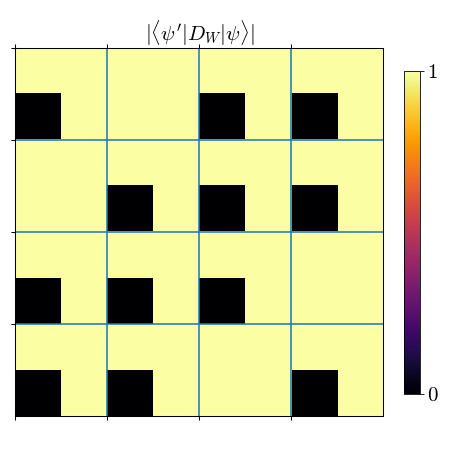

In [38]:
fig, axes = pt.add_subplots(fig_size = (6, 6))
ax = axes[0]
# image = ax.matshow(np.abs(Dw_g5_plot), cmap = 'inferno')
image = ax.matshow(np.abs(Dw_g5_plot) > 1e-8, cmap = 'inferno')
# image = ax.matshow(np.log(np.abs(Dw_g5_plot)), cmap = 'inferno')
ax.set_title(r'$| \langle \psi^\prime | D_W | \psi\rangle |$', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.04, ticks = [0, 1])
cbar.ax.tick_params(labelsize = default_style['fontsize'])
# cbar.remove()

# Green dashed line groups the |i>, g5*|i> pairs
ax.set_xticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 2), labels = [])
ax.set_yticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 2), labels = [])
ax.xaxis.grid(True, color = pt.pal[0], linestyle = '-')
ax.yaxis.grid(True, color = pt.pal[0], linestyle = '-')

# plt.xticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 4), labels = [])
# plt.yticks(np.arange(-0.5, len(Dw_g5_plot) - 0.5, 4), labels = [])
# plt.grid(color = pt.pal[3])

plt.tight_layout()
plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Dw_mat_elems_g5_zero.pdf')

In [39]:
# Subdiagonal, these are matrix elements <i'|Dw|i> (should be 0) which are the bottom left component of Mike's 2x2 blocks
# Every even indexed one should be 0, odd-indexed ones might not be 0 because they connect different blocks
Dw_g5.diagonal(offset = -1)

array([ 2.19321089e-14+1.08420217e-19j,  1.69078800e-01+1.14415767e-01j,
       -9.62424584e-15+0.00000000e+00j,  2.94112428e-04+1.06392371e-04j,
       -8.01303468e-14+5.42101086e-20j,  3.67047619e-01-4.03671024e-01j,
       -2.57797256e-14+1.08420217e-19j, -9.36793150e-04-1.01034279e-03j,
        4.95367636e-14+0.00000000e+00j,  5.50609569e-01-3.73564122e-01j,
       -7.34134975e-15+0.00000000e+00j,  2.84531495e-04-4.69505667e-04j,
       -8.38218384e-15+0.00000000e+00j,  3.98383820e-01-4.83279812e-01j,
       -1.07240605e-14-2.16840434e-19j,  3.04128711e-05-4.58667248e-04j,
       -4.75691535e-14+1.08420217e-19j,  5.48316990e-02-4.65245896e-01j,
       -1.75259113e-14+1.08420217e-19j, -1.18727773e-04-6.35460233e-04j,
       -1.07882453e-14-2.16840434e-19j,  2.14510122e-01+4.57541741e-01j,
        2.06562198e-15-2.16840434e-19j,  3.31238626e-05-2.83865981e-05j,
       -1.81976829e-14-4.33680869e-19j, -2.87119020e-01-3.32500066e-02j,
       -4.70803951e-15+1.62630326e-19j, -3.22979587

In [40]:
# Superdiagonal, these are matrix elements <i|Dw|i'> which I can't always show are 0, upper right of each D block
# Empirically every 4th one of these vanishes, which is <k'|Dw|i> where |k> and |i> are from different cc pairs
Dw_g5.diagonal(offset = 1)

array([-1.41421269e-03-1.62630326e-19j,  9.54873433e-02-7.27261469e-02j,
       -1.70753685e-03+0.00000000e+00j,  3.76608467e-14+5.20486432e-14j,
        2.57309130e-04-4.33680869e-19j,  1.96851613e-01+2.54080552e-01j,
       -3.39977044e-04+2.16840434e-19j,  3.88578059e-15-3.09554465e-13j,
       -2.43179688e-03-4.33680869e-19j,  3.10308070e-01+2.38755426e-01j,
       -2.75959111e-03+2.16840434e-19j,  2.99872974e-13-2.69732153e-14j,
        7.75261415e-04+0.00000000e+00j,  2.07206909e-01+3.05029323e-01j,
       -1.58050984e-03+4.33680869e-19j,  4.36924802e-14+2.28029401e-15j,
       -5.94267929e-04-2.16840434e-19j, -1.99355837e-02+2.75613766e-01j,
        2.83883965e-04+0.00000000e+00j, -7.79367890e-15+5.24406907e-15j,
       -1.38009571e-03+5.42101086e-19j,  7.66837378e-02-2.87231528e-01j,
        7.84139611e-05-4.33680869e-19j, -8.68142364e-15+8.15732031e-15j,
        1.09879969e-03-3.25260652e-19j, -1.68399821e-01-2.44802603e-02j,
        8.56234778e-04+0.00000000e+00j,  3.17757973

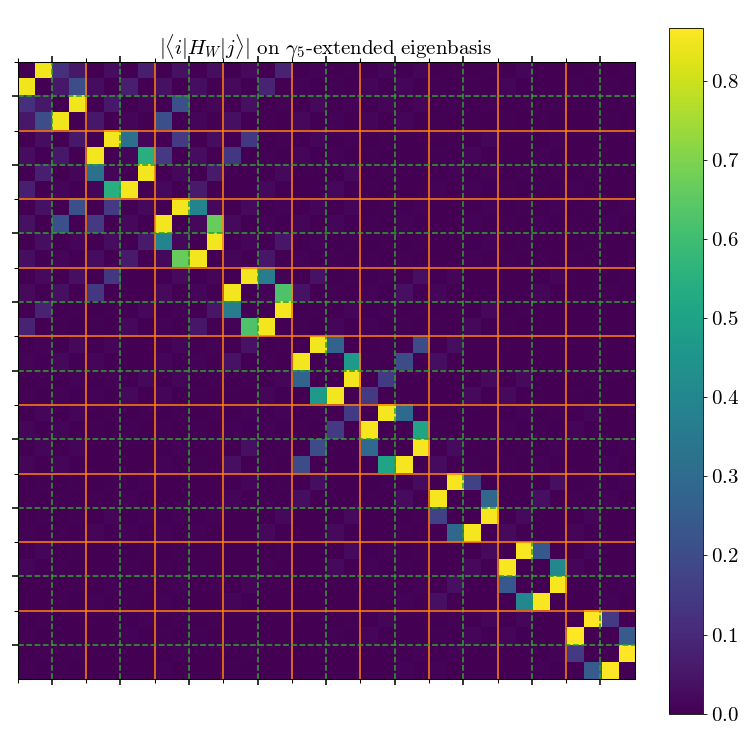

In [41]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.abs(Hw_g5), cmap = 'viridis')
ax.set_title(r'$| \langle i | H_W | j\rangle |$ on $\gamma_5$-extended eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
ax.xaxis.grid(True, color = pt.pal[1])
ax.yaxis.grid(True, color = pt.pal[1])

ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
ax.xaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')
ax.yaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

### Inner products between evals very far away

In [42]:
ip_ext = read_Eigen_matrix(r"""(1,-1.64852794e-21)      (-0.0474233116,0.0462760041)       (0.0189920139,0.0285081212)      (0.0805353218,-0.0340551774)        (0.045681688,0.0128151676)     (-0.0332334443,-0.0170719915)      (-0.0167160123,0.0213983773)       (0.0114018239,0.0992286835)    (-0.00345442109,0.00721855614)   (0.000158091246,-0.00507680503)     (0.0040653687,-0.00212000988)     (0.00527058036,0.00741262312)   (-0.00237638109,-0.00442353332)      (0.00440570693,0.0175327227)      (0.0108998807,0.00684558539)    (0.00376969517,-0.00655796158)    (0.00701183921,-0.00171835763)      (-0.0113300566,-0.007498564)   (-0.00284561926,0.000136234208)   (0.00309301566,-0.000990044202)   (-0.00173169498,-0.00469421997)    (0.00302137799,-0.00288957554)  (0.000371578934,-0.000130113644)   (0.00270972055,-0.000234537798)  (-1.03073573e-05,2.56185868e-06)  (-5.34653618e-07,1.27087679e-05)  (-1.45113356e-05,1.97412106e-05) (-2.15790805e-05,-1.05862058e-05)  (-2.85252162e-05,-4.4892072e-05)   (1.65589828e-05,3.34049067e-08)  (-8.22708698e-06,2.14638465e-05)   (1.17656293e-05,1.75170572e-05)  (4.26128673e-06,-3.20231987e-05)  (-2.00305422e-05,4.59530239e-05) (-3.76934966e-06,-1.07534612e-05)  (3.43315089e-05,-4.43259672e-06)  (-9.62505907e-06,4.35720125e-05)  (3.42308151e-06,-5.61463266e-06) (-2.05280621e-05,-1.33944169e-05) (-5.54863849e-07,-1.99951313e-05) (-3.87657703e-05,-2.44127539e-06) (-1.25047878e-05,-3.13908282e-05)   (5.88634538e-06,1.19589737e-05)   (4.49463079e-06,1.28113832e-05)   (-8.6343259e-06,1.27273241e-05)  (-1.0271803e-05,-8.61204817e-06)  (9.12867806e-06,-2.29327728e-05)  (5.68822517e-06,-2.03514081e-05)
(-0.0474233116,-0.0462760041)                (1,3.18626549e-21)     (-0.0567338032,-0.0317566761)   (-0.000303716794,-0.0148262932)       (-0.152016706,-0.198032513)    (-0.0129255105,-0.00857300219)       (0.015597998,-0.0391142779)     (0.0037133463,-0.00377239909)    (-0.0072989643,-0.00189695294)    (0.00667569813,-0.00747594422)     (0.00484456378,0.00412943193)    (-0.0191076062,-0.00661432322)    (0.00385939229,-0.00854595651)     (0.00018113742,-0.0131379718)     (-0.0124416486,-0.0125652962)   (-0.00468931824,-0.00170596903)     (0.00581891844,0.00216114947)     (0.00228740226,0.00460887857)  (-0.00481907624,-0.000142980425)   (-0.00139732208,-0.00311230519)    (-0.00113447517,-0.0031912975)         (0.0038393,0.00124088176)    (-0.00157477183,0.00273760169)  (-0.00121956173,-0.000622538632)  (3.36723963e-05,-2.11408072e-05)   (-4.17416891e-06,1.4806681e-05)  (-2.99099498e-05,1.75350767e-05) (-1.02650604e-05,-1.44306411e-05) (-5.32206661e-06,-1.16963364e-05)  (-2.40646663e-05,1.27317988e-05) (-8.11146871e-06,-7.05782605e-06)   (4.04885767e-06,4.11488697e-05)  (-3.13181221e-05,2.73232738e-07)   (1.84793624e-05,-4.3375415e-05)   (4.7323975e-06,-2.31034761e-05) (-1.02542437e-05,-2.68664101e-05)   (4.31225196e-06,2.53974433e-05)   (8.38694822e-06,2.29757585e-06) (-3.61424991e-05,-3.32598612e-05)   (1.23851224e-05,1.00896366e-05)  (9.44132272e-05,-8.50129477e-07)   (1.69296594e-05,3.49589961e-05)  (2.73013622e-07,-1.94574882e-05)   (1.79239641e-05,1.14945355e-05)  (-1.31112805e-05,8.72192865e-06)  (7.71967487e-06,-1.38365485e-05)    (1.6686022e-05,6.06171301e-05) (-1.44029608e-06,-5.81586572e-06)
(0.0189920139,-0.0285081212)      (-0.0567338032,0.0317566761)               (1,-8.46419587e-21)      (0.010652057,-0.00857758553)       (-0.0225322113,0.165986397)    (-0.0327878631,-0.00759231357)        (0.0930014802,0.138244404)     (0.00521112832,0.00420692958)    (-0.00194650788,-0.0192511015)    (-0.00445909834,0.00137635481)     (-0.00888876984,0.0241050032)     (0.00411757689,-0.0168874977)     (-0.0102456553,0.00421984451)      (0.0048355898,0.00154411902)     (0.00335135816,0.00180257336)   (-0.000718559913,0.00578761739)    (-0.000344170303,0.0140083173)     (0.0026849661,-0.00168848859)     (0.00800784026,0.00496337985)  (-0.00114448127,-0.000511070285)    (0.000380743549,0.00176762261)     (0.00236594674,0.00168199656)   (0.000246646389,-0.00369527146)  (-0.00416702706,-0.000989567011) (-5.06492556e-05,-2.02030821e-05)  (4.15705333e-06,-3.06920728e-05)    (1.1577512e-05,1.67653426e-05) (-3.83975026e-06,-2.34071949e-05)   (1.84697813e-06,1.27449011e-05)   (3.93189216e-05,3.32677459e-05)   (3.56846244e-05,1.08482226e-05)  (-2.36260228e-05,-3.5024924e-05)  (-1.72388383e-06,8.96097239e-06)  (-1.24942613e-05,1.29703599e-05)   (1.37933364e-05,6.33264022e-06)  (-6.56629646e-07,4.31696081e-05)   (2.34147772e-05,1.77375344e-05)   (1.75384079e-05,1.35286618e-05) (-1.96101038e-05,-1.20825642e-05)   (3.59922441e-06,3.99005923e-06)  (-1.86076775e-05,5.69409513e-06) (-2.59081687e-06,-1.30749295e-05)   (1.47087309e-05,5.23464121e-05) (-2.26514709e-05,-2.13213657e-05)  (3.19070889e-05,-1.65589931e-05)  (2.33006898e-05,-6.68867721e-06)  (-3.60253157e-05,-2.5604765e-05)     (1.490977e-06,2.69438092e-05)
(0.0805353218,0.0340551774)    (-0.000303716794,0.0148262932)       (0.010652057,0.00857758553)               (1,-1.68081623e-21)    (-0.00458076643,-0.0198815571)      (0.0646655085,-0.0334096401)    (0.00396241293,-3.8726392e-06)     (-0.00299575187,0.0229514802)     (-0.0178041225,-0.0258086367)       (-0.021327545,0.0281175655)   (-0.00183111986,-0.00110023263)   (0.000797004369,-0.00137189217)     (-0.00523376016,0.0224511782)   (-0.00517640759,-0.00301576352) (-0.000427456794,-5.15884949e-05)     (0.00491850806,0.00724548817)    (0.00794967824,-0.00241625269)      (0.0047110517,0.00424625587)   (-0.00601993822,-0.00189048945)   (-0.00059887917,0.000955360074)   (-0.00601779322,-0.00560283542)    (0.000324227125,0.00340411466)    (0.00226653057,-0.00358128406)   (-0.0026999498,-0.000702461789) (-3.27410637e-06,-3.09034639e-05) (-3.84488241e-05,-2.06988561e-05)  (-1.11655601e-05,1.29520323e-05)   (2.44783243e-05,2.47182819e-05)  (3.52952993e-05,-2.87726901e-05)   (2.78426423e-05,1.18442095e-05)   (1.64650348e-05,1.86132268e-05)   (4.20348106e-05,3.52423687e-05)   (8.59245765e-06,6.42915322e-07)   (1.62684459e-05,1.20264107e-05) (-1.67689488e-05,-9.25033351e-06) (-8.63238894e-06,-1.25944767e-05) (-6.81466995e-06,-6.36293021e-06)  (-4.11289548e-07,5.70754764e-07)  (3.41920536e-05,-4.81805332e-05) (-7.09292387e-06,-4.24576466e-06)   (3.82180787e-06,2.09472342e-05)  (4.74587896e-06,-1.27204512e-05)  (2.51301426e-05,-1.83348222e-05)  (-1.37133472e-05,3.25466147e-05)  (6.83387386e-06,-3.25918855e-06)  (-1.61089126e-05,-1.5120992e-06)  (-2.81127346e-06,1.51420399e-06)  (3.97962738e-05,-8.31599677e-06)
(0.045681688,-0.0128151676)        (-0.152016706,0.198032513)      (-0.0225322113,-0.165986397)     (-0.00458076643,0.0198815571)                (1,-1.8890017e-20)    (-0.000155439845,0.0228559056)      (0.0272415558,0.00365738609)     (0.0103265974,-0.00438053026)     (-0.00329989244,0.0212651461)     (0.0064251178,0.000432925873)      (-0.023348814,0.00653806551)      (0.0108612278,-0.0122189591)      (0.00423602704,0.0118802483)   (-0.00643032909,-0.00104950444)    (0.00454701668,-0.00742849889)   (0.000201232562,0.000855705788)   (0.000467162304,-0.00797616717)    (-0.00037888455,0.00686251191)    (-0.00493822854,-0.0104729097)   (0.00512921897,-0.000481603473)     (0.0048232537,0.000198974836)   (-0.0107983887,-0.000336048347)    (0.00345846919,-4.7746159e-06)   (-0.000472157884,0.00187844219) (-3.93554215e-06,-1.13357085e-05)  (3.36423728e-05,-2.02728595e-05)   (-1.5435241e-05,-1.1863105e-05)  (-3.67279644e-06,1.40024158e-05)  (-1.95070005e-05,1.17016409e-05)   (8.1383628e-06,-1.78933281e-05)   (1.76949574e-05,2.12978485e-06) (-6.13513841e-06,-1.32737732e-05)  (-1.47791351e-05,6.93080212e-06) (-3.26150518e-06,-2.38942575e-05)    (1.4705605e-05,4.19121154e-05)   (1.70788811e-05,4.37713717e-06)  (-8.35702934e-06,3.73018324e-06) (-2.39368279e-05,-1.01995942e-05)  (6.82350256e-06,-3.74130726e-06)  (-1.70819454e-05,2.81430774e-06)  (-2.67832788e-05,5.68815943e-05)  (-2.06804394e-05,1.34745782e-05)   (2.88554484e-05,3.34782088e-05)   (-2.80603786e-06,1.5238844e-06)  (4.14114108e-06,-1.76441206e-05)   (-1.2799514e-05,2.23816014e-05) (-5.80727154e-05,-1.05946424e-05)   (8.69187206e-06,2.33743791e-05)
(-0.0332334443,0.0170719915)     (-0.0129255105,0.00857300219)     (-0.0327878631,0.00759231357)       (0.0646655085,0.0334096401)   (-0.000155439845,-0.0228559056)                (1,2.67511207e-21)      (0.0038551414,-0.0154409235)        (0.0293089469,0.055014628)   (-0.00460677176,-0.00879575625)     (-0.00279747625,0.0113112816)    (0.00868980949,-0.00128141415)   (-0.00854542183,-0.00125173068)    (0.00381370398,-0.00244204271)    (-0.00613895492,0.00189466104)    (0.00498371352,0.000690911369)   (-0.00169500749,-0.00113756801)   (-0.00427445759,-0.00791856515)    (-0.00500943401,0.00122628649)     (6.10214891e-05,0.0039790354)     (0.00237186453,0.00114936384)    (-0.00414440293,-0.0014794387)    (0.00158195304,-0.00133222389)      (-0.001888708,0.00101741314)  (0.000453119559,-0.000416066987)  (-5.29270059e-06,7.14151679e-06)  (4.29201224e-06,-3.12430424e-06)    (3.8352152e-06,7.75317098e-06)    (2.1099479e-05,1.17563006e-05) (-6.58889584e-07,-8.04683221e-08) (-1.05649663e-06,-1.70483829e-05)   (-8.6407346e-06,-2.8773975e-05)  (-8.90338653e-06,3.25080013e-06)  (-4.47925555e-06,2.45920215e-05)   (-1.3795122e-05,2.60251599e-05) (-7.32091097e-06,-1.36201402e-06)   (4.35058302e-05,5.15540109e-05)  (-9.85039105e-06,8.10801475e-06)   (1.90690791e-05,1.30126388e-05) (-2.27573423e-05,-1.94223919e-05)  (-1.66406561e-06,7.05091644e-06)   (3.68899215e-06,4.72123752e-06)  (4.67553101e-07,-2.11262186e-05)  (1.18617731e-05,-2.42381973e-05)   (1.17137525e-05,3.89318278e-05)   (1.44782432e-06,1.21262714e-05)  (-9.3997991e-06,-2.46937826e-05)   (8.79836052e-06,2.33345043e-05)  (1.96211644e-05,-2.45756778e-05)
(-0.0167160123,-0.0213983773)        (0.015597998,0.0391142779)       (0.0930014802,-0.138244404)     (0.00396241293,3.8726392e-06)     (0.0272415558,-0.00365738609)       (0.0038551414,0.0154409235)                (1,7.63386493e-22)  (-0.00795738497,-0.000219559008)     (-0.00995864673,-0.012562549)   (-0.000713266239,0.00569978553)      (0.0088210061,0.00772684352)     (-0.0200851785,-0.0465424589)    (-0.00193552516,0.00583009212)    (0.00952864395,-0.00646359661)       (-0.029994957,0.0305988698)     (0.00516898034,-0.0110601208)    (0.000934254539,0.00288094793)     (0.000947860476,0.0029923386)      (0.00660314021,0.0106471878)    (0.0013173491,-1.00442925e-05) (-0.000669893851,-0.000110295582)   (-0.00626102843,-0.00214647693)    (0.00611540355,-0.00495093126)    (0.00403965173,0.000361299945)  (-3.03231673e-05,1.72242238e-05) (-1.65425417e-05,-4.21231561e-06)    (2.00305871e-05,-4.984429e-06)  (-7.77478252e-06,3.82129476e-06)  (2.00333524e-05,-2.48521832e-07)  (1.44488394e-05,-1.41266435e-05)  (2.85968127e-05,-1.47495558e-05)  (-2.84451407e-05,1.12070182e-05)  (5.94993985e-06,-8.18286378e-07)   (3.55392168e-05,4.00825762e-06) (-1.09545574e-06,-6.61365821e-06)   (3.34662444e-06,7.19839469e-06)   (2.00496626e-05,1.03597277e-05)   (5.09670077e-05,1.43696073e-05) (-2.61034209e-05,-1.23636843e-05) (-1.37696231e-05,-1.98582246e-05)  (6.76480977e-06,-1.43276238e-05) (-1.57528094e-06,-1.33114913e-05)  (1.99229883e-05,-1.38106874e-05)  (-1.54252362e-05,4.88319534e-06)  (3.72932114e-07,-2.97378104e-05) (-1.06350657e-05,-1.51593112e-05)  (1.49807889e-05,-2.09842704e-05)  (1.09116625e-05,-2.40639719e-05)
(0.0114018239,-0.0992286835)      (0.0037133463,0.00377239909)    (0.00521112832,-0.00420692958)    (-0.00299575187,-0.0229514802)      (0.0103265974,0.00438053026)       (0.0293089469,-0.055014628)   (-0.00795738497,0.000219559008)                (1,4.64241089e-21)     (-0.0230175755,0.00957857493)         (0.0182184243,0.01923766)  (-0.000172043574,-0.00366525782)    (0.0063492597,-0.000566891981)     (0.0129676271,-0.00597495461)     (0.0104462436,-0.00206477965)    (-0.00445262471,0.00176309216)     (0.00617267833,0.00137233708)     (0.00214098739,-0.0234753713)   (0.000738941131,-0.00553710396)     (0.00151538444,0.00220941281)   (0.00335465998,-0.000776336683)   (-0.00333288139,0.000375494094)     (0.000838393822,0.0024495623)     (0.00254445009,0.00302755509)   (0.000356913247,-0.00158878617)   (2.75629853e-05,8.40936434e-06) (-1.22561497e-05,-5.84924485e-06)    (1.8138591e-05,3.58332124e-06)   (1.0981429e-05,-2.47108464e-05)  (2.63824987e-05,-1.01742097e-05)   (-7.6998238e-06,2.54384372e-05)   (-1.57297643e-05,1.5557909e-05)  (1.40023978e-05,-2.29199507e-05)  (1.16298279e-05,-1.01358263e-05)  (-7.42307469e-06,2.54348372e-05)   (3.11647327e-05,1.80925244e-05) (-7.74451753e-06,-1.25314954e-05)  (-2.02631487e-05,2.72066364e-05)  (-2.25374061e-05,-1.1053389e-05)   (3.86444345e-06,2.25432435e-06)   (9.22903776e-06,1.76375553e-05)  (9.32549364e-06,-1.26890853e-05)  (-1.2230504e-05,-9.32475928e-06) (-3.47345624e-05,-9.26135805e-06) (-4.70895972e-06,-5.92873008e-06)  (-2.19837138e-06,3.93685337e-05)   (1.60117847e-05,2.50619073e-05)   (1.81232821e-05,1.03388365e-07)  (9.16185919e-06,-8.07483677e-06)
(-0.00345442109,-0.00721855614)     (-0.0072989643,0.00189695294)     (-0.00194650788,0.0192511015)      (-0.0178041225,0.0258086367)    (-0.00329989244,-0.0212651461)    (-0.00460677176,0.00879575625)      (-0.00995864673,0.012562549)    (-0.0230175755,-0.00957857493)                 (1,1.1241599e-20)      (0.0524141335,-0.0449725812)     (0.00199616184,0.00210624093)    (-0.00286864227,0.00542936927)        (0.13278355,-0.0423410249)         (0.070645756,0.188510321)    (0.00460225183,-0.00697451756)  (-0.000912149621,-0.00367294313)       (0.0274409334,0.0166281278)     (0.00422733814,0.00932564985)    (-0.00367539883,0.00627707441)     (0.000980898339,0.0096550675)    (-0.00958398702,0.00627482111)       (-0.00203280901,0.00220115)   (-0.00303377145,0.000883979843)      (0.0014592809,0.00226292124)  (-2.3393761e-06,-2.09869673e-05)    (5.38421561e-06,1.5151048e-05)   (3.59691759e-05,1.06789144e-05)  (-7.68548827e-06,-2.3106023e-05)  (-1.17310489e-05,2.20528042e-05) (-2.42869146e-05,-2.15527637e-05)  (9.44554021e-07,-1.32157926e-05)  (-7.89015394e-06,1.57866836e-05)   (1.34790628e-05,1.60456238e-05) (-4.94362517e-06,-2.53137963e-05) (-9.71097466e-06,-2.19209965e-05) (-1.04531444e-05,-2.22970024e-05)    (1.4071731e-05,2.22823864e-05)   (8.10380179e-06,2.07141394e-05)   (6.06912202e-07,3.15962629e-05) (-2.69588552e-05,-5.20943515e-06)  (6.15731905e-06,-3.54268037e-05)  (1.21538148e-05,-9.63392197e-06)   (5.77742318e-06,5.50143549e-07)  (1.20961725e-06,-1.02566329e-06)   (2.48715318e-05,8.72094185e-06)   (5.52562928e-06,2.24606487e-05)   (4.96384463e-05,-2.7343749e-05)   (1.20232268e-05,5.35061161e-06)
(0.000158091246,0.00507680503)     (0.00667569813,0.00747594422)   (-0.00445909834,-0.00137635481)      (-0.021327545,-0.0281175655)    (0.0064251178,-0.000432925873)    (-0.00279747625,-0.0113112816)  (-0.000713266239,-0.00569978553)        (0.0182184243,-0.01923766)       (0.0524141335,0.0449725812)                (1,4.23860623e-21)    (-0.00138536271,0.00472055653)  (0.000469786102,-0.000859407536)        (0.219585008,-0.107336959)         (0.0594022057,0.10950896)     (0.00473165707,0.00461501314)     (-0.00176172961,0.0013968819)      (0.0298450121,-0.0166067936)    (-0.00401286073,-0.0121071161)   (-0.00317571206,0.000830955488)   (-0.00432259518,-0.00236752139)   (-0.00695188208,-0.00457981017)    (0.000540272004,0.00149037247)   (0.00123955681,-4.33625457e-05)  (-0.00148693585,-0.000754314387)    (9.8279121e-06,-4.7850377e-06)   (-1.35188178e-05,1.4424944e-05)    (-1.766758e-05,1.63434644e-05)  (-3.89702224e-05,-8.1403614e-07)   (3.55770387e-05,1.03758848e-05)  (1.59321232e-05,-1.05020704e-05)  (-4.18867636e-05,2.90682555e-05)    (1.9688084e-05,1.47541359e-05)  (-3.27230458e-05,6.53561711e-05)  (2.72406728e-05,-6.23843604e-06)  (-1.07985345e-05,1.03769686e-05) (-3.24238493e-05,-2.99995331e-05)  (-2.56064254e-05,1.21089536e-05)  (-3.70545239e-06,4.56344873e-05)   (1.96066455e-05,8.66252225e-06)   (1.21164281e-05,3.51499651e-05)  (1.43193986e-05,-2.81807884e-05)   (1.57698032e-06,3.23979265e-05)  (-1.15552444e-08,9.20848513e-06) (-6.02429896e-06,-6.13805767e-06) (-4.78392861e-06,-1.45461979e-05)  (5.68712502e-06,-2.52007388e-07)  (-1.42725443e-05,7.41583017e-06)  (2.07025604e-05,-1.41718944e-05)
(0.0040653687,0.00212000988)    (0.00484456378,-0.00412943193)    (-0.00888876984,-0.0241050032)    (-0.00183111986,0.00110023263)     (-0.023348814,-0.00653806551)     (0.00868980949,0.00128141415)     (0.0088210061,-0.00772684352)   (-0.000172043574,0.00366525782)    (0.00199616184,-0.00210624093)   (-0.00138536271,-0.00472055653)               (1,-5.79489474e-21)       (-0.198965732,0.0182664298)    (0.00333239537,-0.00118805048)     (-0.002414372,-0.00463196748)      (-0.00216930408,0.109541219)     (-0.0492636891,-0.0225284954)    (-0.00263352709,0.00120156907)   (-0.00248644771,0.000837593784)      (0.0114507687,0.00269479324)    (0.00119204874,-0.00112124494)   (0.00113954876,-5.74170724e-05)     (0.00174378183,0.00685134271)    (0.00153654944,-0.00086473651)    (-0.00147786997,0.00102976811)   (2.74145076e-05,4.21109862e-05)  (-1.23920237e-05,5.75462459e-06) (-2.38870812e-05,-2.86343272e-05) (-7.54463996e-06,-8.96890329e-06)  (-1.58336857e-05,1.91761707e-06) (-6.27814379e-06,-1.74397646e-05)    (3.01317814e-05,6.7883563e-06) (-1.98121934e-05,-3.68358547e-06) (-7.47740811e-06,-1.98206778e-05)  (-1.82750869e-05,4.76570333e-05)  (6.38342485e-06,-1.07590485e-05)    (-1.2871127e-05,4.1813459e-06)  (2.19531149e-06,-2.94980279e-06) (-1.35044906e-05,-1.36365666e-05)   (2.88069605e-05,1.15123663e-07)   (4.95127097e-05,1.49481932e-05) (-4.86074512e-05,-2.25932448e-06)  (-1.6454513e-05,-4.76901197e-05)   (1.04199551e-05,1.48991285e-05)   (-1.9649285e-05,-5.6433606e-06)   (-6.6370438e-06,2.58332438e-05)  (3.31009783e-05,-6.80869654e-06)   (1.75428182e-05,1.74528201e-05)  (1.82311672e-05,-2.30950089e-05)
(0.00527058036,-0.00741262312)     (-0.0191076062,0.00661432322)      (0.00411757689,0.0168874977)    (0.000797004369,0.00137189217)       (0.0108612278,0.0122189591)    (-0.00854542183,0.00125173068)      (-0.0200851785,0.0465424589)     (0.0063492597,0.000566891981)   (-0.00286864227,-0.00542936927)   (0.000469786102,0.000859407536)      (-0.198965732,-0.0182664298)               (1,-1.96358992e-21)   (-0.000429519712,0.00112536777)    (-0.00274618396,0.00317529536)      (-0.0607612099,-0.229577098)      (0.0201217507,-0.0336635969)     (0.00338740692,0.00015029881)    (-0.00273479934,0.00155184642)    (-0.00335214739,-0.0008101956)   (-0.00113337059,0.000928395822)     (0.0012773784,-0.00200150035)    (-0.00163104321,0.00295972655)     (0.00367201615,0.00394461824)    (0.00125374807,-0.00142620215) (-2.13024936e-05,-2.11641875e-05) (-3.31382914e-05,-1.18106948e-05)  (1.65770305e-05,-7.87097252e-06)  (-2.9355033e-06,-1.13431436e-05)  (3.12792446e-07,-9.58750347e-07) (-2.15460054e-05,-1.18991543e-05)  (-3.36942217e-05,1.26130346e-05)  (2.07366351e-05,-1.43866508e-05)  (-9.05846959e-06,1.30199792e-05) (-3.46478634e-06,-3.99156121e-06)  (4.88751344e-06,-2.65570114e-06)  (-1.05003888e-05,5.59017656e-06)  (-4.02992064e-06,2.94165562e-05) (-4.09430762e-05,-1.35684098e-06)  (-1.20842369e-05,2.45670676e-05)   (1.15619139e-05,-2.3934193e-05) (-1.53504568e-05,-1.79033424e-05)  (-9.77540737e-06,5.85545339e-06) (-1.41573949e-05,-5.47052373e-06)    (1.0861885e-05,1.57729442e-05) (-2.96834628e-05,-2.04321326e-05)  (-3.92474342e-06,5.43478493e-06)  (8.95656583e-07,-4.44080853e-05) (-5.89213554e-08,-7.44629759e-06)
(-0.00237638109,0.00442353332)     (0.00385939229,0.00854595651)    (-0.0102456553,-0.00421984451)    (-0.00523376016,-0.0224511782)     (0.00423602704,-0.0118802483)     (0.00381370398,0.00244204271)   (-0.00193552516,-0.00583009212)      (0.0129676271,0.00597495461)         (0.13278355,0.0423410249)         (0.219585008,0.107336959)     (0.00333239537,0.00118805048)  (-0.000429519712,-0.00112536777)                (1,1.27864636e-21)      (-0.00248929761,0.170742872)   (-0.000382566026,0.00223033326)    (0.00198201902,-0.00129380312)     (-0.00467959736,0.0253604033)      (-0.0208924841,0.0157226632)  (-0.00354203714,-0.000695662249)     (-0.0033996206,0.00266105278)   (-0.00420429026,-0.00219427997)     (-0.00299461863,-0.001438494)    (0.000817655709,-0.0021811102)  (0.000394738083,-6.48308441e-05)  (-1.15459523e-05,8.21324545e-06)  (-1.07210409e-05,3.32920043e-05) (-4.60282314e-05,-1.81284037e-05)   (1.0275836e-05,-2.52254032e-05)    (9.8266841e-06,8.99459117e-06) (-5.82131378e-06,-3.01560184e-05)  (-6.08278065e-06,-3.7626399e-06)   (1.77775106e-05,9.38656241e-06)  (-1.78993322e-05,4.19558321e-05)  (-3.38454901e-06,5.21065802e-06) (-9.37216455e-06,-7.32603377e-06) (-2.31877109e-05,-1.84458294e-05)   (1.40070035e-06,8.11259708e-06)   (1.25829704e-05,7.85978354e-06) (-1.47103597e-05,-3.16205062e-06)  (-1.40925383e-05,1.40796062e-05)  (2.46175301e-05,-1.48637383e-05)  (-1.41563834e-05,3.15895114e-05) (-4.00488105e-05,-1.61288254e-05)   (-1.53699497e-06,1.5191334e-05)    (4.2050037e-06,1.41185648e-05)   (6.98392147e-06,3.77380739e-06)     (1.45358878e-05,9.977749e-06)   (-3.09046799e-05,5.9962272e-05)
(0.00440570693,-0.0175327227)      (0.00018113742,0.0131379718)     (0.0048355898,-0.00154411902)    (-0.00517640759,0.00301576352)    (-0.00643032909,0.00104950444)   (-0.00613895492,-0.00189466104)     (0.00952864395,0.00646359661)      (0.0104462436,0.00206477965)        (0.070645756,-0.188510321)        (0.0594022057,-0.10950896)      (-0.002414372,0.00463196748)   (-0.00274618396,-0.00317529536)     (-0.00248929761,-0.170742872)                 (1,1.3649244e-20)      (0.00021214066,0.0047213581)     (0.00320177289,0.00417985666)    (0.00115782833,0.000674233786)    (-0.00466654626,0.00770236389)   (-0.00474902032,0.000732147124)      (0.00748328041,0.0162205844)     (-0.00465180831,0.0111696145)    (0.00068597993,0.000714528523)   (0.000286141205,-0.00333147327)   (-0.00224523841,-0.00234236713)  (1.22806024e-05,-7.83693762e-06)   (3.50849863e-07,1.89497611e-05)  (-5.36099277e-06,2.11533917e-05)   (-1.11631848e-05,1.9974362e-05)  (-9.21085198e-06,2.23434835e-05) (-2.75604913e-05,-2.12517445e-05)  (2.86542432e-05,-2.54896052e-06)   (4.05910751e-05,6.64110055e-10)    (4.29899471e-05,1.6864878e-05)  (3.49902647e-05,-7.79195462e-06)  (-2.62824065e-05,-3.9697048e-06)   (1.10335295e-05,1.65860234e-05)   (1.40062142e-05,3.79665524e-06)  (-2.83888652e-05,1.17184867e-07)  (1.69715196e-05,-4.33321791e-06)  (6.57119794e-05,-3.36395745e-05)  (6.29486655e-06,-1.46821892e-05)  (1.35805664e-05,-1.46860943e-05)  (5.37308273e-06,-7.05055639e-08)  (-4.76105045e-06,-6.7578462e-06)    (1.9864562e-05,1.28750603e-06)  (2.14495905e-05,-1.11295405e-05)  (1.71674826e-05,-2.23399348e-06)  (-7.24110795e-06,2.25593945e-07)
(0.0108998807,-0.00684558539)      (-0.0124416486,0.0125652962)    (0.00335135816,-0.00180257336)  (-0.000427456794,5.15884949e-05)     (0.00454701668,0.00742849889)   (0.00498371352,-0.000690911369)      (-0.029994957,-0.0305988698)   (-0.00445262471,-0.00176309216)     (0.00460225183,0.00697451756)    (0.00473165707,-0.00461501314)     (-0.00216930408,-0.109541219)       (-0.0607612099,0.229577098)  (-0.000382566026,-0.00223033326)     (0.00021214066,-0.0047213581)                (1,4.64285215e-21)       (0.0267923967,-0.014511946)    (0.00510500167,0.000869951774)    (-0.00511436429,0.00270693876)    (0.00845104847,-0.00132054043)     (-0.0045894902,0.00132235283)      (-0.00139143327,0.001823957)    (0.00597942987,-0.00528168522)    (-0.00219221666,-0.0109724065)    (0.00388371998,-0.00268111713)  (1.80022311e-05,-1.27558011e-05)   (8.91340515e-06,4.81028393e-07)  (-1.01246672e-05,4.72045451e-06)  (1.33577603e-05,-7.01623653e-06)   (3.92811593e-06,-1.2316319e-05)  (-4.95380475e-08,1.46266041e-05)   (8.88373689e-06,-5.0763228e-06)   (2.24865449e-05,8.06261832e-06)   (1.11618333e-05,1.03491239e-05)  (2.70125162e-05,-4.04462435e-05)  (2.20931293e-05,-1.61698246e-05)  (1.06172359e-05,-1.06614983e-05) (-5.41046763e-06,-3.22588325e-05) (-3.21747724e-05,-1.29747222e-05)  (1.32498829e-05,-3.95769484e-05)  (1.74692901e-06,-1.74286401e-05)   (2.04680179e-05,4.46492873e-05)  (1.97457372e-05,-1.45230026e-05)  (-2.01798651e-05,1.11048446e-05)  (-6.17123991e-06,5.87569239e-05)  (4.42417963e-06,-6.65233895e-07)  (2.15029406e-05,-1.92840043e-05)  (-6.56935822e-06,4.17146254e-06)   (2.86665848e-05,8.56462799e-06)
(0.00376969517,0.00655796158)    (-0.00468931824,0.00170596903)  (-0.000718559913,-0.00578761739)    (0.00491850806,-0.00724548817)  (0.000201232562,-0.000855705788)    (-0.00169500749,0.00113756801)      (0.00516898034,0.0110601208)    (0.00617267833,-0.00137233708)   (-0.000912149621,0.00367294313)    (-0.00176172961,-0.0013968819)      (-0.0492636891,0.0225284954)       (0.0201217507,0.0336635969)     (0.00198201902,0.00129380312)    (0.00320177289,-0.00417985666)        (0.0267923967,0.014511946)               (1,-1.54454337e-21)   (0.000217641749,0.000740259011)    (0.00217647072,-0.00314622803)       (-0.0296461105,0.030496438)    (-0.00285277285,0.00163531186)    (-0.00178918028,0.00398822049)     (-0.0104843507,0.00387597943)    (-0.00635627043,-0.0132063876)   (-8.69750423e-05,0.00198793491)  (3.61274719e-05,-2.58988605e-05) (-2.34944936e-05,-2.10354671e-05)  (4.15756335e-05,-3.27041671e-06)  (-6.09359034e-06,3.30489832e-05)  (-1.11535286e-05,1.68528433e-05) (-6.58618761e-06,-1.71818403e-05)   (3.89655955e-05,3.15520805e-05) (-1.37795902e-05,-6.37043659e-06)   (4.99080297e-05,9.40604516e-06)  (-2.40711122e-05,1.61865573e-05)   (3.08377872e-05,1.85315974e-05)   (4.98993313e-06,5.12428012e-06) (-1.10991441e-05,-1.79641604e-05)   (-2.11925841e-05,1.2395372e-05)   (1.02200465e-05,-4.9039058e-07)   (2.75143637e-05,8.39777606e-06)  (-1.07415576e-05,4.77257049e-07)  (-2.29388087e-05,1.48078504e-06)  (-4.15384232e-06,3.70651042e-05)  (-5.73458897e-06,2.41798278e-05)  (2.20912652e-05,-1.20416863e-06)  (1.66829179e-05,-2.75137665e-05) (-1.31455922e-05,-1.20349868e-05)  (-2.26159647e-06,2.99581226e-05)
(0.00701183921,0.00171835763)    (0.00581891844,-0.00216114947)   (-0.000344170303,-0.0140083173)     (0.00794967824,0.00241625269)    (0.000467162304,0.00797616717)    (-0.00427445759,0.00791856515)   (0.000934254539,-0.00288094793)      (0.00214098739,0.0234753713)      (0.0274409334,-0.0166281278)       (0.0298450121,0.0166067936)   (-0.00263352709,-0.00120156907)    (0.00338740692,-0.00015029881)    (-0.00467959736,-0.0253604033)   (0.00115782833,-0.000674233786)   (0.00510500167,-0.000869951774)  (0.000217641749,-0.000740259011)                (1,1.16279641e-20)     (-0.0102403434,-0.0237486636)    (-0.00254955446,0.00262072029)     (0.00323867008,0.00779719785)     (0.0137104382,-0.00111141173)   (-0.000809431011,0.00242367905)   (-0.0028094566,-0.000109429509)   (-0.00340455859,-0.00112725602)   (1.08529103e-05,-7.3731691e-07) (-2.15685775e-05,-4.47156907e-05)    (1.71884654e-05,1.0397732e-05)   (1.70876759e-05,3.08229591e-05)    (1.6749626e-05,-1.7867266e-05)  (3.29800423e-05,-3.84829229e-06)   (-1.9452227e-07,1.51796486e-05) (-3.98409363e-06,-1.66553679e-05)  (2.25566716e-05,-9.75890377e-06) (-2.02358695e-05,-1.53633113e-06)   (3.17143229e-06,2.50384858e-05)   (9.76684313e-07,2.00796794e-05) (-1.27896598e-05,-3.33658559e-05)  (-2.7923148e-05,-1.36911824e-05)  (-2.31097217e-05,6.04907238e-06)  (-2.63955906e-05,-3.0836799e-05)  (-4.09093652e-05,6.00387882e-06)   (4.73257549e-07,2.10962877e-05)  (-3.57496733e-06,4.20969579e-05)  (4.72239643e-05,-2.79078313e-05)    (1.78597265e-05,2.0060445e-05)   (2.7240787e-05,-1.38803029e-05)  (-1.3587415e-05,-5.40510242e-06)   (6.67765921e-06,6.72657867e-06)
(-0.0113300566,0.007498564)    (0.00228740226,-0.00460887857)      (0.0026849661,0.00168848859)     (0.0047110517,-0.00424625587)   (-0.00037888455,-0.00686251191)   (-0.00500943401,-0.00122628649)    (0.000947860476,-0.0029923386)    (0.000738941131,0.00553710396)    (0.00422733814,-0.00932564985)     (-0.00401286073,0.0121071161)  (-0.00248644771,-0.000837593784)   (-0.00273479934,-0.00155184642)     (-0.0208924841,-0.0157226632)   (-0.00466654626,-0.00770236389)   (-0.00511436429,-0.00270693876)     (0.00217647072,0.00314622803)      (-0.0102403434,0.0237486636)                (1,-1.0355654e-20)   (0.00158506596,-0.000413720844)    (-0.00252502613,-0.0151222799)      (-0.014674462,0.00771384902)    (-0.00190538608,0.00070771201)    (0.00120176969,6.22485258e-05)   (-0.00151082243,0.000436709006) (-2.36393174e-05,-2.67631427e-05)    (-4.51727895e-06,1.102928e-05) (-1.64429749e-05,-1.86666672e-05)  (1.41841496e-05,-2.67556017e-05)   (8.01886101e-06,-1.2223289e-06)  (-4.49672314e-06,1.16488201e-05)  (-2.8533846e-06,-1.81783305e-05)   (3.21735094e-05,8.20718187e-06)  (-2.79565034e-06,-1.9022352e-05)  (1.59000607e-05,-6.72355372e-06)    (1.45786456e-05,1.9831372e-05)   (1.02339278e-05,2.89575527e-05)  (-2.43846116e-05,-2.7132139e-06) (-5.10981645e-06,-2.29553537e-05)  (9.28867005e-06,-1.12986996e-05) (-2.40167261e-05,-2.51875802e-05)   (2.0382117e-05,-1.80492708e-05)  (1.65576796e-05,-2.10411736e-07)  (-4.22818876e-05,2.94102447e-05) (-2.82643671e-05,-1.07992398e-05)  (-3.45243365e-06,2.63530278e-05)    (1.74271898e-05,1.0228591e-05)   (1.95110753e-05,2.39208706e-06)   (-1.52540815e-05,7.6861264e-06)
(-0.00284561926,-0.000136234208)   (-0.00481907624,0.000142980425)    (0.00800784026,-0.00496337985)    (-0.00601993822,0.00189048945)     (-0.00493822854,0.0104729097)    (6.10214891e-05,-0.0039790354)     (0.00660314021,-0.0106471878)    (0.00151538444,-0.00220941281)   (-0.00367539883,-0.00627707441)  (-0.00317571206,-0.000830955488)     (0.0114507687,-0.00269479324)     (-0.00335214739,0.0008101956)   (-0.00354203714,0.000695662249)  (-0.00474902032,-0.000732147124)     (0.00845104847,0.00132054043)      (-0.0296461105,-0.030496438)   (-0.00254955446,-0.00262072029)    (0.00158506596,0.000413720844)               (1,-1.35783844e-20)    (0.00152888669,0.000155934327)  (-0.000281066126,0.000421218093)     (0.00866577817,0.00136311346)   (-0.00295381781,-0.00271155746)     (0.00455161508,-0.0013712331) (-2.46649035e-05,-8.98691945e-06)    (9.82503565e-06,1.6097414e-05)  (-2.21211454e-05,1.65981326e-05)   (1.03496496e-05,1.26450765e-05) (-1.94411365e-05,-3.32519927e-05)   (8.1111288e-06,-7.62215112e-08)  (-1.83438619e-05,8.48069299e-06) (-2.44551427e-05,-1.31727324e-06)   (3.4813785e-05,-1.23408806e-05)  (-1.6167176e-05,-1.76066546e-06)  (-2.28594868e-07,9.82234078e-07)    (7.5031412e-06,1.10076739e-05) (-1.07041931e-05,-2.18146651e-06)  (7.87633353e-06,-1.88576456e-06) (-6.36444148e-06,-1.12524753e-05)  (-4.26904516e-06,2.37875905e-05)  (1.27710891e-05,-1.42405663e-06) (-1.78427831e-05,-5.01061017e-05) (-7.88629829e-06,-1.01808711e-05)    (3.87344306e-05,2.3943052e-05)  (2.81199652e-05,-2.96955774e-06)  (-8.57656755e-06,1.81063384e-05)  (4.33430829e-06,-2.23308125e-05)    (6.63606453e-07,1.5379651e-08)
(0.00309301566,0.000990044202)    (-0.00139732208,0.00311230519)   (-0.00114448127,0.000511070285)  (-0.00059887917,-0.000955360074)    (0.00512921897,0.000481603473)    (0.00237186453,-0.00114936384)     (0.0013173491,1.00442925e-05)    (0.00335465998,0.000776336683)    (0.000980898339,-0.0096550675)    (-0.00432259518,0.00236752139)     (0.00119204874,0.00112124494)  (-0.00113337059,-0.000928395822)    (-0.0033996206,-0.00266105278)     (0.00748328041,-0.0162205844)    (-0.0045894902,-0.00132235283)   (-0.00285277285,-0.00163531186)    (0.00323867008,-0.00779719785)     (-0.00252502613,0.0151222799)   (0.00152888669,-0.000155934327)               (1,-2.85657599e-21)       (0.0561679323,0.0265725177)   (0.000768616768,0.000392262107)  (-0.00154050884,-0.000218905671)  (-0.000692569628,-0.00193874875)  (-0.000225008137,0.000194840149) (-1.79325303e-05,-4.24886789e-05)   (0.000193922737,2.09845495e-05)  (0.000107226296,-0.000140682292) (-2.63724371e-05,-2.74579811e-05)  (4.96027772e-05,-2.43063849e-05)  (-1.68668041e-05,6.65107121e-06)  (1.42579041e-05,-2.31710985e-05)  (-4.24433826e-05,4.02612686e-05)  (-1.80964709e-05,9.24860127e-06)   (8.63009253e-05,2.18151856e-05) (-9.02380707e-05,-3.39569846e-05)   (5.74082509e-05,3.28776893e-05) (-1.29517489e-05,-2.38483689e-05)   (0.000330068539,0.000186018203)   (0.000138445803,0.000325383596)     (1.1659535e-05,2.1152569e-05)  (3.91147545e-05,-3.97574503e-05) (-6.60540794e-06,-5.68158592e-06) (-1.88854195e-05,-1.97930722e-05)  (6.57718312e-06,-1.43295015e-05)  (-3.28520815e-05,2.33369103e-05)   (3.89795308e-05,2.74909893e-05)  (3.77243513e-06,-1.89532459e-05)
(-0.00173169498,0.00469421997)     (-0.00113447517,0.0031912975)   (0.000380743549,-0.00176762261)    (-0.00601779322,0.00560283542)    (0.0048232537,-0.000198974836)     (-0.00414440293,0.0014794387)  (-0.000669893851,0.000110295582)  (-0.00333288139,-0.000375494094)   (-0.00958398702,-0.00627482111)    (-0.00695188208,0.00457981017)    (0.00113954876,5.74170724e-05)      (0.0012773784,0.00200150035)    (-0.00420429026,0.00219427997)    (-0.00465180831,-0.0111696145)     (-0.00139143327,-0.001823957)   (-0.00178918028,-0.00398822049)      (0.0137104382,0.00111141173)     (-0.014674462,-0.00771384902) (-0.000281066126,-0.000421218093)      (0.0561679323,-0.0265725177)                (1,7.16831952e-21)    (0.00251577764,-0.00262508989) (-0.000437127913,-0.000900351633)    (-0.0010015074,0.000420779359) (-8.58162387e-06,-1.59073436e-05)  (-2.8199427e-05,-2.14225361e-05)  (-4.03882844e-06,7.98616171e-06)   (2.07251342e-05,1.70116071e-05)  (-1.08561781e-05,-1.2212956e-05) (-2.55238662e-05,-1.62967658e-05)  (3.11439183e-05,-1.26263013e-05)  (-2.02494992e-05,-2.8844432e-05)   (3.0661588e-05,-1.62102843e-05)  (-1.47635234e-05,1.52145751e-05)   (5.0204139e-06,-1.05867621e-05)  (2.25061771e-05,-1.53422869e-05)   (6.93697309e-06,8.79640332e-06)   (6.45415377e-07,-2.1809241e-05)  (1.50438631e-05,-1.15737579e-06) (-6.66294465e-06,-2.18905687e-05)  (-1.70476079e-05,4.79519872e-06)    (3.54109003e-06,2.3773623e-05)  (-1.98930752e-05,-1.2919211e-05)  (-1.01408786e-05,3.32767847e-05) (-2.56262712e-05,-8.63202986e-06)  (-4.39714671e-06,7.46422385e-06)     (-8.30761e-06,1.18549862e-05)   (1.8189591e-05,-1.58914251e-05)
(0.00302137799,0.00288957554)        (0.0038393,-0.00124088176)    (0.00236594674,-0.00168199656)   (0.000324227125,-0.00340411466)    (-0.0107983887,0.000336048347)     (0.00158195304,0.00133222389)    (-0.00626102843,0.00214647693)    (0.000838393822,-0.0024495623)      (-0.00203280901,-0.00220115)   (0.000540272004,-0.00149037247)    (0.00174378183,-0.00685134271)   (-0.00163104321,-0.00295972655)      (-0.00299461863,0.001438494)   (0.00068597993,-0.000714528523)     (0.00597942987,0.00528168522)    (-0.0104843507,-0.00387597943)  (-0.000809431011,-0.00242367905)   (-0.00190538608,-0.00070771201)    (0.00866577817,-0.00136311346)  (0.000768616768,-0.000392262107)     (0.00251577764,0.00262508989)               (1,-1.02819539e-20)     (-0.0313968216,-0.0232199785)    (-0.0108847511,-0.00249172245)  (2.29973464e-05,-9.51346705e-06)  (-1.48833797e-05,-1.0604032e-05)   (6.45258167e-06,8.18851262e-06)   (-8.0650424e-06,3.87891805e-06)  (2.35376375e-05,-1.45197545e-05)  (-1.02152651e-05,2.26818043e-05)  (3.82180394e-06,-4.15285774e-05)  (-2.49626546e-06,1.99330086e-05) (-2.09240373e-05,-7.78631541e-06)  (-3.30713018e-05,5.09087087e-06)   (1.21253362e-05,1.37741195e-05)  (-1.7916128e-05,-4.61112727e-05)  (-1.04482529e-05,3.41669544e-05)  (7.28453569e-06,-4.48038529e-06)   (1.11238274e-05,1.02569078e-06)  (-3.95109313e-06,2.14614792e-05)    (5.0484915e-06,3.43015561e-05)  (2.43540037e-05,-2.67894775e-06) (-6.73587502e-06,-1.92287151e-05) (-1.42025582e-05,-9.52429596e-06)  (1.27931432e-05,-1.33485641e-05)  (-1.05333076e-05,1.77515741e-05) (-1.77066816e-05,-8.09032464e-06)  (-3.88459975e-06,7.72854583e-06)
(0.000371578934,0.000130113644)   (-0.00157477183,-0.00273760169)    (0.000246646389,0.00369527146)     (0.00226653057,0.00358128406)     (0.00345846919,4.7746159e-06)     (-0.001888708,-0.00101741314)     (0.00611540355,0.00495093126)    (0.00254445009,-0.00302755509)  (-0.00303377145,-0.000883979843)    (0.00123955681,4.33625457e-05)     (0.00153654944,0.00086473651)    (0.00367201615,-0.00394461824)     (0.000817655709,0.0021811102)    (0.000286141205,0.00333147327)     (-0.00219221666,0.0109724065)     (-0.00635627043,0.0132063876)    (-0.0028094566,0.000109429509)   (0.00120176969,-6.22485258e-05)    (-0.00295381781,0.00271155746)   (-0.00154050884,0.000218905671)  (-0.000437127913,0.000900351633)      (-0.0313968216,0.0232199785)                 (1,6.3101599e-21)   (0.00216285928,-0.000246842634) (-5.39968178e-06,-3.95103682e-06)  (2.27959344e-05,-1.93257974e-05)  (1.66949637e-05,-7.43223173e-06)   (-2.78554326e-05,2.1867954e-05)  (-1.46133931e-05,1.19208582e-05)  (8.93260134e-06,-7.89046655e-06)  (-2.30142699e-05,2.15598117e-05)     (4.3837441e-05,-2.330183e-05)  (1.07747721e-05,-1.67264265e-05)  (4.89717881e-06,-1.18569789e-05)  (9.67012306e-07,-3.51667916e-05)   (1.17546636e-05,3.29412573e-05)   (1.17914645e-05,3.24630164e-05)  (2.48302493e-05,-3.31978174e-05) (-3.75404621e-06,-8.09859153e-06) (-1.73596789e-05,-7.60640683e-06) (-1.28357486e-05,-8.47968356e-06)   (-5.4921974e-06,1.14732048e-05)   (-1.3723631e-05,2.77659211e-05) (-3.12720855e-05,-3.04764081e-05) (-1.20576484e-05,-6.24819869e-06)    (1.70700616e-05,1.1081471e-07) (-3.92709385e-05,-7.69061818e-07)     (2.99662385e-06,-4.38211e-06)
(0.00270972055,0.000234537798)   (-0.00121956173,0.000622538632)   (-0.00416702706,0.000989567011)    (-0.0026999498,0.000702461789)  (-0.000472157884,-0.00187844219)   (0.000453119559,0.000416066987)   (0.00403965173,-0.000361299945)    (0.000356913247,0.00158878617)     (0.0014592809,-0.00226292124)   (-0.00148693585,0.000754314387)   (-0.00147786997,-0.00102976811)     (0.00125374807,0.00142620215)   (0.000394738083,6.48308441e-05)    (-0.00224523841,0.00234236713)     (0.00388371998,0.00268111713)  (-8.69750423e-05,-0.00198793491)    (-0.00340455859,0.00112725602)  (-0.00151082243,-0.000436709006)      (0.00455161508,0.0013712331)   (-0.000692569628,0.00193874875)   (-0.0010015074,-0.000420779359)     (-0.0108847511,0.00249172245)    (0.00216285928,0.000246842634)               (1,-7.94084824e-21) (-1.92666119e-05,-1.75710632e-05)  (-5.53916283e-06,3.75297996e-06)  (1.11436336e-05,-2.22531666e-05)  (-1.6974719e-05,-6.20860382e-06)   (3.63905133e-06,2.59977747e-05)  (9.19739528e-06,-3.45034933e-05)  (-2.01799096e-05,3.96070252e-05)   (5.8924092e-06,-9.14378541e-06)  (-1.59749898e-05,5.91723818e-06)  (5.66337962e-06,-5.94503232e-06)  (2.57485209e-05,-1.54509786e-05)  (-6.27645573e-06,1.27032483e-05) (-4.24792017e-07,-1.09055898e-05)  (1.27168144e-05,-1.52353495e-05)   (2.19345047e-05,2.38081774e-06)   (9.78574537e-06,1.07921255e-05)   (1.09784011e-05,3.82130699e-05)   (-6.0313883e-06,8.74225878e-06)  (4.68030625e-06,-5.43286882e-05) (-9.98391805e-06,-2.94289863e-05)  (-1.37919675e-05,2.53025137e-05)  (-2.09439238e-05,2.78840531e-05)  (1.14024007e-05,-3.73791885e-06) (-6.34814412e-06,-6.22213852e-06)
(-1.03073573e-05,-2.56185868e-06)   (3.36723963e-05,2.11408072e-05)  (-5.06492556e-05,2.02030821e-05)  (-3.27410637e-06,3.09034639e-05)  (-3.93554215e-06,1.13357085e-05) (-5.29270059e-06,-7.14151679e-06) (-3.03231673e-05,-1.72242238e-05)  (2.75629853e-05,-8.40936434e-06)   (-2.3393761e-06,2.09869673e-05)     (9.8279121e-06,4.7850377e-06)  (2.74145076e-05,-4.21109862e-05)  (-2.13024936e-05,2.11641875e-05) (-1.15459523e-05,-8.21324545e-06)   (1.22806024e-05,7.83693762e-06)   (1.80022311e-05,1.27558011e-05)   (3.61274719e-05,2.58988605e-05)    (1.08529103e-05,7.3731691e-07)  (-2.36393174e-05,2.67631427e-05)  (-2.46649035e-05,8.98691945e-06) (-0.000225008137,-0.000194840149)  (-8.58162387e-06,1.59073436e-05)   (2.29973464e-05,9.51346705e-06)  (-5.39968178e-06,3.95103682e-06)  (-1.92666119e-05,1.75710632e-05)               (1,-6.62291027e-22)   (0.000521321699,-0.00211355504)    (0.0111455206,-0.000681071514)  (-0.00102205938,-0.000368058356)   (-0.00393690257,-0.00266425955)  (-0.000140751748,-0.00156636142)  (-0.000203549014,-0.00197939831)    (0.00344975539,0.000980261731)    (-0.00112964859,-0.0012281483)   (0.000579366891,-0.00173266602)       (-0.00175815296,0.00071752)  (-0.000398208566,-3.8093697e-05)    (-0.00258581736,-0.0026427559)    (-0.00140339475,0.00404016248)   (0.000881427055,-0.00463624378)     (0.00140638879,0.00292401263)   (-0.000470042364,0.00128605806)     (-0.00233473691,-0.001395205)   (-0.00405964749,-0.00136477823)   (-0.00156410891,-0.00231013956)    (-0.00100634431,0.00128019518)  (-0.00402132996,-0.000527474204)     (0.00139643236,0.00134218285)    (0.00038544961,-0.00047943474)
(-5.34653618e-07,-1.27087679e-05)  (-4.17416891e-06,-1.4806681e-05)   (4.15705333e-06,3.06920728e-05)  (-3.84488241e-05,2.06988561e-05)   (3.36423728e-05,2.02728595e-05)   (4.29201224e-06,3.12430424e-06)  (-1.65425417e-05,4.21231561e-06)  (-1.22561497e-05,5.84924485e-06)   (5.38421561e-06,-1.5151048e-05)  (-1.35188178e-05,-1.4424944e-05) (-1.23920237e-05,-5.75462459e-06)  (-3.31382914e-05,1.18106948e-05) (-1.07210409e-05,-3.32920043e-05)  (3.50849863e-07,-1.89497611e-05)  (8.91340515e-06,-4.81028393e-07)  (-2.34944936e-05,2.10354671e-05)  (-2.15685775e-05,4.47156907e-05)   (-4.51727895e-06,-1.102928e-05)   (9.82503565e-06,-1.6097414e-05)  (-1.79325303e-05,4.24886789e-05)   (-2.8199427e-05,2.14225361e-05)   (-1.48833797e-05,1.0604032e-05)   (2.27959344e-05,1.93257974e-05) (-5.53916283e-06,-3.75297996e-06)    (0.000521321699,0.00211355504)               (1,-1.35621765e-21)       (0.0220807924,0.0322081692) (-0.000964141591,-0.000268598105)     (0.00215877887,0.00337894295)   (-0.00102531554,0.000629962844)    (-0.0141576434,-0.00379103861)    (-0.00117072355,0.00255625266)   (-0.00117322828,0.000442486171)  (-0.00176487137,-0.000389484462)    (-0.00439957275,0.00311247078)    (0.00198059758,-0.00122598356)   (-0.00012216086,-0.00619121149)    (-0.00155290489,0.00380026052)      (0.00380879832,0.0105210539)    (-0.000481089053,0.0033089491)   (0.000541110152,-0.00311152202)  (0.000241674277,-0.000310795751)   (-0.00346264771,-0.00131374883)   (-0.00364013392,-0.00217075578)    (0.000445550576,0.00392960565)     (0.0054886193,-0.00563781316)   (-0.00219012364,-0.00267663776)    (-0.002049314,-0.000634554765)
(-1.45113356e-05,-1.97412106e-05) (-2.99099498e-05,-1.75350767e-05)   (1.1577512e-05,-1.67653426e-05) (-1.11655601e-05,-1.29520323e-05)    (-1.5435241e-05,1.1863105e-05)   (3.8352152e-06,-7.75317098e-06)     (2.00305871e-05,4.984429e-06)   (1.8138591e-05,-3.58332124e-06)  (3.59691759e-05,-1.06789144e-05)   (-1.766758e-05,-1.63434644e-05)  (-2.38870812e-05,2.86343272e-05)   (1.65770305e-05,7.87097252e-06)  (-4.60282314e-05,1.81284037e-05) (-5.36099277e-06,-2.11533917e-05) (-1.01246672e-05,-4.72045451e-06)   (4.15756335e-05,3.27041671e-06)   (1.71884654e-05,-1.0397732e-05)  (-1.64429749e-05,1.86666672e-05) (-2.21211454e-05,-1.65981326e-05)  (0.000193922737,-2.09845495e-05) (-4.03882844e-06,-7.98616171e-06)  (6.45258167e-06,-8.18851262e-06)   (1.66949637e-05,7.43223173e-06)   (1.11436336e-05,2.22531666e-05)     (0.0111455206,0.000681071514)      (0.0220807924,-0.0322081692)               (1,-1.36832306e-20)   (-0.00302015061,-0.00202458004)   (0.00877095671,-0.000155269484)    (0.000362646771,0.00199995993)      (0.0110815871,0.00146398492)   (0.000281188967,-0.00253975027)   (-0.00157603052,0.000130818285)    (-0.00697952417,0.00111460953)     (-0.00319261641,0.0011079186)    (-0.00258485072,0.00208699604)  (-0.000119800258,-0.00314233327)  (0.000815150113,-7.13496761e-05)    (-0.00113826811,0.00789646289)   (0.000568681657,0.000810999783)    (-0.00136750234,0.00379604391)     (0.00207513329,0.00362935168)    (-0.0028300137,0.000646404557)    (-0.00313654521,0.00136205874)    (-0.00224958255,0.00128165441)    (-0.00637066425,0.00179512595)    (-0.00787484757,0.00739627626)   (-0.000937137788,0.00184368346)
(-2.15790805e-05,1.05862058e-05)  (-1.02650604e-05,1.44306411e-05)  (-3.83975026e-06,2.34071949e-05)  (2.44783243e-05,-2.47182819e-05) (-3.67279644e-06,-1.40024158e-05)   (2.1099479e-05,-1.17563006e-05) (-7.77478252e-06,-3.82129476e-06)    (1.0981429e-05,2.47108464e-05)   (-7.68548827e-06,2.3106023e-05)   (-3.89702224e-05,8.1403614e-07)  (-7.54463996e-06,8.96890329e-06)   (-2.9355033e-06,1.13431436e-05)    (1.0275836e-05,2.52254032e-05)  (-1.11631848e-05,-1.9974362e-05)   (1.33577603e-05,7.01623653e-06) (-6.09359034e-06,-3.30489832e-05)  (1.70876759e-05,-3.08229591e-05)   (1.41841496e-05,2.67556017e-05)  (1.03496496e-05,-1.26450765e-05)   (0.000107226296,0.000140682292)  (2.07251342e-05,-1.70116071e-05)  (-8.0650424e-06,-3.87891805e-06)  (-2.78554326e-05,-2.1867954e-05)   (-1.6974719e-05,6.20860382e-06)   (-0.00102205938,0.000368058356)  (-0.000964141591,0.000268598105)    (-0.00302015061,0.00202458004)               (1,-1.90235783e-21)    (0.000117412956,0.00049258203)      (0.00272402998,-0.016353072)   (-0.00181568125,-0.00397622564)    (-0.0102540413,-0.00916875056)   (-0.00598020419,-0.00578752626)    (0.000102863419,0.00108158929)   (-0.00233504373,0.000430430029)    (0.00417018933,-0.00225841585)   (-0.00413553814,-0.00126177658) (-0.000160924857,-0.000136803922)    (-0.00120859566,0.00194992364)   (-0.0120980749,-0.000190238203)     (0.00117649039,0.00317604849)    (0.00378466569,-0.00327273193)     (0.0013241519,-0.00123129083)   (-0.00708358501,-0.00417473633)   (-0.00166458222,-0.00291174522)   (0.000674917944,7.35435613e-05)    (-0.00412026451,0.00251531063)     (0.00153543586,0.00412398487)
(-2.85252162e-05,4.4892072e-05)  (-5.32206661e-06,1.16963364e-05)  (1.84697813e-06,-1.27449011e-05)   (3.52952993e-05,2.87726901e-05) (-1.95070005e-05,-1.17016409e-05)  (-6.58889584e-07,8.04683221e-08)   (2.00333524e-05,2.48521832e-07)   (2.63824987e-05,1.01742097e-05) (-1.17310489e-05,-2.20528042e-05)  (3.55770387e-05,-1.03758848e-05) (-1.58336857e-05,-1.91761707e-06)   (3.12792446e-07,9.58750347e-07)   (9.8266841e-06,-8.99459117e-06) (-9.21085198e-06,-2.23434835e-05)    (3.92811593e-06,1.2316319e-05) (-1.11535286e-05,-1.68528433e-05)     (1.6749626e-05,1.7867266e-05)    (8.01886101e-06,1.2223289e-06)  (-1.94411365e-05,3.32519927e-05)  (-2.63724371e-05,2.74579811e-05)   (-1.08561781e-05,1.2212956e-05)   (2.35376375e-05,1.45197545e-05) (-1.46133931e-05,-1.19208582e-05)  (3.63905133e-06,-2.59977747e-05)    (-0.00393690257,0.00266425955)    (0.00215877887,-0.00337894295)    (0.00877095671,0.000155269484)   (0.000117412956,-0.00049258203)                (1,7.77892051e-21)  (-0.000665012159,-0.00149711652)       (0.0385083147,0.0180564185)   (-0.00167984731,-0.00324753999)     (0.00102645567,0.00310003548)   (-0.00829300264,-0.00834430489)    (0.000704792892,0.00337588152)    (-0.00305127572,0.00192864972)     (0.00460195915,-0.0033722999)    (0.00217974223,-0.00854244893)      (0.00457011123,0.0072303618)   (0.000996441806,-0.00470067412)    (0.00227067807,-0.00425299437)  (-0.00279332188,-0.000559876378)    (-0.00900127054,0.00278168535)     (0.00512236679,0.00368442178)    (-0.00248327705,0.00100559925)     (0.00570101515,-0.0111562761)      (0.00472845417,0.0105692789)    (0.00373462909,-0.00137440601)
(1.65589828e-05,-3.34049067e-08) (-2.40646663e-05,-1.27317988e-05)  (3.93189216e-05,-3.32677459e-05)  (2.78426423e-05,-1.18442095e-05)    (8.1383628e-06,1.78933281e-05)  (-1.05649663e-06,1.70483829e-05)   (1.44488394e-05,1.41266435e-05)  (-7.6998238e-06,-2.54384372e-05)  (-2.42869146e-05,2.15527637e-05)   (1.59321232e-05,1.05020704e-05)  (-6.27814379e-06,1.74397646e-05)  (-2.15460054e-05,1.18991543e-05)  (-5.82131378e-06,3.01560184e-05)  (-2.75604913e-05,2.12517445e-05) (-4.95380475e-08,-1.46266041e-05)  (-6.58618761e-06,1.71818403e-05)   (3.29800423e-05,3.84829229e-06) (-4.49672314e-06,-1.16488201e-05)    (8.1111288e-06,7.62215112e-08)   (4.96027772e-05,2.43063849e-05)  (-2.55238662e-05,1.62967658e-05) (-1.02152651e-05,-2.26818043e-05)   (8.93260134e-06,7.89046655e-06)   (9.19739528e-06,3.45034933e-05)   (-0.000140751748,0.00156636142)  (-0.00102531554,-0.000629962844)   (0.000362646771,-0.00199995993)       (0.00272402998,0.016353072)   (-0.000665012159,0.00149711652)                (1,1.57217987e-20)    (0.00366270768,-0.00110469367)    (-0.00503888308,-0.0253667757)     (-0.00526523689,0.0116558086)   (-0.00246478554,-0.00117473856)    (-0.0010782055,-0.00295378192)      (0.0212494354,-0.0152367819)   (-0.00251906872,-0.00198806212)     (0.00170212176,0.00309067782)     (0.00523180186,0.00247234481)    (-0.00165248149,0.00885281698)  (-0.00512745317,-0.000428012547)     (0.00321190606,-0.0132016023)     (0.0031613698,-0.00025647154)    (0.00483781959,-0.00410124356)       (0.0024060635,0.0050414693)     (0.00195756192,0.00245366686)     (0.0066708701,-0.00165442295)     (0.00440901725,0.00267558864)
(-8.22708698e-06,-2.14638465e-05)  (-8.11146871e-06,7.05782605e-06)  (3.56846244e-05,-1.08482226e-05)  (1.64650348e-05,-1.86132268e-05)  (1.76949574e-05,-2.12978485e-06)    (-8.6407346e-06,2.8773975e-05)   (2.85968127e-05,1.47495558e-05)  (-1.57297643e-05,-1.5557909e-05)   (9.44554021e-07,1.32157926e-05) (-4.18867636e-05,-2.90682555e-05)   (3.01317814e-05,-6.7883563e-06) (-3.36942217e-05,-1.26130346e-05)   (-6.08278065e-06,3.7626399e-06)   (2.86542432e-05,2.54896052e-06)    (8.88373689e-06,5.0763228e-06)  (3.89655955e-05,-3.15520805e-05)  (-1.9452227e-07,-1.51796486e-05)   (-2.8533846e-06,1.81783305e-05) (-1.83438619e-05,-8.48069299e-06) (-1.68668041e-05,-6.65107121e-06)   (3.11439183e-05,1.26263013e-05)   (3.82180394e-06,4.15285774e-05) (-2.30142699e-05,-2.15598117e-05) (-2.01799096e-05,-3.96070252e-05)   (-0.000203549014,0.00197939831)     (-0.0141576434,0.00379103861)     (0.0110815871,-0.00146398492)    (-0.00181568125,0.00397622564)      (0.0385083147,-0.0180564185)     (0.00366270768,0.00110469367)               (1,-9.77250775e-21)   (0.000278585345,-0.00071954259)    (0.00100800917,-0.00201612657)     (-0.0318605526,-0.0439477744)     (-0.0387997104,0.00571883579)   (-0.00199315131,-0.00127658677)   (-0.000935465186,-0.0241063896)    (-0.00802522757,0.00704343367)      (0.00421603236,-0.030177047)   (-0.00252488937,-0.00462033386)    (-0.00253217963,0.00429977932)   (-8.0566845e-05,-0.00756379341)     (0.00275857688,-0.0051383944)     (0.00832768749,0.00270895575)     (0.00472398624,0.00420347724)     (-0.0019307346,-0.0120547457)   (0.000233818574,0.000847381741)     (0.00114921932,0.00168712961)
(1.17656293e-05,-1.75170572e-05)  (4.04885767e-06,-4.11488697e-05)   (-2.36260228e-05,3.5024924e-05)  (4.20348106e-05,-3.52423687e-05)  (-6.13513841e-06,1.32737732e-05) (-8.90338653e-06,-3.25080013e-06) (-2.84451407e-05,-1.12070182e-05)   (1.40023978e-05,2.29199507e-05) (-7.89015394e-06,-1.57866836e-05)   (1.9688084e-05,-1.47541359e-05)  (-1.98121934e-05,3.68358547e-06)   (2.07366351e-05,1.43866508e-05)  (1.77775106e-05,-9.38656241e-06)  (4.05910751e-05,-6.64110055e-10)  (2.24865449e-05,-8.06261832e-06)  (-1.37795902e-05,6.37043659e-06)  (-3.98409363e-06,1.66553679e-05)  (3.21735094e-05,-8.20718187e-06)  (-2.44551427e-05,1.31727324e-06)   (1.42579041e-05,2.31710985e-05)   (-2.02494992e-05,2.8844432e-05) (-2.49626546e-06,-1.99330086e-05)      (4.3837441e-05,2.330183e-05)    (5.8924092e-06,9.14378541e-06)   (0.00344975539,-0.000980261731)   (-0.00117072355,-0.00255625266)    (0.000281188967,0.00253975027)     (-0.0102540413,0.00916875056)    (-0.00167984731,0.00324753999)     (-0.00503888308,0.0253667757)    (0.000278585345,0.00071954259)                (1,1.05292554e-20)     (-0.0118209342,-0.0319858415)      (0.00122324036,0.0026835686)   (-0.00102558578,-0.00323191726)       (-0.0193144042,-0.01708808)     (0.00469996821,0.00243950169)   (-0.000309760342,0.00459156935)     (0.00479156999,0.00196436126)    (0.00092853126,0.000965912693)     (0.000803565514,0.0061550517)    (0.00718605925,0.000692238784)      (0.000891900817,0.013984131)    (-0.0049763382,-0.00665369966)     (0.00467461728,-0.0231046497)  (-0.000191841831,-0.00302256335)     (0.00748678209,0.00279026474)    (-0.00887301737,0.00149807358)
(4.26128673e-06,3.20231987e-05) (-3.13181221e-05,-2.73232738e-07) (-1.72388383e-06,-8.96097239e-06)  (8.59245765e-06,-6.42915322e-07) (-1.47791351e-05,-6.93080212e-06) (-4.47925555e-06,-2.45920215e-05)   (5.94993985e-06,8.18286378e-07)   (1.16298279e-05,1.01358263e-05)  (1.34790628e-05,-1.60456238e-05) (-3.27230458e-05,-6.53561711e-05)  (-7.47740811e-06,1.98206778e-05) (-9.05846959e-06,-1.30199792e-05) (-1.78993322e-05,-4.19558321e-05)   (4.29899471e-05,-1.6864878e-05)  (1.11618333e-05,-1.03491239e-05)  (4.99080297e-05,-9.40604516e-06)   (2.25566716e-05,9.75890377e-06)   (-2.79565034e-06,1.9022352e-05)    (3.4813785e-05,1.23408806e-05) (-4.24433826e-05,-4.02612686e-05)    (3.0661588e-05,1.62102843e-05)  (-2.09240373e-05,7.78631541e-06)   (1.07747721e-05,1.67264265e-05) (-1.59749898e-05,-5.91723818e-06)     (-0.00112964859,0.0012281483)  (-0.00117322828,-0.000442486171)  (-0.00157603052,-0.000130818285)    (-0.00598020419,0.00578752626)    (0.00102645567,-0.00310003548)    (-0.00526523689,-0.0116558086)     (0.00100800917,0.00201612657)      (-0.0118209342,0.0319858415)                (1,1.12799969e-20)    (-0.00139803755,0.00462232313)  (0.000890968749,-0.000446792259)         (0.0606704939,0.23752165)   (-0.00102901285,-0.00440935657)    (0.000229168626,0.00386373087)   (-0.00533844913,-0.00388879528)       (0.0166437712,-0.123891581)    (0.00355984958,-0.00938411581)   (-0.00394234043,-0.00324177232)     (-0.0042366589,0.00196387395)     (-0.0232443527,-0.0265844817)     (0.00897514845,-0.0249292174)     (0.00537659495,0.00207684743)     (0.00221645818,0.00604128272)     (0.000432040696,0.0116488804)
(-2.00305422e-05,-4.59530239e-05)    (1.84793624e-05,4.3375415e-05) (-1.24942613e-05,-1.29703599e-05)  (1.62684459e-05,-1.20264107e-05)  (-3.26150518e-06,2.38942575e-05)  (-1.3795122e-05,-2.60251599e-05)  (3.55392168e-05,-4.00825762e-06) (-7.42307469e-06,-2.54348372e-05)  (-4.94362517e-06,2.53137963e-05)   (2.72406728e-05,6.23843604e-06) (-1.82750869e-05,-4.76570333e-05)  (-3.46478634e-06,3.99156121e-06) (-3.38454901e-06,-5.21065802e-06)   (3.49902647e-05,7.79195462e-06)   (2.70125162e-05,4.04462435e-05) (-2.40711122e-05,-1.61865573e-05)  (-2.02358695e-05,1.53633113e-06)   (1.59000607e-05,6.72355372e-06)   (-1.6167176e-05,1.76066546e-06) (-1.80964709e-05,-9.24860127e-06) (-1.47635234e-05,-1.52145751e-05) (-3.30713018e-05,-5.09087087e-06)   (4.89717881e-06,1.18569789e-05)   (5.66337962e-06,5.94503232e-06)    (0.000579366891,0.00173266602)   (-0.00176487137,0.000389484462)   (-0.00697952417,-0.00111460953)   (0.000102863419,-0.00108158929)    (-0.00829300264,0.00834430489)    (-0.00246478554,0.00117473856)      (-0.0318605526,0.0439477744)     (0.00122324036,-0.0026835686)   (-0.00139803755,-0.00462232313)                (1,5.48287029e-21)      (-0.171910771,-0.0924532876)    (0.000506341552,0.00348653966)      (0.0722275145,-0.0326782258)     (0.0325295971,-0.00500257613)      (-0.0170624821,-0.107345439)   (-0.000763085611,0.00513971165)   (-0.00577330607,-0.00251181924)     (-0.0044821926,0.00204006466)     (-0.0226984186,-0.0111038151)    (-0.00160744779,0.00130173192)     (0.00169149577,0.00343686234)      (0.00247971561,0.0110223099)   (-0.000266927866,-0.0239009093)   (-0.00838389305,-0.00296945743)
(-3.76934966e-06,1.07534612e-05)    (4.7323975e-06,2.31034761e-05)  (1.37933364e-05,-6.33264022e-06)  (-1.67689488e-05,9.25033351e-06)   (1.4705605e-05,-4.19121154e-05)  (-7.32091097e-06,1.36201402e-06)  (-1.09545574e-06,6.61365821e-06)  (3.11647327e-05,-1.80925244e-05)  (-9.71097466e-06,2.19209965e-05) (-1.07985345e-05,-1.03769686e-05)   (6.38342485e-06,1.07590485e-05)   (4.88751344e-06,2.65570114e-06)  (-9.37216455e-06,7.32603377e-06)   (-2.62824065e-05,3.9697048e-06)   (2.20931293e-05,1.61698246e-05)  (3.08377872e-05,-1.85315974e-05)  (3.17143229e-06,-2.50384858e-05)   (1.45786456e-05,-1.9831372e-05) (-2.28594868e-07,-9.82234078e-07)  (8.63009253e-05,-2.18151856e-05)    (5.0204139e-06,1.05867621e-05)  (1.21253362e-05,-1.37741195e-05)   (9.67012306e-07,3.51667916e-05)   (2.57485209e-05,1.54509786e-05)      (-0.00175815296,-0.00071752)   (-0.00439957275,-0.00311247078)    (-0.00319261641,-0.0011079186)  (-0.00233504373,-0.000430430029)   (0.000704792892,-0.00337588152)     (-0.0010782055,0.00295378192)    (-0.0387997104,-0.00571883579)    (-0.00102558578,0.00323191726)   (0.000890968749,0.000446792259)       (-0.171910771,0.0924532876)               (1,-1.40402144e-20)   (-0.00120374888,4.39138692e-05)     (-0.00243597186,0.0686502178)    (-0.00331493821,0.00654101962)         (0.200947299,0.126561255)     (0.00282343514,-0.0031068056)       (0.019976132,0.00313113981)     (0.00673665351,0.00611093269)    (0.0173801856,-0.000266772141)     (0.0014791121,0.000574048331)    (0.00381993969,-0.00510318783)     (-0.0485255949,-0.0146588378)     (0.000791797104,0.0163291851)     (0.00738654839,-0.0044754851)
(3.43315089e-05,4.43259672e-06)  (-1.02542437e-05,2.68664101e-05) (-6.56629646e-07,-4.31696081e-05)  (-8.63238894e-06,1.25944767e-05)  (1.70788811e-05,-4.37713717e-06)  (4.35058302e-05,-5.15540109e-05)  (3.34662444e-06,-7.19839469e-06)  (-7.74451753e-06,1.25314954e-05)  (-1.04531444e-05,2.22970024e-05)  (-3.24238493e-05,2.99995331e-05)   (-1.2871127e-05,-4.1813459e-06) (-1.05003888e-05,-5.59017656e-06)  (-2.31877109e-05,1.84458294e-05)  (1.10335295e-05,-1.65860234e-05)   (1.06172359e-05,1.06614983e-05)  (4.98993313e-06,-5.12428012e-06)  (9.76684313e-07,-2.00796794e-05)  (1.02339278e-05,-2.89575527e-05)   (7.5031412e-06,-1.10076739e-05)  (-9.02380707e-05,3.39569846e-05)   (2.25061771e-05,1.53422869e-05)   (-1.7916128e-05,4.61112727e-05)  (1.17546636e-05,-3.29412573e-05) (-6.27645573e-06,-1.27032483e-05)   (-0.000398208566,3.8093697e-05)     (0.00198059758,0.00122598356)   (-0.00258485072,-0.00208699604)     (0.00417018933,0.00225841585)   (-0.00305127572,-0.00192864972)       (0.0212494354,0.0152367819)    (-0.00199315131,0.00127658677)        (-0.0193144042,0.01708808)        (0.0606704939,-0.23752165)   (0.000506341552,-0.00348653966)  (-0.00120374888,-4.39138692e-05)               (1,-2.13325472e-21)    (-0.00121417321,0.00130838667)    (-0.00147845737,0.00124140175)   (-0.00222672693,0.000403026547)        (-0.15447873,-0.072771195)   (-0.00837879017,-0.00421000674)     (-0.00425947751,0.0026592641)     (0.00584095686,0.00941614372)      (-0.0202061479,0.0110977132)    (-0.00261855947,-0.0140357608)  (-0.000205766891,-0.00613953514)    (-0.00187275473,-0.0124730515)     (-0.0024487968,0.00380937067)
(-9.62505907e-06,-4.35720125e-05)  (4.31225196e-06,-2.53974433e-05)  (2.34147772e-05,-1.77375344e-05)  (-6.81466995e-06,6.36293021e-06) (-8.35702934e-06,-3.73018324e-06) (-9.85039105e-06,-8.10801475e-06)  (2.00496626e-05,-1.03597277e-05) (-2.02631487e-05,-2.72066364e-05)   (1.4071731e-05,-2.22823864e-05) (-2.56064254e-05,-1.21089536e-05)   (2.19531149e-06,2.94980279e-06) (-4.02992064e-06,-2.94165562e-05)  (1.40070035e-06,-8.11259708e-06)  (1.40062142e-05,-3.79665524e-06)  (-5.41046763e-06,3.22588325e-05)  (-1.10991441e-05,1.79641604e-05)  (-1.27896598e-05,3.33658559e-05)   (-2.43846116e-05,2.7132139e-06)  (-1.07041931e-05,2.18146651e-06)  (5.74082509e-05,-3.28776893e-05)  (6.93697309e-06,-8.79640332e-06) (-1.04482529e-05,-3.41669544e-05)  (1.17914645e-05,-3.24630164e-05)  (-4.24792017e-07,1.09055898e-05)     (-0.00258581736,0.0026427559)    (-0.00012216086,0.00619121149)   (-0.000119800258,0.00314233327)    (-0.00413553814,0.00126177658)      (0.00460195915,0.0033722999)    (-0.00251906872,0.00198806212)    (-0.000935465186,0.0241063896)    (0.00469996821,-0.00243950169)    (-0.00102901285,0.00440935657)       (0.0722275145,0.0326782258)    (-0.00243597186,-0.0686502178)   (-0.00121417321,-0.00130838667)                (1,1.70117326e-21)      (0.0149097506,-0.0078181868)        (0.149747562,0.0948802573)   (-0.00217703512,-0.00144279499)     (0.00510837133,-0.0208654299)     (-0.0162302137,0.00933334609)      (0.00864252726,0.0279363269)     (0.00723142126,0.00329715455)       (0.0183221579,0.0102821646)      (-0.0170161004,-0.011397856)       (0.0265051607,0.0182990894)   (-0.00596409192,-0.00356593361)
(3.42308151e-06,5.61463266e-06)  (8.38694822e-06,-2.29757585e-06)  (1.75384079e-05,-1.35286618e-05) (-4.11289548e-07,-5.70754764e-07)  (-2.39368279e-05,1.01995942e-05)  (1.90690791e-05,-1.30126388e-05)  (5.09670077e-05,-1.43696073e-05)   (-2.25374061e-05,1.1053389e-05)  (8.10380179e-06,-2.07141394e-05) (-3.70545239e-06,-4.56344873e-05)  (-1.35044906e-05,1.36365666e-05)  (-4.09430762e-05,1.35684098e-06)  (1.25829704e-05,-7.85978354e-06) (-2.83888652e-05,-1.17184867e-07)  (-3.21747724e-05,1.29747222e-05)  (-2.11925841e-05,-1.2395372e-05)   (-2.7923148e-05,1.36911824e-05)  (-5.10981645e-06,2.29553537e-05)   (7.87633353e-06,1.88576456e-06)  (-1.29517489e-05,2.38483689e-05)    (6.45415377e-07,2.1809241e-05)   (7.28453569e-06,4.48038529e-06)   (2.48302493e-05,3.31978174e-05)   (1.27168144e-05,1.52353495e-05)   (-0.00140339475,-0.00404016248)   (-0.00155290489,-0.00380026052)   (0.000815150113,7.13496761e-05)  (-0.000160924857,0.000136803922)     (0.00217974223,0.00854244893)    (0.00170212176,-0.00309067782)   (-0.00802522757,-0.00704343367)  (-0.000309760342,-0.00459156935)   (0.000229168626,-0.00386373087)      (0.0325295971,0.00500257613)   (-0.00331493821,-0.00654101962)   (-0.00147845737,-0.00124140175)       (0.0149097506,0.0078181868)               (1,-7.36921532e-21)    (-0.00192260761,-0.0015514202)    (0.00429252219,-0.00458331581)      (0.0295662115,0.00900429165)       (0.0034986036,0.0169592138)        (0.130120545,-0.278387215)    (-0.0123165696,-0.00861637469)     (0.0158819787,0.000365057752)       (-0.190936973,0.0530795658)      (-0.141870131,-0.0375863104)      (0.0210521695,-0.0160175776)
(-2.05280621e-05,1.33944169e-05)  (-3.61424991e-05,3.32598612e-05)  (-1.96101038e-05,1.20825642e-05)   (3.41920536e-05,4.81805332e-05)   (6.82350256e-06,3.74130726e-06)  (-2.27573423e-05,1.94223919e-05)  (-2.61034209e-05,1.23636843e-05)  (3.86444345e-06,-2.25432435e-06)  (6.06912202e-07,-3.15962629e-05)  (1.96066455e-05,-8.66252225e-06)  (2.88069605e-05,-1.15123663e-07) (-1.20842369e-05,-2.45670676e-05)  (-1.47103597e-05,3.16205062e-06)   (1.69715196e-05,4.33321791e-06)   (1.32498829e-05,3.95769484e-05)    (1.02200465e-05,4.9039058e-07) (-2.31097217e-05,-6.04907238e-06)   (9.28867005e-06,1.12986996e-05)  (-6.36444148e-06,1.12524753e-05)  (0.000330068539,-0.000186018203)   (1.50438631e-05,1.15737579e-06)  (1.11238274e-05,-1.02569078e-06)  (-3.75404621e-06,8.09859153e-06)  (2.19345047e-05,-2.38081774e-06)    (0.000881427055,0.00463624378)     (0.00380879832,-0.0105210539)   (-0.00113826811,-0.00789646289)   (-0.00120859566,-0.00194992364)     (0.00457011123,-0.0072303618)    (0.00523180186,-0.00247234481)       (0.00421603236,0.030177047)    (0.00479156999,-0.00196436126)    (-0.00533844913,0.00388879528)       (-0.0170624821,0.107345439)        (0.200947299,-0.126561255)  (-0.00222672693,-0.000403026547)       (0.149747562,-0.0948802573)     (-0.00192260761,0.0015514202)                (1,1.14028355e-20)    (0.00345386354,-0.00322599638)    (-0.0159347815,-0.00766576974)     (0.00390028883,-0.0122660991)     (-0.00175837193,0.0033747593)   (0.00043013435,-1.91082143e-05)    (0.00476017115,0.000524529666)     (-0.0424324128,0.00595639313)    (0.00670685511,-0.00555662226)      (0.00491772902,0.0010633439)
(-5.54863849e-07,1.99951313e-05)  (1.23851224e-05,-1.00896366e-05)  (3.59922441e-06,-3.99005923e-06)  (-7.09292387e-06,4.24576466e-06) (-1.70819454e-05,-2.81430774e-06) (-1.66406561e-06,-7.05091644e-06)  (-1.37696231e-05,1.98582246e-05)  (9.22903776e-06,-1.76375553e-05)  (-2.69588552e-05,5.20943515e-06)  (1.21164281e-05,-3.51499651e-05)  (4.95127097e-05,-1.49481932e-05)    (1.15619139e-05,2.3934193e-05) (-1.40925383e-05,-1.40796062e-05)   (6.57119794e-05,3.36395745e-05)   (1.74692901e-06,1.74286401e-05)  (2.75143637e-05,-8.39777606e-06)   (-2.63955906e-05,3.0836799e-05)  (-2.40167261e-05,2.51875802e-05) (-4.26904516e-06,-2.37875905e-05)  (0.000138445803,-0.000325383596)  (-6.66294465e-06,2.18905687e-05) (-3.95109313e-06,-2.14614792e-05)  (-1.73596789e-05,7.60640683e-06)  (9.78574537e-06,-1.07921255e-05)    (0.00140638879,-0.00292401263)   (-0.000481089053,-0.0033089491)  (0.000568681657,-0.000810999783)    (-0.0120980749,0.000190238203)    (0.000996441806,0.00470067412)   (-0.00165248149,-0.00885281698)    (-0.00252488937,0.00462033386)   (0.00092853126,-0.000965912693)        (0.0166437712,0.123891581)  (-0.000763085611,-0.00513971165)      (0.00282343514,0.0031068056)         (-0.15447873,0.072771195)    (-0.00217703512,0.00144279499)     (0.00429252219,0.00458331581)     (0.00345386354,0.00322599638)                (1,1.05280405e-20)     (-0.00571926177,0.0118291656)     (-0.017041482,-0.00603278611)     (0.000556608291,0.0050455346)    (0.00202262082,-0.00563906289)     (-0.0070538563,0.00797686849)     (0.00508489821,-0.0103303895)     (0.00574320412,0.00307671876)   (-0.00637492238,0.000798042986)
(-3.87657703e-05,2.44127539e-06)   (9.44132272e-05,8.50129477e-07) (-1.86076775e-05,-5.69409513e-06)  (3.82180787e-06,-2.09472342e-05) (-2.67832788e-05,-5.68815943e-05)  (3.68899215e-06,-4.72123752e-06)   (6.76480977e-06,1.43276238e-05)   (9.32549364e-06,1.26890853e-05)   (6.15731905e-06,3.54268037e-05)   (1.43193986e-05,2.81807884e-05)  (-4.86074512e-05,2.25932448e-06)  (-1.53504568e-05,1.79033424e-05)   (2.46175301e-05,1.48637383e-05)   (6.29486655e-06,1.46821892e-05)  (2.04680179e-05,-4.46492873e-05) (-1.07415576e-05,-4.77257049e-07) (-4.09093652e-05,-6.00387882e-06)    (2.0382117e-05,1.80492708e-05)   (1.27710891e-05,1.42405663e-06)    (1.1659535e-05,-2.1152569e-05) (-1.70476079e-05,-4.79519872e-06)   (5.0484915e-06,-3.43015561e-05)  (-1.28357486e-05,8.47968356e-06)  (1.09784011e-05,-3.82130699e-05)  (-0.000470042364,-0.00128605806)    (0.000541110152,0.00311152202)   (-0.00136750234,-0.00379604391)    (0.00117649039,-0.00317604849)     (0.00227067807,0.00425299437)   (-0.00512745317,0.000428012547)   (-0.00253217963,-0.00429977932)    (0.000803565514,-0.0061550517)     (0.00355984958,0.00938411581)    (-0.00577330607,0.00251181924)      (0.019976132,-0.00313113981)    (-0.00837879017,0.00421000674)      (0.00510837133,0.0208654299)     (0.0295662115,-0.00900429165)     (-0.0159347815,0.00766576974)    (-0.00571926177,-0.0118291656)                (1,8.24212719e-21)      (-0.0259901434,0.0609504018)      (0.0157940136,-0.0630694858)       (0.013731064,0.00560081196)     (0.00352407652,0.00394978738)     (-0.0410640834,0.00932552049)         (0.112002004,0.223117696)      (-0.014806442,0.00461892478)
(-1.25047878e-05,3.13908282e-05)  (1.69296594e-05,-3.49589961e-05)  (-2.59081687e-06,1.30749295e-05)   (4.74587896e-06,1.27204512e-05) (-2.06804394e-05,-1.34745782e-05)   (4.67553101e-07,2.11262186e-05)  (-1.57528094e-06,1.33114913e-05)   (-1.2230504e-05,9.32475928e-06)   (1.21538148e-05,9.63392197e-06)  (1.57698032e-06,-3.23979265e-05)   (-1.6454513e-05,4.76901197e-05) (-9.77540737e-06,-5.85545339e-06) (-1.41563834e-05,-3.15895114e-05)   (1.35805664e-05,1.46860943e-05)   (1.97457372e-05,1.45230026e-05) (-2.29388087e-05,-1.48078504e-06)  (4.73257549e-07,-2.10962877e-05)   (1.65576796e-05,2.10411736e-07)  (-1.78427831e-05,5.01061017e-05)   (3.91147545e-05,3.97574503e-05)   (3.54109003e-06,-2.3773623e-05)   (2.43540037e-05,2.67894775e-06)  (-5.4921974e-06,-1.14732048e-05)  (-6.0313883e-06,-8.74225878e-06)      (-0.00233473691,0.001395205)   (0.000241674277,0.000310795751)    (0.00207513329,-0.00362935168)     (0.00378466569,0.00327273193)   (-0.00279332188,0.000559876378)      (0.00321190606,0.0132016023)    (-8.0566845e-05,0.00756379341)   (0.00718605925,-0.000692238784)    (-0.00394234043,0.00324177232)    (-0.0044821926,-0.00204006466)    (0.00673665351,-0.00611093269)    (-0.00425947751,-0.0026592641)    (-0.0162302137,-0.00933334609)      (0.0034986036,-0.0169592138)      (0.00390028883,0.0122660991)      (-0.017041482,0.00603278611)     (-0.0259901434,-0.0609504018)                 (1,1.4395577e-20)     (-0.0158945508,-0.0303442387)     (-0.0812731456,-0.0322547512)       (0.031463984,-0.0947963656)      (-0.0113314366,0.0246761862)      (0.0351086187,-0.0319128506)    (-0.00162086271,-0.0373267668)
(5.88634538e-06,-1.19589737e-05)   (2.73013622e-07,1.94574882e-05)  (1.47087309e-05,-5.23464121e-05)   (2.51301426e-05,1.83348222e-05)  (2.88554484e-05,-3.34782088e-05)   (1.18617731e-05,2.42381973e-05)   (1.99229883e-05,1.38106874e-05)  (-3.47345624e-05,9.26135805e-06)  (5.77742318e-06,-5.50143549e-07) (-1.15552444e-08,-9.20848513e-06)  (1.04199551e-05,-1.48991285e-05)  (-1.41573949e-05,5.47052373e-06)  (-4.00488105e-05,1.61288254e-05)   (5.37308273e-06,7.05055639e-08) (-2.01798651e-05,-1.11048446e-05) (-4.15384232e-06,-3.70651042e-05) (-3.57496733e-06,-4.20969579e-05) (-4.22818876e-05,-2.94102447e-05)  (-7.88629829e-06,1.01808711e-05)  (-6.60540794e-06,5.68158592e-06)   (-1.98930752e-05,1.2919211e-05)  (-6.73587502e-06,1.92287151e-05)  (-1.3723631e-05,-2.77659211e-05)   (4.68030625e-06,5.43286882e-05)    (-0.00405964749,0.00136477823)    (-0.00346264771,0.00131374883)   (-0.0028300137,-0.000646404557)      (0.0013241519,0.00123129083)   (-0.00900127054,-0.00278168535)      (0.0031613698,0.00025647154)      (0.00275857688,0.0051383944)     (0.000891900817,-0.013984131)    (-0.0042366589,-0.00196387395)      (-0.0226984186,0.0111038151)     (0.0173801856,0.000266772141)    (0.00584095686,-0.00941614372)     (0.00864252726,-0.0279363269)         (0.130120545,0.278387215)    (-0.00175837193,-0.0033747593)    (0.000556608291,-0.0050455346)       (0.0157940136,0.0630694858)      (-0.0158945508,0.0303442387)                (1,-1.2175857e-20)    (0.0136761163,-7.16549923e-05)     (0.00356837784,0.00566752101)      (-0.133565747,-0.0996041251)      (-0.139254996,-0.0930979611)        (0.012968274,0.0310565784)
(4.49463079e-06,-1.28113832e-05)  (1.79239641e-05,-1.14945355e-05)  (-2.26514709e-05,2.13213657e-05) (-1.37133472e-05,-3.25466147e-05)  (-2.80603786e-06,-1.5238844e-06)  (1.17137525e-05,-3.89318278e-05) (-1.54252362e-05,-4.88319534e-06)  (-4.70895972e-06,5.92873008e-06)   (1.20961725e-06,1.02566329e-06)  (-6.02429896e-06,6.13805767e-06)    (-1.9649285e-05,5.6433606e-06)   (1.0861885e-05,-1.57729442e-05)  (-1.53699497e-06,-1.5191334e-05)   (-4.76105045e-06,6.7578462e-06) (-6.17123991e-06,-5.87569239e-05) (-5.73458897e-06,-2.41798278e-05)   (4.72239643e-05,2.79078313e-05)  (-2.82643671e-05,1.07992398e-05)   (3.87344306e-05,-2.3943052e-05)  (-1.88854195e-05,1.97930722e-05) (-1.01408786e-05,-3.32767847e-05)  (-1.42025582e-05,9.52429596e-06)  (-3.12720855e-05,3.04764081e-05)  (-9.98391805e-06,2.94289863e-05)    (-0.00156410891,0.00231013956)    (-0.00364013392,0.00217075578)   (-0.00313654521,-0.00136205874)    (-0.00708358501,0.00417473633)    (0.00512236679,-0.00368442178)     (0.00483781959,0.00410124356)    (0.00832768749,-0.00270895575)     (-0.0049763382,0.00665369966)      (-0.0232443527,0.0265844817)   (-0.00160744779,-0.00130173192)    (0.0014791121,-0.000574048331)     (-0.0202061479,-0.0110977132)    (0.00723142126,-0.00329715455)     (-0.0123165696,0.00861637469)    (0.00043013435,1.91082143e-05)     (0.00202262082,0.00563906289)      (0.013731064,-0.00560081196)      (-0.0812731456,0.0322547512)     (0.0136761163,7.16549923e-05)                (1,3.63866397e-21)      (0.00489737337,0.0226221286)     (-0.00210236456,0.0033586894)      (0.018417496,-0.00877813061)      (-0.0713078917,0.0145950892)
(-8.6343259e-06,-1.27273241e-05) (-1.31112805e-05,-8.72192865e-06)   (3.19070889e-05,1.65589931e-05)   (6.83387386e-06,3.25918855e-06)   (4.14114108e-06,1.76441206e-05)  (1.44782432e-06,-1.21262714e-05)   (3.72932114e-07,2.97378104e-05) (-2.19837138e-06,-3.93685337e-05)  (2.48715318e-05,-8.72094185e-06)  (-4.78392861e-06,1.45461979e-05)  (-6.6370438e-06,-2.58332438e-05)  (-2.96834628e-05,2.04321326e-05)   (4.2050037e-06,-1.41185648e-05)   (1.9864562e-05,-1.28750603e-06)   (4.42417963e-06,6.65233895e-07)   (2.20912652e-05,1.20416863e-06)   (1.78597265e-05,-2.0060445e-05) (-3.45243365e-06,-2.63530278e-05)   (2.81199652e-05,2.96955774e-06)   (6.57718312e-06,1.43295015e-05)  (-2.56262712e-05,8.63202986e-06)   (1.27931432e-05,1.33485641e-05)  (-1.20576484e-05,6.24819869e-06) (-1.37919675e-05,-2.53025137e-05)   (-0.00100634431,-0.00128019518)   (0.000445550576,-0.00392960565)   (-0.00224958255,-0.00128165441)    (-0.00166458222,0.00291174522)   (-0.00248327705,-0.00100559925)      (0.0024060635,-0.0050414693)    (0.00472398624,-0.00420347724)      (0.00467461728,0.0231046497)      (0.00897514845,0.0249292174)    (0.00169149577,-0.00343686234)     (0.00381993969,0.00510318783)     (-0.00261855947,0.0140357608)      (0.0183221579,-0.0102821646)    (0.0158819787,-0.000365057752)   (0.00476017115,-0.000524529666)    (-0.0070538563,-0.00797686849)    (0.00352407652,-0.00394978738)        (0.031463984,0.0947963656)    (0.00356837784,-0.00566752101)     (0.00489737337,-0.0226221286)               (1,-6.88674777e-21)    (0.00611333432,-0.00509856109)    (-0.00563061705,0.00970174265)       (-0.055763201,0.0278583752)
(-1.0271803e-05,8.61204817e-06)   (7.71967487e-06,1.38365485e-05)   (2.33006898e-05,6.68867721e-06)   (-1.61089126e-05,1.5120992e-06)  (-1.2799514e-05,-2.23816014e-05)   (-9.3997991e-06,2.46937826e-05)  (-1.06350657e-05,1.51593112e-05)  (1.60117847e-05,-2.50619073e-05)  (5.52562928e-06,-2.24606487e-05)   (5.68712502e-06,2.52007388e-07)   (3.31009783e-05,6.80869654e-06) (-3.92474342e-06,-5.43478493e-06)  (6.98392147e-06,-3.77380739e-06)   (2.14495905e-05,1.11295405e-05)   (2.15029406e-05,1.92840043e-05)   (1.66829179e-05,2.75137665e-05)    (2.7240787e-05,1.38803029e-05)   (1.74271898e-05,-1.0228591e-05) (-8.57656755e-06,-1.81063384e-05) (-3.28520815e-05,-2.33369103e-05) (-4.39714671e-06,-7.46422385e-06) (-1.05333076e-05,-1.77515741e-05)   (1.70700616e-05,-1.1081471e-07) (-2.09439238e-05,-2.78840531e-05)   (-0.00402132996,0.000527474204)      (0.0054886193,0.00563781316)   (-0.00637066425,-0.00179512595)  (0.000674917944,-7.35435613e-05)      (0.00570101515,0.0111562761)    (0.00195756192,-0.00245366686)      (-0.0019307346,0.0120547457)   (-0.000191841831,0.00302256335)    (0.00537659495,-0.00207684743)     (0.00247971561,-0.0110223099)      (-0.0485255949,0.0146588378)   (-0.000205766891,0.00613953514)       (-0.0170161004,0.011397856)      (-0.190936973,-0.0530795658)    (-0.0424324128,-0.00595639313)      (0.00508489821,0.0103303895)    (-0.0410640834,-0.00932552049)     (-0.0113314366,-0.0246761862)       (-0.133565747,0.0996041251)    (-0.00210236456,-0.0033586894)     (0.00611333432,0.00509856109)               (1,-5.03417133e-21)      (0.0168252013,-0.0217345678)     (-0.0137320256,0.00804460734)
(9.12867806e-06,2.29327728e-05)   (1.6686022e-05,-6.06171301e-05)   (-3.60253157e-05,2.5604765e-05) (-2.81127346e-06,-1.51420399e-06)  (-5.80727154e-05,1.05946424e-05)  (8.79836052e-06,-2.33345043e-05)   (1.49807889e-05,2.09842704e-05)  (1.81232821e-05,-1.03388365e-07)    (4.96384463e-05,2.7343749e-05) (-1.42725443e-05,-7.41583017e-06)  (1.75428182e-05,-1.74528201e-05)   (8.95656583e-07,4.44080853e-05)    (1.45358878e-05,-9.977749e-06)   (1.71674826e-05,2.23399348e-06) (-6.56935822e-06,-4.17146254e-06)  (-1.31455922e-05,1.20349868e-05)   (-1.3587415e-05,5.40510242e-06)  (1.95110753e-05,-2.39208706e-06)   (4.33430829e-06,2.23308125e-05)  (3.89795308e-05,-2.74909893e-05)    (-8.30761e-06,-1.18549862e-05)  (-1.77066816e-05,8.09032464e-06)  (-3.92709385e-05,7.69061818e-07)   (1.14024007e-05,3.73791885e-06)    (0.00139643236,-0.00134218285)    (-0.00219012364,0.00267663776)   (-0.00787484757,-0.00739627626)   (-0.00412026451,-0.00251531063)     (0.00472845417,-0.0105692789)      (0.0066708701,0.00165442295)  (0.000233818574,-0.000847381741)    (0.00748678209,-0.00279026474)    (0.00221645818,-0.00604128272)    (-0.000266927866,0.0239009093)    (0.000791797104,-0.0163291851)     (-0.00187275473,0.0124730515)      (0.0265051607,-0.0182990894)       (-0.141870131,0.0375863104)     (0.00670685511,0.00555662226)    (0.00574320412,-0.00307671876)        (0.112002004,-0.223117696)       (0.0351086187,0.0319128506)       (-0.139254996,0.0930979611)       (0.018417496,0.00877813061)   (-0.00563061705,-0.00970174265)       (0.0168252013,0.0217345678)               (1,-8.27487744e-21)      (-0.020057192,-0.0109601839)
(5.68822517e-06,2.03514081e-05)  (-1.44029608e-06,5.81586572e-06)    (1.490977e-06,-2.69438092e-05)   (3.97962738e-05,8.31599677e-06)  (8.69187206e-06,-2.33743791e-05)   (1.96211644e-05,2.45756778e-05)   (1.09116625e-05,2.40639719e-05)   (9.16185919e-06,8.07483677e-06)  (1.20232268e-05,-5.35061161e-06)   (2.07025604e-05,1.41718944e-05)   (1.82311672e-05,2.30950089e-05)  (-5.89213554e-08,7.44629759e-06)  (-3.09046799e-05,-5.9962272e-05) (-7.24110795e-06,-2.25593945e-07)  (2.86665848e-05,-8.56462799e-06) (-2.26159647e-06,-2.99581226e-05)  (6.67765921e-06,-6.72657867e-06)  (-1.52540815e-05,-7.6861264e-06)   (6.63606453e-07,-1.5379651e-08)   (3.77243513e-06,1.89532459e-05)    (1.8189591e-05,1.58914251e-05) (-3.88459975e-06,-7.72854583e-06)      (2.99662385e-06,4.38211e-06)  (-6.34814412e-06,6.22213852e-06)     (0.00038544961,0.00047943474)     (-0.002049314,0.000634554765)  (-0.000937137788,-0.00184368346)    (0.00153543586,-0.00412398487)     (0.00373462909,0.00137440601)    (0.00440901725,-0.00267558864)    (0.00114921932,-0.00168712961)   (-0.00887301737,-0.00149807358)    (0.000432040696,-0.0116488804)    (-0.00838389305,0.00296945743)      (0.00738654839,0.0044754851)    (-0.0024487968,-0.00380937067)    (-0.00596409192,0.00356593361)       (0.0210521695,0.0160175776)     (0.00491772902,-0.0010633439)  (-0.00637492238,-0.000798042986)     (-0.014806442,-0.00461892478)     (-0.00162086271,0.0373267668)       (0.012968274,-0.0310565784)     (-0.0713078917,-0.0145950892)      (-0.055763201,-0.0278583752)    (-0.0137320256,-0.00804460734)       (-0.020057192,0.0109601839)                (1,1.20496965e-21)""")

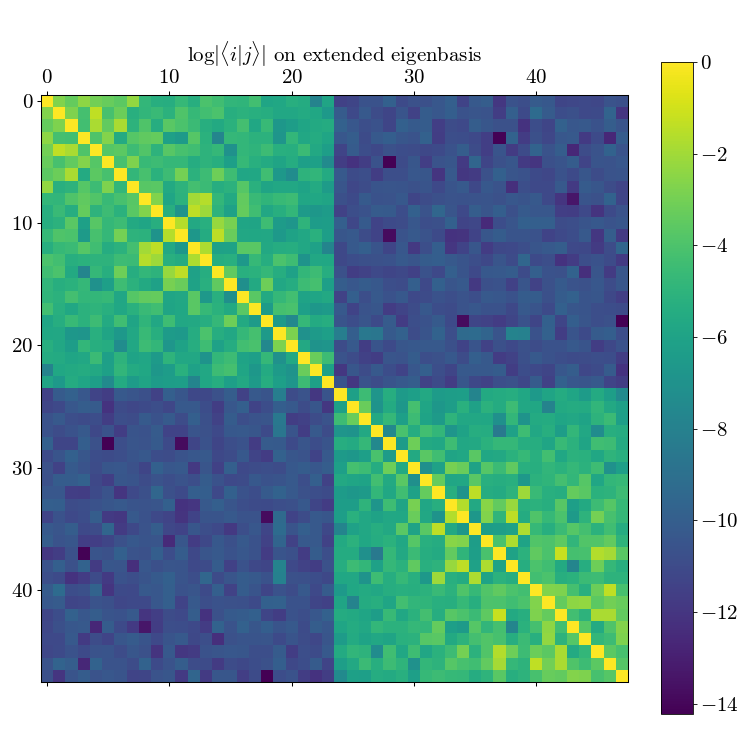

In [43]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.log(np.abs(ip_ext)), cmap = 'viridis')
ax.set_title(r'$\log| \langle i | j\rangle |$ on extended eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)
cbar.ax.tick_params(labelsize = default_style['fontsize'])

# Orange solid line groups the complex conjugate blocks
# ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
# ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 4), labels = [])
# ax.xaxis.grid(True, color = pt.pal[1])
# ax.yaxis.grid(True, color = pt.pal[1])

# Green dashed line groups the |i>, g5*|i> pairs
# ax.set_xticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
# ax.set_yticks(np.arange(-0.5, len(Dw_g5) - 0.5, 2), labels = [], minor = True)
# ax.xaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')
# ax.yaxis.grid(True, 'minor', color = pt.pal[2], linestyle = '--')

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

How fast does the non-orthogonality grow as the eigenmodes grow further apart?

In [44]:
Dw_pairs = read_Eigen_matrix(r"""(-0.850586313,0.0342641982)         (0.112552592,0.655784236)    (0.000915354284,-0.0194355945)    (-0.00116414824,-0.0021350398)    (-0.0233543661,-0.00166271887)  (0.000383656274,-0.000899279962)    (-0.00901206699,0.00317581449)   (0.000735664458,0.000725897391)      (-0.00786135768,0.011537399)   (0.000386996598,0.000564514326)    (-0.00228733173,-0.0105254033) (-1.73386227e-05,-0.000441199252)    (-0.00309791254,0.00677316788)   (-0.000737201929,0.00093715001)      (0.00535141802,0.0015509001)  (5.80349679e-05,-0.000335025439) (-0.000296254598,-0.000692516208)   (0.000221096262,-5.7292266e-05)    (-0.00157256759,0.00666312879)  (-0.000270830426,0.000634167335)     (0.00596378647,0.00795613422)  (0.000268704874,-1.40700532e-05)     (0.0015046546,-0.00570708708)  (-0.000634637643,0.000301003268)
(0.0430917226,-0.389150813)       (-0.850586313,0.0342641982)  (-3.00627578e-14,2.95874436e-14)      (-0.00424302375,0.018988864)   (9.55924576e-13,3.10012432e-14)     (0.0528429638,-0.00483946237)   (4.50039311e-14,3.06872583e-15)    (-0.0106187777,-0.00841363938)   (1.16191778e-14,3.99511153e-14)   (-0.000255043635,0.00384661451)  (-7.40640188e-15,3.32620216e-14)   (-0.00735204816,3.71098525e-05)  (-5.47851695e-14,1.91409388e-14)  (-0.000692519841,-0.00542515522) (-1.49272955e-14,-5.09314813e-15)     (-0.00392213241,0.0017209741)  (1.49689289e-14,-1.90776214e-15)    (-0.00426918409,0.00636035104) (-7.96780177e-15,-1.81001047e-14)  (-0.000934913327,-0.00146482842)  (-4.45317795e-12,3.78355203e-12)    (0.00368009169,-0.00239413405)  (-6.64680984e-15,8.82670673e-15)     (0.00281058858,0.00189124483)
(0.000915354284,0.0194355945)    (-0.00191329615,-0.0019886279)      (-0.850586313,-0.0342641982)         (0.591564797,0.304585195)     (-0.00245753685,0.0133322461)   (0.000436356274,0.000205744088)     (-0.0219961447,-0.0483286502) (-0.000410736114,-0.000364265819)    (0.00737439802,0.000124832012) (-0.000687048765,-3.06009786e-05)    (-0.00349723236,0.00165083416)   (0.000466305912,0.000422001166)  (-0.00430190132,-7.51094202e-05)  (-0.00112481612,-1.24037112e-05)   (0.00540619446,-0.000978494638)   (0.000431328779,0.000721226444)      (0.001598686,0.000709751195)   (0.000549482835,0.000819032319)     (0.00243802011,0.00731495975)   (0.000679075552,8.11713079e-05)  (-0.000738967776,-0.00333651424)  (-0.000102874311,0.000126309379)   (0.00442572488,-0.000165813139)  (0.000582642343,-0.000436213341)
(-3.44169138e-15,-1.48832335e-13)     (-0.00424302375,-0.018988864)        (0.358170099,-0.158143706)      (-0.850586313,-0.0342641982)  (-1.24028392e-14,5.67948466e-15)   (-0.00179772925,-0.00937826417)   (3.08843229e-13,8.48245085e-14)     (0.00851488494,-0.0217938161)   (-1.13997353e-14,-3.798524e-14)     (-0.010675767,-0.00114531212)  (5.33080524e-14,-4.46413739e-14)     (0.00528811471,-0.0128731555) (-2.02737133e-14,-1.29254246e-14)   (0.000816780857,-0.00548594446)  (-3.78065634e-14,9.53057078e-14)     (0.00138823316,0.00728319149)   (-1.9086295e-14,1.87376156e-14)    (-0.00556495823,0.00391055238)  (1.34397701e-14,-7.10369263e-15)   (4.26407631e-06,0.000748301215)  (1.14931285e-13,-3.10656015e-13)   (-0.00263887924,-0.00522188254) (-1.16866152e-14,-3.73876277e-15)   (-0.00985488762,0.000190662564)
(-0.0230459771,0.00404433262)   (0.000535610178,-0.00012048021)    (-0.00275005964,-0.0132659315)   (-0.00103347379,7.81937212e-06)        (-0.850176661,0.053106564)       (-0.532721682,-0.329357942)    (0.00675352296,0.000609253319)   (-0.00074053208,0.000229439535)       (0.0221048793,0.0372199923)  (0.000237050135,-0.000804776808)    (0.00227736483,-0.00472585071) (-0.000928515428,-0.000520816897)        (0.022324474,-0.029055572)   (-0.00012289913,0.000231086681)     (-0.0087528046,0.00450949545)  (-0.000394223987,0.000244827893)      (-0.00272894412,0.010098675)    (-0.0011217832,0.000992952325)  (-0.000362956807,-0.00256962339)  (-0.000649887658,0.000281862241)     (-0.0073943842,-0.0078150102)  (-0.000831819824,-0.00113723477)   (-0.00028019342,-0.00268088112)   (0.000603773946,0.000180835334)
(-5.96588751e-13,4.50847693e-13)    (0.0530954578,-0.000600977892)   (2.6454533e-15,-9.81484859e-15)      (-0.00159087212,0.009421904)        (-0.294349854,0.222116534)        (-0.850176661,0.053106564)   (1.58727198e-14,1.88495053e-14)   (0.00676759761,-0.000425305195)  (1.82531074e-13,-1.01066291e-13)     (0.0117643097,-0.00308636305)   (3.9013931e-15,-9.45944711e-15)   (-0.00349853651,-0.00415276412) (-7.70564168e-15,-1.54855295e-13)    (0.00803168903,-0.00421522874)  (-1.45491258e-14,2.53453942e-14)    (-0.0040120638,-0.00073823446)   (4.43759612e-14,2.38715298e-14)        (0.015142348,0.0131878704)  (1.31127748e-14,-4.34981912e-16)   (0.000910523809,-0.00530896245)   (8.79166531e-13,5.03806372e-12)    (0.00374576148,-0.00293473438)   (-4.46908135e-15,5.8893862e-15)   (-0.00100110049,-0.00205090875)
(-0.00893375775,-0.00337218651) (-0.000482108219,-1.75810475e-05)       (-0.0268148212,0.045790442)  (0.000326690933,-0.000921503999)   (0.00675352296,-0.000609253319)   (0.00149642435,-0.000508650696)       (-0.850176661,-0.053106564)        (-0.237510213,0.579532521)      (-0.005315348,0.00117504795)  (-0.000171256239,0.000168584511)      (-0.011636666,0.00364107205)  (0.000270168227,-0.000371900143)    (0.00359918532,-0.00195375044) (-0.000284034911,-0.000155086994)   (-0.00908038893,0.000680886976)    (0.00106261278,0.000492913213)  (-0.00541266402,-0.000246446367)  (0.000560397687,-0.000246546334)     (-0.00527492676,0.0194976883)   (4.71509045e-05,0.000794170431)   (-0.00165652174,-0.00159661823)  (-0.000876948521,0.000404828983)    (-0.00157847396,0.00452996557)   (0.000500251747,0.000733098017)
(-1.09329212e-13,9.36689962e-14)       (-0.010809374,0.0081820357)  (-1.59702113e-13,1.20384605e-13)       (0.0062410405,0.0225663569)  (3.44863027e-14,-2.61951918e-14)    (0.00676759761,0.000425305195)       (-0.107650885,-0.352688075)       (-0.850176661,-0.053106564) (-5.16140949e-14,-9.15933995e-16)     (-0.00292565306,0.0043385186)  (1.28019123e-13,-1.81707947e-14)      (-0.0261290379,0.0343778858)  (2.93827462e-14,-4.15201727e-14)    (0.00692670437,-0.00694395952)  (1.53811859e-13,-1.14203785e-13)      (-0.036148661,0.00505028073)  (-5.82281619e-15,2.12455921e-14)   (-0.00236655224,-0.00102729046)   (-7.35323261e-14,-1.124335e-13)   (-0.00919611309,-0.00485606493)  (2.16565806e-12,-2.42631436e-14)    (-0.00143009945,0.00225920666)  (2.07011058e-14,-5.60328693e-14)    (-0.00326054244,-0.0101619503)
(-0.00965708452,-0.0100211281) (-0.000454289233,-0.000434910887)    (0.0073115084,-0.000771902957)   (0.000429449648,0.000102617774)        (0.01460424,-0.0406359672)   (0.000118816631,0.000444053145)  (-0.00536788673,-0.000819145698)   (-0.00105730962,0.000124448784)         (-0.846932522,0.10945035)        (0.0964605605,0.458427333)   (0.000486946108,-0.00090609948)   (0.000456631125,0.000380318797)         (0.075144307,0.188667285)   (0.00110788864,-0.000630572595)    (0.00265727572,-0.00241388867)   (0.000283069031,0.000512479262)      (-0.0120104939,0.0313856066)  (0.000258509098,-0.000400826979)  (-0.00283687688,-0.000627256752)  (-0.00036099215,-0.000334390029)     (0.0029597522,0.000102212899)  (0.000763748905,-0.000555962042)   (0.00256862388,-0.000832757188)   (0.000198319522,1.62945252e-05)
(2.01817729e-14,3.82758061e-14)  (-0.000900420956,-0.00376100116)   (3.70571629e-14,1.18199721e-14)     (-0.0105666627,0.00208845389)   (2.98146924e-14,3.00502245e-13)      (0.0121667288,0.00080006933)  (2.22903293e-14,-1.36800293e-14)   (-0.00321403641,-0.00414608556)      (0.00493805313,-0.276289687)         (-0.846932522,0.10945035)   (5.43315393e-15,1.92211698e-14)  (0.000295547844,-0.000985283843)   (3.09674161e-12,3.63594571e-13)      (-0.0795870661,-0.122192629)  (-2.55850029e-14,1.04811992e-14)   (0.000797063119,-0.00176043053)   (1.34235505e-13,7.83938886e-14)       (0.0192809836,0.0106417309) (-3.14982415e-15,-1.24780828e-14)      (0.0016214558,0.00120686044)  (8.48725604e-13,-9.11238099e-12)      (0.021987179,-0.00389451008)  (-3.8598031e-14,-5.90640818e-15)   (-0.0030804559,-0.000114947818)
(-0.00319603944,0.0102503206) (-0.000539008458,-0.000427132657)   (-0.00316020977,-0.00220784162)   (0.000684382103,7.99556274e-06)     (0.00195515448,0.00485381916)     (0.000224923222,8.461076e-05)    (-0.0107074646,-0.00576843308) (-0.000525561889,-0.000653944323)    (0.000486946108,0.00090609948)  (0.000282733053,-2.55367598e-05)        (-0.846932522,-0.10945035)        (-0.339879725,0.322400422)   (9.58987399e-05,-0.00193273485)   (0.000233005237,0.000603004603)       (0.0196356887,-0.144699215)   (-0.000245493555,0.00100826729)      (-0.00148176213,0.001384802) (-0.000132225385,-0.000227503023)     (0.00769605821,-0.0207137031)   (1.1668815e-05,-0.000122714041)    (0.00309968933,-2.6945386e-05)  (0.000586001989,-0.000226010116)     (0.0202913233,-0.00961494939)  (0.000436415883,-0.000396277306)
(-9.32760813e-15,1.85181731e-14)   (-0.0073433728,-0.000687171888)   (7.2460267e-14,-4.87630769e-15)      (0.00306020935,0.0136215872)   (5.20677251e-15,9.53057078e-15)    (-0.00377479794,0.00392231597)   (8.28651384e-14,1.42039158e-13)     (-0.0191793915,-0.0388085617)   (3.00573368e-14,7.11193257e-15)   (0.000295547844,0.000985283843)       (-0.161068574,-0.224537947)        (-0.846932522,-0.10945035)   (-1.3528241e-14,3.87320384e-15)     (0.00141698397,0.00329315995)    (2.0383608e-12,4.82142104e-13)         (-0.10269294,-0.17488123)  (-6.5988881e-15,-1.05007149e-14)    (0.000465085838,0.00285801388)  (-2.42444953e-14,6.53210125e-14)       (-0.031559184,0.0112129767)  (1.57805193e-12,-1.10429461e-13)    (-0.00225516276,0.00145768048)  (1.39259264e-14,-2.70274254e-14)    (0.00265572066,-0.00127303958)
(-0.00412216171,-0.0061627796)   (0.000838500748,5.59338294e-05)   (-0.00426275204,0.000416916806)   (-0.00031613669,0.000125170666)       (0.0271260132,0.0244215158)   (-0.00104527471,0.000528687178)     (0.00369188584,0.00173540341)   (0.000395863312,0.000242168303)       (0.0263333511,-0.201086646)   (-3.6511327e-05,-0.00103708097)    (7.98968534e-05,0.00193081376)   (-0.00058368148,4.55960612e-05)        (-0.848964737,0.102624271)         (0.422980412,0.276489799)   (-0.000664625875,0.00398649576)   (7.50557934e-05,2.27019197e-05)      (-0.0204698818,0.0162064134)   (0.000816534498,0.000787106819)   (-0.00418027198,-0.00148839601)  (1.67603398e-05,-4.02750572e-05)    (-0.00688058964,0.00257127409)   (0.000446199961,0.000679958591)     (0.0047698688,-0.00139316524) (-0.000247210661,-0.000436395951)
(5.5493804e-14,-7.07264108e-14)    (0.000184543363,0.00549093198)  (-9.06046072e-15,1.10389128e-14)     (0.00125846797,0.00542763524)  (-8.75428202e-14,3.79696274e-14)     (0.00869749068,0.00269642839)  (3.07592493e-14,-5.21327773e-14)     (0.00734545982,0.00655677951) (-2.50710563e-12,-2.89782955e-12)       (-0.0471096799,0.138217586)  (4.32379826e-15,-5.46958312e-15)    (0.00144598704,-0.00328589322)        (0.216210531,-0.204047428)        (-0.848964737,0.102624271)  (-4.9192421e-15,-7.27543026e-15)    (0.00254743478,-0.00313758698)  (-2.12208723e-13,-1.1985031e-13)   (0.00111012417,-0.000283503786)   (5.63611657e-15,4.43677213e-15)    (-0.00387405808,0.00229443317)  (1.11810769e-11,-1.76050086e-11)   (0.00767361065,-0.000651282797)  (-1.46245863e-14,5.54114046e-15)  (-0.00405528614,-0.000662709721)
(0.00543358949,-0.00111302419)  (-0.00109258053,-0.000267643324)     (0.00515679199,0.00182191912)  (-0.000176277676,-0.00117925528)   (-0.00844429011,-0.00498916544)    (6.109205e-05,-0.000317797998)   (-0.00877149913,-0.00231019157)   (0.000254954587,5.91896015e-05)      (0.0026733697,0.00238869011) (-0.000175409207,-0.000622203827)          (-0.0165796,0.144880146)  (-0.00100825488,-0.000780039199)  (-0.000664625875,-0.00398649576)   (-0.00117407591,0.000725403296)       (-0.848964737,-0.102624271)        (0.337788105,-0.375843363)   (-0.00331986175,-0.00305495518) (-0.000808829023,-0.000206467781)  (-0.000877643859,-0.00074011334)    (0.000378656809,0.00102863472)    (0.00386822449,-0.00143656613)   (-0.000394209773,-0.0010260425)    (0.00525646185,-0.00567257498)   (0.000226897056,0.000317066872)
(4.86416463e-15,-1.80836249e-14)   (-0.00378912509,-0.00203826578)    (1.62439506e-14,-1.534467e-13)    (0.00254626327,-0.00699924343)   (1.88070046e-14,1.87671059e-14)   (-0.00406380303,0.000506735289)  (2.72162501e-13,-4.09221268e-14)     (-0.0347642837,-0.0115781253)  (-1.64304334e-14,2.03830008e-16)    (0.000812620209,0.00175622008)   (2.29618408e-13,-1.6361669e-12)        (-0.142791582,0.144404209)  (-6.38725184e-15,7.03278581e-15)     (0.00254743478,0.00313758698)         (0.156557145,0.252729513)       (-0.848964737,-0.102624271)  (-1.10311066e-14,1.53117536e-14)    (0.00154204153,-0.00415129858)  (-9.20496318e-14,-7.7651427e-14)       (0.0216978167,0.0144270494)  (2.25239662e-12,-3.49055897e-12)   (0.00489132732,-0.000749021273)   (-3.98244805e-14,-4.576374e-14)    (0.00659710304,-0.00315929012)
(-0.00014184559,0.000734746704)  (0.000248299225,-0.000637243973)    (0.00148072803,-0.00090952171) (-0.000646868034,-0.000238912276)   (-0.00498191146,-0.00912854977)  (0.000664352805,-0.000437681655)    (-0.00532074717,0.00083891922) (-0.000144489119,-0.000693486255)     (-0.0207262575,-0.0263084624)  (0.000108232557,-5.89967012e-05)   (-0.00153702916,-0.00131269661) (-0.000176506215,-0.000459322958)     (-0.0242350779,-0.0095705802)  (-0.000953992562,0.000539785652)     (-0.00314714702,0.0032199713)   (3.99236057e-05,-1.7581096e-05)        (-0.844031916,0.147723545)       (0.0701085336,-0.280406291) (-7.43428967e-05,-0.000656953042)  (-0.000339575874,-0.00104501148)      (0.0196672763,-0.0307761005) (-0.000746909767,-0.000648443667)    (-0.00237450606,0.00227039669) (-0.000159884858,-0.000123282788)
(7.24038884e-14,3.33778144e-14)   (-0.00555626181,-0.00534607639)  (7.85916471e-15,-5.06426498e-14)   (-0.00607399328,-0.00315861674)  (1.00093545e-15,-2.25661503e-14)      (0.0117135424,-0.0164553221)   (5.20351991e-15,1.12037116e-14)    (-0.00225155635,0.00129042475)  (1.69329828e-13,-1.92734717e-13)       (0.0152981623,-0.015945314)    (9.42518633e-15,9.0335725e-15)   (0.000337913327,-0.00288567774)  (-1.22573826e-13,7.05546732e-14)   (0.00114696591,-4.99570521e-05)   (9.08301212e-15,8.20567572e-15)     (0.00176319619,0.00407199407)          (0.0822777307,0.1489569)        (-0.844031916,0.147723545)    (8.0875519e-15,6.11490025e-16) (-0.000352197423,-0.000559527605)  (-4.56353705e-13,1.27741394e-12)      (0.020120891,-0.00928641737) (-1.52048513e-15,-1.30347122e-14)    (0.00311044335,0.000374680519)
(-0.000670658835,-0.00676841169)   (-0.000181541283,0.00096942668)    (0.00390711841,-0.00658896228) (-0.000226899228,-2.61285519e-05)   (-0.000641284159,0.00249892974)   (0.000264700737,-0.00055205451)   (-0.000573521206,-0.0200719132)     (-0.00105826565,0.0010603894)   (-0.00285245482,0.000498045822) (-0.000183951217,-0.000188157189)      (0.00118759818,0.0219907339)   (0.000422628152,0.000221076155)    (-0.00424468823,0.00126245546)  (-0.000357882192,-0.00075415759)    (-0.00105214818,0.00045357942)    (0.000127926305,0.00112689866)  (-7.43428967e-05,0.000656953042)   (-0.00030186513,0.000801258658)       (-0.844031916,-0.147723545)         (0.057109639,0.283339697)     (0.0016917175,-0.00264508278) (-0.000273093287,-0.000173442551)      (0.00450977503,0.0217464376)  (0.000191622755,-0.000973229067)
(1.379322e-14,1.2784912e-14)    (-0.00112826651,0.00133662199)   (1.65501293e-14,1.48275489e-14)  (0.000163806563,-0.000735195821)  (-1.41365869e-14,1.10723063e-14)    (0.000319343021,0.00540885271)   (3.22172844e-14,1.31479029e-14)     (-0.0101352033,0.00258998586)  (8.84253608e-15,-6.23199409e-15)    (0.00167947556,-0.00113695093)   (-9.0405114e-14,-6.0684964e-14)     (-0.0268907385,-0.0201543158)  (1.46323925e-14,-1.93942085e-15)    (-0.0037546723,-0.00250133347)  (-1.05689762e-13,1.10080348e-13)     (0.0249943286,-0.00754635228)  (9.94072446e-15,-1.20168632e-14)  (-0.000352197423,0.000559527605)       (0.0753246202,-0.152590906)       (-0.844031916,-0.147723545) (-8.04031321e-14,-3.36899128e-13)   (9.86696101e-05,-0.00327658789)   (2.31108535e-13,1.45645648e-13)     (-0.0152014124,-0.0331217667)
(0.00384154375,-0.00907731809) (-0.000174162605,-0.000706697656)    (-0.000188242501,0.0033824222)     (0.0001219606,0.000691732259)    (-0.00504840014,0.00940266067)  (0.000135217985,-0.000877154846)    (-0.00140567881,0.00179791434)  (0.000478119091,-0.000410665963)    (0.00275036645,-0.00105307471) (-0.000508922154,-0.000297477316)   (0.00307600692,-0.000201501779)   (0.000175169284,9.44026879e-05)  (-0.00731016165,-0.000253809566)      (1.968374e-05,0.00038939215)     (0.00395661472,0.00110893184)  (0.000319618296,-0.000386521253)       (0.0295273054,0.0213605384)   (0.000990786401,4.72905974e-05)     (0.00176476324,0.00258860079) (-0.000178934137,-9.35114341e-05)        (-0.841173639,0.172815278)       (-0.381991651,-0.135568665)  (-0.00126181842,-0.000621934683)  (-0.000286134761,3.39774654e-05)
(1.08073273e-15,3.82042488e-14)     (0.00418425488,0.00145139443)   (-8.1133017e-15,6.41370637e-15)    (-0.00177547906,0.00562872121)   (1.19214534e-14,8.07765313e-14)     (0.00441921175,0.00186620888)   (-1.4434634e-14,7.71084585e-16)   (-0.00174590227,-0.00205364485)  (1.40055502e-13,-4.25939665e-14)      (0.022181966,-0.00348502991) (-2.22565022e-15,-3.11068445e-14)   (-0.00237005424,-0.00129389184)  (-9.18388629e-14,8.77440481e-14)     (0.00751513337,-0.0018251763)  (7.16440796e-16,-6.28186739e-15)     (0.0049571215,0.000345693794) (-3.56867313e-14,-3.14854046e-13)      (0.0221736827,0.00125435671) (-4.38451359e-16,-1.33313499e-15)    (0.000195240466,0.00327946053)         (-0.190910132,0.14363924)        (-0.841173639,0.172815278)   (-9.30418936e-15,9.2818548e-15)   (0.000657582021,-0.00124361343)
(0.000557412481,0.00582417653)    (9.59033647e-05,-0.0001316804)     (0.00421893828,0.00121470674)  (-1.65067905e-05,0.000268566195)   (-0.000646936034,0.00259435405)   (0.000789966299,0.000555768352)  (-0.000334173938,-0.00474675918)   (0.00104855951,-0.000941142965)     (0.00248604063,0.00101498445)   (0.000443719449,0.000444513165)       (0.0159736732,0.0156027245)  (0.000243926559,-0.000912636848)     (0.00461971256,0.00177323764)   (-0.000347471576,0.00104279819)     (0.00317128373,0.00701793625)  (0.000798946362,-0.000152061837)    (-0.00230178271,-0.0023340009)  (9.64482678e-05,-0.000308804134)      (0.0121514134,-0.0185318902)   (0.000492217494,0.000857948325)   (-0.00126181842,0.000621934683) (-0.000133459381,-7.43481749e-05)       (-0.841173639,-0.172815278)        (0.404847719,0.0198697928)
(2.22568275e-14,1.38604406e-15)    (0.00310635439,-0.00142441675)   (6.73289549e-16,9.35536371e-15)   (-0.00960326008,-0.00257763784)  (-1.56103429e-14,4.98524833e-14)     (-0.00128831748,0.0019061721)  (6.06567747e-14,-5.69735231e-14)    (-0.00585543275,0.00902580797)   (1.64104841e-15,2.72139082e-14)   (-0.00309770672,-0.00011407483)    (8.74821049e-15,7.3256505e-14)     (0.00210924662,0.00207886009)  (4.97995742e-15,-5.74930728e-15)   (-0.00411327931,0.000328353848) (-2.96785166e-14,-2.86843032e-14)       (0.00527563725,0.005110931) (-1.39239748e-14,-1.68372261e-14)   (0.00312694906,-0.000283831974)  (1.54555188e-13,-3.03463851e-13)      (-0.0263568616,0.0252841051)  (2.24319695e-13,-2.56573056e-13)    (0.000657582021,0.00124361343)        (0.231188903,0.0602544665)       (-0.841173639,-0.172815278)""")
Hw_pairs = read_Eigen_matrix(r"""(4.95367636e-14,0)       (0.014640397,-0.0128155758)          (0.31030807,0.238755426)       (-0.377109265,-0.763190483)   (1.65215064e-14,3.82766735e-15)    (0.00737320787,-0.00606790533)   (1.16663623e-13,3.26065563e-13)      (0.023210513,-0.00295732532)    (2.6799743e-14,6.30225039e-15)    (-0.00410514897,-0.0099212647)   (5.14865928e-14,2.46382775e-14)     (0.0138337412,-0.00151983334)   (1.06607431e-14,-8.0135551e-15)    (0.00520749239,-0.00190912037)  (1.69742692e-15,-5.60315683e-16)    (-0.00572983484,0.00470542902)  (-1.1500783e-14,-1.54563862e-14)   (-0.00609739301,-0.00301379802)  (-2.40909723e-15,6.06806272e-15)      (-0.000654943211,0.00036197)  (3.27991974e-13,-5.65363728e-14)     (0.0033213631,-0.00481666774)  (-1.05579608e-15,4.11996826e-17)    (-0.0048851211,-0.00856100193)
(0.014640397,0.0128155758)  (-0.00275959111,-2.16840434e-19)        (-0.614425178,0.589196752)        (0.629638666,-0.215119037)      (0.00790366397,0.0110145526)  (0.000450801283,-0.000171801137)      (-0.050077289,-0.0176565554)  (-0.000547272745,4.34314012e-05)    (0.00520281853,-0.00522761978)  (-0.000498400546,0.000473887456)    (-0.00123509107,0.00366475615)   (0.00062740621,-4.34469229e-05)    (-0.00303674551,0.00304797852)  (-0.000788802627,0.000801969807)    (0.00304312812,-0.00457424984)   (0.000818784607,0.000189219095)   (0.00161987433,-0.000659962756)   (0.000971185154,0.000171885784)     (0.00696167903,0.00331475538)   (0.00052931471,-0.000433080045)   (-0.00291671817,-0.00178077393)   (1.96961541e-05,0.000161707281)    (0.00294898099,-0.00330424663)  (8.96152071e-05,-0.000722304156)
(0.31030807,-0.238755426)       (-0.614425178,-0.589196752)               (-7.34134975e-15,0)      (-0.0166256318,0.0101078471)  (2.99872974e-13,-2.69732153e-14)       (0.0401248318,0.0347245892)  (1.62300728e-14,-1.68615122e-15)    (-0.00129920276,-0.0134855419)  (-1.03736464e-14,2.49453236e-15)    (-0.00294879155,0.00248316709)  (-9.90700577e-15,3.63303138e-14)   (-0.00512410808,-0.00527233398)   (-3.19353918e-14,-2.041943e-14)     (0.0034293557,-0.00426044744) (-5.70724024e-16,-1.34293618e-14)   (-0.00395949165,-0.00163318718) (-1.77765788e-15,-1.42785089e-14)    (-0.00754335849,0.00133331947)  (1.76855058e-14,-8.42034775e-15)   (0.000407391006,-0.00168932466)   (-5.85913978e-12,-6.074234e-13)    (0.00427677383,0.000992047543)  (-1.52135249e-14,5.78313439e-15)    (0.000585777388,0.00333662704)
(-0.377109265,0.763190483)         (0.629638666,0.215119037)     (-0.0166256318,-0.0101078471)   (-0.00243179688,4.33680869e-19)        (-0.0126400011,0.01970841) (-0.000605875327,-0.000767340651)    (-0.00152598749,0.00943263014)  (0.000989491484,-0.000298388705)      (0.00636608279,0.0124251966)  (0.000680888267,-6.95266859e-05)     (-0.010335957,-0.00303051027)  (-0.00039565915,-0.000195987867)      (0.00446359383,0.0059623146)    (0.000469874868,0.00109587154)    (0.00392346803,-0.00395592778) (-0.000266359146,-0.000211336007)  (-0.000749829868,-7.1418864e-05)  (5.55422857e-05,-0.000221542356)     (0.00509719518,0.00457043273)   (0.000427126848,0.000541368622)     (0.00984021113,-0.0014272581)  (0.000116281168,-0.000242649882)   (-0.00429033244,-0.00405313162)  (-3.95420936e-05,0.000701287621)
(1.65197717e-14,-3.82766735e-15)     (0.00790366397,-0.0110145526)   (2.99872974e-13,2.69732153e-14)       (-0.0126400011,-0.01970841)               (-8.38218384e-15,0)    (-0.00659029956,0.00159662571)         (0.207206909,0.305029323)        (0.827808303,-0.200883238)   (8.68359204e-15,4.16854051e-15)    (0.00151060305,-0.00501001676)  (-2.23970148e-14,1.05183874e-13)      (0.0147843611,-0.0405707816)    (1.0658141e-14,5.02310867e-16)    (-0.00456133619,0.00868285779)  (-3.00740335e-14,5.85191617e-14)      (0.0330346752,-0.0155222827)  (2.73761049e-15,-1.89985831e-14)    (0.00256456579,0.000280887056)   (6.87887247e-14,8.15571569e-14)      (0.0102213136,0.00191692753)  (-2.05362658e-12,6.72593925e-13)   (0.000697420492,-0.00258124075)   (1.87475903e-14,2.09849499e-14)     (0.00612192138,0.00874176471)
(0.00737320787,0.00606790533)   (0.000450801283,0.000171801137)      (0.0401248318,-0.0347245892)  (-0.000605875327,0.000767340651)   (-0.00659029956,-0.00159662571)  (-0.00158050984,-4.33680869e-19)         (0.787854863,0.323890995)          (0.41138351,-0.47226333)    (0.00541072564,0.000598088712)  (0.000216400193,-0.000104500685)     (0.0121893731,0.000297631421)  (-0.000375482369,0.000265167076)   (-0.00403647285,0.000691493075)    (0.00021901265,0.000238246229)      (0.00881642642,0.0022776513) (-0.000847447419,-0.000808666944)     (0.00504538909,0.00197527632)   (-0.00060992895,5.30786085e-05)      (0.0112691747,-0.0167627684)  (0.000210943059,-0.000767093806)     (0.00105455749,0.00204478912)   (0.00096057843,-0.000101065787)    (0.00295236188,-0.00378096911) (-0.000237706889,-0.000855090608)
(1.16667093e-13,-3.26063829e-13)       (-0.050077289,0.0176565554)    (1.62318076e-14,1.6844165e-15)   (-0.00152598749,-0.00943263014)        (0.207206909,-0.305029323)        (0.787854863,-0.323890995) (-1.07240605e-14,-2.16840434e-19)    (-0.00627067659,0.00258067377)   (4.36924802e-14,2.28029401e-15)     (-0.0101451559,0.00670823606)   (2.06432094e-16,1.88044025e-15)     (0.00464888062,0.00280590744)   (9.76406456e-14,1.72084569e-15)    (-0.00624781683,0.00657578641)  (1.29158836e-14,-5.04349167e-15)   (0.00403619975,-0.000592231062)  (-5.56403881e-14,6.94930224e-15)    (-0.0185809648,-0.00761303992) (-1.31665512e-15,-1.82349795e-14)     (0.000846484728,0.0053195488) (-2.53399038e-12,-4.47408083e-12)    (-0.00260200467,0.00398408918)   (7.55905755e-15,1.02461442e-14)     (0.00160787819,0.00161961619)
(0.023210513,0.00295732532) (-0.000547272745,-4.34314012e-05)     (-0.00129920276,0.0134855419)   (0.000989491484,0.000298388705)         (0.827808303,0.200883238)           (0.41138351,0.47226333)   (-0.00627067659,-0.00258067377)  (0.000775261415,-4.33680869e-19)      (-0.0100993476,-0.042094616)  (-0.000464605666,0.000698570006)    (-0.00357396699,0.00384015827)   (0.000732784404,0.000772281138)       (-0.029923437,0.0211470169)  (0.000185784003,-0.000184362563)    (0.00969529631,-0.00171708098)  (0.000449021066,-0.000117189298)    (0.00559541064,-0.00883865109)   (0.00136539617,-0.000616478035)   (-0.000413785634,0.00256192964)  (0.000704192148,-7.69006535e-05)     (0.00475027691,0.00965329847)     (0.000457990869,0.0013324682)   (-0.000525768331,0.00264370944)  (-0.000523208292,-0.00035142208)
(2.6799743e-14,-6.30355143e-15)     (0.00520281853,0.00522761978) (-1.03736464e-14,-2.49539972e-15)     (0.00636608279,-0.0124251966)  (8.68402572e-15,-4.17027524e-15)   (0.00541072564,-0.000598088712)  (4.36890107e-14,-2.28202873e-15)       (-0.0100993476,0.042094616)  (-4.75691535e-14,1.08420217e-19)  (0.000403463842,-0.000946229205)       (-0.0199355837,0.275613766)         (0.580730858,0.626119594)   (3.89011739e-16,4.23684525e-15)       (0.001018752,-0.0034372795) (-2.55031413e-12,-1.73010998e-12)       (-0.0330117533,0.200098747)  (-1.24822028e-14,1.76226221e-14)    (0.00147169936,-0.00249372195)  (1.54973256e-13,-1.43506734e-13)       (0.0314259118,0.0115812354)    (-1.28889e-12,-8.93712296e-13)    (0.00266573496,0.000323185054)  (-3.29259189e-14,3.61958727e-14)  (-0.00285535448,-0.000721410277)
(-0.00410514897,0.0099212647) (-0.000498400546,-0.000473887456)   (-0.00294879155,-0.00248316709)   (0.000680888267,6.95266859e-05)     (0.00151060305,0.00501001676)   (0.000216400193,0.000104500685)    (-0.0101451559,-0.00670823606) (-0.000464605666,-0.000698570006)   (0.000403463842,0.000946229205)   (0.000283883965,2.16840434e-19)       (-0.833653322,-0.185192369)        (-0.367503302,0.290519504)   (0.000269368963,-0.00191627266)   (0.000177817364,0.000621519893)        (0.032572489,-0.142346254)  (-0.000335196886,0.000982096255)    (-0.00160032458,0.00124589599) (-0.000111224305,-0.000238475013)      (0.00952815668,-0.019937428)  (2.26602395e-05,-0.000121166871)    (0.00308954656,0.000251996166)  (0.000603956964,-0.000172380072)      (0.021073971,-0.00775066443)  (0.000470293676,-0.000355412978)
(5.14865928e-14,-2.46382775e-14)   (-0.00123509107,-0.00366475615) (-9.90613841e-15,-3.63329158e-14)      (-0.010335957,0.00303051027) (-2.23961474e-14,-1.05183223e-13)    (0.0121893731,-0.000297631421)  (2.05564732e-16,-1.87957289e-15)   (-0.00357396699,-0.00384015827)      (-0.0199355837,-0.275613766)        (-0.833653322,0.185192369)  (-1.75259113e-14,1.08420217e-19)   (0.000205718514,-0.00100787533)    (1.53438026e-12,7.3435702e-13)      (-0.0902562356,-0.114537992)   (-7.7936789e-15,5.24406907e-15)   (0.000635472306,-0.00182499321)  (-3.40231315e-14,1.51816927e-13)      (0.0201600915,0.00886416819) (-1.18590034e-14,-1.38079652e-14)       (0.0017234452,0.0010561097) (-9.56513514e-14,-9.25564226e-12)      (0.021547709,-0.00585657607) (-3.33782481e-14,-1.20650018e-15)   (-0.00307830735,0.000162620369)
(0.0138337412,0.00151983334)    (0.00062740621,4.34469229e-05)    (-0.00512410808,0.00527233398)   (-0.00039565915,0.000195987867)       (0.0147843611,0.0405707816) (-0.000375482369,-0.000265167076)    (0.00464888062,-0.00280590744)  (0.000732784404,-0.000772281138)        (0.580730858,-0.626119594)       (-0.367503302,-0.290519504)    (0.000205718514,0.00100787533) (-0.000594267929,-1.08420217e-19)       (-0.178483373,-0.096879807)    (-0.00044774051,0.00119355246)   (-0.000496993952,0.00355541415)  (-0.000545483966,-0.00021262717)     (-0.0108573431,-0.0318029301)   (5.78842186e-05,0.000473432823)    (0.00258126636,-0.00133356119)    (0.00049138621,2.59155743e-05)    (-0.00233966599,0.00181563862)  (-0.000231055219,0.000915980168)    (-0.00144076494,0.00228374901)   (-0.000162815417,0.00011439967)
(1.06598758e-14,8.0135551e-15)   (-0.00303674551,-0.00304797852)  (-3.19327897e-14,2.04159606e-14)     (0.00446359383,-0.0059623146)  (1.06572737e-14,-5.00901404e-16)  (-0.00403647285,-0.000691493075)  (9.76389108e-14,-1.71390679e-15)      (-0.029923437,-0.0211470169)  (3.89879101e-16,-4.23532737e-15)    (0.000269368963,0.00191627266)  (1.53438286e-12,-7.34360489e-13)        (-0.178483373,0.096879807)  (2.06562198e-15,-2.16840434e-19)      (0.0015299634,0.00374073362)        (0.0766837378,0.287231528)       (-0.782895713,-0.344016232)  (-8.68142364e-15,8.15732031e-15)    (0.00267785985,-0.00352707224)  (2.25808955e-14,-6.52880527e-14)       (0.0165917538,0.0200910108)   (3.15355251e-12,-2.7099823e-12)    (0.00489870259,0.000699162925)  (2.34838191e-15,-1.41379963e-16)    (0.00722923247,-0.00111403789)
(0.00520749239,0.00190912037) (-0.000788802627,-0.000801969807)      (0.0034293557,0.00426044744)   (0.000469874868,-0.00109587154)   (-0.00456133619,-0.00868285779)   (0.00021901265,-0.000238246229)   (-0.00624781683,-0.00657578641)   (0.000185784003,0.000184362563)        (0.001018752,0.0034372795)  (0.000177817364,-0.000621519893)       (-0.0902562356,0.114537992)   (-0.00044774051,-0.00119355246)     (0.0015299634,-0.00374073362)   (-0.00138009571,1.08420217e-19)       (-0.668290649,-0.533535823)         (0.48491339,-0.142190162)   (-0.00121853515,-0.00434389287)  (-0.00057956434,-0.000600781582)   (-0.000357612773,-0.0010909352)   (-0.000218537869,0.00107410966)    (0.00404586358,0.000811092379)   (0.000203944125,-0.00108007932)     (0.0074533887,-0.00206288509)   (2.63699194e-05,0.000388996533)
(1.6956922e-15,5.62050406e-16)     (0.00304312812,0.00457424984)  (-5.70724024e-16,1.34297955e-14)     (0.00392346803,0.00395592778) (-3.00753346e-14,-5.85226312e-14)     (0.00881642642,-0.0022776513)   (1.29150163e-14,5.04457587e-15)     (0.00969529631,0.00171708098)  (-2.55031413e-12,1.73010911e-12)         (0.032572489,0.142346254)  (-7.7936789e-15,-5.24406907e-15)  (-0.000496993952,-0.00355541415)       (0.0766837378,-0.287231528)        (-0.668290649,0.533535823) (-1.07882453e-14,-2.16840434e-19)   (0.000517982817,-0.00400818784)  (-7.69063632e-14,4.39440151e-14)  (0.000795390823,-0.000824683887)   (1.0076575e-14,-3.01711781e-15)    (-0.00208974555,0.00398819672)  (2.39706692e-13,-2.07709093e-11)    (0.00618577293,-0.00458744842)  (-9.59475555e-15,1.93506235e-14)    (-0.00379824785,0.00156775099)
(-0.00572983484,-0.00470542902)  (0.000818784607,-0.000189219095)    (-0.00395949165,0.00163318718)  (-0.000266359146,0.000211336007)       (0.0330346752,0.0155222827)  (-0.000847447419,0.000808666944)    (0.00403619975,0.000592231062)   (0.000449021066,0.000117189298)      (-0.0330117533,-0.200098747) (-0.000335196886,-0.000982096255)    (0.000635472306,0.00182499321)   (-0.000545483966,0.00021262717)        (-0.782895713,0.344016232)          (0.48491339,0.142190162)    (0.000517982817,0.00400818784)    (7.8413961e-05,1.08420217e-19)      (-0.0149012562,0.0214386674)    (0.00100944372,0.000517000106)  (-0.00443215815,-0.000214407538)  (4.38237634e-06,-4.34025806e-05)    (-0.00584150131,0.00445318162)   (0.000623948297,0.000521657563)    (0.00416225322,-0.00271444393)  (-0.000362966209,-0.00034613591)
(-1.15003493e-14,1.54572535e-14)    (0.00161987433,0.000659962756)  (-1.77679052e-15,1.42767742e-14)   (-0.000749829868,7.1418864e-05)   (2.73706838e-15,1.89984747e-14)    (0.00504538909,-0.00197527632) (-5.56369187e-14,-6.94930224e-15)     (0.00559541064,0.00883865109) (-1.24830701e-14,-1.76224053e-14)   (-0.00160032458,-0.00124589599) (-3.40239989e-14,-1.51815192e-13)      (-0.0108573431,0.0318029301) (-8.68142364e-15,-8.15688662e-15)    (-0.00121853515,0.00434389287) (-7.69046285e-14,-4.39457498e-14)     (-0.0149012562,-0.0214386674) (-1.81976829e-14,-4.33680869e-19)   (0.000640981721,0.000162038882)      (-0.168399821,-0.0244802603)         (0.120349575,0.848367904)  (-2.79448556e-13,1.83977833e-13)   (-0.00314668614,0.000918765567)  (3.82244583e-13,-8.93755556e-14)      (-0.0268025133,0.0246933118)
(-0.00609739301,0.00301379802)  (0.000971185154,-0.000171885784)   (-0.00754335849,-0.00133331947)   (5.55422857e-05,0.000221542356)   (0.00256456579,-0.000280887056)  (-0.00060992895,-5.30786085e-05)     (-0.0185809648,0.00761303992)    (0.00136539617,0.000616478035)     (0.00147169936,0.00249372195)  (-0.000111224305,0.000238475013)     (0.0201600915,-0.00886416819)  (5.78842186e-05,-0.000473432823)     (0.00267785985,0.00352707224)   (-0.00057956434,0.000600781582)   (0.000795390823,0.000824683887)   (0.00100944372,-0.000517000106)  (0.000640981721,-0.000162038882)  (0.000856234778,-5.42101086e-20)         (0.159324333,0.841919164)         (0.24501338,-0.153334075)  (-0.00307166454,-0.000650575107)   (-6.6027457e-05,0.000316705915)       (0.0187602489,-0.011886912)   (-0.00097829762,0.000163792141)
(-2.41018143e-15,-6.06806272e-15)    (0.00696167903,-0.00331475538)   (1.76863732e-14,8.42034775e-15)    (0.00509719518,-0.00457043273)  (6.87895921e-14,-8.15567232e-14)       (0.0112691747,0.0167627684)  (-1.31838984e-15,1.82384489e-14)  (-0.000413785634,-0.00256192964)   (1.54976726e-13,1.43503265e-13)       (0.00952815668,0.019937428)  (-1.18577023e-14,1.38090494e-14)     (0.00258126636,0.00133356119)    (2.25808955e-14,6.5286318e-14)    (-0.000357612773,0.0010909352)   (1.00757076e-14,3.01538308e-15)   (-0.00443215815,0.000214407538)       (-0.168399821,0.0244802603)        (0.159324333,-0.841919164)  (-4.70803951e-15,1.62630326e-19)  (0.000647769132,-0.000132322774) (-8.89142926e-13,-1.48674476e-12)      (0.00159655619,0.0221029141)   (3.17757973e-15,3.96991467e-15)    (-0.00144720868,0.00277863823)
(-0.000654943211,-0.00036197)    (0.00052931471,0.000433080045)    (0.000407391006,0.00168932466)  (0.000427126848,-0.000541368622)     (0.0102213136,-0.00191692753)   (0.000210943059,0.000767093806)    (0.000846484728,-0.0053195488)   (0.000704192148,7.69006535e-05)      (0.0314259118,-0.0115812354)   (2.26602395e-05,0.000121166871)      (0.0017234452,-0.0010561097)   (0.00049138621,-2.59155743e-05)      (0.0165917538,-0.0200910108)  (-0.000218537869,-0.00107410966)   (-0.00208974555,-0.00398819672)   (4.38237634e-06,4.34025806e-05)        (0.120349575,-0.848367904)          (0.24501338,0.153334075)   (0.000647769132,0.000132322774)   (0.00109879969,-1.08420217e-19)       (0.0231915298,0.0282156529)  (0.000847528098,-0.000509950502)   (-0.00142543326,-0.00295991895)  (0.000166659101,-0.000113958579)
(3.27991757e-13,5.65359391e-14)    (-0.00291671817,0.00178077393)  (-5.85914108e-12,6.07423833e-13)      (0.00984021113,0.0014272581)  (-2.05362593e-12,-6.7259566e-13)    (0.00105455749,-0.00204478912)  (-2.53398908e-12,4.47408083e-12)    (0.00475027691,-0.00965329847)  (-1.28889087e-12,8.93712188e-13)   (0.00308954656,-0.000251996166)  (-9.56489662e-14,9.25564486e-12)   (-0.00233966599,-0.00181563862)   (3.15355294e-12,2.70998371e-12)   (0.00404586358,-0.000811092379)   (2.39705825e-13,2.07709102e-11)   (-0.00584150131,-0.00445318162) (-2.79448339e-13,-1.83977833e-13)   (-0.00307166454,0.000650575107)  (-8.89141191e-13,1.48674476e-12)      (0.0231915298,-0.0282156529)  (-3.50670448e-13,5.42101086e-20)  (-0.000799638607,-0.00115739646)      (-0.236681059,-0.0325727773)        (0.855683079,0.0724201591)
(0.0033213631,0.00481666774)  (1.96961541e-05,-0.000161707281)   (0.00427677383,-0.000992047543)   (0.000116281168,0.000242649882)    (0.000697420492,0.00258124075)    (0.00096057843,0.000101065787)   (-0.00260200467,-0.00398408918)    (0.000457990869,-0.0013324682)   (0.00266573496,-0.000323185054)   (0.000603956964,0.000172380072)       (0.021547709,0.00585657607) (-0.000231055219,-0.000915980168)   (0.00489870259,-0.000699162925)    (0.000203944125,0.00108007932)     (0.00618577293,0.00458744842)  (0.000623948297,-0.000521657563)  (-0.00314668614,-0.000918765567)  (-6.6027457e-05,-0.000316705915)     (0.00159655619,-0.0221029141)   (0.000847528098,0.000509950502)   (-0.000799638607,0.00115739646)  (-0.000152771259,2.16840434e-19)        (-0.818943397,0.258398768)         (0.363340653,-0.17966651)
(-1.0564466e-15,-4.11996826e-17)     (0.00294898099,0.00330424663) (-1.52137417e-14,-5.78356807e-15)    (-0.00429033244,0.00405313162)   (1.8748024e-14,-2.09823478e-14)     (0.00295236188,0.00378096911)  (7.55905755e-15,-1.02465779e-14)  (-0.000525768331,-0.00264370944) (-3.29250516e-14,-3.61950053e-14)       (0.021073971,0.00775066443)  (-3.33773807e-14,1.20563282e-15)   (-0.00144076494,-0.00228374901)   (2.34838191e-15,1.40512602e-16)      (0.0074533887,0.00206288509) (-9.59388818e-15,-1.93510572e-14)     (0.00416225322,0.00271444393)   (3.82241114e-13,8.93764229e-14)        (0.0187602489,0.011886912)  (3.17714605e-15,-3.96904731e-15)    (-0.00142543326,0.00295991895)       (-0.236681059,0.0325727773)       (-0.818943397,-0.258398768)  (5.81305837e-15,-2.16840434e-19)    (0.0011796779,-0.000766386662)
(-0.0048851211,0.00856100193)   (8.96152071e-05,0.000722304156)   (0.000585777388,-0.00333662704) (-3.95420936e-05,-0.000701287621)    (0.00612192138,-0.00874176471)  (-0.000237706889,0.000855090608)    (0.00160787819,-0.00161961619)   (-0.000523208292,0.00035142208)   (-0.00285535448,0.000721410277)   (0.000470293676,0.000355412978)  (-0.00307830735,-0.000162620369)  (-0.000162815417,-0.00011439967)     (0.00722923247,0.00111403789)  (2.63699194e-05,-0.000388996533)   (-0.00379824785,-0.00156775099)   (-0.000362966209,0.00034613591)     (-0.0268025133,-0.0246933118)  (-0.00097829762,-0.000163792141)   (-0.00144720868,-0.00277863823)   (0.000166659101,0.000113958579)       (0.855683079,-0.0724201591)          (0.363340653,0.17966651)     (0.0011796779,0.000766386662)   (0.00028814505,-3.25260652e-19)""")

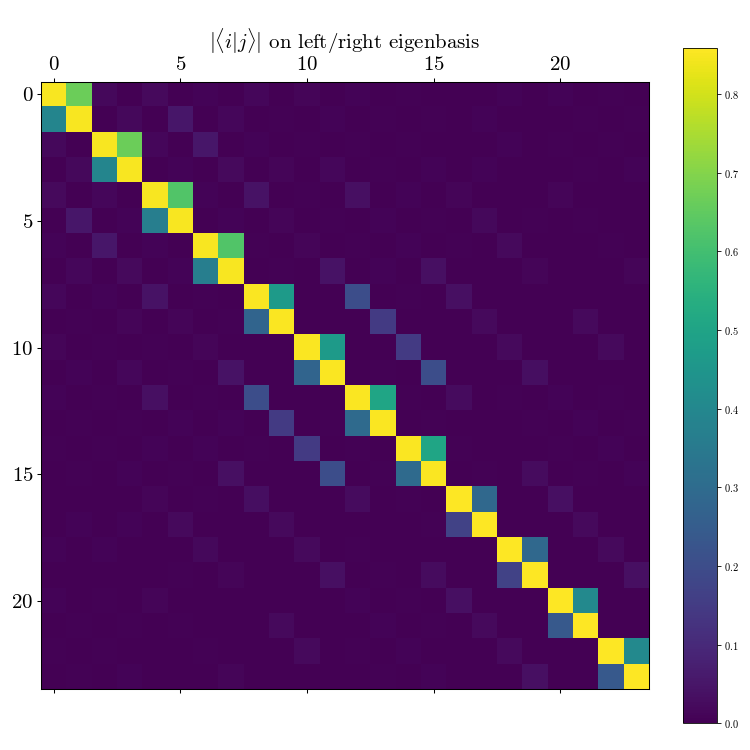

In [45]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.abs(Dw_pairs), cmap = 'viridis')
ax.set_title(r'$| \langle i | j\rangle |$ on left/right eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

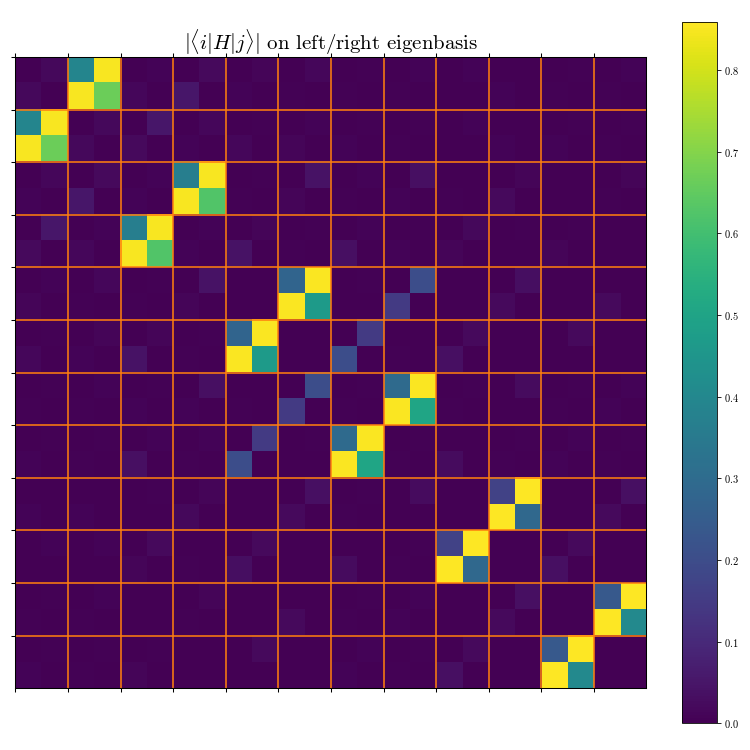

In [46]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.abs(Hw_pairs), cmap = 'viridis')
ax.set_title(r'$| \langle i | H | j\rangle |$ on left/right eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)

ax.set_xticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.xaxis.grid(True, color = pt.pal[1])
ax.set_yticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.yaxis.grid(True, color = pt.pal[1])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

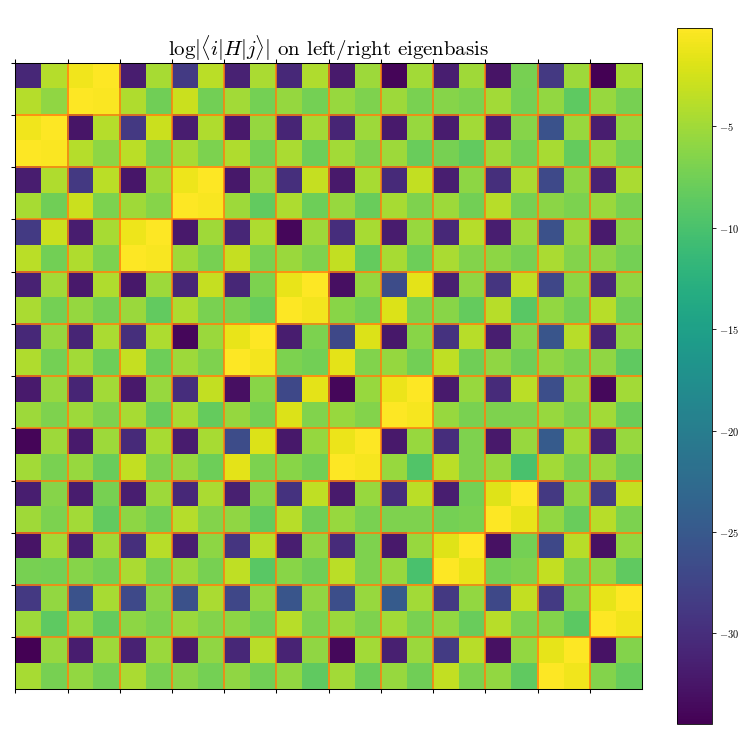

In [47]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow(np.log(np.abs(Hw_pairs)), cmap = 'viridis')
ax.set_title(r'$\log| \langle i | H | j\rangle |$ on left/right eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)

ax.set_xticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.xaxis.grid(True, color = pt.pal[1])
ax.set_yticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.yaxis.grid(True, color = pt.pal[1])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')

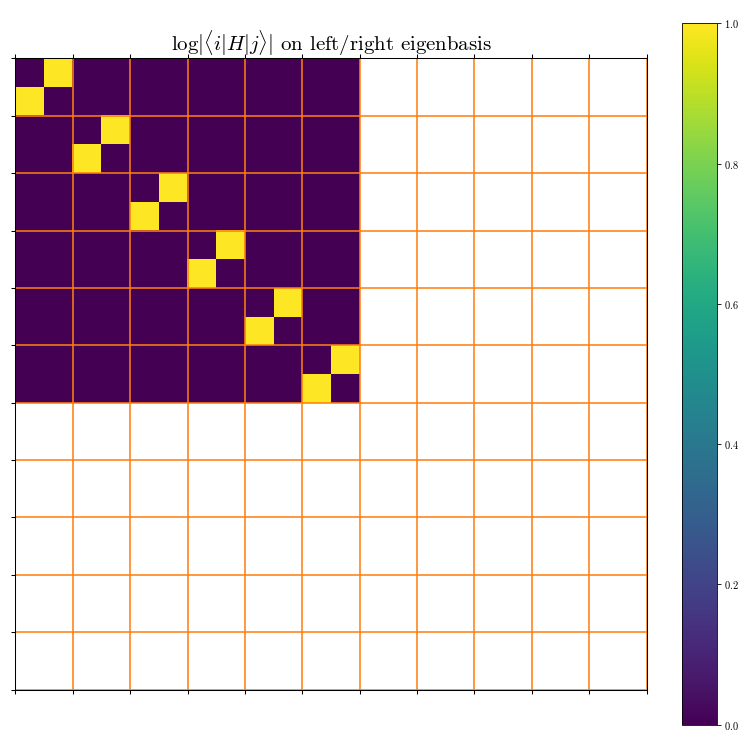

In [48]:
fig, axes = pt.add_subplots(fig_size = (10, 10))
ax = axes[0]
image = ax.matshow((np.abs(Hw_pairs[::2, ::2]) > 1e-8), cmap = 'viridis')
ax.set_title(r'$\log| \langle i | H | j\rangle |$ on left/right eigenbasis', fontsize = default_style['fontsize'])
cbar = plt.colorbar(image, fraction = 0.05)

ax.set_xticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.xaxis.grid(True, color = pt.pal[1])
ax.set_yticks(np.arange(-0.5, len(Hw_pairs) - 0.5, 2), labels = [])
ax.yaxis.grid(True, color = pt.pal[1])

plt.tight_layout()
# plt.savefig(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/Hw_matrix_elements.pdf')